# Choice Analyisis for pilot trials

## Load data

In [18]:
# Pick names of all participants data
choiceNameFrames = glob.glob('../Data/StudyOnlineProlific(12042021)/data_exp*.csv')
choiceNameFrames

['../Data/StudyOnlineProlific(12042021)/data_exp_46957-v3_few_most2.csv',
 '../Data/StudyOnlineProlific(12042021)/data_exp_46957-v3_few_most1.csv',
 '../Data/StudyOnlineProlific(12042021)/data_exp_46957-v3_most_few2.csv',
 '../Data/StudyOnlineProlific(12042021)/data_exp_46957-v3_most_few1.csv']

## Join all individual files

In [19]:
file_num=len(choiceNameFrames) #number of files to lopad
choiceFrames = pd.read_csv(choiceNameFrames[0])
choiceFrameAll = pd.DataFrame( columns = choiceFrames.columns)

for j in range (file_num):
    choiceFrames = pd.read_csv(choiceNameFrames[j])
    choiceFrames['Part'] =   choiceFrames['Participant Private ID']
    choiceFrames['PartOG'] =   choiceFrames['Participant Public ID']

    # Extract choice trials
    choiceDataPart = choiceFrames.loc[(choiceFrames['Trial Type'] == 'RDK') | (choiceFrames['Trial Type'] == 'RDK2')]
    # Extract confidence info (trial 0 correspond to the initial screen, no data)
    confidenceDataPart = choiceFrames.loc[(choiceFrames['Trial Type'] == 'text') & (choiceFrames['Trial Index'] > 0) & (choiceFrames['Trial Index'] < 451 ) & (choiceFrames['Key Press'] > 48) & (choiceFrames['Key Press'] < 58)  ]    # pick only pressed buttons that correspond to confidence keys 
    
    choiceDataPart = choiceDataPart.reset_index()
    confidenceDataPart = confidenceDataPart.reset_index()
    
    toDrop = []
    for jj in range (len (confidenceDataPart)): ## if  row is not preceded by choice trial, then it's not a confidence event
        if (np.sum(confidenceDataPart.iloc[jj]['index'] == choiceDataPart['index'].unique()+1)) < 1 :
                toDrop.append(jj)
    confidenceDataPart = confidenceDataPart.drop(toDrop)
    
    choiceDataPart['Conf'] = confidenceDataPart['Key Press'].values 
    choiceDataPart['ConfRT'] = confidenceDataPart['Reaction Time'].values 
    choiceDataPart['TrialN'] = range(len(choiceDataPart))
    # join all the participants
    choiceFrameAll = pd.concat([choiceFrameAll,choiceDataPart],ignore_index=True) 

## extract info

In [20]:
# Pick relevant columns of the dataframe
choFrameAll = choiceFrameAll[['Part','PartOG','TrialN',"Conf", "ConfRT",'Time Elapsed','Correct Choice','Coherent Direction','Trial Duration','Key Press','Reaction Time','Correct Given','Coherence','Color','Dot Num']]

# adapt the choice 
choFrameAll['Coherent Direction'] = - 1*(choFrameAll['Coherent Direction']>0)  +  1*(choFrameAll['Coherent Direction']== 0) # right : 1 ;  left : -1
#choFrameAll['CoherenceSign'] = (choFrameAll['Coherence']-0.50) *choFrameAll['Coherent Direction'] # we equal coherence of 0.5 to zero difference
choFrameAll['CoherenceSign'] = (choFrameAll['Coherence']) *choFrameAll['Coherent Direction']
choFrameAll['AbsCoherenceSign'] = np.abs(choFrameAll['CoherenceSign'])
choFrameAll['SumDot'] = choFrameAll['Dot Num']
choFrameAll['LDot'] = choFrameAll['Dot Num']*choFrameAll['Coherence']*(choFrameAll['Coherent Direction']==-1) + choFrameAll['Dot Num']*(1-choFrameAll['Coherence'])*(choFrameAll['Coherent Direction']==1)
choFrameAll['RDot'] = choFrameAll['Dot Num']*(1-choFrameAll['Coherence'])*(choFrameAll['Coherent Direction']==-1) + choFrameAll['Dot Num']*choFrameAll['Coherence']*(choFrameAll['Coherent Direction']==1)
choFrameAll['DDot'] = choFrameAll['RDot'] - choFrameAll['LDot'] 
choFrameAll['AbsDDot'] = np.abs(choFrameAll['RDot'] - choFrameAll['LDot'] )

choFrameAll['DDot_Coh2'] = (choFrameAll['RDot'] - choFrameAll['LDot'] ) + choFrameAll['Coherence']
choFrameAll['AbsDDot_Coh2'] = np.abs(choFrameAll['DDot_Coh2'])
choFrameAll['SumDot_Coh2'] = (choFrameAll['RDot'] + choFrameAll['LDot'] ) + choFrameAll['Coherence']

## if right (direction = 1) we multiply by the coherence and if left we multiply by 1 - coherence
#choFrameAll['RDot_Coh'] = choFrameAll['RDot'] * (((choFrameAll['Coherent Direction']==1)*choFrameAll['Coherence']) + (choFrameAll['Coherent Direction']==-1)*(1-choFrameAll['Coherence'])) 
## if left (direction = 0) we multiply by the coherence and if right we multiply by 1 - coherence
#choFrameAll['LDot_Coh'] = choFrameAll['LDot'] * (((choFrameAll['Coherent Direction']==-1)*choFrameAll['Coherence']) + (choFrameAll['Coherent Direction']==1)*(1-choFrameAll['Coherence']))
#choFrameAll['DDot_Coh'] = choFrameAll['RDot_Coh'] - choFrameAll['LDot_Coh']
#choFrameAll['AbsDDot_Coh'] = np.abs(choFrameAll['DDot_Coh'])
#choFrameAll['SumDot_Coh'] = choFrameAll['RDot_Coh'] + choFrameAll['LDot_Coh']

# if right (direction = 1) we multiply by the coherence and if left we multiply by 1 - coherence
choFrameAll['RDot_Coh'] = choFrameAll['RDot'] * (((choFrameAll['Coherent Direction']==1)*choFrameAll['Coherence']) + (choFrameAll['Coherent Direction']==-1)*(1-choFrameAll['Coherence'])) 
# if left (direction = 0) we multiply by the coherence and if right we multiply by 1 - coherence
choFrameAll['LDot_Coh'] = choFrameAll['LDot'] * (((choFrameAll['Coherent Direction']==-1)*choFrameAll['Coherence']) + (choFrameAll['Coherent Direction']==1)*(1-choFrameAll['Coherence']))
choFrameAll['DDot_Coh'] = choFrameAll['RDot_Coh'] - choFrameAll['LDot_Coh']
choFrameAll['AbsDDot_Coh'] = np.abs(choFrameAll['DDot_Coh'])
choFrameAll['SumDot_Coh'] = choFrameAll['RDot_Coh'] + choFrameAll['LDot_Coh']



choFrameAll['RCoh'] = (((choFrameAll['Coherent Direction']==1)*choFrameAll['Coherence']) + (choFrameAll['Coherent Direction']==-1)*(1-choFrameAll['Coherence'])) 
# if left (direction = 0 [degrees]) we multiply by the coherence and if right we multiply by 1 - coherence
choFrameAll['LCoh'] = (((choFrameAll['Coherent Direction']==-1)*choFrameAll['Coherence']) + (choFrameAll['Coherent Direction']==1)*(1-choFrameAll['Coherence']))



choFrameAll['CoherenceSign']

# Replace key code
# consider code for numeric keys (confidence)
#1 	49
#2 	50
#3 	51
#4 	52
#5 	53
#6 	54
#7 	55
#8 	56
#9 	57
choFrameAll['Confidence'] = choFrameAll['Conf'] - 48  

# Replace options left and right
#a 	65 # left key
#l 	76 # right key
choFrameAll['Choice'] = (choFrameAll['Key Press']==65)*0 + (choFrameAll['Key Press']==76)*1  

# frames
# #b5cce9 : blue (MOST)
# #e9b5b5 : red (FEW)
choFrameAll['Frame'] = (choFrameAll['Color']=='#b5cce9')*1 + (choFrameAll['Color']=='#e9b5b5')*2  

# complete with 0s the correct given from gorilla
choFrameAll['Correct Given'] = choFrameAll['Correct Given'].fillna(0)

# create number for participants that is simple
choFrameAll['Part'] = choFrameAll['Part'].replace(choFrameAll.Part.unique(), list(range(len(choFrameAll.Part.unique()))))


/Users/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

In [21]:
choFrameAll[['RCoh','LCoh']]

RCoh  LCoh
0      0.52  0.48
1      0.55  0.45
2      0.30  0.70
3      0.40  0.60
4      0.52  0.48
...     ...   ...
16571  0.10  0.90
16572  0.60  0.40
16573  0.20  0.80
16574  0.52  0.48
16575  0.35  0.65

[16576 rows x 2 columns]

(array([6068., 3996., 2960., 1332.,  740.,  592.,  296.,  296.,  148.,
         148.]),
 array([  0.2 ,  11.52,  22.84,  34.16,  45.48,  56.8 ,  68.12,  79.44,
         90.76, 102.08, 113.4 ]),
 <BarContainer object of 10 artists>)

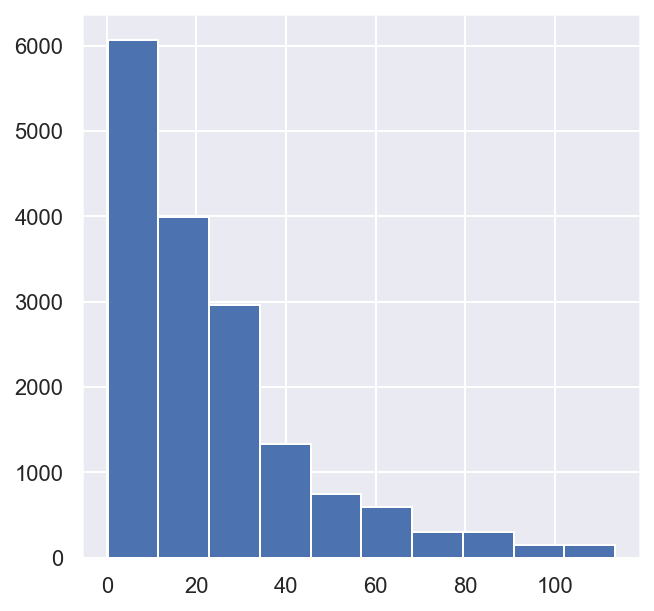

In [22]:
plt.hist(choFrameAll['LDot_Coh'])

(array([6068., 3996., 2960., 1332.,  740.,  592.,  296.,  296.,  148.,
         148.]),
 array([  0.2 ,  11.52,  22.84,  34.16,  45.48,  56.8 ,  68.12,  79.44,
         90.76, 102.08, 113.4 ]),
 <BarContainer object of 10 artists>)

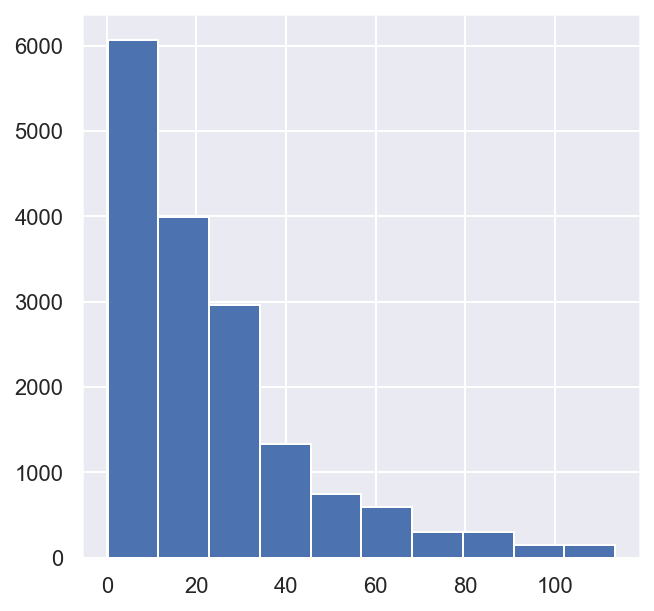

In [23]:
plt.hist(choFrameAll['RDot_Coh'])

## Sort dataframe so all participant's trials are together (needed for proper z-scoring output)

In [24]:
choFrameAll = choFrameAll.sort_values(by=['Part'])
choFrameAll = choFrameAll.reset_index(drop=True)

## Z score relevant variables

In [25]:
choFrameAll["zCoherence"] = z_score1(choFrameAll,'Part',"Coherence")
choFrameAll["zCoherenceSign"] = z_score1(choFrameAll,'Part',"CoherenceSign")

choFrameAll["zRDot"] = z_score1(choFrameAll,'Part',"RDot")
choFrameAll["zLDot"] = z_score1(choFrameAll,'Part',"LDot")

choFrameAll["zRCoh"] = z_score1(choFrameAll,'Part',"RCoh")
choFrameAll["zLCoh"] = z_score1(choFrameAll,'Part',"LCoh")

choFrameAll["zDDot"] = z_score1(choFrameAll,'Part',"DDot")
choFrameAll["zSumDot"] = z_score1(choFrameAll,'Part',"SumDot")

choFrameAll["zAbsDDot"] = z_score1(choFrameAll,'Part',"AbsDDot")


choFrameAll["zDDot_Coh"] = z_score1(choFrameAll,'Part',"DDot_Coh")                                       
choFrameAll["zAbsDDot_Coh"] = z_score1(choFrameAll,'Part',"AbsDDot_Coh")
choFrameAll["zSumDot_Coh"] = z_score1(choFrameAll,'Part',"SumDot_Coh")


choFrameAll["zConfidence"] = z_score1(choFrameAll,'Part',"Confidence")
choFrameAll["zRT"] = z_score1(choFrameAll,'Part',"Reaction Time")
choFrameAll["zAbsCoherenceSign"] = z_score1(choFrameAll,'Part',"AbsCoherenceSign")

In [26]:
choFrameAll.Part.unique() 

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36.])

In [27]:
Correct = []
for i in range(len(choFrameAll)):
    if choFrameAll.Frame[i] == 1:
        if ((choFrameAll.Choice[i] == 1) and (choFrameAll.CoherenceSign[i] > 0)) or ((choFrameAll.Choice[i] == 0) and (choFrameAll.CoherenceSign[i] < 0)):
            Correct.append(1)
        else:
            Correct.append(0)
    if choFrameAll.Frame[i] == 2:
        if ((choFrameAll.Choice[i] == 1) and (choFrameAll.CoherenceSign[i] < 0)) or ((choFrameAll.Choice[i] == 0) and (choFrameAll.CoherenceSign[i] > 0)):
            Correct.append(1)
        else:
            Correct.append(0)

choFrameAll["Correct"] = Correct

CorrectDots = []
for i in range(len(choFrameAll)):
    if choFrameAll.Frame[i] == 1:
        if ((choFrameAll.Choice[i] == 1) and (choFrameAll.RDot[i] > choFrameAll.LDot[i])) or ((choFrameAll.Choice[i] == 0) and (choFrameAll.RDot[i] < choFrameAll.LDot[i])) :
            CorrectDots.append(1)
        else:
            CorrectDots.append(0)
    if choFrameAll.Frame[i] == 2:
        if ((choFrameAll.Choice[i] == 1) and (choFrameAll.RDot[i] < choFrameAll.LDot[i])) or ((choFrameAll.Choice[i] == 0) and (choFrameAll.RDot[i] > choFrameAll.LDot[i])):
            CorrectDots.append(1)
        else:
            CorrectDots.append(0)

choFrameAll["CorrectDots"] = CorrectDots

In [28]:
choFrameAll['ChosenDots'] =  (choFrameAll['Choice'] == 1)*(choFrameAll['RDot']) + (choFrameAll['Choice'] == 0)*(choFrameAll['LDot'])
choFrameAll['UnchosenDots'] =  (choFrameAll['Choice'] == 1)*(choFrameAll['LDot']) + (choFrameAll['Choice'] == 0)*(choFrameAll['RDot'])

choFrameAll["zChosenDots"] = z_score1(choFrameAll,'Part',"ChosenDots")
choFrameAll["zUnchosenDots"] = z_score1(choFrameAll,'Part',"UnchosenDots")


choFrameAll['ChosenDot_Coh'] =  (choFrameAll['Choice'] == 1)*(choFrameAll['RDot_Coh']) + (choFrameAll['Choice'] == 0)*(choFrameAll['LDot_Coh'])
choFrameAll['UnchosenDot_Coh'] =  (choFrameAll['Choice'] == 1)*(choFrameAll['LDot_Coh']) + (choFrameAll['Choice'] == 0)*(choFrameAll['RDot_Coh'])


choFrameAll['RDotPlusCoh'] = choFrameAll['zRDot'] + choFrameAll['zSumDot']
choFrameAll['LDotPlusCoh'] = choFrameAll['zLDot'] + choFrameAll['zSumDot']

choFrameAll['ChoDotPlusCoh'] =  (choFrameAll['Choice'] == 1)*(choFrameAll['RDotPlusCoh']) + (choFrameAll['Choice'] == 0)*(choFrameAll['LDotPlusCoh'])
choFrameAll['UnchoDotPlusCoh'] =  (choFrameAll['Choice'] == 1)*(choFrameAll['LDotPlusCoh']) + (choFrameAll['Choice'] == 0)*(choFrameAll['RDotPlusCoh'])

choFrameAll['zChoCoh'] =  (choFrameAll['Choice'] == 1)*(choFrameAll['zRCoh']) + (choFrameAll['Choice'] == 0)*(choFrameAll['zLCoh'])
choFrameAll['zUnchoCoh'] =  (choFrameAll['Choice'] == 1)*(choFrameAll['zLCoh']) + (choFrameAll['Choice'] == 0)*(choFrameAll['zRCoh'])


choFrameAll["zChosenDot_Coh"] = z_score1(choFrameAll,'Part',"ChosenDot_Coh")
choFrameAll["zUnchosenDot_Coh"] = z_score1(choFrameAll,'Part',"UnchosenDot_Coh")

choFrameAll["zChoDotPlusCoh"] = z_score1(choFrameAll,'Part',"ChoDotPlusCoh")
choFrameAll["zUnchoDotPlusCoh"] = z_score1(choFrameAll,'Part',"UnchoDotPlusCoh")

## Split by confidence

In [29]:
choFrameAll['TrialNN'] = range(len(choFrameAll))

Splits_headers = ['zConfidence']
Splits_variables = ['zConfidence']
choFrameAll['Conf_Split'] = splitByVar(choFrameAll, Splits_variables,Splits_headers,'Part','TrialNN')

## Check exclusion criteria (confidence repeated)

In [30]:
ExclusionMatrix = []
#for cycle for participant

for k in choFrameAll.Part.unique() :
    
    # Checking for confidence
    participant_data = choFrameAll.loc[ (choFrameAll['Part'] == k)]
    ConfidencePart =   participant_data ['Confidence']
    
    ConfRange = max(ConfidencePart) - min(ConfidencePart)
    ConfCounts = ConfidencePart.value_counts()
    
    maxConfCounts = max(ConfCounts)
    ConfCountsTotal = sum(int(i) for i in ConfCounts.values)
    
    PropnMostFreqConf = maxConfCounts / ConfCountsTotal
    PropnRangeConf = ConfRange 

    OverallAccuracy = participant_data.Correct.mean()    
    
    ExclusionMatrix.append([k , PropnMostFreqConf, PropnRangeConf, OverallAccuracy]) 

ExclusionMatrixdf = pd.DataFrame(ExclusionMatrix, columns = ['Part','RepeatedConf','RangeConf','OverallAccuracy'])
ExclusionMatrixdf

/Users/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  
/Users/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  
/Users/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  
/Users/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromite

Part  RepeatedConf  RangeConf  OverallAccuracy
0    0.0      0.301339        8.0         0.850446
1    1.0      0.196429        8.0         0.758929
2    2.0      0.241071        7.0         0.821429
3    3.0      0.636161        8.0         0.801339
4    4.0      0.821429        6.0         0.841518
5    5.0      0.578125        7.0         0.819196
6    6.0      0.531250        8.0         0.785714
7    7.0      0.180804        8.0         0.765625
8    8.0      0.205357        8.0         0.825893
9    9.0      0.330357        8.0         0.796875
10  10.0      0.412946        7.0         0.758929
11  11.0      0.174107        8.0         0.787946
12  12.0      0.160714        8.0         0.549107
13  13.0      0.886161        8.0         0.660714
14  14.0      0.250000        8.0         0.825893
15  15.0      0.245536        8.0         0.546875
16  16.0      0.227679        8.0         0.765625
17  17.0      0.370536        8.0         0.825893
18  18.0      0.279018        8.0         0.533482
19  19.0      0.464286        8.0         0.734375
20  20.0      0.292411        8.0         0.841518
21  21.0      0.250000        8.0         0.792411
22  22.0      0.200893        8.0         0.828125
23  23.0      0.223214        8.0         0.850446
24  24.0      0.234375        8.0         0.848214
25  25.0      0.236607        8.0         0.729911
26  26.0      0.388393        8.0         0.870536
27  27.0      0.314732        5.0         0.881696
28  28.0      0.502232        6.0         0.714286
29  29.0      0.220982        8.0         0.801339
30  30.0      0.553571        3.0         0.767857
31  31.0      0.183036        8.0         0.763393
32  32.0      0.325893        8.0         0.767857
33  33.0      0.218750        8.0         0.774554
34  34.0      0.785714        8.0         0.825893
35  35.0      0.350446        8.0         0.832589
36  36.0      0.316964        8.0         0.716518

## Extract participants list with repetition of confidence over 60% (following analysis still considers this participants)

In [31]:
ExcludePartbyConfRepeat = ExclusionMatrixdf.loc[ExclusionMatrixdf.RepeatedConf>0.60].Part.unique()
print('Excluded by confidence (repeated): ' + str(ExcludePartbyConfRepeat))

ExcludePartbyConfRange = ExclusionMatrixdf.loc[ExclusionMatrixdf.RangeConf<5].Part.unique()
print('Excluded by confidence (range): ' + str(ExcludePartbyConfRange))

ExcludePartbyAcc = ExclusionMatrixdf.loc[ExclusionMatrixdf.OverallAccuracy<0.60].Part.unique()
print('Excluded by accuracy: ' + str(ExcludePartbyAcc))

excludeParts = np.concatenate((ExcludePartbyConfRepeat,ExcludePartbyConfRange,ExcludePartbyAcc))

Excluded by confidence (repeated): [ 3.  4. 13. 34.]
Excluded by confidence (range): [30.]
Excluded by accuracy: [12. 15. 18.]


In [32]:
excludeParts

array([ 3.,  4., 13., 34., 30., 12., 15., 18.])

In [33]:
print('Excluded participants')
for ii in excludeParts:
    choFrameAllExcluded = choFrameAll.loc[ (choFrameAll['Part'] == ii)]
    print(choFrameAllExcluded.PartOG.unique())


Excluded participants
['5ecc0ae50cf6970c228a6bd6']
['5f6c102b6ec04317fc9a8127']
['5f3716c55fa34618ff41e045']
['603133755bdba40085bb6778']
['6042bfe03a397a218b990b0a']
['5fac64459b026623cd66e469']
['5fe1e469197628cc84195b2c']
['5f14b19a2cd39e53d8a3744f']


## Remove participants

In [34]:
for ii in excludeParts:
    choFrameAll = choFrameAll.loc[ (choFrameAll['Part'] != ii)]
choFrameAll.Part.unique()
#choFrameAll = choFrameAll.loc[ (choFrameAll['Part'] != 2.0)  & (choFrameAll['Part'] != 8.0) & (choFrameAll['Part'] != 11.0)]

array([ 0.,  1.,  2.,  5.,  6.,  7.,  8.,  9., 10., 11., 14., 16., 17.,
       19., 20., 21., 22., 23., 24., 25., 26., 27., 28., 29., 31., 32.,
       33., 35., 36.])

## Separate by frame

In [35]:
choFrameAll['Coherence'].unique() 

array([0.52, 0.65, 0.6 , 0.7 , 0.8 , 0.51, 0.55, 0.9 ])

In [36]:
data_exp1 = choFrameAll.loc[(choFrameAll['Frame'] == 1) ]#& (choFrameAll['Coherence']==0.7)] # 1 = Most, 2 = Few
data_exp2 = choFrameAll.loc[(choFrameAll['Frame'] == 2)]#& (choFrameAll['Coherence']==0.7)]

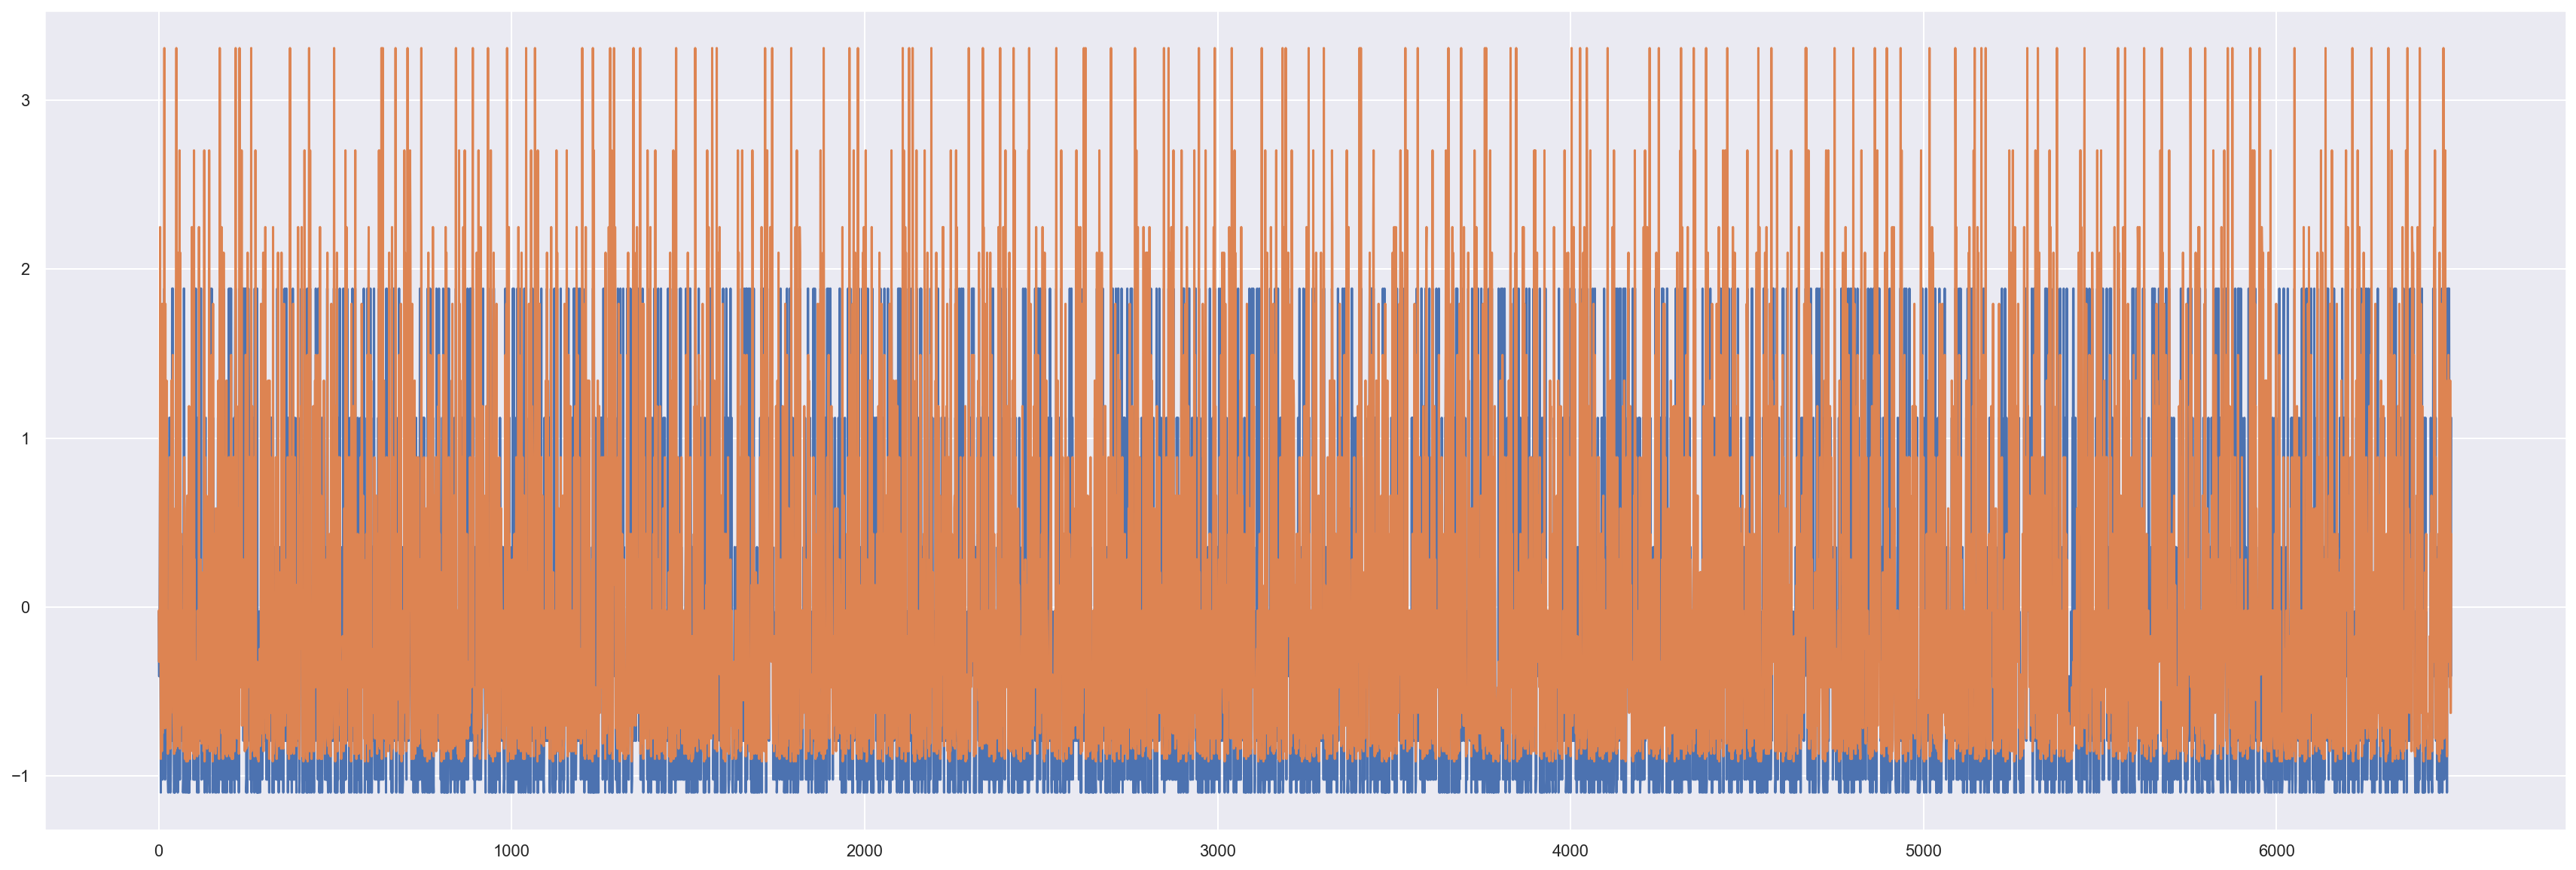

In [37]:
fig = figure(figsize=(30,10))

plt.plot(data_exp1['zCoherence'].values)
plt.plot(data_exp1['zAbsDDot'].values)

In [38]:
data_exp1["zConfidenceByFrame"] = z_score1(data_exp1,'Part',"Confidence")
data_exp2["zConfidenceByFrame"] = z_score1(data_exp2,'Part',"Confidence")

/Users/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [39]:
stats.pearsonr(data_exp1['zCoherence'].values,data_exp1['zAbsDDot'].values)

(0.7913994379782164, 0.0)

In [40]:
data_exp1['zAbsDDot']

1       -0.022729
2       -0.325786
3       -0.174257
4       -0.325786
5        2.250194
           ...   
16570   -0.477314
16571    1.341025
16572   -0.628842
16573   -0.628842
16574    0.431855
Name: zAbsDDot, Length: 6496, dtype: float64

In [41]:
# data_exp1['right_chosen'] = data_exp1['Choice'].values == 1
# 
# subject_value_psychometric = data_exp1.groupby(
#         ['Part', 'CoherenceSign']).Choice.mean()
# 
# # place in dataframe
# for s, subject in enumerate(data_exp1['Part'].unique()):
#         subject_df = data_exp1[data_exp1['Part'] == subject].copy()
#         data_exp1.loc[data_exp1['Part'] == subject, 'p_choice_right_given_dots'] = subject_value_psychometric[
#             subject][subject_df['CoherenceSign'].values].values
#         
# # compute corrected choice left
# data_exp1['corrected_choice_right'] = data_exp1['right_chosen'] - \
#     data_exp1['p_choice_right_given_dots']

In [42]:
#def add_left_relative_value(df):
#    """
#    Compute relative value of left item.
#
#    Left item value – mean other item values
#    In the binary case, this reduces to v0 - v1.
#
#    Parameters
#    ----------
#    df :      <pandas DataFrame>
#              Trial wise DataFrame containing columns for gaze_i
#    """
#
#    # infer number of items
#    # relative value left
#    value_cols = ([col for col in df.columns
#                   if col.startswith('item_value_')])
#    n_items = len(value_cols)
#    values = df[value_cols].values
#    relative_value_left = values[:, 1] - np.mean(values[:, 0:])
#    df['left_relative_value'] = relative_value_left
#
#    return df.copy()
#def add_corrected_choice_left(df):
#    """
#    Compute corrected choice left
#
#    Corrected choice ~ (choice==left) - p(choice==left | left relative item value)
#
#    Parameters
#    ----------
#    df :      <pandas DataFrame>
#              Trial wise DataFrame containing columns for gaze_i
#    """
#
#    # recode choice
#    df['left_chosen'] = df['choice'].values == 1
#
#    # left relative value
#    df = add_left_relative_value(df)
#
#    # compute p(choice==left|left relative value)
#    subject_value_psychometric = df.groupby(
#        ['subject', 'left_relative_value']).left_chosen.mean()
#    # place in dataframe
#    for s, subject in enumerate(df['subject'].unique()):
#        subject_df = df[df['subject'] == subject].copy()
#        df.loc[df['subject'] == subject, 'p_choice_left_given_value'] = subject_value_psychometric[
#            subject][subject_df['left_relative_value'].values].values
#
#    # compute corrected choice left
#    df['corrected_choice_left'] = df['left_chosen'] - \
#        df['p_choice_left_given_value']
#
#    return df.copy()
#

In [43]:
len(data_exp1)

6496

In [44]:
len(data_exp2)

6496

/Users/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  from ipykernel import kernelapp as app
/Users/pradyumna/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  from ipykernel import kernelapp as app
/Users/pradyumna/anaconda3/lib/python3.7/site-packages/seaborn/dist

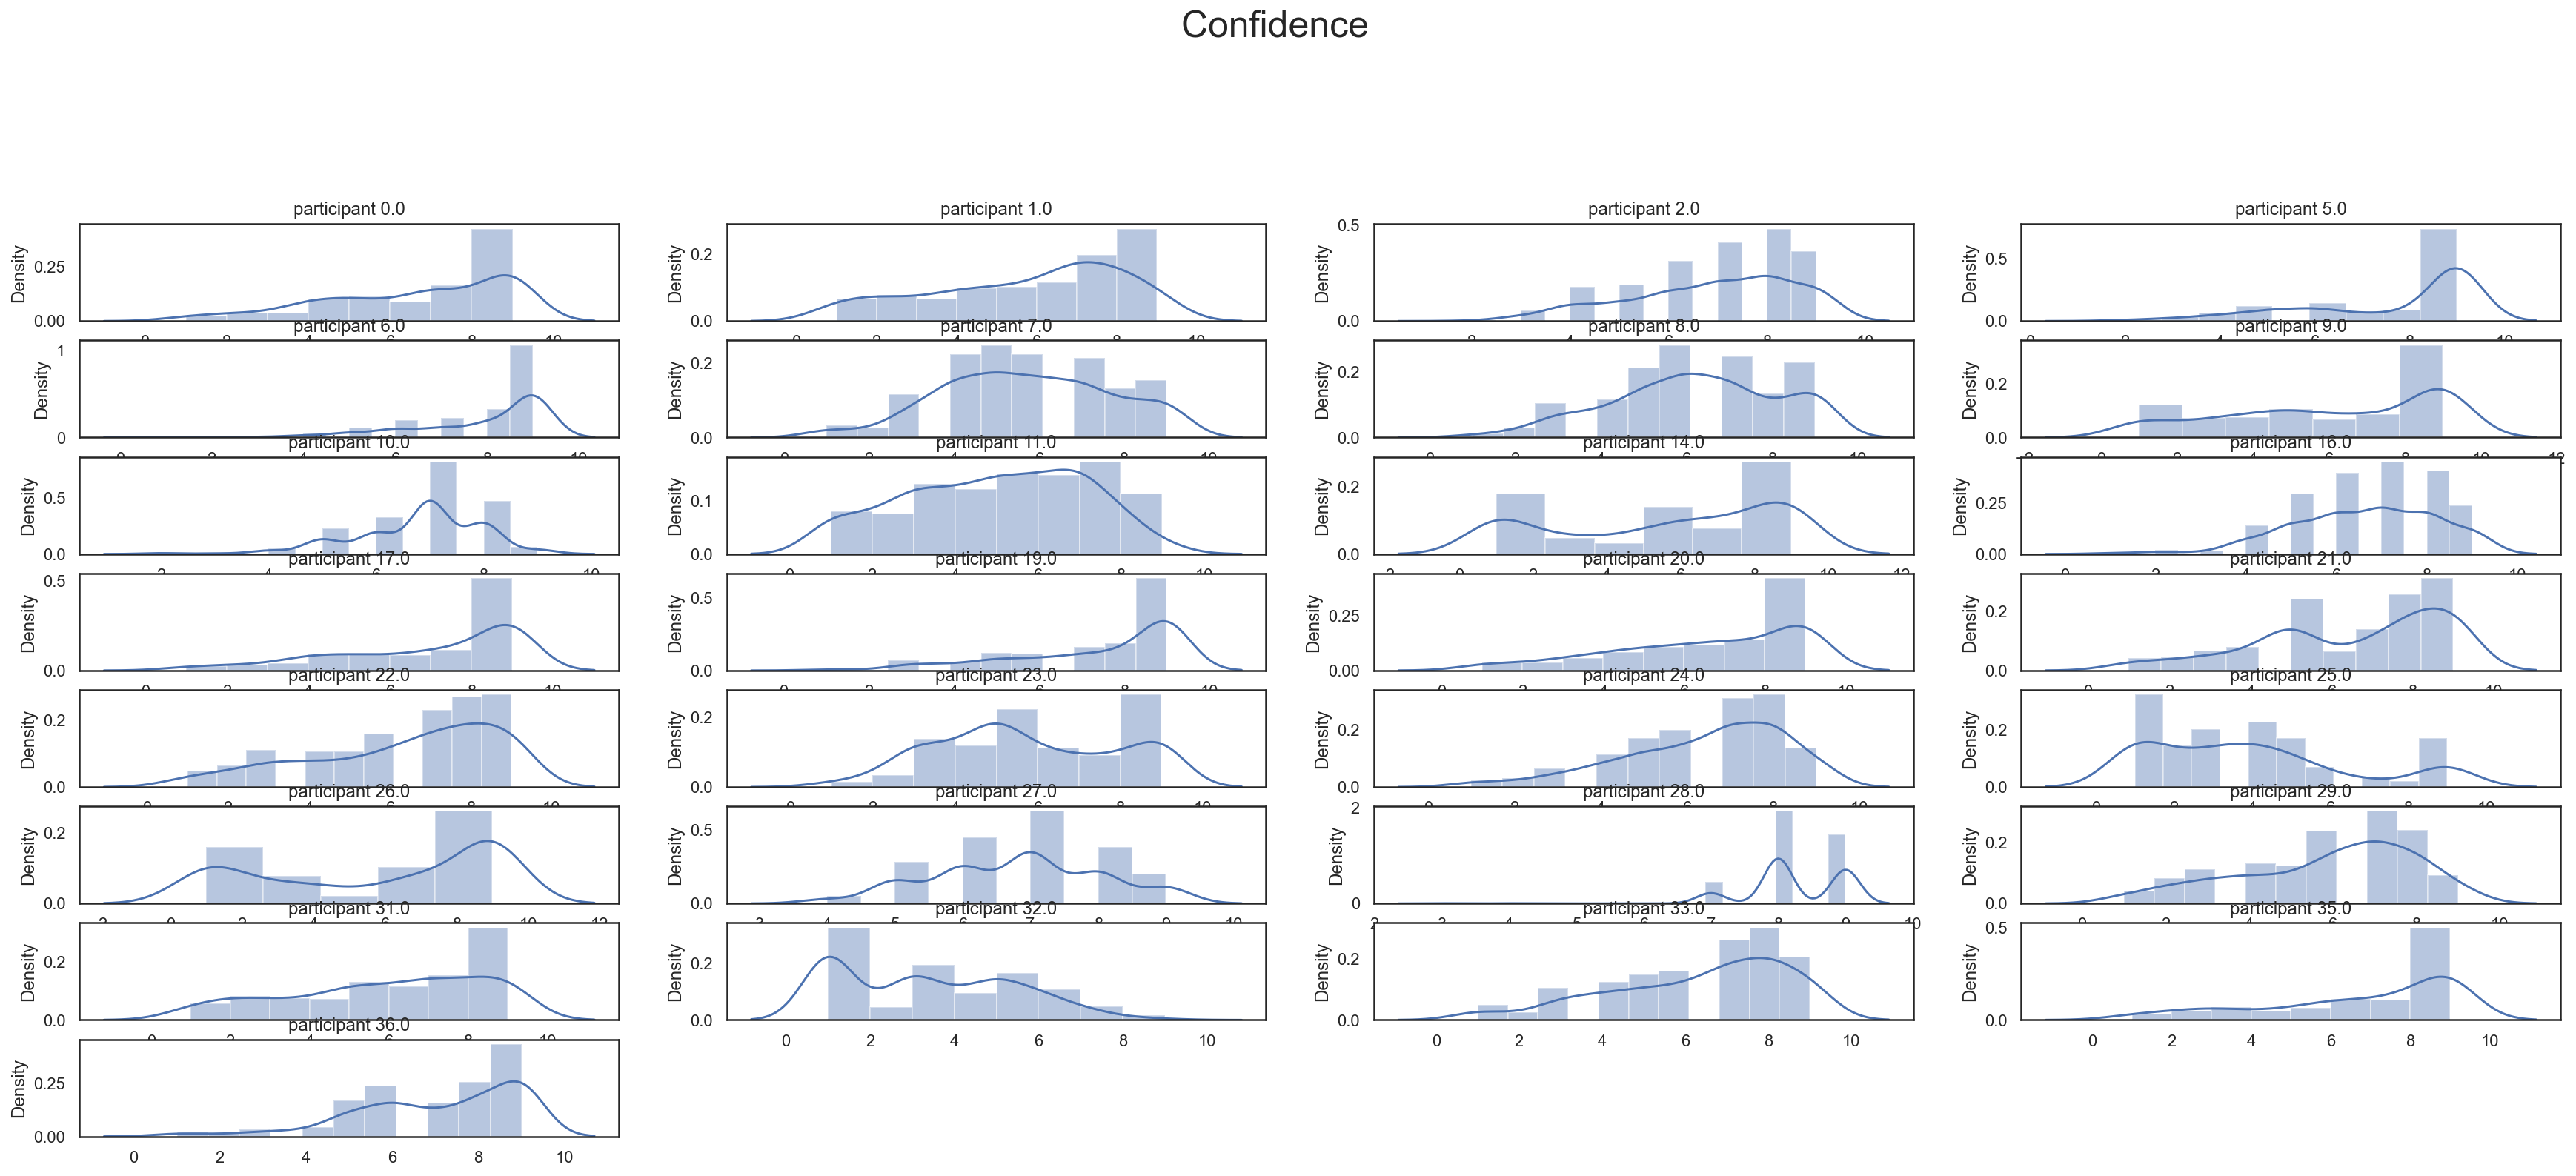

In [45]:
participant_histogram(choFrameAll,'Confidence', title = 'Confidence ')

/Users/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  from ipykernel import kernelapp as app
/Users/pradyumna/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  from ipykernel import kernelapp as app
/Users/pradyumna/anaconda3/lib/python3.7/site-packages/seaborn/dist

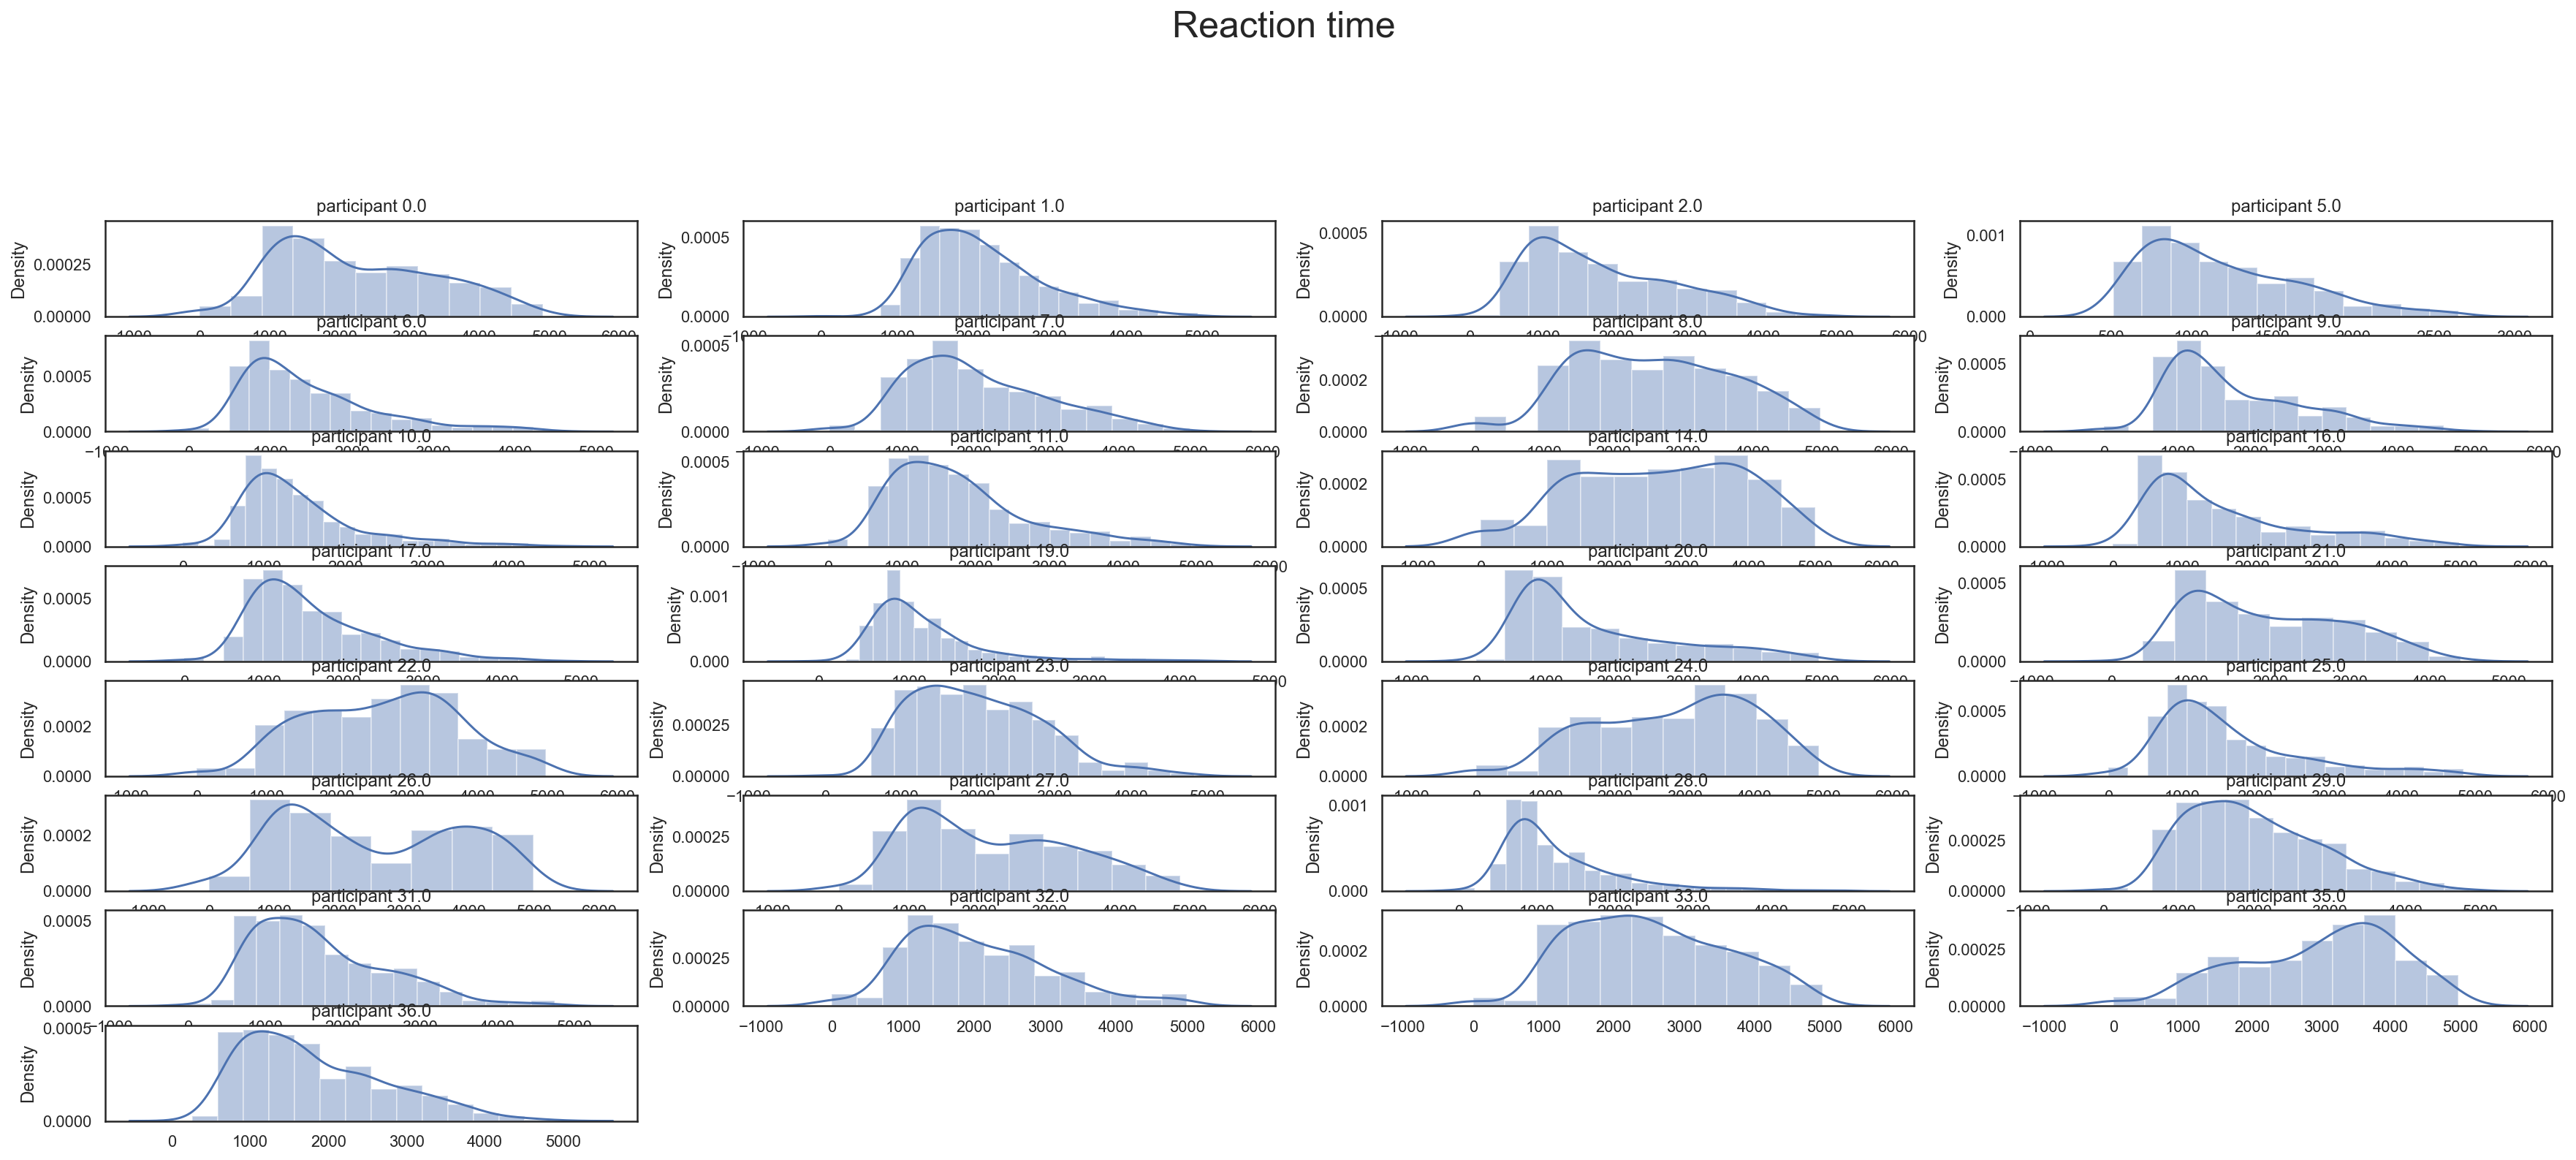

In [44]:
participant_histogram(choFrameAll,'Reaction Time', title = 'Reaction time ')

/Users/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  from ipykernel import kernelapp as app
/Users/pradyumna/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  from ipykernel import kernelapp as app
/Users/pradyumna/anaconda3/lib/python3.7/site-packages/seaborn/dist

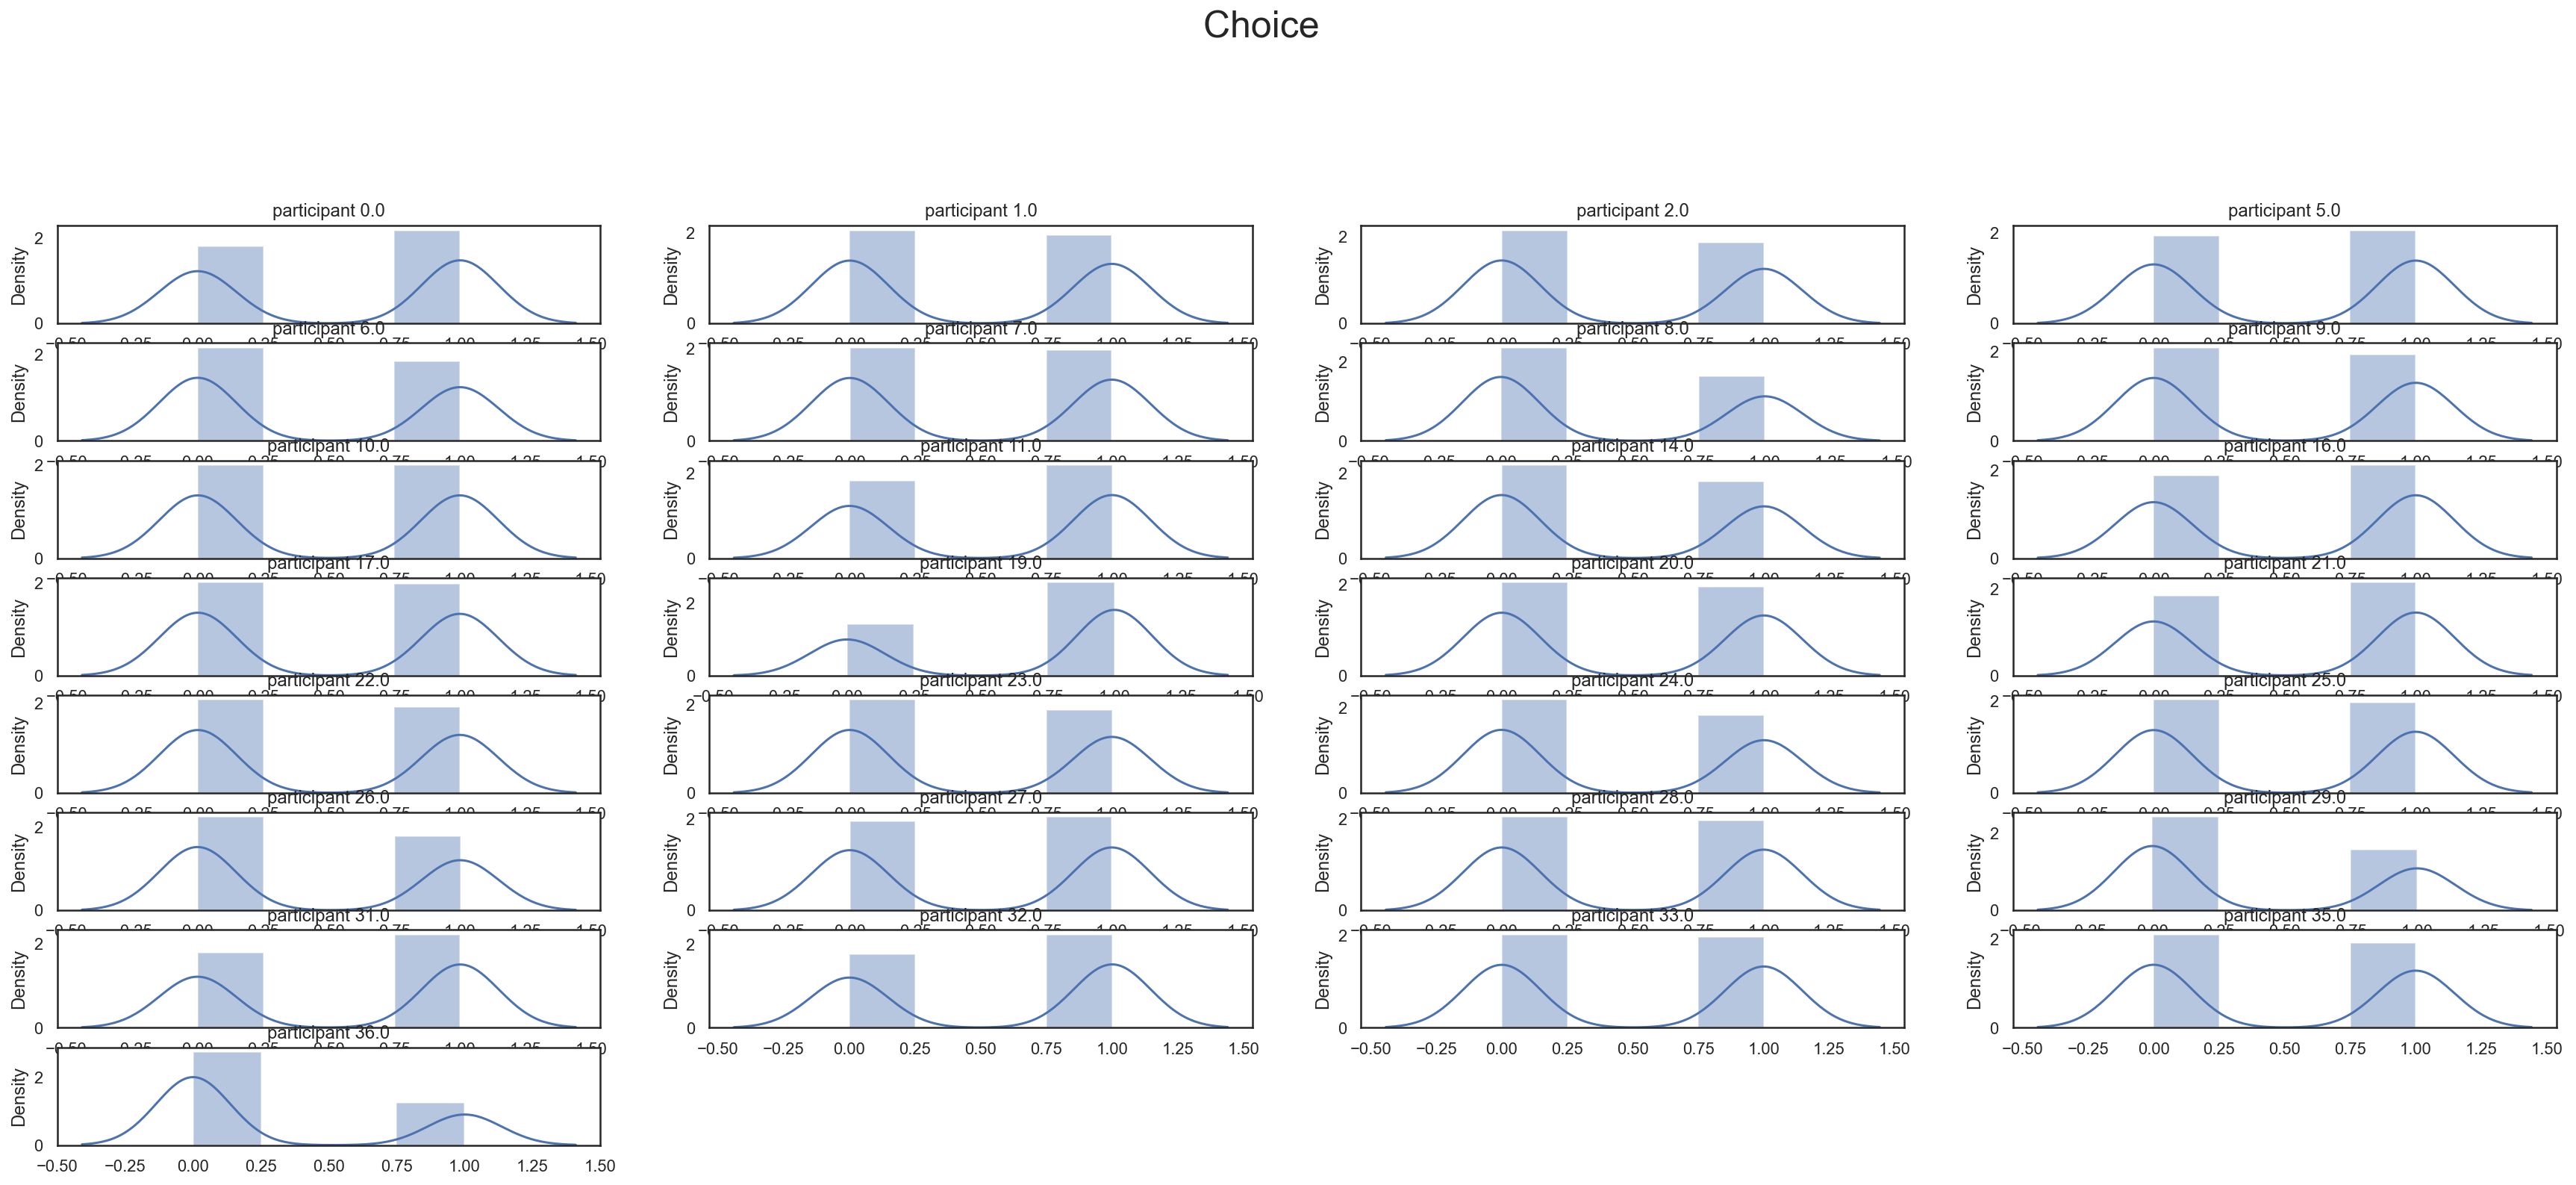

In [45]:
participant_histogram(choFrameAll,'Choice', title = 'Choice ')

/Users/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  from ipykernel import kernelapp as app
/Users/pradyumna/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  from ipykernel import kernelapp as app
/Users/pradyumna/anaconda3/lib/python3.7/site-packages/seaborn/dist

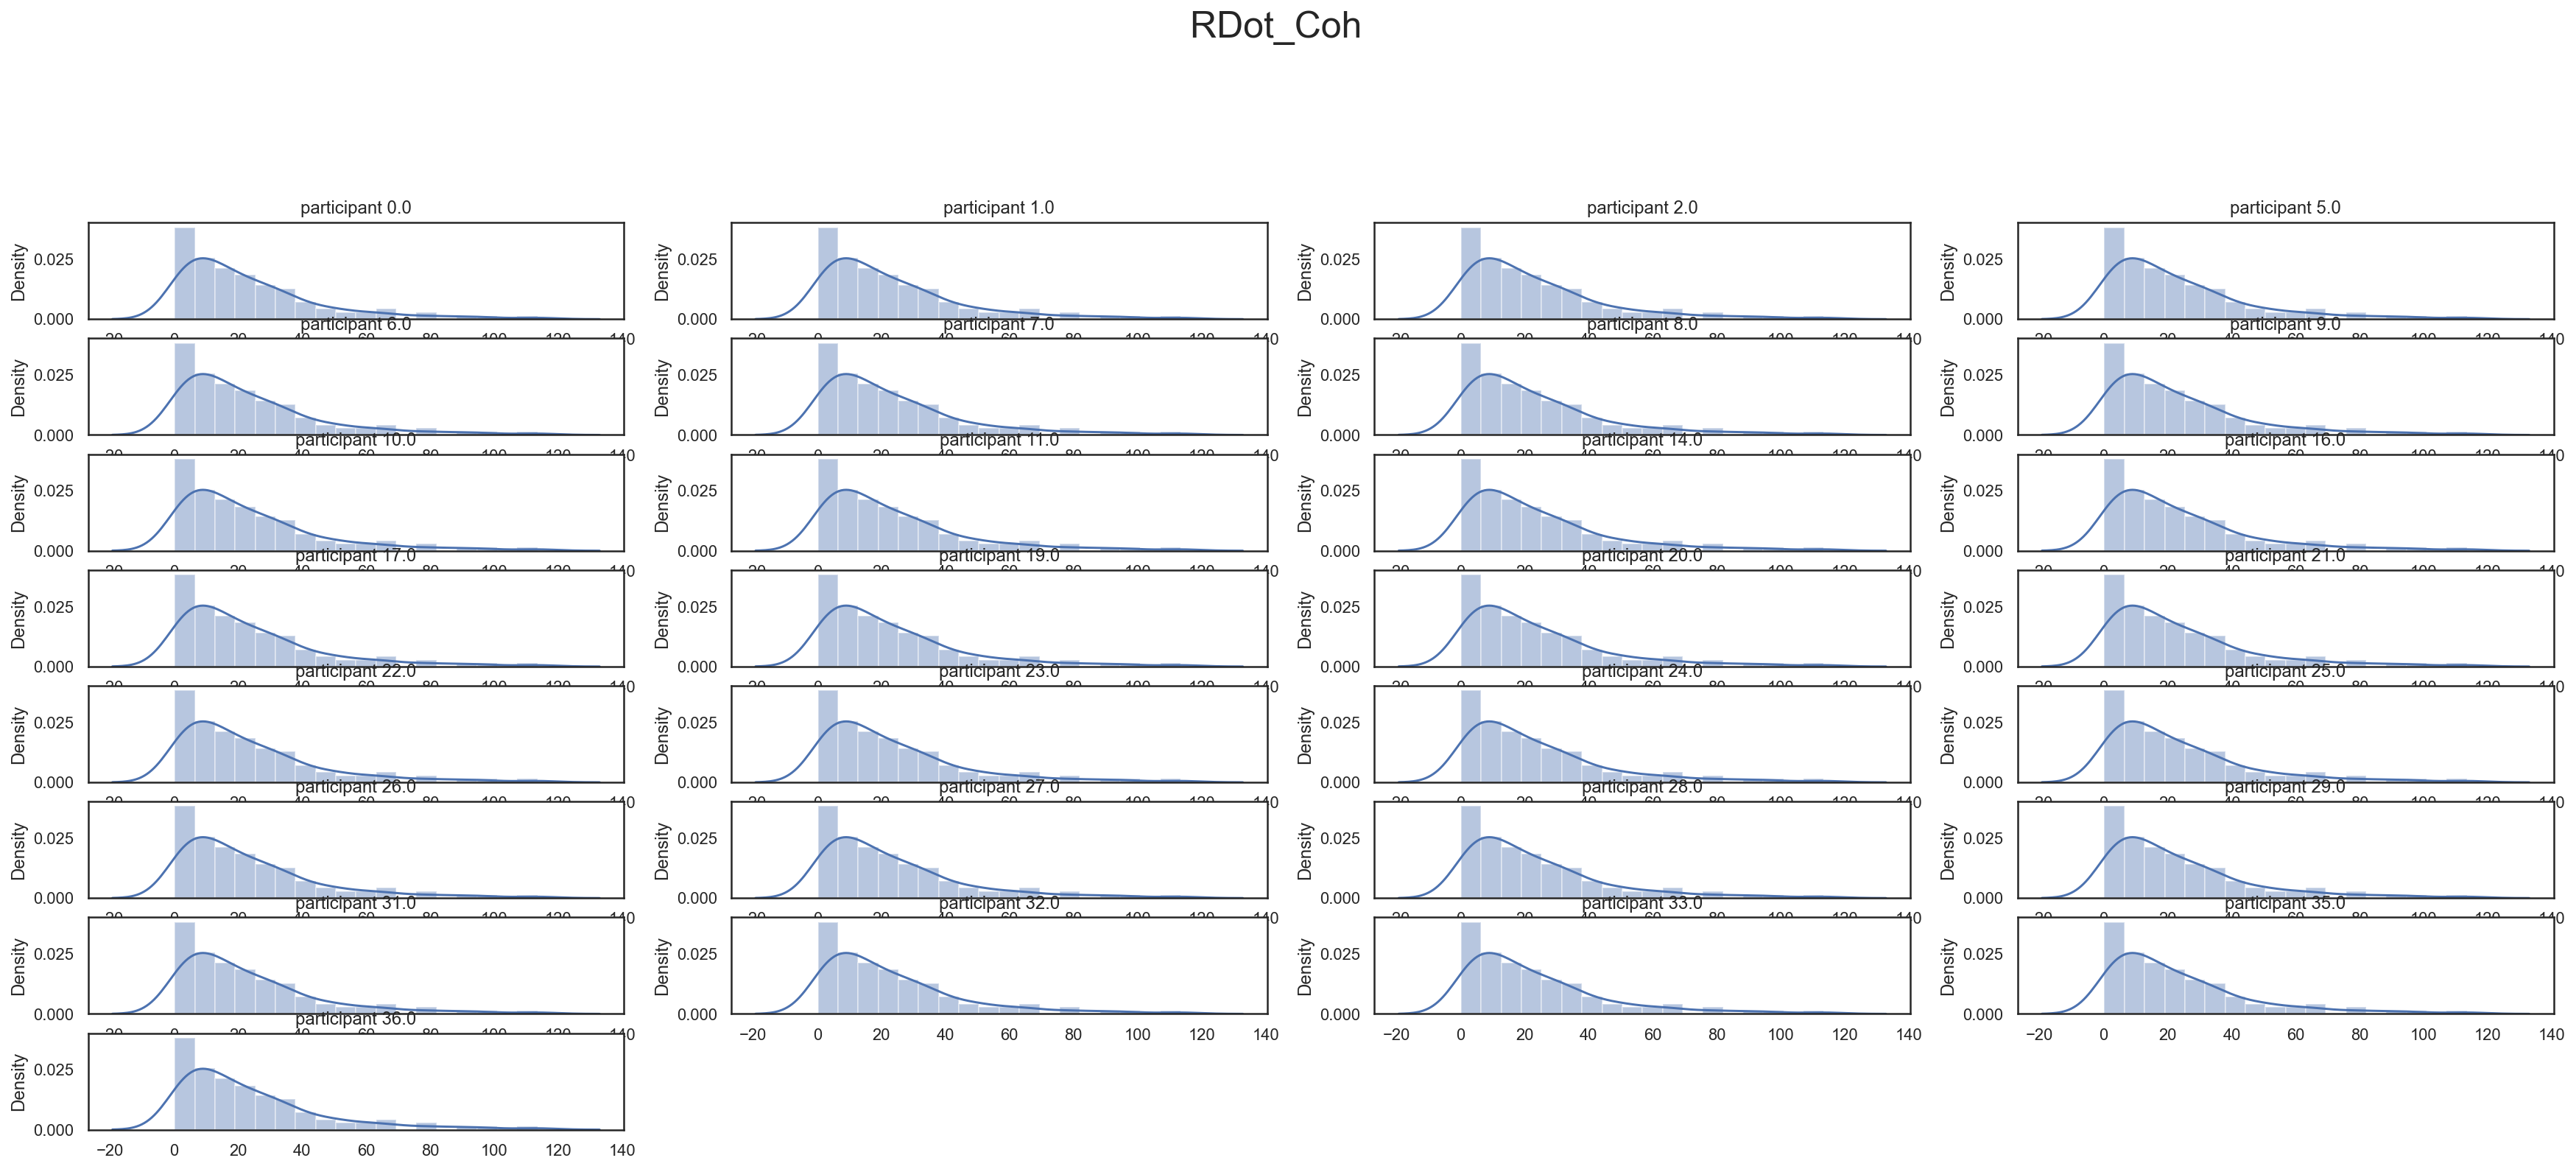

In [46]:
participant_histogram(choFrameAll,'LDot_Coh', title = 'RDot_Coh ')

/Users/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  from ipykernel import kernelapp as app
/Users/pradyumna/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  from ipykernel import kernelapp as app
/Users/pradyumna/anaconda3/lib/python3.7/site-packages/seaborn/dist

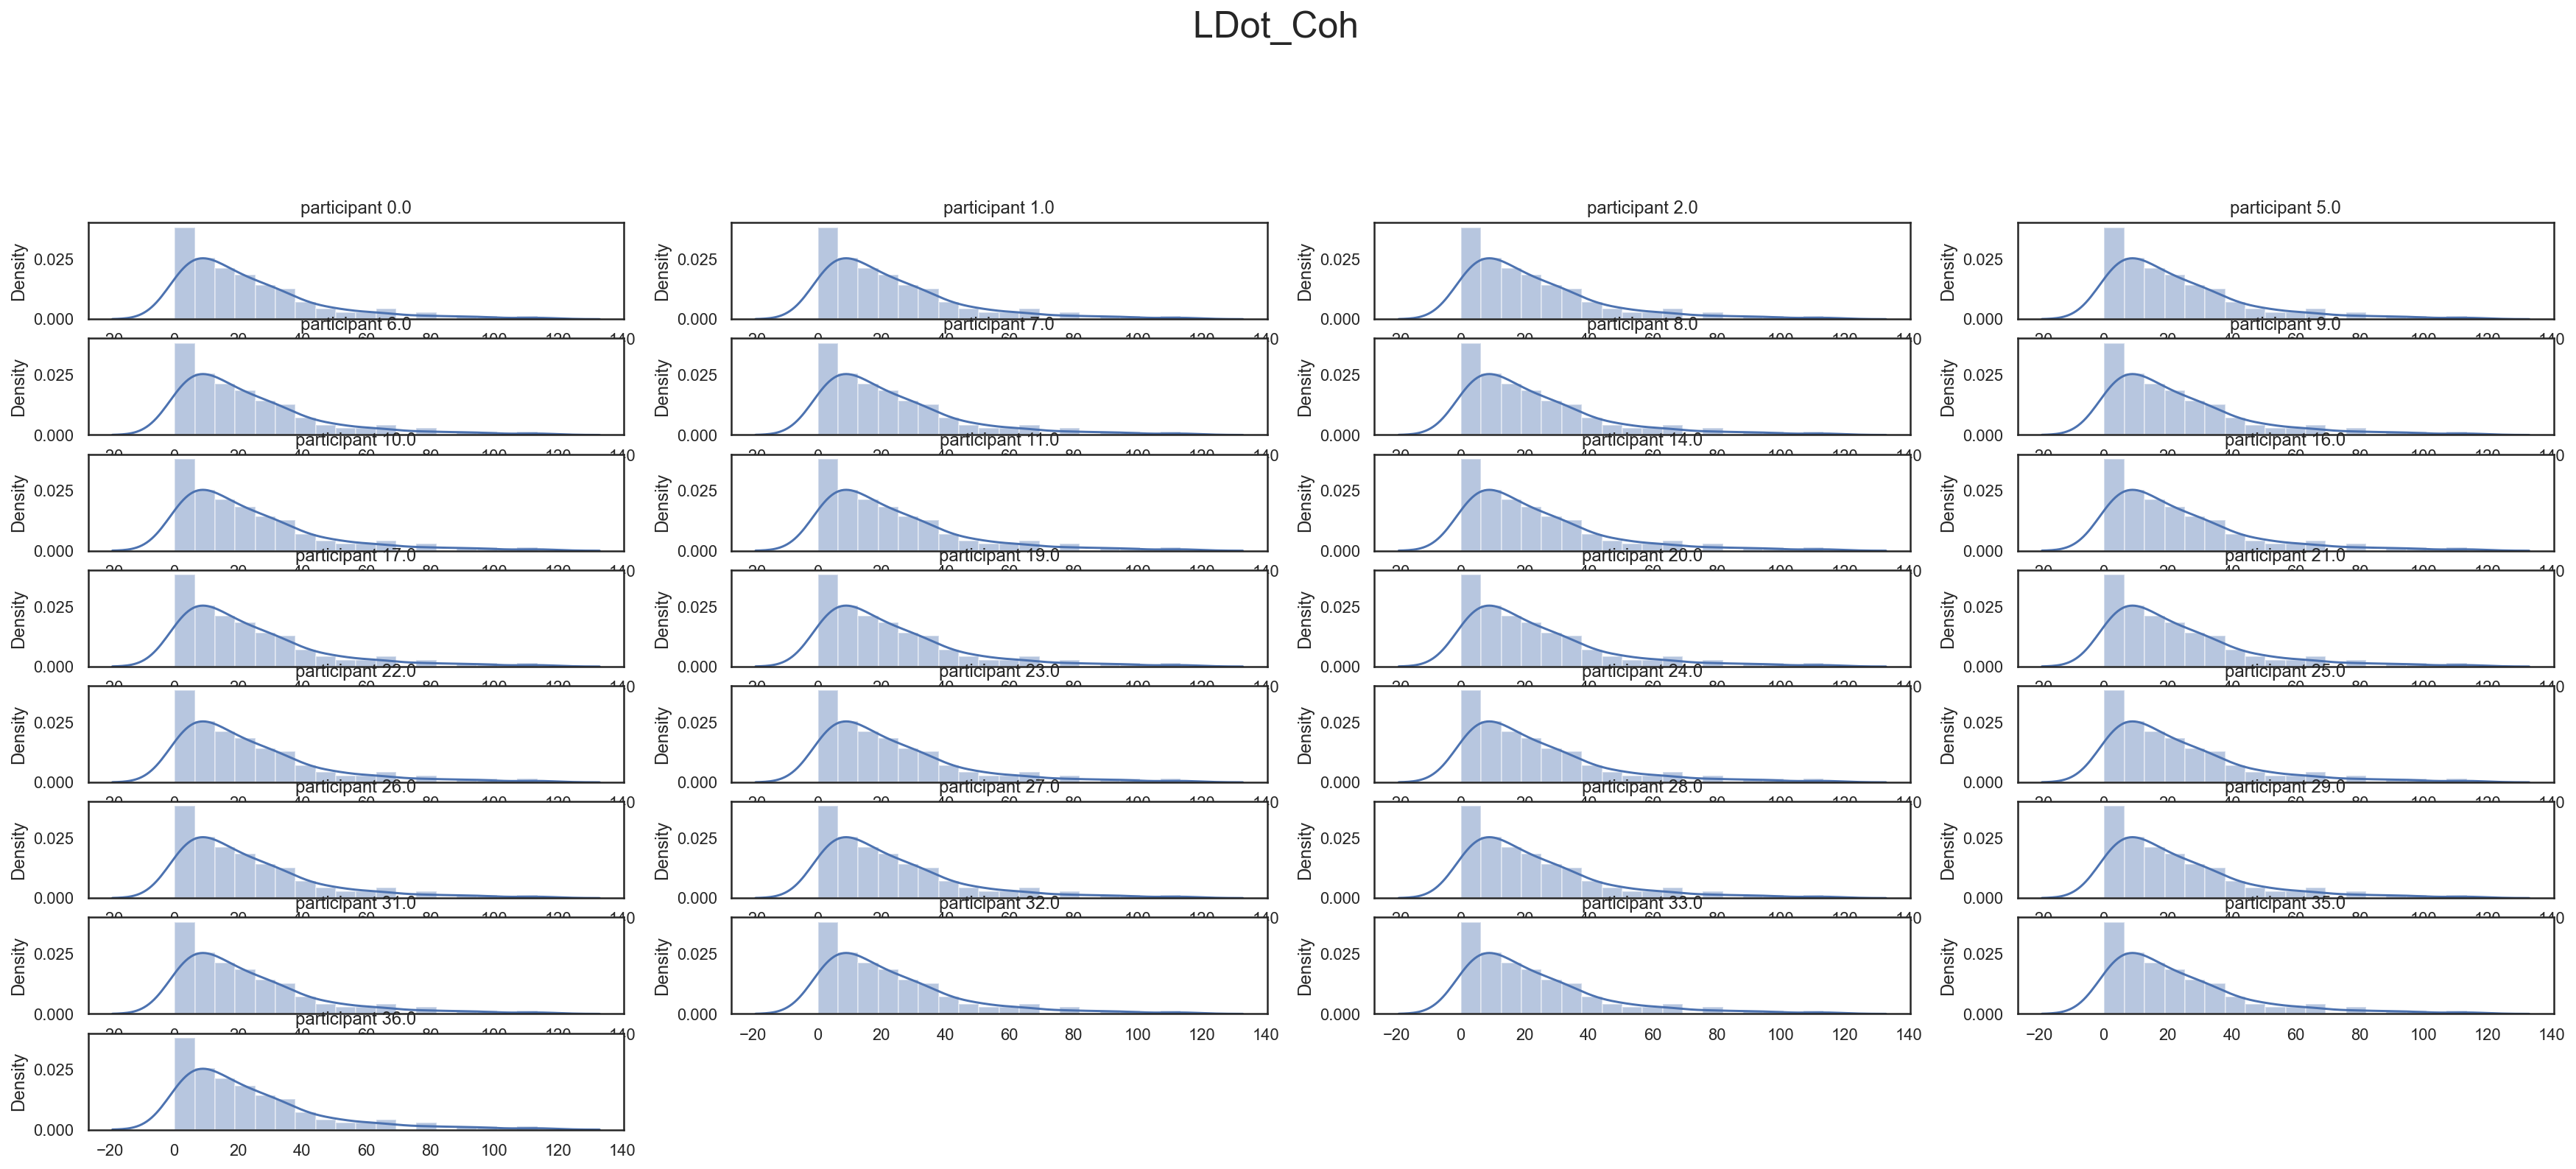

In [47]:
participant_histogram(choFrameAll,'LDot_Coh', title = 'LDot_Coh ')

/Users/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  from ipykernel import kernelapp as app
/Users/pradyumna/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  from ipykernel import kernelapp as app
/Users/pradyumna/anaconda3/lib/python3.7/site-packages/seaborn/dist

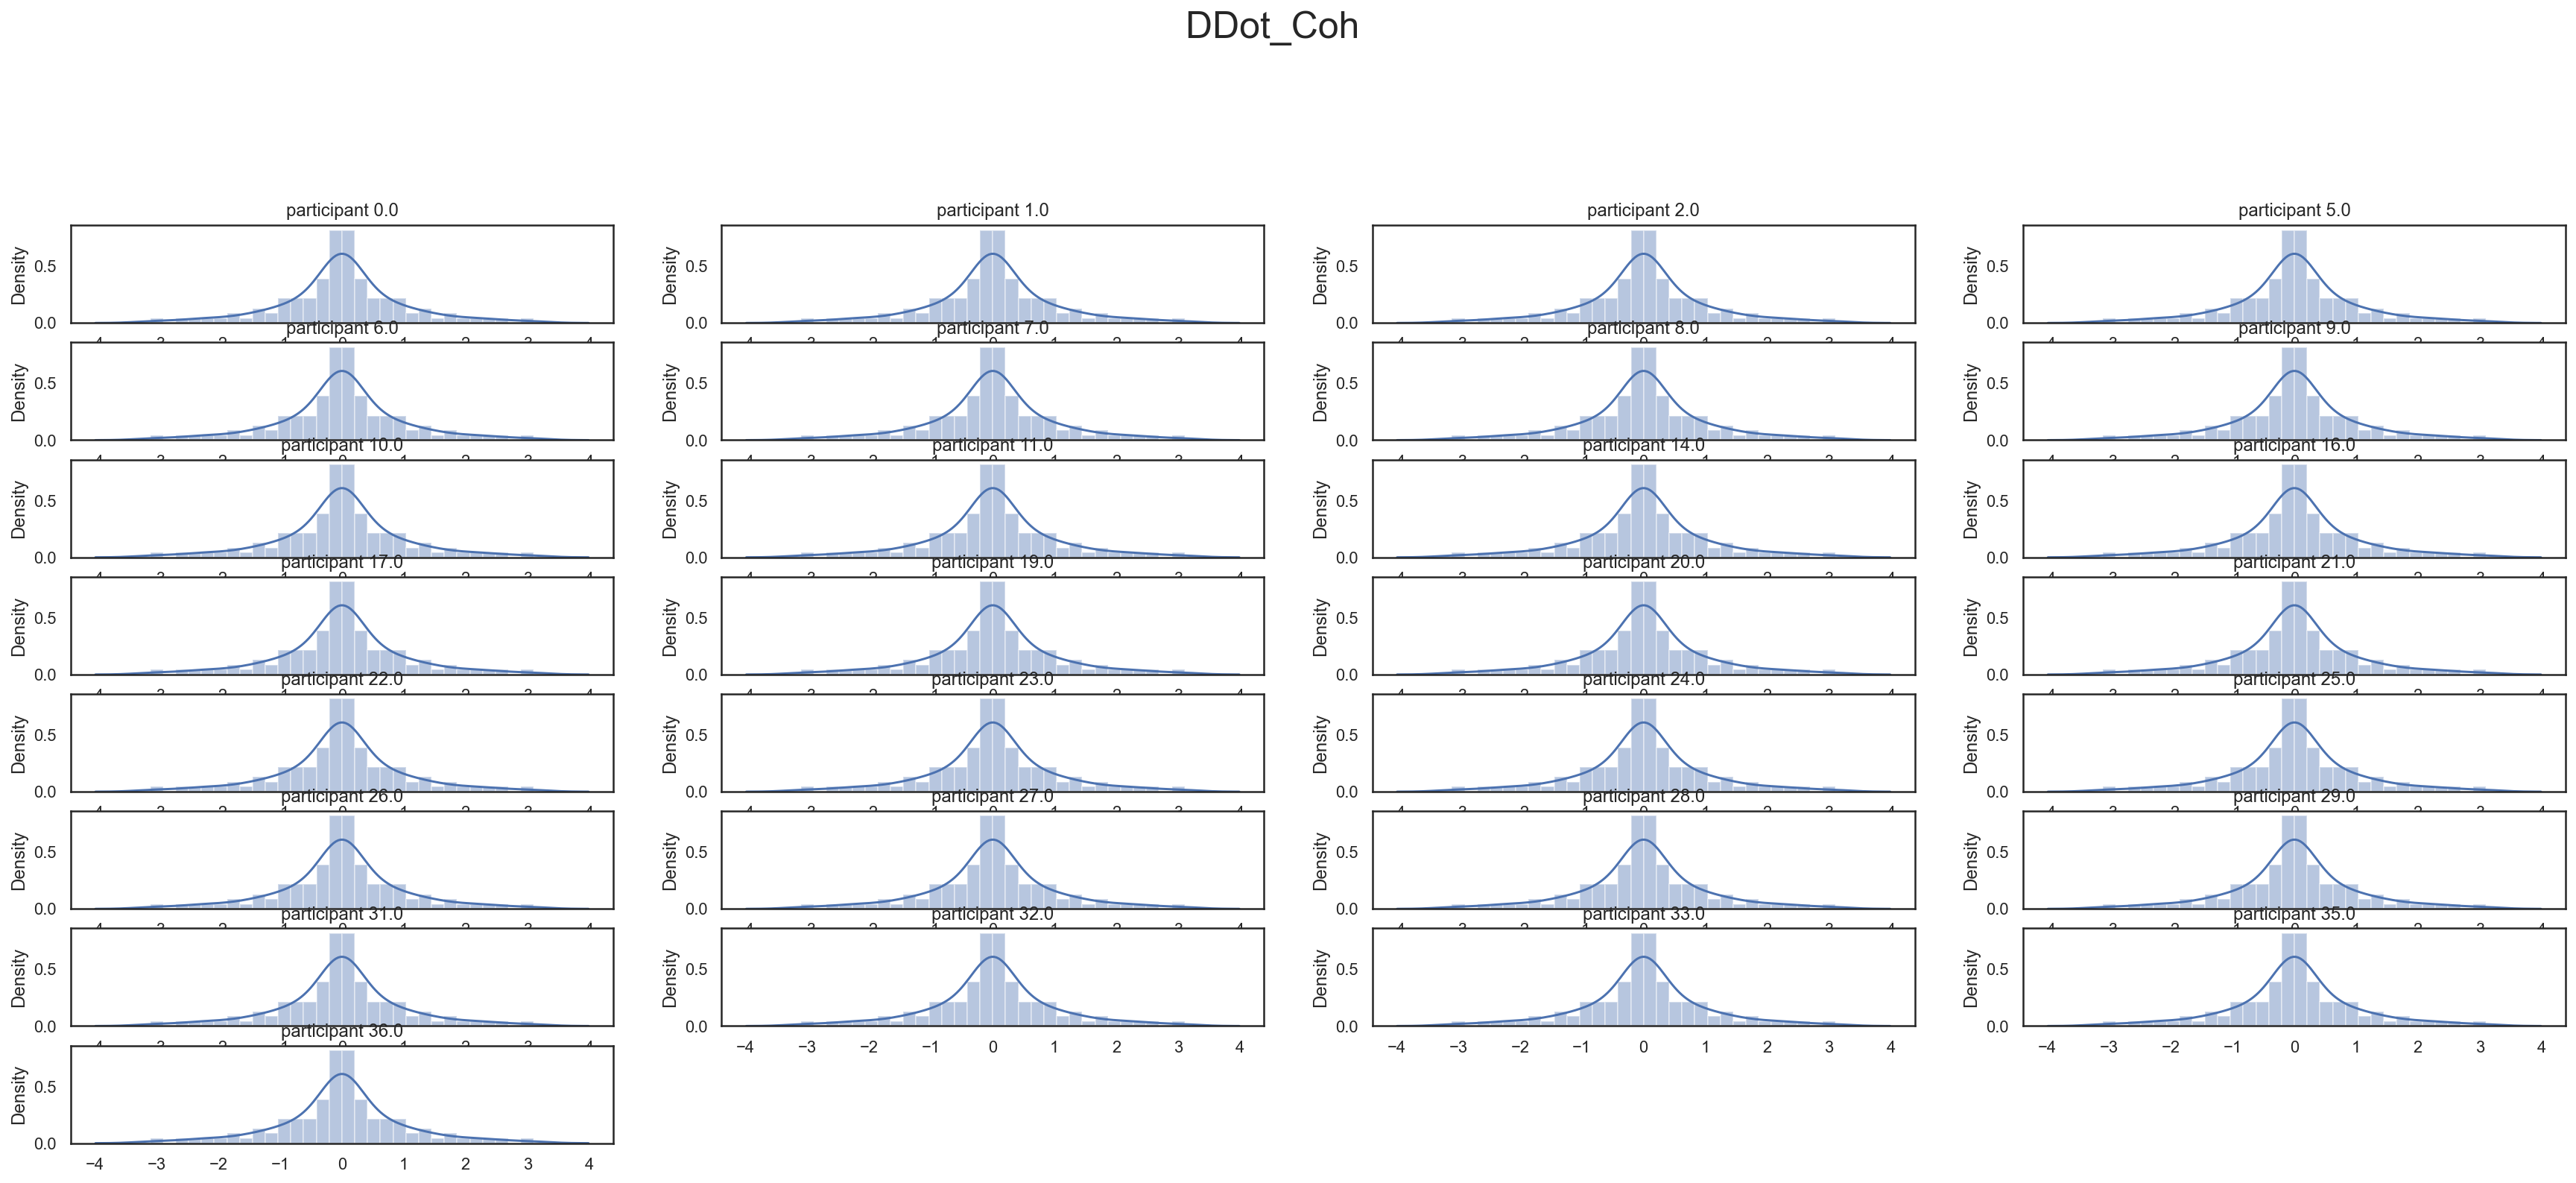

In [48]:
participant_histogram(choFrameAll,'zDDot_Coh', title = 'DDot_Coh ')

/Users/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  from ipykernel import kernelapp as app
/Users/pradyumna/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  from ipykernel import kernelapp as app
/Users/pradyumna/anaconda3/lib/python3.7/site-packages/seaborn/dist

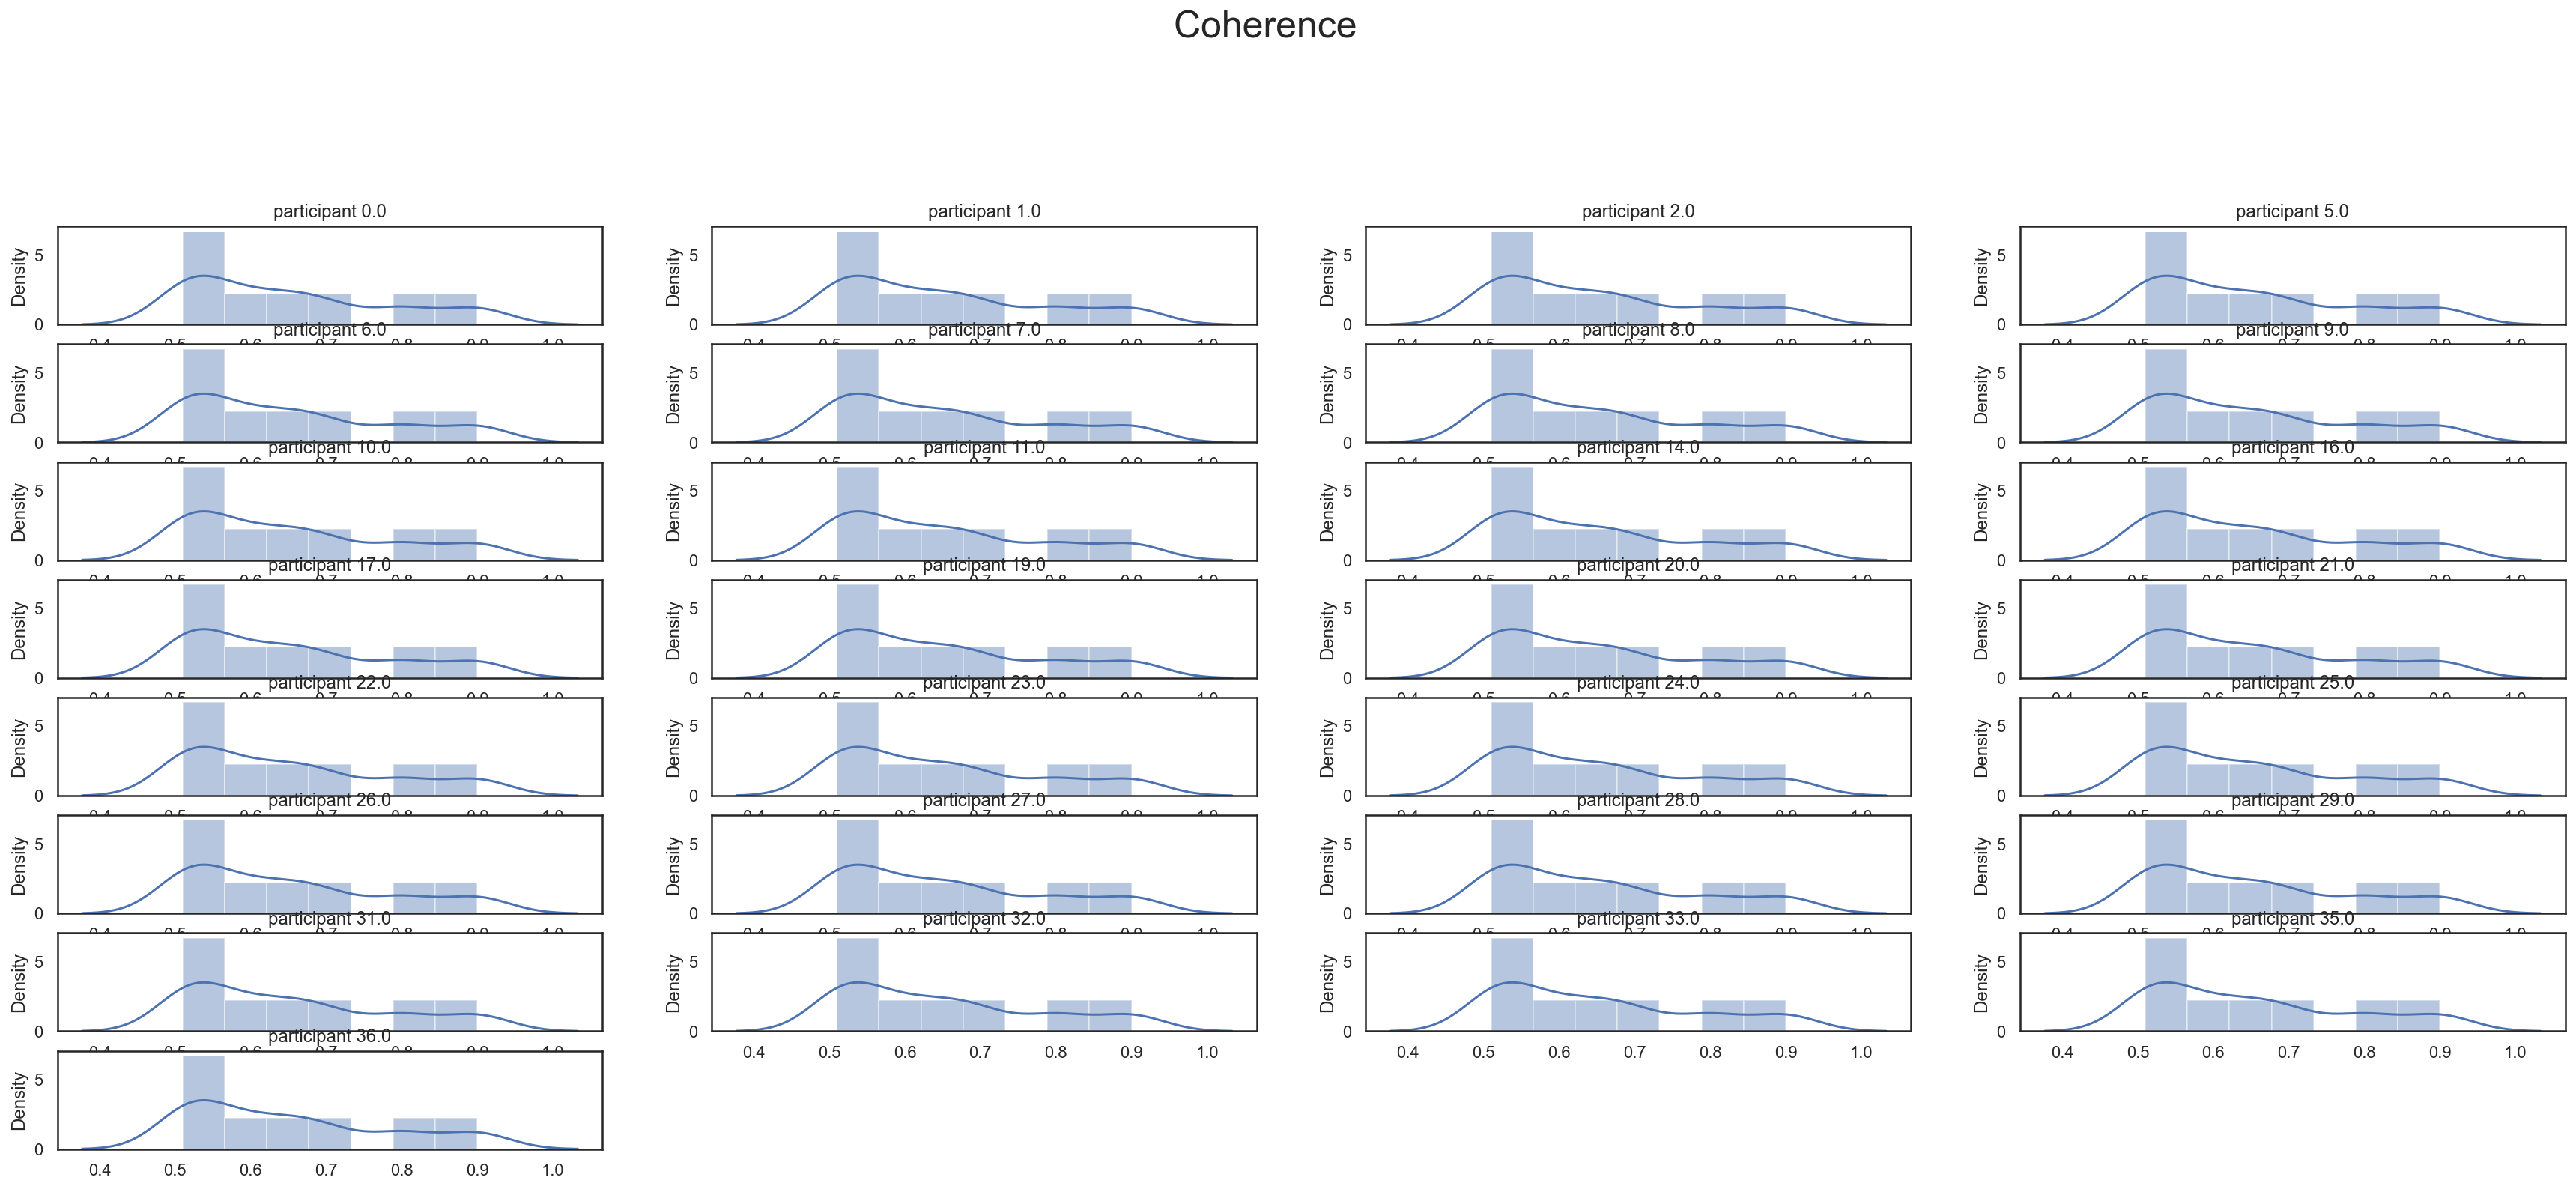

In [49]:
participant_histogram(data_exp1,'Coherence', title = 'Coherence ')

/Users/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:42: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/Users/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:42: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/Users/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:42: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/Users/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:42: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.

Part:  0.0 :logit coef = [[1.98640931]] ; Intercept:  [-0.03983635]
Part:  1.0 :logit coef = [[1.60947023]] ; Intercept:  [-1.07824867]
Part:  2.0 :logit coef = [[6.14927553]] ; Intercept:  [-5.44371]
Part:  5.0 :logit coef = [[3.89029426]] ; Intercept:  [-2.87372867]
Part:  6.0 :logit coef = [[2.86965869]] ; Intercept:  [1.96598052]
Part:  7.0 :logit coef = [[1.37573329]] ; Intercept:  [0.27252241]
Part:  8.0 :logit coef = [[2.57595819]] ; Intercept:  [-1.59824443]
Part:  9.0 :logit coef = [[1.67335068]] ; Intercept:  [0.38849395]


/Users/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:42: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/Users/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:42: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/Users/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:42: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/Users/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:42: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.

Part:  10.0 :logit coef = [[1.51848117]] ; Intercept:  [-0.82395453]
Part:  11.0 :logit coef = [[1.80276278]] ; Intercept:  [0.62724853]
Part:  14.0 :logit coef = [[1.8244448]] ; Intercept:  [-1.10734939]
Part:  16.0 :logit coef = [[1.33082309]] ; Intercept:  [0.5326597]
Part:  17.0 :logit coef = [[1.99827191]] ; Intercept:  [0.63130578]
Part:  19.0 :logit coef = [[1.85526158]] ; Intercept:  [1.9522363]
Part:  20.0 :logit coef = [[2.15046881]] ; Intercept:  [0.52724162]
Part:  21.0 :logit coef = [[2.24333517]] ; Intercept:  [1.23182575]
Part:  22.0 :logit coef = [[24.73184739]] ; Intercept:  [-21.42104077]


/Users/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:42: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/Users/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:42: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/Users/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:42: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/Users/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:42: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.

Part:  23.0 :logit coef = [[2.11001717]] ; Intercept:  [-0.04337312]
Part:  24.0 :logit coef = [[2.22830883]] ; Intercept:  [-0.81661443]
Part:  25.0 :logit coef = [[1.31931218]] ; Intercept:  [-0.4497808]
Part:  26.0 :logit coef = [[2.81313689]] ; Intercept:  [-1.16799912]
Part:  27.0 :logit coef = [[2.57887315]] ; Intercept:  [-1.01514492]


/Users/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:42: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/Users/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:42: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/Users/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:42: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/Users/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:42: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.

Part:  28.0 :logit coef = [[1.44778489]] ; Intercept:  [0.22698367]
Part:  29.0 :logit coef = [[2.22175022]] ; Intercept:  [-1.33194644]
Part:  31.0 :logit coef = [[2.44648125]] ; Intercept:  [2.06718074]
Part:  32.0 :logit coef = [[1.81801186]] ; Intercept:  [0.93784349]
Part:  33.0 :logit coef = [[1.4954194]] ; Intercept:  [0.32060195]
Part:  35.0 :logit coef = [[1.78780536]] ; Intercept:  [-0.34796155]


/Users/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:42: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/Users/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:42: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


Part:  36.0 :logit coef = [[1.1624]] ; Intercept:  [-0.78985494]


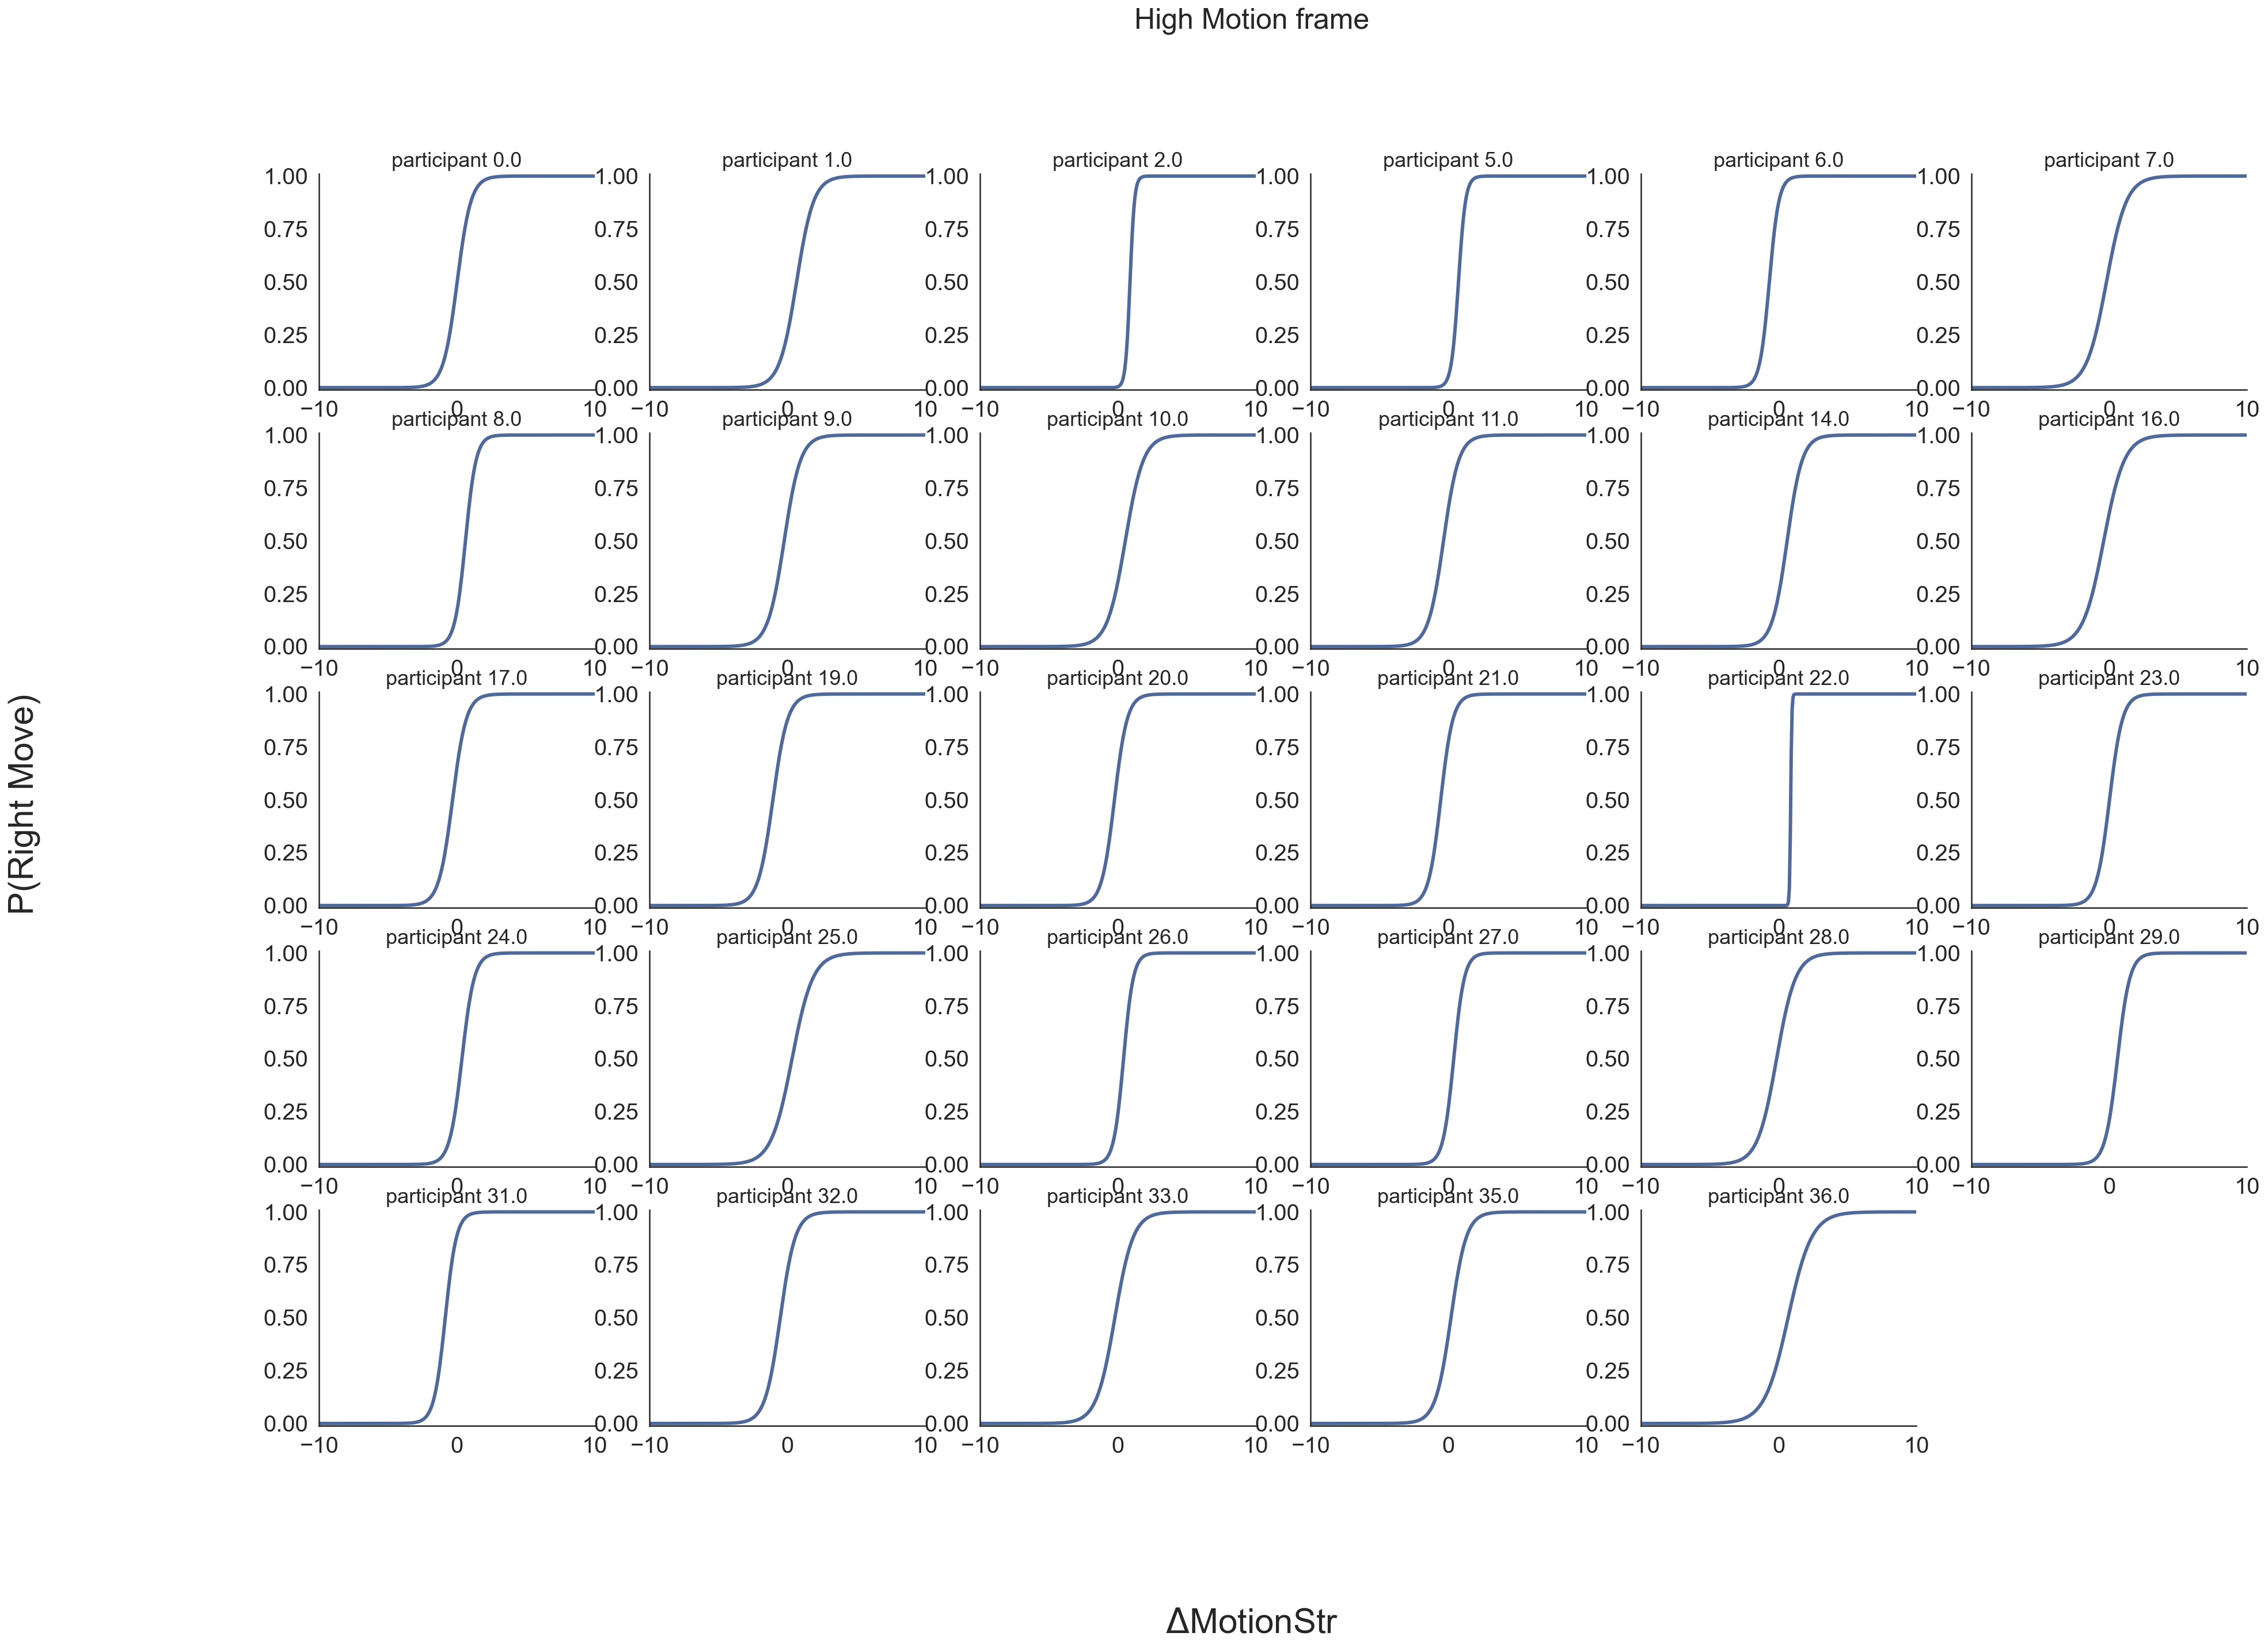

In [50]:
logisticplot_all_part( data=data_exp1, xaxis='zCoherenceSign', yaxis='Choice', ylab='P(Right Move)', xlab= r'$\Delta$MotionStr',
                 modlowcol='#4F6A9A', title='High Motion frame', parvar='Part')

/Users/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:42: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/Users/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:42: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/Users/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:42: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/Users/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:42: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.

Part:  0.0 :logit coef = [[-4.84274071]] ; Intercept:  [0.85834653]
Part:  1.0 :logit coef = [[-1.98308019]] ; Intercept:  [0.76820011]
Part:  2.0 :logit coef = [[-9.2912816]] ; Intercept:  [1.68409112]
Part:  5.0 :logit coef = [[-4.40343214]] ; Intercept:  [1.62864568]
Part:  6.0 :logit coef = [[-4.22408181]] ; Intercept:  [-2.14342952]
Part:  7.0 :logit coef = [[-2.19518258]] ; Intercept:  [-0.3500477]
Part:  8.0 :logit coef = [[-4.97821941]] ; Intercept:  [-0.34810908]
Part:  9.0 :logit coef = [[-4.20604936]] ; Intercept:  [-0.76162177]
Part:  10.0 :logit coef = [[-2.36063997]] ; Intercept:  [0.79286858]


/Users/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:42: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/Users/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:42: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/Users/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:42: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/Users/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:42: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.

Part:  11.0 :logit coef = [[-2.31333154]] ; Intercept:  [0.08200308]
Part:  14.0 :logit coef = [[-5.19607562]] ; Intercept:  [0.39562209]
Part:  16.0 :logit coef = [[-2.1513466]] ; Intercept:  [-0.18628991]
Part:  17.0 :logit coef = [[-2.52989748]] ; Intercept:  [-0.51577032]
Part:  19.0 :logit coef = [[-2.30360479]] ; Intercept:  [0.21872262]
Part:  20.0 :logit coef = [[-3.63653274]] ; Intercept:  [-0.57085104]
Part:  21.0 :logit coef = [[-1.91574335]] ; Intercept:  [-0.28105556]
Part:  22.0 :logit coef = [[-10.45092729]] ; Intercept:  [2.04467183]
Part:  23.0 :logit coef = [[-5.85430621]] ; Intercept:  [-0.50605337]


/Users/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:42: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/Users/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:42: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/Users/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:42: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/Users/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:42: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.

Part:  24.0 :logit coef = [[-3.77002838]] ; Intercept:  [-0.06741431]
Part:  25.0 :logit coef = [[-1.49137715]] ; Intercept:  [0.32948343]
Part:  26.0 :logit coef = [[-6.72621438]] ; Intercept:  [-0.36110526]
Part:  27.0 :logit coef = [[-5.53014013]] ; Intercept:  [0.96435828]
Part:  28.0 :logit coef = [[-0.84797138]] ; Intercept:  [-0.24459021]
Part:  29.0 :logit coef = [[-3.48370214]] ; Intercept:  [-0.52591112]
Part:  31.0 :logit coef = [[-3.76630312]] ; Intercept:  [-0.75788987]
Part:  32.0 :logit coef = [[-1.91578722]] ; Intercept:  [-0.02545491]
Part:  33.0 :logit coef = [[-2.88846922]] ; Intercept:  [-0.42223657]


/Users/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:42: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/Users/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:42: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


Part:  35.0 :logit coef = [[-3.73194856]] ; Intercept:  [-0.03354459]
Part:  36.0 :logit coef = [[-2.8782532]] ; Intercept:  [-1.78421831]


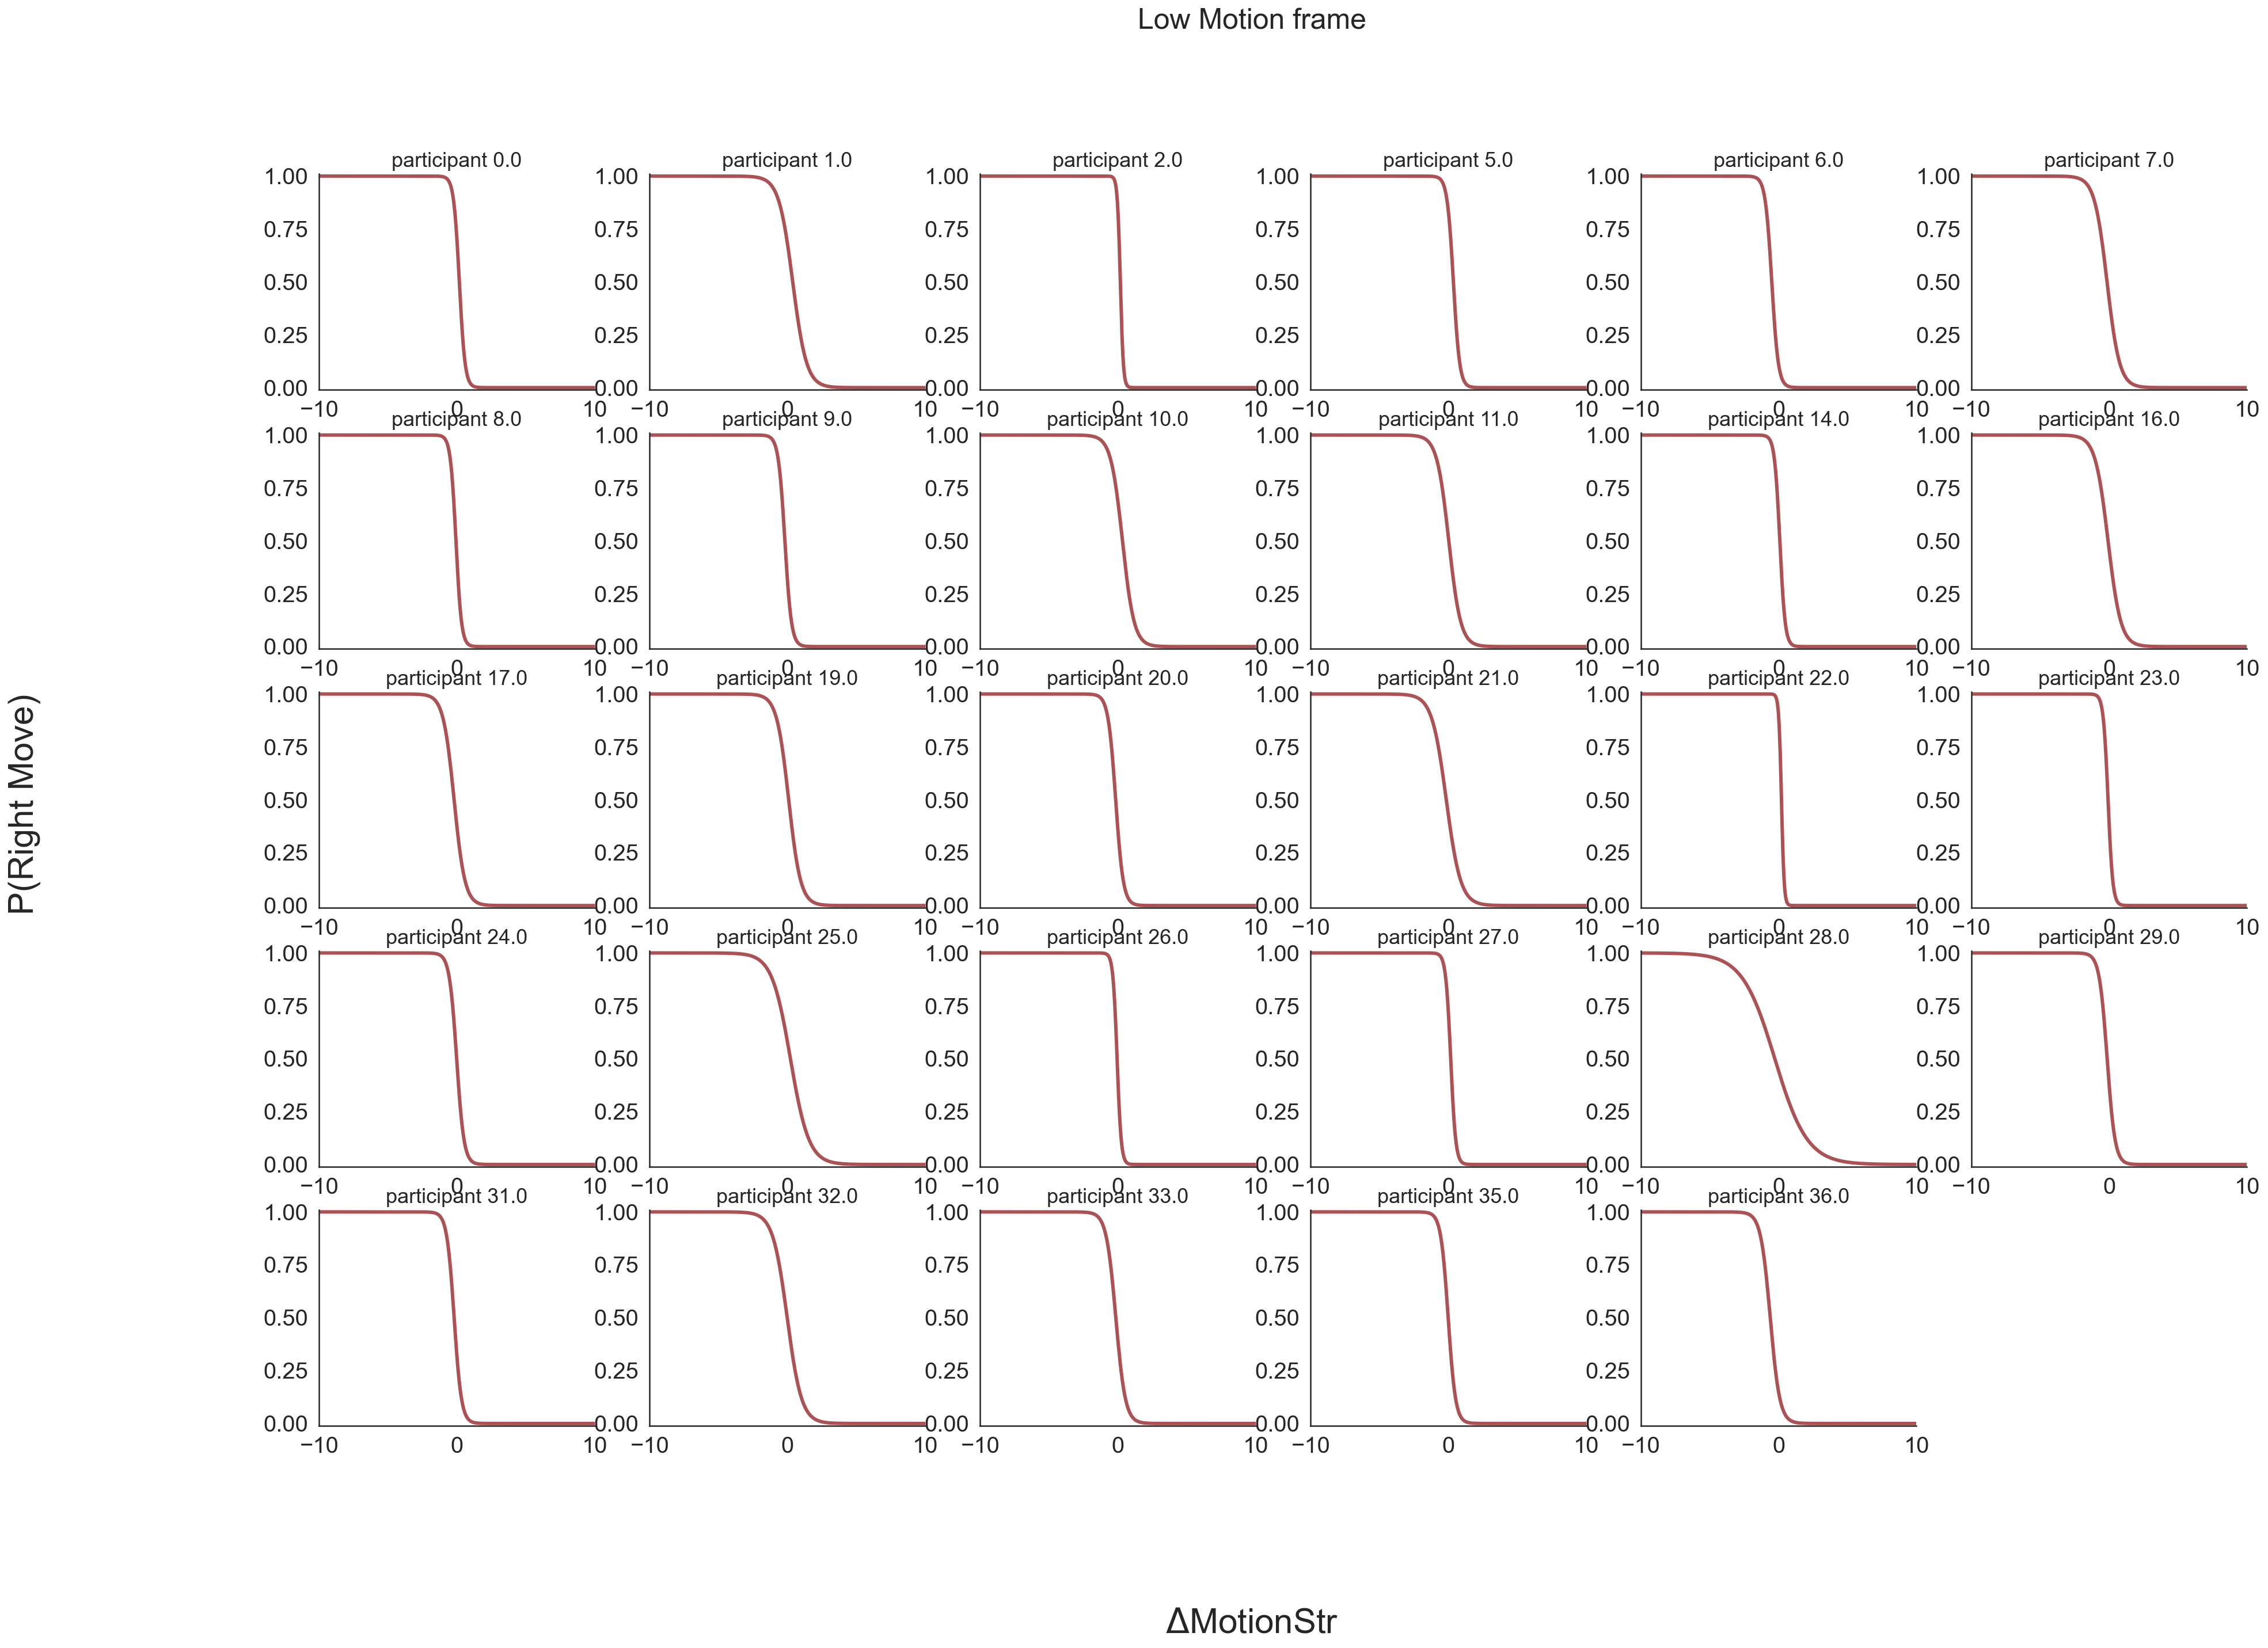

In [51]:
logisticplot_all_part( data=data_exp2, xaxis='zDDot_Coh', yaxis='Choice', ylab='P(Right Move)', xlab= r'$\Delta$MotionStr',
                 modlowcol='#AC5255', title='Low Motion frame', parvar='Part')

Logit coef = [[2.91959368]] ; Intercept:  [-0.09647151]


/Users/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


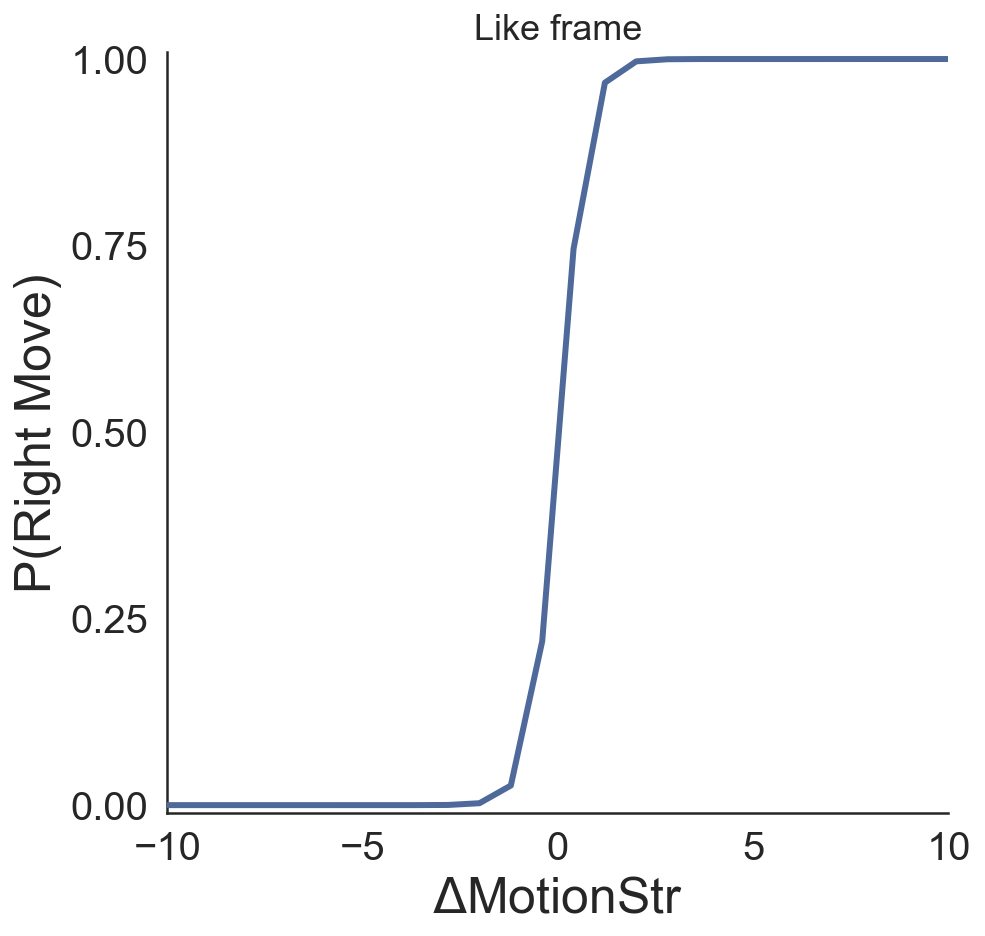

In [52]:
logisticplot_all( data=data_exp1, xaxis='zDDot_Coh', yaxis='Choice', ylab='P(Right Move)', xlab= r'$\Delta$MotionStr',
                 modlowcol='#4F6A9A', title='Like frame', parvar='Part')

/Users/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


Logit coef = [[-2.69423589]] ; Intercept:  [-0.05011847]


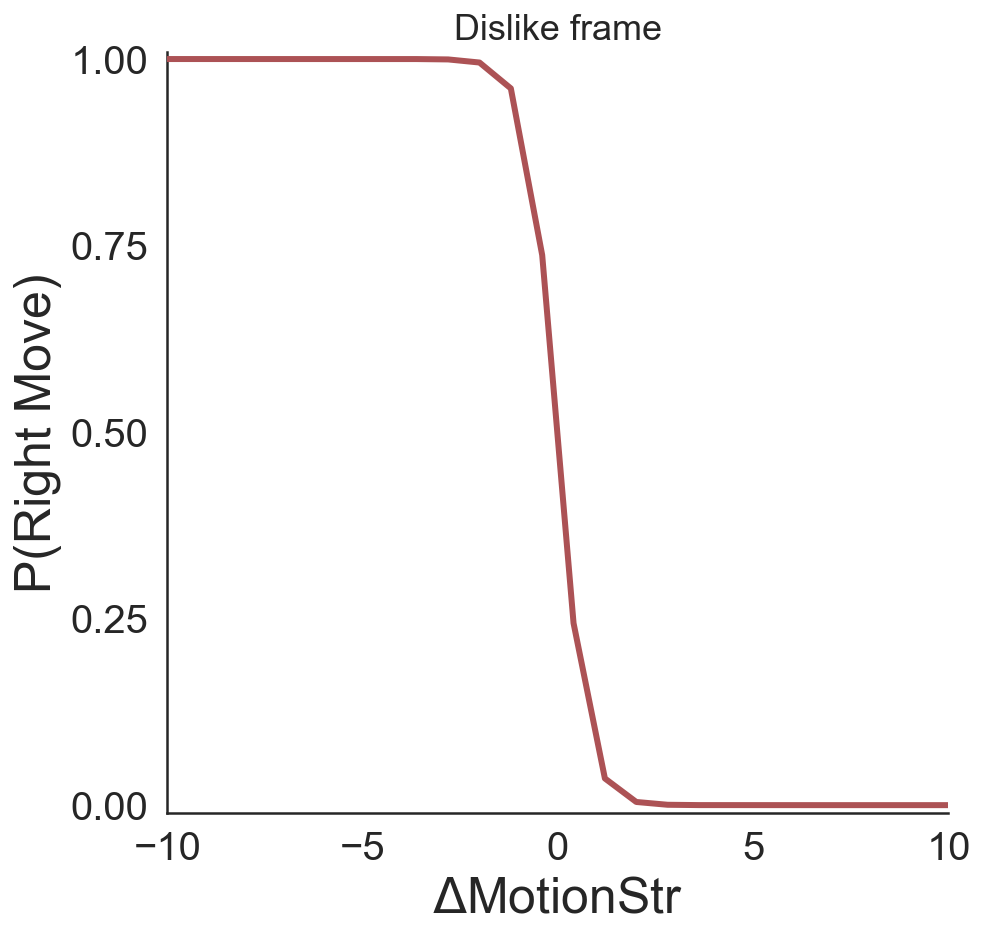

In [53]:
logisticplot_all( data=data_exp2, xaxis='zDDot_Coh', yaxis='Choice', ylab='P(Right Move)', xlab= r'$\Delta$MotionStr',
                 modlowcol='#AC5255', title='Dislike frame', parvar='Part')

/Users/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/Users/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


Low measure:logit coef = [[1.11130062]] ; Intercept:  [-0.19076951]
high measure:logit coef = [[2.10097282]] ; Intercept:  [0.03538729]


/Users/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


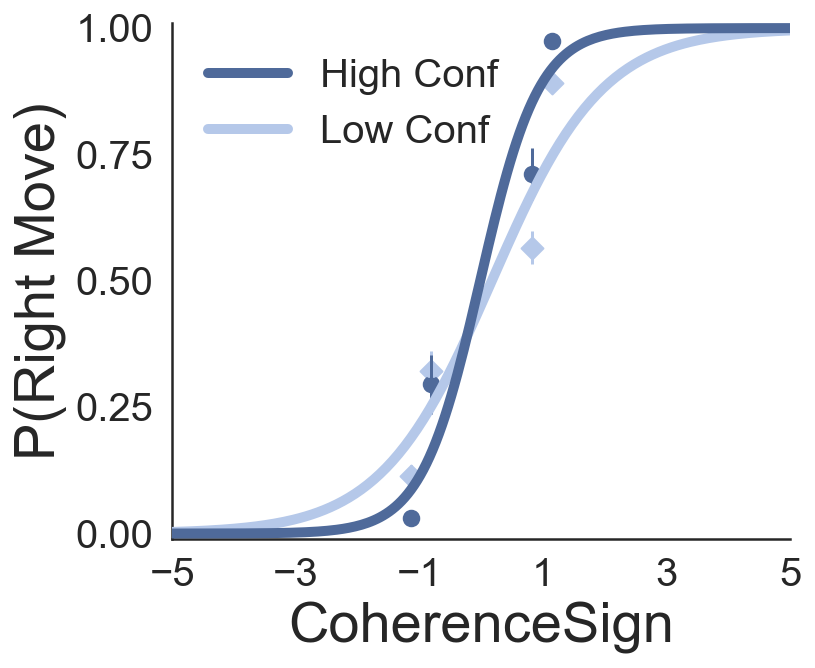

In [54]:
# Split by high/low conf
logisticplot_all_split('Conf_Split', 'High Conf', 'Low Conf', data=data_exp1, xaxis='zCoherenceSign', yaxis='Choice', ylab='P(Right Move)', xlab='CoherenceSign',
                 modhighcol='#4F6A9A', modlowcol='#B5C8E9', title='empty', parvar='Part')
plt.tight_layout()
#plt.savefig('SavedFigures/LogisticChoiceLike_31.svg', format='svg', dpi = 500 )

/Users/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/Users/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/Users/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Low measure:logit coef = [[-1.04537049]] ; Intercept:  [-0.13418892]
high measure:logit coef = [[-2.31593053]] ; Intercept:  [0.09618316]


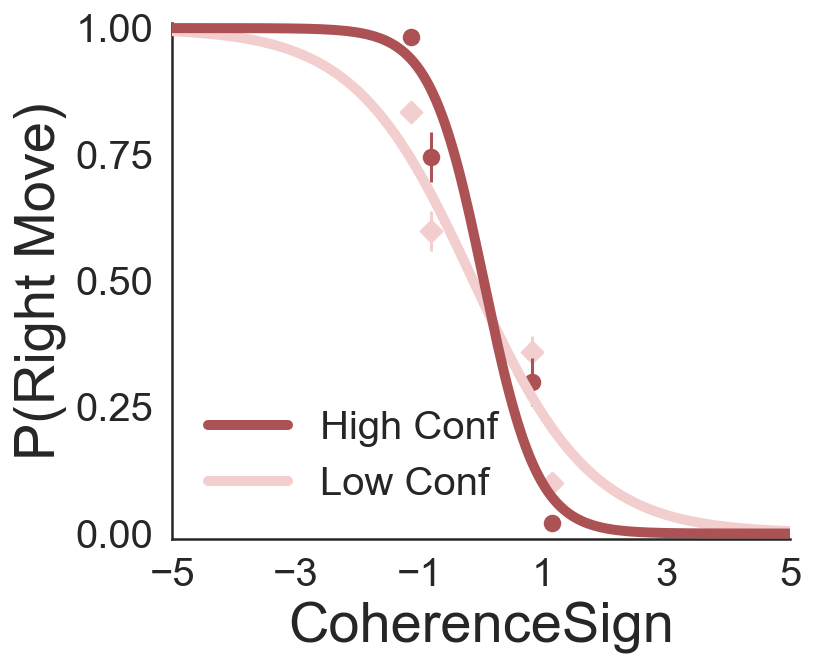

In [55]:
# Split by high/low conf
logisticplot_all_split('Conf_Split', 'High Conf', 'Low Conf', data=data_exp2, xaxis='zCoherenceSign', yaxis='Choice', ylab='P(Right Move)', xlab='CoherenceSign',
                 modhighcol='#AC5255', modlowcol='#F2CECF', title='empty', parvar='Part')
plt.tight_layout()
#plt.savefig('SavedFigures/LogisticChoiceDislike1_31.svg', format='svg', dpi = 500 )

In [56]:
choFrameAll[choFrameAll.Part == 2].Correct.mean()

0.8214285714285714

# Accuracy per participant

In [57]:
accuracies = pd.DataFrame( columns = [])

In [58]:
accuracy_like = []
accuracy_dislike = []

for i in choFrameAll.Part.unique():
    accuracy_like.append(choFrameAll.loc[(choFrameAll['Frame'] == 1) & (choFrameAll['Part'] == i)].Correct.mean())
    accuracy_dislike.append(choFrameAll.loc[(choFrameAll['Frame'] == 2) & (choFrameAll['Part'] == i)].Correct.mean())

accuracies['participant'] = range(len(choFrameAll.Part.unique()))
accuracies['most'] = accuracy_like
accuracies['few'] = accuracy_dislike

In [59]:
accuracies

participant      most       few
0             0  0.852679  0.848214
1             1  0.754464  0.763393
2             2  0.790179  0.852679
3             3  0.830357  0.808036
4             4  0.821429  0.750000
5             5  0.767857  0.763393
6             6  0.825893  0.825893
7             7  0.803571  0.790179
8             8  0.767857  0.750000
9             9  0.812500  0.763393
10           10  0.776786  0.875000
11           11  0.741071  0.790179
12           12  0.830357  0.821429
13           13  0.700893  0.767857
14           14  0.857143  0.825893
15           15  0.821429  0.763393
16           16  0.816964  0.839286
17           17  0.861607  0.839286
18           18  0.857143  0.839286
19           19  0.754464  0.705357
20           20  0.883929  0.857143
21           21  0.875000  0.888393
22           22  0.776786  0.651786
23           23  0.808036  0.794643
24           24  0.758929  0.767857
25           25  0.790179  0.745536
26           26  0.772321  0.776786
27           27  0.821429  0.843750
28           28  0.714286  0.718750

In [60]:
print (' High Motion accuracy: ' + str(np.mean(accuracies.most)))
print (' Low Motion accuracy: ' + str(np.mean(accuracies.few)))

 High Motion accuracy: 0.8015701970443353
 Low Motion accuracy: 0.794027093596059


<AxesSubplot:title={'center':'Accuracy, extracted from Coherence info'}, xlabel='participant'>

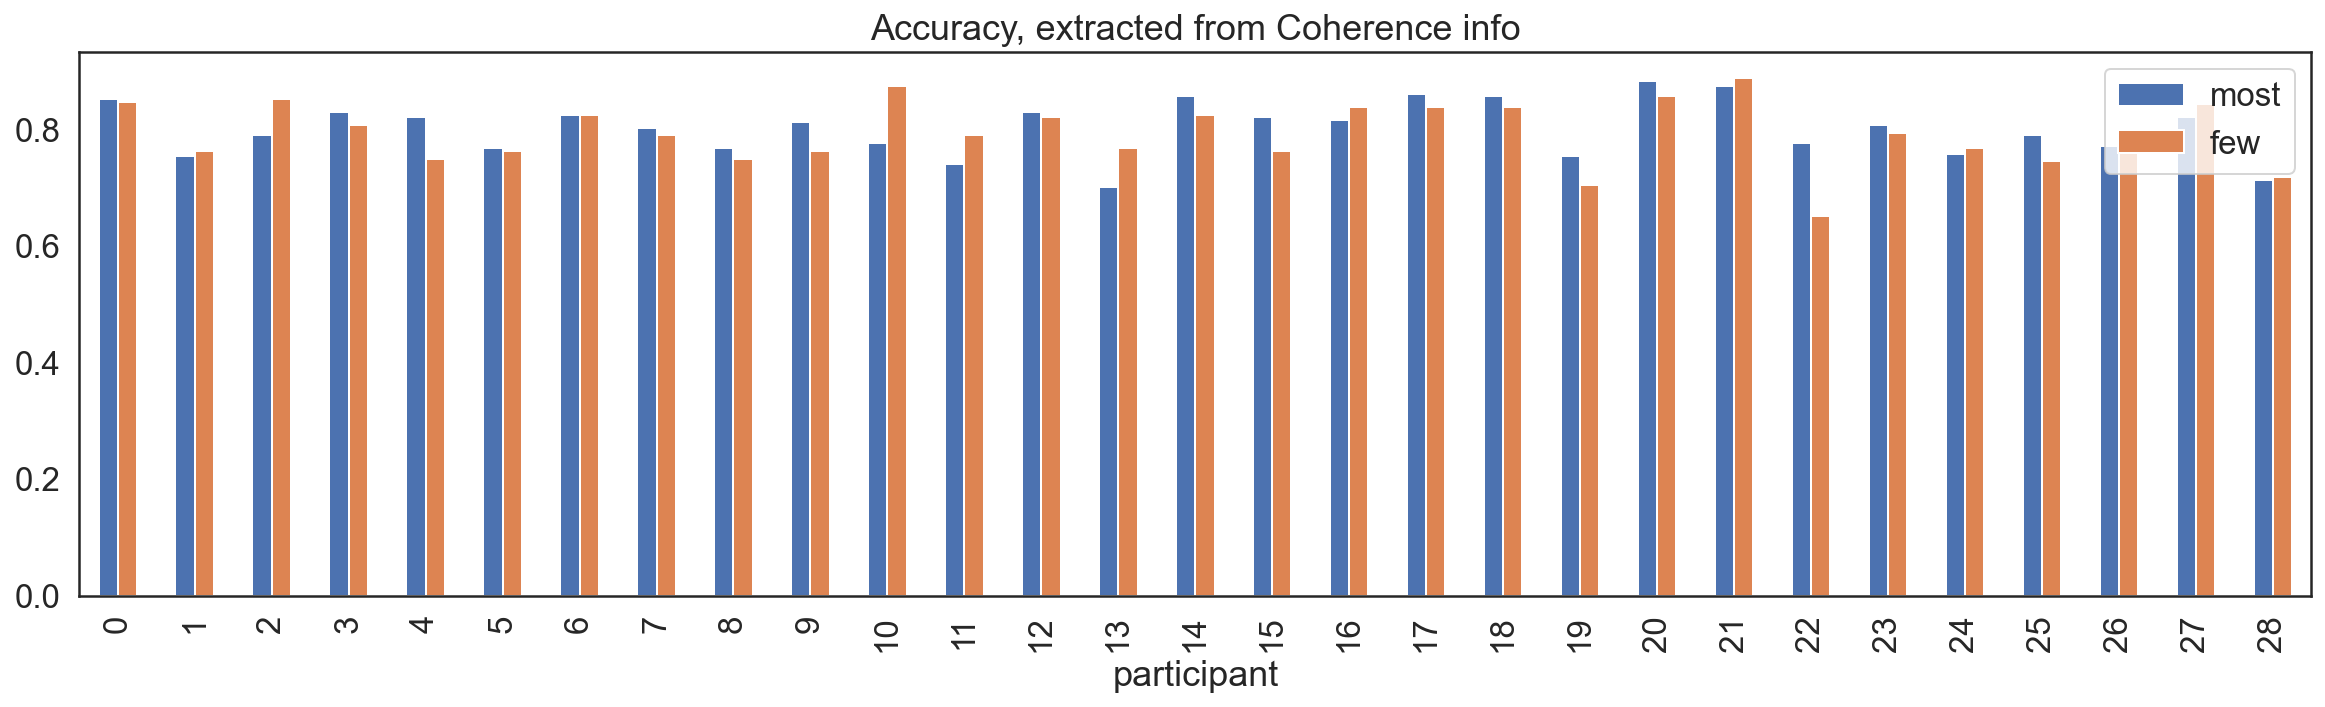

In [61]:
accuracies.plot.bar(x='participant',y=['most','few'], figsize=(20,5),title = 'Accuracy, extracted from Coherence info')

In [62]:
accuracies = pd.DataFrame( columns = [])

In [63]:
accuracy_like = []
accuracy_dislike = []

for i in choFrameAll.Part.unique():
    accuracy_like.append(choFrameAll.loc[(choFrameAll['Frame'] == 1) & (choFrameAll['Part'] == i)].CorrectDots.mean())
    accuracy_dislike.append(choFrameAll.loc[(choFrameAll['Frame'] == 2) & (choFrameAll['Part'] == i)].CorrectDots.mean())

accuracies['participant'] = range(len(choFrameAll.Part.unique()))
accuracies['most'] = accuracy_like
accuracies['few'] = accuracy_dislike

<AxesSubplot:title={'center':'Accuracy, extracted from Correct Dots'}, xlabel='participant'>

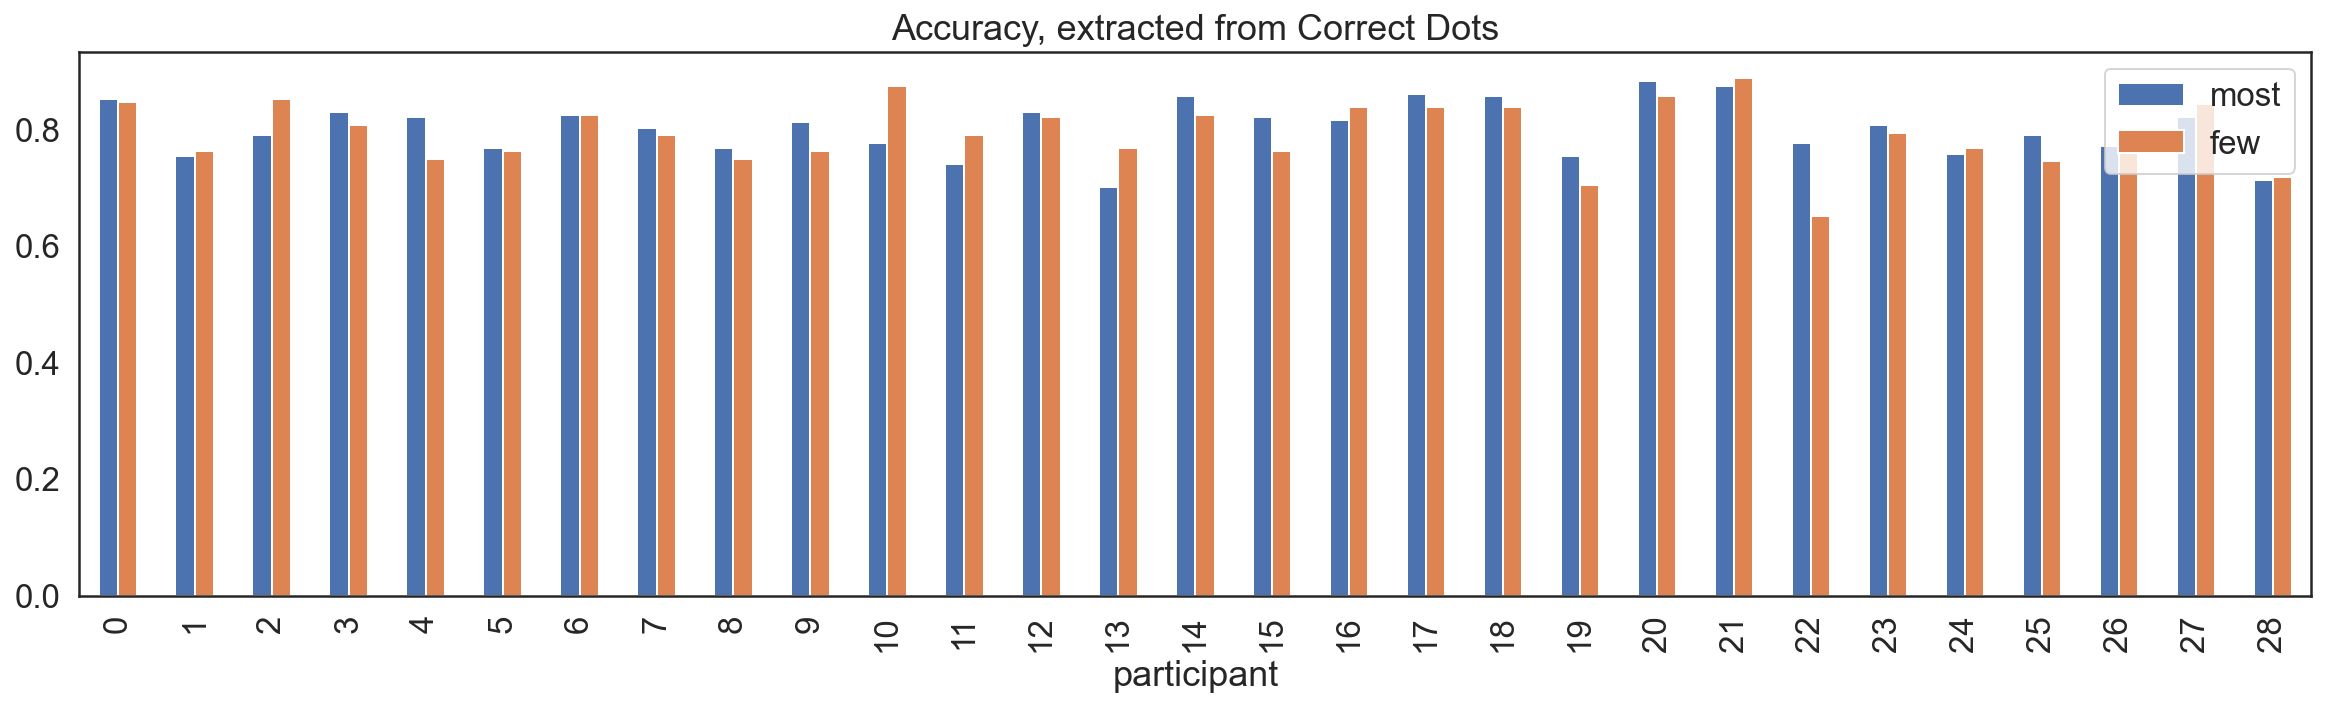

In [64]:
accuracies.plot.bar(x='participant',y=['most','few'], figsize=(20,5),title = 'Accuracy, extracted from Correct Dots')

# Regression plots

In [46]:
%R -i data_exp1 -i data_exp2

In [47]:
%%R
# Separating the data for both conditions 
data_exp1_Like <- data_exp1
data_exp1_DisLike <- data_exp2

[1] "Like BIC:"
[1] 5687.186
[1] "DisLike BIC:"
[1] 5673.741


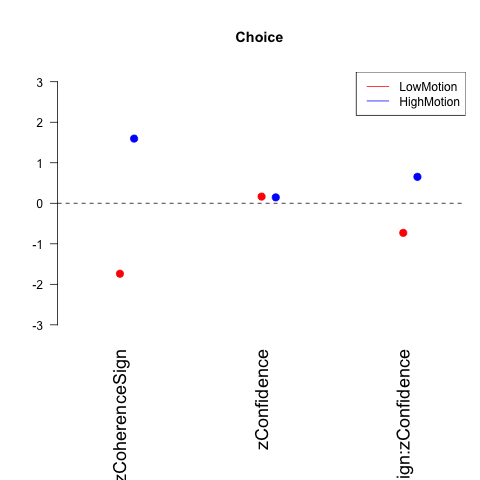

In [48]:
%%R
title_plot = "Choice "

ModelChoiceL_1 <- glm(Choice ~ zCoherenceSign + zConfidence + zCoherenceSign:zConfidence , data=data_exp1_Like, family=binomial(link="logit"))
ModelChoiceD_1 <- glm(Choice ~zCoherenceSign + zConfidence + zCoherenceSign:zConfidence , data=data_exp1_DisLike, family=binomial(link="logit"))

BIC1 = BIC(ModelChoiceL_1)
BIC2 = BIC(ModelChoiceD_1)
print("Like BIC:")
print(BIC1)
print("DisLike BIC:")
print(BIC2)

coefplot(ModelChoiceD_1,intercept=FALSE,vertical = FALSE,  col.pts="red", cex.var=1.5, cex.pts=2, mar = c(8,4,5,1) ,ylim=c(-3, 3) ,main=title_plot)
coefplot(ModelChoiceL_1, intercept=FALSE, vertical = FALSE, add=TRUE, col.pts="blue", cex.var=1.5, cex.pts=2,mar = c(8,4,5,1))
legend("topright",  legend=c("LowMotion", "HighMotion"),col=c("red", "blue"), lty=1:1, cex=1)

[1] "Like BIC:"
[1] 5687.186
[1] "DisLike BIC:"
[1] 5673.741


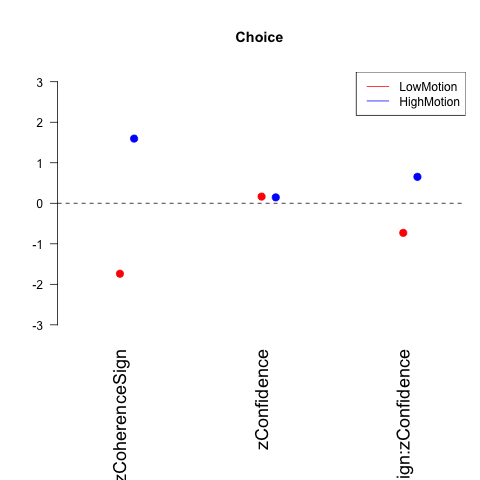

In [49]:
%%R
title_plot = "Choice "

ModelChoiceL_1 <- glm(Choice ~ zCoherenceSign + zConfidence + zCoherenceSign:zConfidence , data=data_exp1_Like, family=binomial(link="logit"))
ModelChoiceD_1 <- glm(Choice ~zCoherenceSign + zConfidence + zCoherenceSign:zConfidence , data=data_exp1_DisLike, family=binomial(link="logit"))

BIC1 = BIC(ModelChoiceL_1)
BIC2 = BIC(ModelChoiceD_1)
print("Like BIC:")
print(BIC1)
print("DisLike BIC:")
print(BIC2)

coefplot(ModelChoiceD_1,intercept=FALSE,vertical = FALSE,  col.pts="red", cex.var=1.5, cex.pts=2, mar = c(8,4,5,1) ,ylim=c(-3, 3) ,main=title_plot)
coefplot(ModelChoiceL_1, intercept=FALSE, vertical = FALSE, add=TRUE, col.pts="blue", cex.var=1.5, cex.pts=2,mar = c(8,4,5,1))
legend("topright",  legend=c("LowMotion", "HighMotion"),col=c("red", "blue"), lty=1:1, cex=1)

[1] "Like BIC:"
[1] 5540.222
[1] "DisLike BIC:"
[1] 5629.02


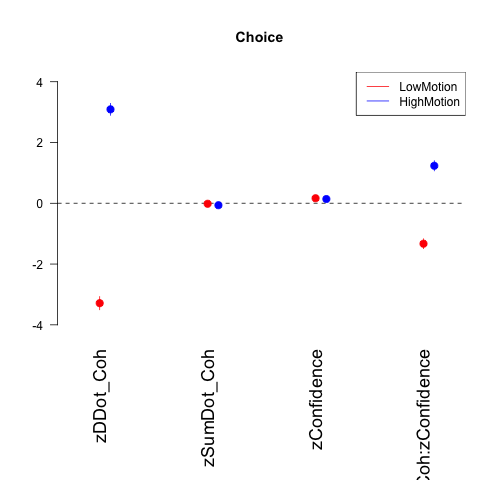

In [50]:
%%R
title_plot = "Choice "

ModelChoiceL_1 <- glm(Choice ~ zDDot_Coh +zSumDot_Coh+ zConfidence + zDDot_Coh:zConfidence , data=data_exp1_Like, family=binomial(link="logit"))
ModelChoiceD_1 <- glm(Choice ~ zDDot_Coh +zSumDot_Coh+ zConfidence + zDDot_Coh:zConfidence , data=data_exp1_DisLike, family=binomial(link="logit"))

BIC1 = BIC(ModelChoiceL_1)
BIC2 = BIC(ModelChoiceD_1)
print("Like BIC:")
print(BIC1)
print("DisLike BIC:")
print(BIC2)

coefplot(ModelChoiceD_1,intercept=FALSE,vertical = FALSE,  col.pts="red", cex.var=1.5, cex.pts=2,ylim=c(-4, 4), mar = c(8,4,5,1)  ,main=title_plot)
coefplot(ModelChoiceL_1, intercept=FALSE, vertical = FALSE, add=TRUE, col.pts="blue", cex.var=1.5, cex.pts=2,mar = c(8,4,5,1))
legend("topright",  legend=c("LowMotion", "HighMotion"),col=c("red", "blue"), lty=1:1, cex=1)

[1] "Like BIC:"
[1] 6000.307
[1] "DisLike BIC:"
[1] 6157.727

Call:  glm(formula = Choice ~ zCoherenceSign + zConfidence + zSumDot + 
    zCoherenceSign:zSumDot, family = binomial(link = "logit"), 
    data = data_exp1_Like)

Coefficients:
           (Intercept)          zCoherenceSign             zConfidence  
              -0.10984                 1.60564                 0.19116  
               zSumDot  zCoherenceSign:zSumDot  
              -0.06059                -0.00499  

Degrees of Freedom: 6495 Total (i.e. Null);  6491 Residual
Null Deviance:	    9000 
Residual Deviance: 5956 	AIC: 5966

Call:  glm(formula = Choice ~ zCoherenceSign + zConfidence + zSumDot + 
    zCoherenceSign:zSumDot, family = binomial(link = "logit"), 
    data = data_exp1_DisLike)

Coefficients:
           (Intercept)          zCoherenceSign             zConfidence  
              -0.01843                -1.53984                 0.15675  
               zSumDot  zCoherenceSign:zSumDot  
              -0.01

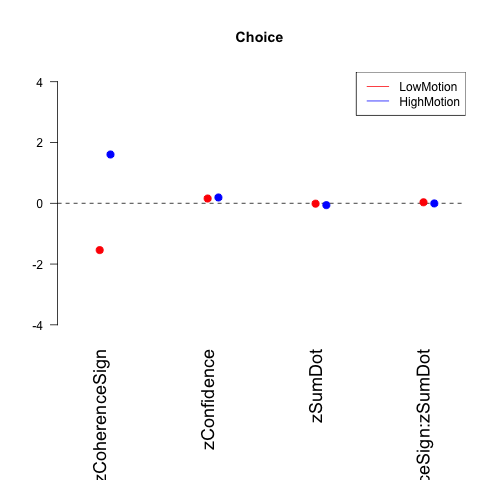

In [51]:
%%R
title_plot = "Choice "

ModelChoiceL_1 <- glm(Choice ~ zCoherenceSign + zConfidence + zSumDot + zCoherenceSign:zSumDot , data=data_exp1_Like, family=binomial(link="logit"))
ModelChoiceD_1 <- glm(Choice ~ zCoherenceSign + zConfidence + zSumDot + zCoherenceSign:zSumDot, data=data_exp1_DisLike, family=binomial(link="logit"))

BIC1 = BIC(ModelChoiceL_1)
BIC2 = BIC(ModelChoiceD_1)
print("Like BIC:")
print(BIC1)
print("DisLike BIC:")
print(BIC2)


print(ModelChoiceL_1)
print(ModelChoiceD_1)

coefplot(ModelChoiceD_1,intercept=FALSE,vertical = FALSE,  col.pts="red", cex.var=1.5, cex.pts=2,ylim=c(-4, 4), mar = c(8,4,5,1)  ,main=title_plot)
coefplot(ModelChoiceL_1, intercept=FALSE, vertical = FALSE, add=TRUE, col.pts="blue", cex.var=1.5, cex.pts=2,mar = c(8,4,5,1))
legend("topright",  legend=c("LowMotion", "HighMotion"),col=c("red", "blue"), lty=1:1, cex=1)

[1] "Like BIC:"
[1] 5692.614
[1] "DisLike BIC:"
[1] 5682.403

Call:  glm(formula = Choice ~ zCoherenceSign + zConfidence + zSumDot + 
    zCoherenceSign:zConfidence, family = binomial(link = "logit"), 
    data = data_exp1_Like)

Coefficients:
               (Intercept)              zCoherenceSign  
                  -0.06920                     1.59770  
               zConfidence                     zSumDot  
                   0.14972                    -0.06128  
zCoherenceSign:zConfidence  
                   0.65277  

Degrees of Freedom: 6495 Total (i.e. Null);  6491 Residual
Null Deviance:	    9000 
Residual Deviance: 5649 	AIC: 5659

Call:  glm(formula = Choice ~ zCoherenceSign + zConfidence + zSumDot + 
    zCoherenceSign:zConfidence, family = binomial(link = "logit"), 
    data = data_exp1_DisLike)

Coefficients:
               (Intercept)              zCoherenceSign  
                  0.001814                   -1.738913  
               zConfidence                     zSu

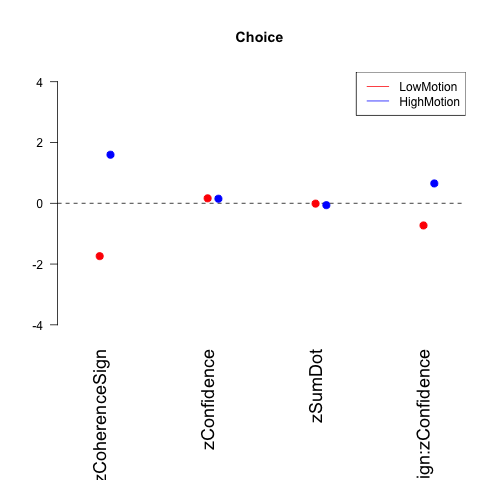

In [52]:
%%R
title_plot = "Choice "

ModelChoiceL_1 <- glm(Choice ~ zCoherenceSign + zConfidence + zSumDot + zCoherenceSign:zConfidence , data=data_exp1_Like, family=binomial(link="logit"))
ModelChoiceD_1 <- glm(Choice ~ zCoherenceSign + zConfidence + zSumDot + zCoherenceSign:zConfidence, data=data_exp1_DisLike, family=binomial(link="logit"))

BIC1 = BIC(ModelChoiceL_1)
BIC2 = BIC(ModelChoiceD_1)
print("Like BIC:")
print(BIC1)
print("DisLike BIC:")
print(BIC2)


print(ModelChoiceL_1)
print(ModelChoiceD_1)

coefplot(ModelChoiceD_1,intercept=FALSE,vertical = FALSE,  col.pts="red", cex.var=1.5, cex.pts=2,ylim=c(-4, 4), mar = c(8,4,5,1)  ,main=title_plot)
coefplot(ModelChoiceL_1, intercept=FALSE, vertical = FALSE, add=TRUE, col.pts="blue", cex.var=1.5, cex.pts=2,mar = c(8,4,5,1))
legend("topright",  legend=c("LowMotion", "HighMotion"),col=c("red", "blue"), lty=1:1, cex=1)

[1] "Like BIC:"
[1] 15899.38
[1] "DisLike BIC:"
[1] 17044.7

Call:  glm(formula = zConfidence ~ zAbsDDot_Coh + zRT + zSumDot_Coh, 
    data = data_exp1_Like)

Coefficients:
 (Intercept)  zAbsDDot_Coh           zRT   zSumDot_Coh  
     0.07870       0.27422      -0.32505      -0.07825  

Degrees of Freedom: 6495 Total (i.e. Null);  6492 Residual
Null Deviance:	    5577 
Residual Deviance: 4367 	AIC: 15870

Call:  glm(formula = zConfidence ~ zAbsDDot_Coh + zRT + zSumDot_Coh, 
    data = data_exp1_DisLike)

Coefficients:
 (Intercept)  zAbsDDot_Coh           zRT   zSumDot_Coh  
    -0.08013       0.52456      -0.31418      -0.35434  

Degrees of Freedom: 6495 Total (i.e. Null);  6492 Residual
Null Deviance:	    7223 
Residual Deviance: 5209 	AIC: 17010


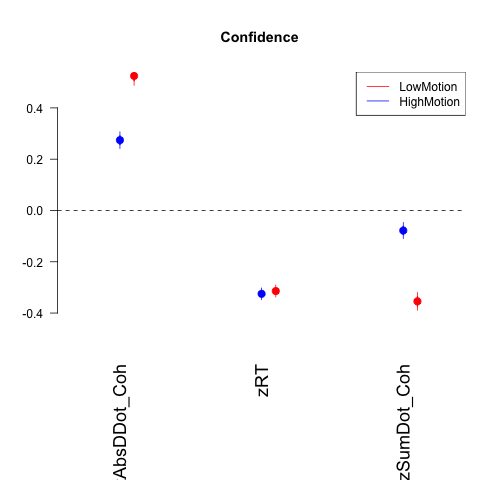

In [53]:
%%R
title_plot = "Confidence "

ModelConfL_1 <- glm(zConfidence ~ zAbsDDot_Coh + zRT + zSumDot_Coh , data=data_exp1_Like, )
ModelConfD_1 <- glm(zConfidence ~ zAbsDDot_Coh + zRT + zSumDot_Coh, data=data_exp1_DisLike,)

BIC1 = BIC(ModelConfL_1)
BIC2 = BIC(ModelConfD_1)
print("Like BIC:")
print(BIC1)
print("DisLike BIC:")
print(BIC2)

print(ModelConfL_1)
print(ModelConfD_1)

coefplot(ModelConfL_1,intercept=FALSE,vertical = FALSE,  col.pts="blue", cex.var=1.5, cex.pts=2, mar = c(8,4,5,1) ,ylim=c(-0.5, 0.5) ,main=title_plot)
coefplot(ModelConfD_1, intercept=FALSE, vertical = FALSE, add=TRUE, col.pts="red", cex.var=1.5, cex.pts=2,mar = c(8,4,5,1))
legend("topright",  legend=c("LowMotion", "HighMotion"),col=c("red", "blue"), lty=1:1, cex=1)

[1] "Like BIC:"
[1] 15924.36
[1] "DisLike BIC:"
[1] 16896.58

Call:  glm(formula = zConfidence ~ zAbsDDot + zRT + zChosenDots, data = data_exp1_Like)

Coefficients:
(Intercept)     zAbsDDot          zRT  zChosenDots  
  0.0772542    0.2122014   -0.3333149    0.0009296  

Degrees of Freedom: 6495 Total (i.e. Null);  6492 Residual
Null Deviance:	    5577 
Residual Deviance: 4384 	AIC: 15890

Call:  glm(formula = zConfidence ~ zAbsDDot + zRT + zChosenDots, data = data_exp1_DisLike)

Coefficients:
(Intercept)     zAbsDDot          zRT  zChosenDots  
    -0.2239       0.2129      -0.2979      -0.3674  

Degrees of Freedom: 6495 Total (i.e. Null);  6492 Residual
Null Deviance:	    7223 
Residual Deviance: 5092 	AIC: 16860


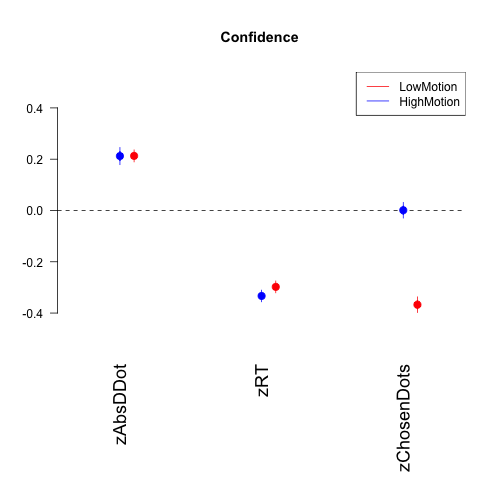

In [54]:
%%R
title_plot = "Confidence "

ModelConfL_1 <- glm(zConfidence ~ zAbsDDot + zRT + zChosenDots , data=data_exp1_Like, )
ModelConfD_1 <- glm(zConfidence ~ zAbsDDot + zRT + zChosenDots, data=data_exp1_DisLike,)

BIC1 = BIC(ModelConfL_1)
BIC2 = BIC(ModelConfD_1)
print("Like BIC:")
print(BIC1)
print("DisLike BIC:")
print(BIC2)

print(ModelConfL_1)
print(ModelConfD_1)

coefplot(ModelConfL_1,intercept=FALSE,vertical = FALSE,  col.pts="blue", cex.var=1.5, cex.pts=2, mar = c(8,4,5,1) ,ylim=c(-0.5, 0.5) ,main=title_plot)
coefplot(ModelConfD_1, intercept=FALSE, vertical = FALSE, add=TRUE, col.pts="red", cex.var=1.5, cex.pts=2,mar = c(8,4,5,1))
legend("topright",  legend=c("LowMotion", "HighMotion"),col=c("red", "blue"), lty=1:1, cex=1)

[1] "Like BIC:"
[1] 15846.53
[1] "DisLike BIC:"
[1] 17258.11

Call:  glm(formula = zConfidence ~ zAbsDDot + zRT + zUnchosenDots, data = data_exp1_Like)

Coefficients:
  (Intercept)       zAbsDDot            zRT  zUnchosenDots  
      0.03207        0.20074       -0.31665       -0.12347  

Degrees of Freedom: 6495 Total (i.e. Null);  6492 Residual
Null Deviance:	    5577 
Residual Deviance: 4332 	AIC: 15810

Call:  glm(formula = zConfidence ~ zAbsDDot + zRT + zUnchosenDots, data = data_exp1_DisLike)

Coefficients:
  (Intercept)       zAbsDDot            zRT  zUnchosenDots  
      0.01545        0.44858       -0.33694       -0.23948  

Degrees of Freedom: 6495 Total (i.e. Null);  6492 Residual
Null Deviance:	    7223 
Residual Deviance: 5383 	AIC: 17220


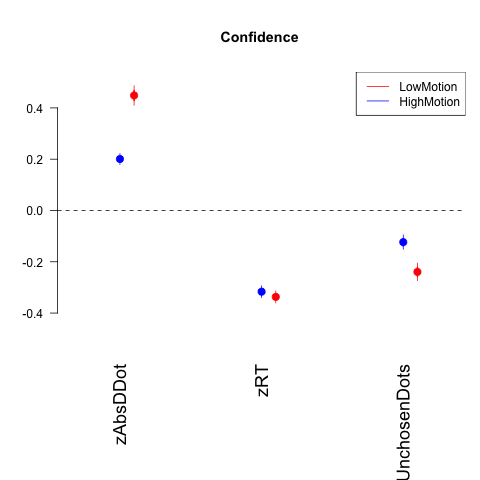

In [55]:
%%R
title_plot = "Confidence "

ModelConfL_1 <- glm(zConfidence ~ zAbsDDot + zRT + zUnchosenDots , data=data_exp1_Like, )
ModelConfD_1 <- glm(zConfidence ~ zAbsDDot + zRT + zUnchosenDots, data=data_exp1_DisLike,)

BIC1 = BIC(ModelConfL_1)
BIC2 = BIC(ModelConfD_1)
print("Like BIC:")
print(BIC1)
print("DisLike BIC:")
print(BIC2)

print(ModelConfL_1)
print(ModelConfD_1)

coefplot(ModelConfL_1,intercept=FALSE,vertical = FALSE,  col.pts="blue", cex.var=1.5, cex.pts=2, mar = c(8,4,5,1) ,ylim=c(-0.5, 0.5) ,main=title_plot)
coefplot(ModelConfD_1, intercept=FALSE, vertical = FALSE, add=TRUE, col.pts="red", cex.var=1.5, cex.pts=2,mar = c(8,4,5,1))
legend("topright",  legend=c("LowMotion", "HighMotion"),col=c("red", "blue"), lty=1:1, cex=1)

[1] "Like BIC:"
[1] 15815.05
[1] "DisLike BIC:"
[1] 16933.97

Call:  glm(formula = zConfidence ~ zCoherence + zRT + zSumDot + zSumDot:zCoherence, 
    data = data_exp1_Like)

Coefficients:
       (Intercept)          zCoherence                 zRT             zSumDot  
          0.080895            0.240462           -0.308378            0.055564  
zCoherence:zSumDot  
          0.009226  

Degrees of Freedom: 6495 Total (i.e. Null);  6491 Residual
Null Deviance:	    5577 
Residual Deviance: 4305 	AIC: 15770

Call:  glm(formula = zConfidence ~ zCoherence + zRT + zSumDot + zSumDot:zCoherence, 
    data = data_exp1_DisLike)

Coefficients:
       (Intercept)          zCoherence                 zRT             zSumDot  
          -0.08305             0.36236            -0.29198            -0.08868  
zCoherence:zSumDot  
           0.04961  

Degrees of Freedom: 6495 Total (i.e. Null);  6491 Residual
Null Deviance:	    7223 
Residual Deviance: 5114 	AIC: 16890


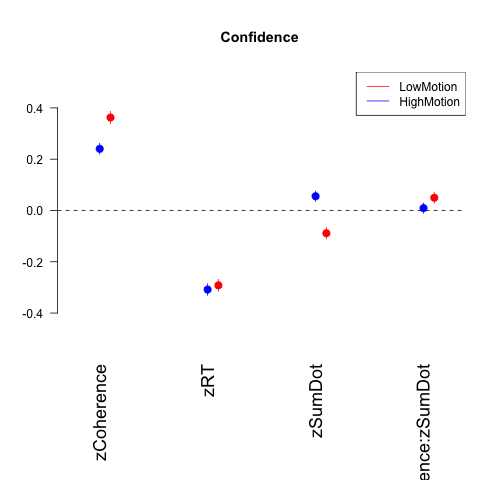

In [56]:
%%R
title_plot = "Confidence "

ModelConfL_1 <- glm(zConfidence ~ zCoherence +  zRT + zSumDot + zSumDot:zCoherence , data=data_exp1_Like, )
ModelConfD_1 <- glm(zConfidence ~ zCoherence + zRT + zSumDot + zSumDot:zCoherence, data=data_exp1_DisLike,)

BIC1 = BIC(ModelConfL_1)
BIC2 = BIC(ModelConfD_1)
print("Like BIC:")
print(BIC1)
print("DisLike BIC:")
print(BIC2)

print(ModelConfL_1)
print(ModelConfD_1)

coefplot(ModelConfL_1,intercept=FALSE,vertical = FALSE,  col.pts="blue", cex.var=1.5, cex.pts=2, mar = c(8,4,5,1) ,ylim=c(-0.5, 0.5) ,main=title_plot)
coefplot(ModelConfD_1, intercept=FALSE, vertical = FALSE, add=TRUE, col.pts="red", cex.var=1.5, cex.pts=2,mar = c(8,4,5,1))
legend("topright",  legend=c("LowMotion", "HighMotion"),col=c("red", "blue"), lty=1:1, cex=1)

# Separate chosen from unchosen evidence

[1] "Like BIC:"
[1] 15627.38
[1] "DisLike BIC:"
[1] 16695.09

Call:  glm(formula = zConfidence ~ zCoherence + zRT + zSumDot + zChoCoh + 
    zUnchoCoh, data = data_exp1_Like)

Coefficients:
(Intercept)   zCoherence          zRT      zSumDot      zChoCoh    zUnchoCoh  
  -0.150604     0.008658    -0.293162     0.054527     0.360244           NA  

Degrees of Freedom: 6495 Total (i.e. Null);  6491 Residual
Null Deviance:	    5577 
Residual Deviance: 4182 	AIC: 15590

Call:  glm(formula = zConfidence ~ zCoherence + zRT + zSumDot + zChoCoh + 
    zUnchoCoh, data = data_exp1_DisLike)

Coefficients:
(Intercept)   zCoherence          zRT      zSumDot      zChoCoh    zUnchoCoh  
   -0.36705      0.08053     -0.27239     -0.08979     -0.44121           NA  

Degrees of Freedom: 6495 Total (i.e. Null);  6491 Residual
Null Deviance:	    7223 
Residual Deviance: 4930 	AIC: 16650


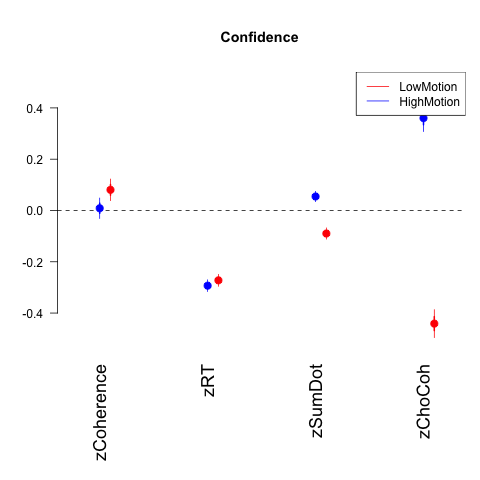

In [57]:
%%R
title_plot = "Confidence "

ModelConfL_1 <- glm(zConfidence ~ zCoherence +  zRT + zSumDot + zChoCoh + zUnchoCoh  , data=data_exp1_Like, )
ModelConfD_1 <- glm(zConfidence ~ zCoherence + zRT + zSumDot + zChoCoh + zUnchoCoh, data=data_exp1_DisLike,)

BIC1 = BIC(ModelConfL_1)
BIC2 = BIC(ModelConfD_1)
print("Like BIC:")
print(BIC1)
print("DisLike BIC:")
print(BIC2)

print(ModelConfL_1)
print(ModelConfD_1)

coefplot(ModelConfL_1,intercept=FALSE,vertical = FALSE,  col.pts="blue", cex.var=1.5, cex.pts=2, mar = c(8,4,5,1) ,ylim=c(-0.5, 0.5) ,main=title_plot)
coefplot(ModelConfD_1, intercept=FALSE, vertical = FALSE, add=TRUE, col.pts="red", cex.var=1.5, cex.pts=2,mar = c(8,4,5,1))
legend("topright",  legend=c("LowMotion", "HighMotion"),col=c("red", "blue"), lty=1:1, cex=1)


[1] "Like BIC:"
[1] 15707.87
[1] "DisLike BIC:"
[1] 16785.66

Call:  glm(formula = zConfidence ~ zCoherence + zRT + zChoDotPlusCoh + 
    zUnchoDotPlusCoh, data = data_exp1_Like)

Coefficients:
     (Intercept)        zCoherence               zRT    zChoDotPlusCoh  
        -0.04371           0.11497          -0.29922           0.30038  
zUnchoDotPlusCoh  
        -0.30805  

Degrees of Freedom: 6495 Total (i.e. Null);  6491 Residual
Null Deviance:	    5577 
Residual Deviance: 4235 	AIC: 15670

Call:  glm(formula = zConfidence ~ zCoherence + zRT + zChoDotPlusCoh + 
    zUnchoDotPlusCoh, data = data_exp1_DisLike)

Coefficients:
     (Intercept)        zCoherence               zRT    zChoDotPlusCoh  
         -0.2535            0.1953           -0.2775           -0.5002  
zUnchoDotPlusCoh  
          0.3148  

Degrees of Freedom: 6495 Total (i.e. Null);  6491 Residual
Null Deviance:	    7223 
Residual Deviance: 4999 	AIC: 16740


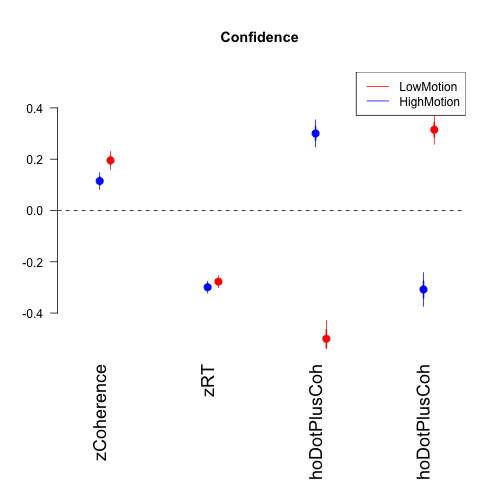

In [58]:
%%R
title_plot = "Confidence "

ModelConfL_1 <- glm(zConfidence ~ zCoherence +  zRT + zChoDotPlusCoh + zUnchoDotPlusCoh  , data=data_exp1_Like, )
ModelConfD_1 <- glm(zConfidence ~ zCoherence + zRT + zChoDotPlusCoh + zUnchoDotPlusCoh  , data=data_exp1_DisLike,)


BIC1 = BIC(ModelConfL_1)
BIC2 = BIC(ModelConfD_1)
print("Like BIC:")
print(BIC1)
print("DisLike BIC:")
print(BIC2)

print(ModelConfL_1)
print(ModelConfD_1)

coefplot(ModelConfL_1,intercept=FALSE,vertical = FALSE,  col.pts="blue", cex.var=1.5, cex.pts=2, mar = c(8,4,5,1) ,ylim=c(-0.5, 0.5) ,main=title_plot)
coefplot(ModelConfD_1, intercept=FALSE, vertical = FALSE, add=TRUE, col.pts="red", cex.var=1.5, cex.pts=2,mar = c(8,4,5,1))
legend("topright",  legend=c("LowMotion", "HighMotion"),col=c("red", "blue"), lty=1:1, cex=1)


[1] "Like BIC:"
[1] 15808.59
[1] "DisLike BIC:"
[1] 16890.03

Call:  glm(formula = zConfidence ~ zCoherence + zRT + factor(Choice) + 
    zSumDot + zSumDot:factor(Choice), data = data_exp1_Like)

Coefficients:
            (Intercept)               zCoherence                      zRT  
               0.041704                 0.238791                -0.308677  
        factor(Choice)1                  zSumDot  factor(Choice)1:zSumDot  
               0.080719                 0.052594                 0.007279  

Degrees of Freedom: 6495 Total (i.e. Null);  6490 Residual
Null Deviance:	    5577 
Residual Deviance: 4295 	AIC: 15760

Call:  glm(formula = zConfidence ~ zCoherence + zRT + factor(Choice) + 
    zSumDot + zSumDot:factor(Choice), data = data_exp1_DisLike)

Coefficients:
            (Intercept)               zCoherence                      zRT  
               -0.17467                  0.36105                 -0.29528  
        factor(Choice)1                  zSumDot  factor(Choi

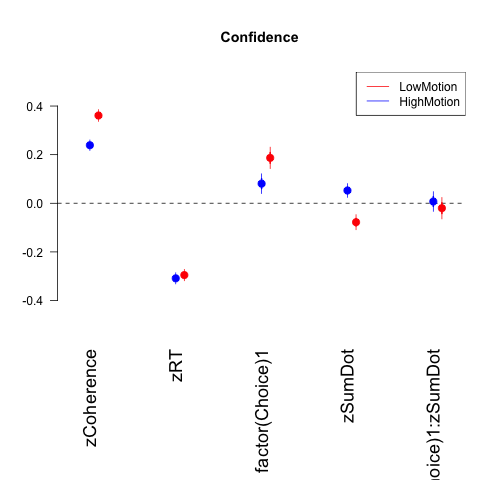

In [59]:
%%R
title_plot = "Confidence "

ModelConfL_1 <- glm(zConfidence ~ zCoherence + zRT + factor(Choice) +  zSumDot + zSumDot:factor(Choice) , data=data_exp1_Like, )
ModelConfD_1 <- glm(zConfidence ~ zCoherence + zRT + factor(Choice) +zSumDot + zSumDot:factor(Choice), data=data_exp1_DisLike,)

BIC1 = BIC(ModelConfL_1)
BIC2 = BIC(ModelConfD_1)
print("Like BIC:")
print(BIC1)
print("DisLike BIC:")
print(BIC2)

print(ModelConfL_1)
print(ModelConfD_1)

coefplot(ModelConfL_1,intercept=FALSE,vertical = FALSE,  col.pts="blue", cex.var=1.5, cex.pts=2, mar = c(8,4,5,1) ,ylim=c(-0.5, 0.5) ,main=title_plot)
coefplot(ModelConfD_1, intercept=FALSE, vertical = FALSE, add=TRUE, col.pts="red", cex.var=1.5, cex.pts=2,mar = c(8,4,5,1))
legend("topright",  legend=c("LowMotion", "HighMotion"),col=c("red", "blue"), lty=1:1, cex=1)

[1] "Like BIC:"
[1] 15740.41
[1] "DisLike BIC:"
[1] 16836.24

Call:  glm(formula = zConfidence ~ zCoherence + zRT + factor(Correct) + 
    zSumDot + zSumDot:factor(Correct), data = data_exp1_Like)

Coefficients:
             (Intercept)                zCoherence                       zRT  
               -0.118093                  0.206788                 -0.300317  
        factor(Correct)1                   zSumDot  factor(Correct)1:zSumDot  
                0.249586                  0.051803                  0.005483  

Degrees of Freedom: 6495 Total (i.e. Null);  6490 Residual
Null Deviance:	    5577 
Residual Deviance: 4250 	AIC: 15690

Call:  glm(formula = zConfidence ~ zCoherence + zRT + factor(Correct) + 
    zSumDot + zSumDot:factor(Correct), data = data_exp1_DisLike)

Coefficients:
             (Intercept)                zCoherence                       zRT  
                -0.34466                   0.31924                  -0.28140  
        factor(Correct)1               

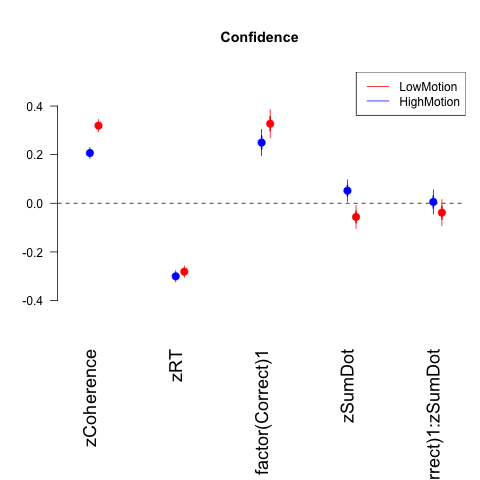

In [60]:
%%R
title_plot = "Confidence "

ModelConfL_1 <- glm(zConfidence ~ zCoherence + zRT + factor(Correct) +  zSumDot + zSumDot:factor(Correct) , data=data_exp1_Like, )
ModelConfD_1 <- glm(zConfidence ~ zCoherence + zRT + factor(Correct) +zSumDot + zSumDot:factor(Correct), data=data_exp1_DisLike,)

BIC1 = BIC(ModelConfL_1)
BIC2 = BIC(ModelConfD_1)
print("Like BIC:")
print(BIC1)
print("DisLike BIC:")
print(BIC2)

print(ModelConfL_1)
print(ModelConfD_1)

coefplot(ModelConfL_1,intercept=FALSE,vertical = FALSE,  col.pts="blue", cex.var=1.5, cex.pts=2, mar = c(8,4,5,1) ,ylim=c(-0.5, 0.5) ,main=title_plot)
coefplot(ModelConfD_1, intercept=FALSE, vertical = FALSE, add=TRUE, col.pts="red", cex.var=1.5, cex.pts=2,mar = c(8,4,5,1))
legend("topright",  legend=c("LowMotion", "HighMotion"),col=c("red", "blue"), lty=1:1, cex=1)

[1] "Like BIC:"
[1] 15758.75
[1] "DisLike BIC:"
[1] 16887.19

Call:  glm(formula = zConfidence ~ zAbsDDot + zRT + zChosenDots + zUnchosenDots, 
    data = data_exp1_Like)

Coefficients:
  (Intercept)       zAbsDDot            zRT    zChosenDots  zUnchosenDots  
   -0.1102841     -0.0007334     -0.3135088      0.2201244     -0.2732027  

Degrees of Freedom: 6495 Total (i.e. Null);  6491 Residual
Null Deviance:	    5577 
Residual Deviance: 4268 	AIC: 15720

Call:  glm(formula = zConfidence ~ zAbsDDot + zRT + zChosenDots + zUnchosenDots, 
    data = data_exp1_DisLike)

Coefficients:
  (Intercept)       zAbsDDot            zRT    zChosenDots  zUnchosenDots  
      -0.2897         0.1194        -0.2967        -0.4352         0.1019  

Degrees of Freedom: 6495 Total (i.e. Null);  6491 Residual
Null Deviance:	    7223 
Residual Deviance: 5078 	AIC: 16850


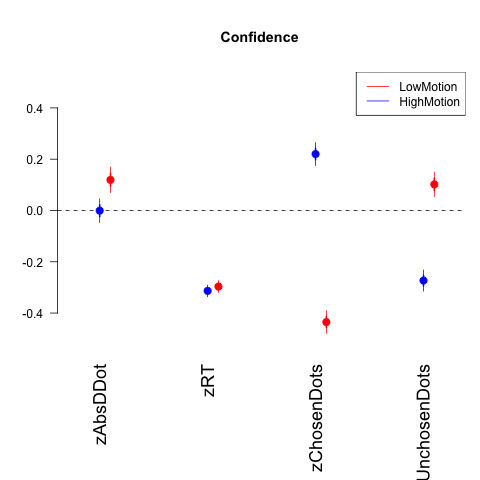

In [61]:
%%R
title_plot = "Confidence "

ModelConfL_1 <- glm(zConfidence ~ zAbsDDot + zRT + zChosenDots +zUnchosenDots , data=data_exp1_Like, )
ModelConfD_1 <- glm(zConfidence ~ zAbsDDot + zRT + zChosenDots + zUnchosenDots, data=data_exp1_DisLike,)

BIC1 = BIC(ModelConfL_1)
BIC2 = BIC(ModelConfD_1)
print("Like BIC:")
print(BIC1)
print("DisLike BIC:")
print(BIC2)

print(ModelConfL_1)
print(ModelConfD_1)

coefplot(ModelConfL_1,intercept=FALSE,vertical = FALSE,  col.pts="blue", cex.var=1.5, cex.pts=2, mar = c(8,4,5,1) ,ylim=c(-0.5, 0.5) ,main=title_plot)
coefplot(ModelConfD_1, intercept=FALSE, vertical = FALSE, add=TRUE, col.pts="red", cex.var=1.5, cex.pts=2,mar = c(8,4,5,1))
legend("topright",  legend=c("LowMotion", "HighMotion"),col=c("red", "blue"), lty=1:1, cex=1)

[1] "Like BIC:"
[1] 16660.24
[1] "DisLike BIC:"
[1] 17712.89

Call:  glm(formula = zConfidence ~ zAbsDDot + zSumDot, data = data_exp1_Like)

Coefficients:
(Intercept)     zAbsDDot      zSumDot  
     0.1215       0.3541      -0.1057  

Degrees of Freedom: 6495 Total (i.e. Null);  6493 Residual
Null Deviance:	    5577 
Residual Deviance: 4916 	AIC: 16630

Call:  glm(formula = zConfidence ~ zAbsDDot + zSumDot, data = data_exp1_DisLike)

Coefficients:
(Intercept)     zAbsDDot      zSumDot  
    -0.1215       0.5217      -0.3376  

Degrees of Freedom: 6495 Total (i.e. Null);  6493 Residual
Null Deviance:	    7223 
Residual Deviance: 5781 	AIC: 17690


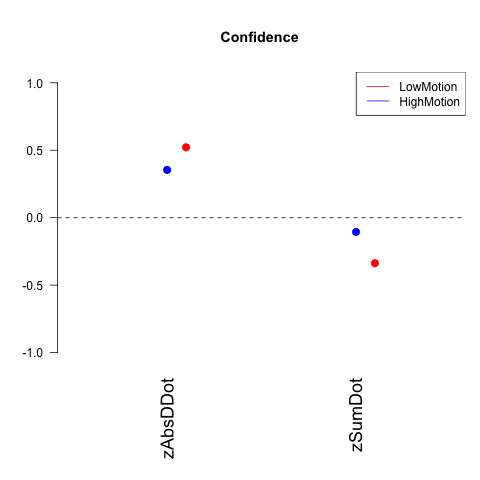

In [62]:
%%R
title_plot = "Confidence "

ModelConfL_1 <- glm(zConfidence ~ zAbsDDot  + zSumDot , data=data_exp1_Like, )
ModelConfD_1 <- glm(zConfidence ~ zAbsDDot  + zSumDot, data=data_exp1_DisLike,)

BIC1 = BIC(ModelConfL_1)
BIC2 = BIC(ModelConfD_1)
print("Like BIC:")
print(BIC1)
print("DisLike BIC:")
print(BIC2)

print(ModelConfL_1)
print(ModelConfD_1)

coefplot(ModelConfL_1,intercept=FALSE,vertical = FALSE,  col.pts="blue", cex.var=1.5, cex.pts=2, mar = c(8,4,5,1) ,ylim=c(-1, 1) ,main=title_plot)
coefplot(ModelConfD_1, intercept=FALSE, vertical = FALSE, add=TRUE, col.pts="red", cex.var=1.5, cex.pts=2,mar = c(8,4,5,1))
legend("topright",  legend=c("LowMotion", "HighMotion"),col=c("red", "blue"), lty=1:1, cex=1)

[1] "Like BIC:"
[1] 16476.64
[1] "DisLike BIC:"
[1] 17556.39

Call:  glm(formula = zConfidence ~ zChosenDots + zUnchosenDots, data = data_exp1_Like)

Coefficients:
  (Intercept)    zChosenDots  zUnchosenDots  
      -0.1404         0.2907        -0.3875  

Degrees of Freedom: 6495 Total (i.e. Null);  6493 Residual
Null Deviance:	    5577 
Residual Deviance: 4779 	AIC: 16450

Call:  glm(formula = zConfidence ~ zChosenDots + zUnchosenDots, data = data_exp1_DisLike)

Coefficients:
  (Intercept)    zChosenDots  zUnchosenDots  
      -0.4844        -0.6557         0.2848  

Degrees of Freedom: 6495 Total (i.e. Null);  6493 Residual
Null Deviance:	    7223 
Residual Deviance: 5644 	AIC: 17530


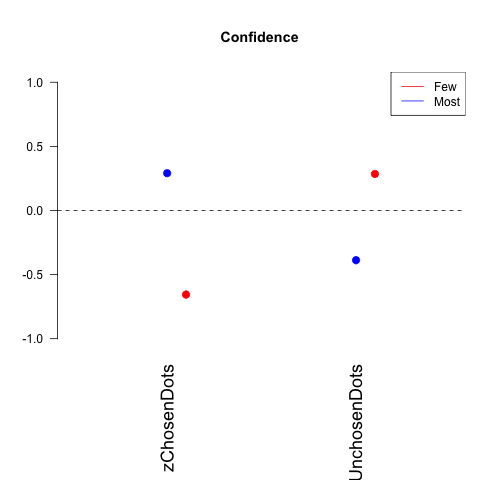

In [63]:
%%R
title_plot = "Confidence "

ModelConfL_1 <- glm(zConfidence ~ zChosenDots + zUnchosenDots , data=data_exp1_Like, )
ModelConfD_1 <- glm(zConfidence ~ zChosenDots + zUnchosenDots, data=data_exp1_DisLike,)

BIC1 = BIC(ModelConfL_1)
BIC2 = BIC(ModelConfD_1)
print("Like BIC:")
print(BIC1)
print("DisLike BIC:")
print(BIC2)

print(ModelConfL_1)
print(ModelConfD_1)

coefplot(ModelConfL_1,intercept=FALSE,vertical = FALSE,  col.pts="blue", cex.var=1.5, cex.pts=2, mar = c(8,4,5,1) ,ylim=c(-1, 1) ,main=title_plot)
coefplot(ModelConfD_1, intercept=FALSE, vertical = FALSE, add=TRUE, col.pts="red", cex.var=1.5, cex.pts=2,mar = c(8,4,5,1))
legend("topright",  legend=c("Few", "Most"),col=c("red", "blue"), lty=1:1, cex=1)

[1] "Like BIC:"
[1] 15748.92
[1] "DisLike BIC:"
[1] 16954.82

Call:  glm(formula = zConfidence ~ zRT + zChosenDot_Coh + zUnchosenDot_Coh, 
    data = data_exp1_Like)

Coefficients:
     (Intercept)               zRT    zChosenDot_Coh  zUnchosenDot_Coh  
         -0.1218           -0.3144            0.1702           -0.2565  

Degrees of Freedom: 6495 Total (i.e. Null);  6492 Residual
Null Deviance:	    5577 
Residual Deviance: 4267 	AIC: 15720

Call:  glm(formula = zConfidence ~ zRT + zChosenDot_Coh + zUnchosenDot_Coh, 
    data = data_exp1_DisLike)

Coefficients:
     (Intercept)               zRT    zChosenDot_Coh  zUnchosenDot_Coh  
         -0.4052           -0.3122           -0.5596            0.1271  

Degrees of Freedom: 6495 Total (i.e. Null);  6492 Residual
Null Deviance:	    7223 
Residual Deviance: 5138 	AIC: 16920


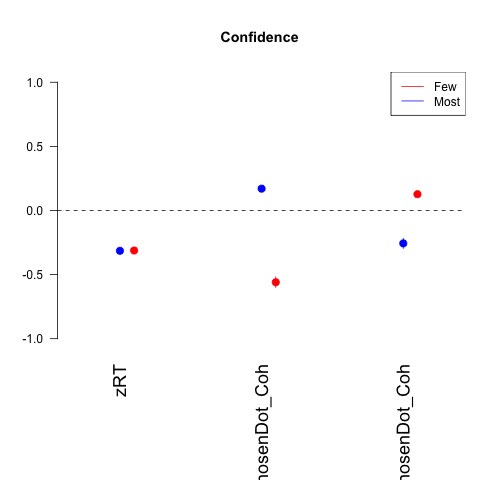

In [64]:
%%R
title_plot = "Confidence "

ModelConfL_1 <- glm(zConfidence ~ zRT + zChosenDot_Coh + zUnchosenDot_Coh , data=data_exp1_Like, )
ModelConfD_1 <- glm(zConfidence ~ zRT + zChosenDot_Coh + zUnchosenDot_Coh, data=data_exp1_DisLike,)

BIC1 = BIC(ModelConfL_1)
BIC2 = BIC(ModelConfD_1)
print("Like BIC:")
print(BIC1)
print("DisLike BIC:")
print(BIC2)

print(ModelConfL_1)
print(ModelConfD_1)

coefplot(ModelConfL_1,intercept=FALSE,vertical = FALSE,  col.pts="blue", cex.var=1.5, cex.pts=2, mar = c(8,4,5,1) ,ylim=c(-1, 1) ,main=title_plot)
coefplot(ModelConfD_1, intercept=FALSE, vertical = FALSE, add=TRUE, col.pts="red", cex.var=1.5, cex.pts=2,mar = c(8,4,5,1))
legend("topright",  legend=c("Few", "Most"),col=c("red", "blue"), lty=1:1, cex=1)

[1] "Like BIC:"
[1] 17032.35
[1] "DisLike BIC:"
[1] 17916.91

Call:
glm(formula = zRT ~ zChosenDots + zUnchosenDots, data = data_exp1_Like)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.3453  -0.6307  -0.1664   0.5274   4.6280  

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)    0.09746    0.01395   6.989 3.05e-12 ***
zChosenDots   -0.22725    0.01100 -20.653  < 2e-16 ***
zUnchosenDots  0.36593    0.01566  23.371  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 0.8018398)

    Null deviance: 5799.8  on 6495  degrees of freedom
Residual deviance: 5206.3  on 6493  degrees of freedom
AIC: 17005

Number of Fisher Scoring iterations: 2


Call:
glm(formula = zRT ~ zChosenDots + zUnchosenDots, data = data_exp1_DisLike)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.9302  -0.6630  -0.1232   0.5914   4.4474  

Coefficients:
    

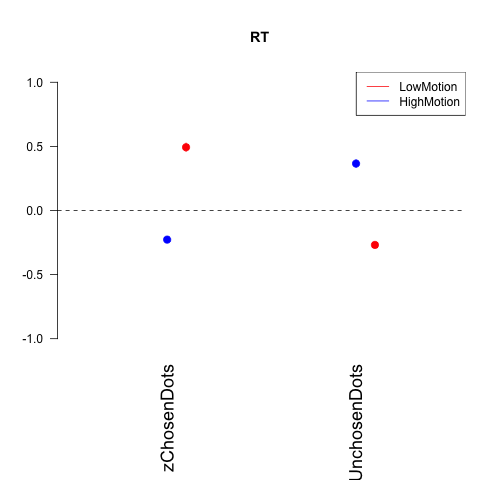

In [65]:
%%R
title_plot = "RT "

ModelConfL_1 <- glm(zRT ~  zChosenDots + zUnchosenDots , data=data_exp1_Like, )
ModelConfD_1 <- glm(zRT ~  zChosenDots + zUnchosenDots, data=data_exp1_DisLike,)

BIC1 = BIC(ModelConfL_1)
BIC2 = BIC(ModelConfD_1)
print("Like BIC:")
print(BIC1)
print("DisLike BIC:")
print(BIC2)

print(summary(ModelConfL_1))
print(summary(ModelConfD_1))

coefplot(ModelConfL_1,intercept=FALSE,vertical = FALSE,  col.pts="blue", cex.var=1.5, cex.pts=2, mar = c(8,4,5,1) ,ylim=c(-1, 1) ,main=title_plot)
coefplot(ModelConfD_1, intercept=FALSE, vertical = FALSE, add=TRUE, col.pts="red", cex.var=1.5, cex.pts=2,mar = c(8,4,5,1))
legend("topright",  legend=c("LowMotion", "HighMotion"),col=c("red", "blue"), lty=1:1, cex=1)

In [66]:
%%R

conf_Like_hmodel <- lmer(zRT ~  zChosenDots +zUnchosenDots+ ( zChosenDots +zUnchosenDots| Part), data=data_exp1_Like, control=lmerControl(optimizer="optimx", optCtrl=list(method="nlminb")))
conf_Dislike_hmodel <- lmer(zRT ~  zChosenDots +zUnchosenDots+ ( zChosenDots +zUnchosenDots| Part), data=data_exp1_DisLike, control=lmerControl(optimizer="optimx", optCtrl=list(method="nlminb")))

display (conf_Like_hmodel)
display (conf_Dislike_hmodel)

#save(conf_Like_Low_hmodel, file = "SavedModels/choUncho_conf_Like_Low_hmodel.rda")
#save(conf_Dislike_Low_hmodel, file = "SavedModels/choUncho_conf_Dislike_Low_hmodel.rda")

R[write to console]: boundary (singular) fit: see ?isSingular



lmer(formula = zRT ~ zChosenDots + zUnchosenDots + (zChosenDots + 
    zUnchosenDots | Part), data = data_exp1_Like, control = lmerControl(optimizer = "optimx", 
    optCtrl = list(method = "nlminb")))
              coef.est coef.se
(Intercept)    0.11     0.04  
zChosenDots   -0.23     0.02  
zUnchosenDots  0.38     0.03  

Error terms:
 Groups   Name          Std.Dev. Corr        
 Part     (Intercept)   0.19                 
          zChosenDots   0.08     -0.56       
          zUnchosenDots 0.17      0.87 -0.54 
 Residual               0.88                 
---
number of obs: 6496, groups: Part, 29
AIC = 16866.4, DIC = 16811.9
deviance = 16829.2 
lmer(formula = zRT ~ zChosenDots + zUnchosenDots + (zChosenDots + 
    zUnchosenDots | Part), data = data_exp1_DisLike, control = lmerControl(optimizer = "optimx", 
    optCtrl = list(method = "nlminb")))
              coef.est coef.se
(Intercept)    0.43     0.01  
zChosenDots    0.50     0.03  
zUnchosenDots -0.27     0.02  

Error ter

In [67]:
%%R
# Extract mixed effect paramters
mix_conf_Like_hmodel <- coef(conf_Like_hmodel)
mix_conf_Dislike_hmodel <- coef(conf_Dislike_hmodel)

In [68]:
%R -o mix_conf_Like_hmodel  -o mix_conf_Dislike_hmodel 

In [69]:
[s1, p1] = stats.ttest_rel(np.abs(mix_conf_Like_hmodel[0][1]),np.abs(mix_conf_Like_hmodel[0][2]))
print ('chosen vs unchosen/HighMotion: '+ str(s1) + '; p =  ' + str(p1)   )

[s1, p1] = stats.ttest_rel(np.abs(mix_conf_Dislike_hmodel[0][1]),np.abs(mix_conf_Dislike_hmodel[0][2]))
print ('chosen vs unchosen/LowMotion: '+ str(s1) + '; p =  ' + str(p1)   )


chosen vs unchosen/HighMotion: -6.890461908092571; p =  1.7284559636679984e-07
chosen vs unchosen/LowMotion: 21.214609028851246; p =  8.593246151447891e-19


# Controlling in confidence regression for Coherence levels

[1] "Like BIC:"
[1] 15816.37
[1] "DisLike BIC:"
[1] 16936.42

Call:  glm(formula = zConfidence ~ zCoherence + zAbsDDot_Coh + zRT + 
    zSumDot_Coh, data = data_exp1_Like)

Coefficients:
 (Intercept)    zCoherence  zAbsDDot_Coh           zRT   zSumDot_Coh  
    0.080896      0.217365      0.006737     -0.308374      0.054517  

Degrees of Freedom: 6495 Total (i.e. Null);  6491 Residual
Null Deviance:	    5577 
Residual Deviance: 4306 	AIC: 15780

Call:  glm(formula = zConfidence ~ zCoherence + zAbsDDot_Coh + zRT + 
    zSumDot_Coh, data = data_exp1_DisLike)

Coefficients:
 (Intercept)    zCoherence  zAbsDDot_Coh           zRT   zSumDot_Coh  
    -0.08296       0.26861       0.19739      -0.29269      -0.19258  

Degrees of Freedom: 6495 Total (i.e. Null);  6491 Residual
Null Deviance:	    7223 
Residual Deviance: 5116 	AIC: 16900


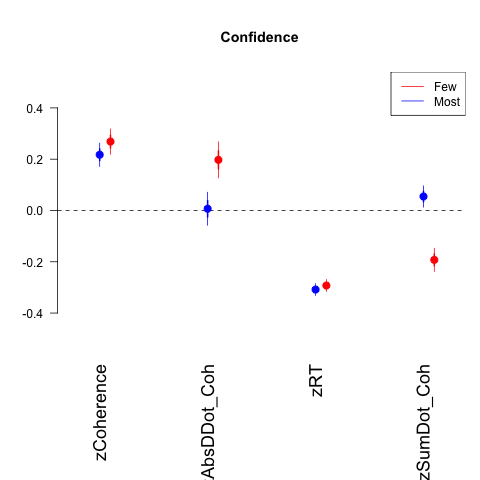

In [70]:
%%R
title_plot = "Confidence "

ModelConfL_1 <- glm(zConfidence ~ zCoherence + zAbsDDot_Coh + zRT + zSumDot_Coh , data=data_exp1_Like, )
ModelConfD_1 <- glm(zConfidence ~ zCoherence + zAbsDDot_Coh + zRT + zSumDot_Coh, data=data_exp1_DisLike,)

BIC1 = BIC(ModelConfL_1)
BIC2 = BIC(ModelConfD_1)
print("Like BIC:")
print(BIC1)
print("DisLike BIC:")
print(BIC2)

print(ModelConfL_1)
print(ModelConfD_1)

coefplot(ModelConfL_1,intercept=FALSE,vertical = FALSE,  col.pts="blue", cex.var=1.5, cex.pts=2, mar = c(8,4,5,1) ,ylim=c(-0.5, 0.5) ,main=title_plot)
coefplot(ModelConfD_1, intercept=FALSE, vertical = FALSE, add=TRUE, col.pts="red", cex.var=1.5, cex.pts=2,mar = c(8,4,5,1))
legend("topright",  legend=c("Few", "Most"),col=c("red", "blue"), lty=1:1, cex=1)

[1] "Like BIC:"
[1] 15807.1
[1] "DisLike BIC:"
[1] 16945.44

Call:  glm(formula = zConfidence ~ zCoherence + zRT + zSumDot, data = data_exp1_Like)

Coefficients:
(Intercept)   zCoherence          zRT      zSumDot  
    0.08087      0.24040     -0.30857      0.05556  

Degrees of Freedom: 6495 Total (i.e. Null);  6492 Residual
Null Deviance:	    5577 
Residual Deviance: 4306 	AIC: 15770

Call:  glm(formula = zConfidence ~ zCoherence + zRT + zSumDot, data = data_exp1_DisLike)

Coefficients:
(Intercept)   zCoherence          zRT      zSumDot  
   -0.08278      0.36150     -0.29403     -0.08864  

Degrees of Freedom: 6495 Total (i.e. Null);  6492 Residual
Null Deviance:	    7223 
Residual Deviance: 5130 	AIC: 16910


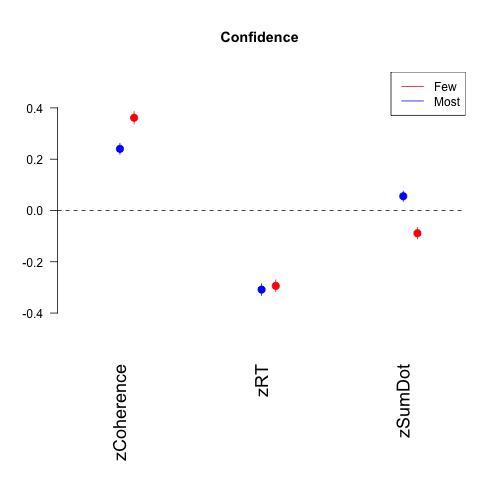

In [71]:
%%R
title_plot = "Confidence "

ModelConfL_1 <- glm(zConfidence ~ zCoherence + zRT + zSumDot , data=data_exp1_Like, )
ModelConfD_1 <- glm(zConfidence ~ zCoherence + zRT + zSumDot, data=data_exp1_DisLike,)

BIC1 = BIC(ModelConfL_1)
BIC2 = BIC(ModelConfD_1)
print("Like BIC:")
print(BIC1)
print("DisLike BIC:")
print(BIC2)

print(ModelConfL_1)
print(ModelConfD_1)

coefplot(ModelConfL_1,intercept=FALSE,vertical = FALSE,  col.pts="blue", cex.var=1.5, cex.pts=2, mar = c(8,4,5,1) ,ylim=c(-0.5, 0.5) ,main=title_plot)
coefplot(ModelConfD_1, intercept=FALSE, vertical = FALSE, add=TRUE, col.pts="red", cex.var=1.5, cex.pts=2,mar = c(8,4,5,1))
legend("topright",  legend=c("Few", "Most"),col=c("red", "blue"), lty=1:1, cex=1)

[1] "Like BIC:"
[1] 15707.84
[1] "DisLike BIC:"
[1] 16785.83

Call:  glm(formula = zConfidence ~ zCoherence + zRT + zChosenDots + 
    zUnchosenDots, data = data_exp1_Like)

Coefficients:
  (Intercept)     zCoherence            zRT    zChosenDots  zUnchosenDots  
     -0.04354        0.11514       -0.29927        0.15799       -0.16738  

Degrees of Freedom: 6495 Total (i.e. Null);  6491 Residual
Null Deviance:	    5577 
Residual Deviance: 4235 	AIC: 15670

Call:  glm(formula = zConfidence ~ zCoherence + zRT + zChosenDots + 
    zUnchosenDots, data = data_exp1_DisLike)

Coefficients:
  (Intercept)     zCoherence            zRT    zChosenDots  zUnchosenDots  
      -0.2533         0.1954        -0.2774        -0.3346         0.1018  

Degrees of Freedom: 6495 Total (i.e. Null);  6491 Residual
Null Deviance:	    7223 
Residual Deviance: 4999 	AIC: 16750


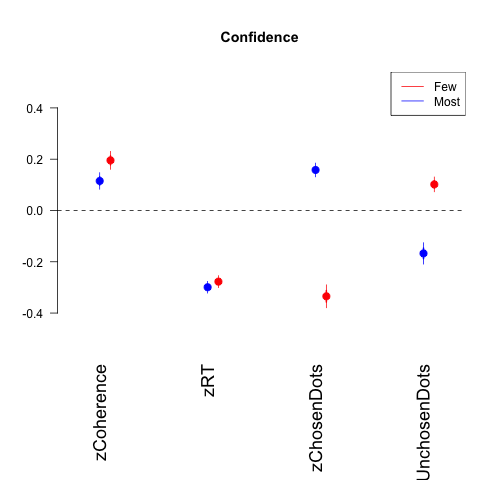

In [72]:
%%R
title_plot = "Confidence "

ModelConfL_1 <- glm(zConfidence ~ zCoherence + zRT + zChosenDots + zUnchosenDots , data=data_exp1_Like, )
ModelConfD_1 <- glm(zConfidence ~ zCoherence + zRT + zChosenDots + zUnchosenDots, data=data_exp1_DisLike,)

BIC1 = BIC(ModelConfL_1)
BIC2 = BIC(ModelConfD_1)
print("Like BIC:")
print(BIC1)
print("DisLike BIC:")
print(BIC2)

print(ModelConfL_1)
print(ModelConfD_1)

coefplot(ModelConfL_1,intercept=FALSE,vertical = FALSE,  col.pts="blue", cex.var=1.5, cex.pts=2, mar = c(8,4,5,1) ,ylim=c(-0.5, 0.5) ,main=title_plot)
coefplot(ModelConfD_1, intercept=FALSE, vertical = FALSE, add=TRUE, col.pts="red", cex.var=1.5, cex.pts=2,mar = c(8,4,5,1))
legend("topright",  legend=c("Few", "Most"),col=c("red", "blue"), lty=1:1, cex=1)

[1] "Like BIC:"
[1] 15807.1
[1] "DisLike BIC:"
[1] 16945.44

Call:  glm(formula = zConfidence ~ zCoherence + zRT + zSumDot, data = data_exp1_Like)

Coefficients:
(Intercept)   zCoherence          zRT      zSumDot  
    0.08087      0.24040     -0.30857      0.05556  

Degrees of Freedom: 6495 Total (i.e. Null);  6492 Residual
Null Deviance:	    5577 
Residual Deviance: 4306 	AIC: 15770

Call:  glm(formula = zConfidence ~ zCoherence + zRT + zSumDot, data = data_exp1_DisLike)

Coefficients:
(Intercept)   zCoherence          zRT      zSumDot  
   -0.08278      0.36150     -0.29403     -0.08864  

Degrees of Freedom: 6495 Total (i.e. Null);  6492 Residual
Null Deviance:	    7223 
Residual Deviance: 5130 	AIC: 16910


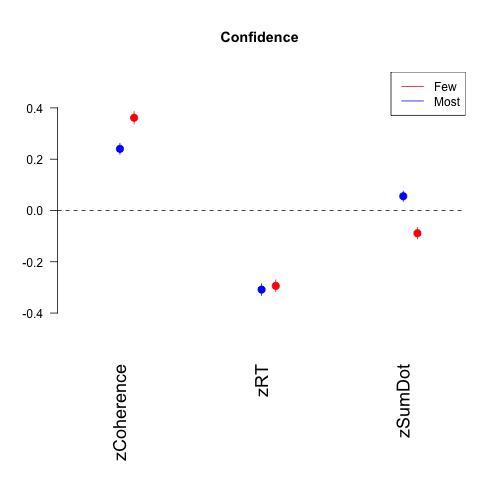

In [73]:
%%R
title_plot = "Confidence "

ModelConfL_1 <- glm(zConfidence ~ zCoherence + zRT + zSumDot , data=data_exp1_Like, )
ModelConfD_1 <- glm(zConfidence ~ zCoherence + zRT + zSumDot, data=data_exp1_DisLike,)

BIC1 = BIC(ModelConfL_1)
BIC2 = BIC(ModelConfD_1)
print("Like BIC:")
print(BIC1)
print("DisLike BIC:")
print(BIC2)

print(ModelConfL_1)
print(ModelConfD_1)

coefplot(ModelConfL_1,intercept=FALSE,vertical = FALSE,  col.pts="blue", cex.var=1.5, cex.pts=2, mar = c(8,4,5,1) ,ylim=c(-0.5, 0.5) ,main=title_plot)
coefplot(ModelConfD_1, intercept=FALSE, vertical = FALSE, add=TRUE, col.pts="red", cex.var=1.5, cex.pts=2,mar = c(8,4,5,1))
legend("topright",  legend=c("Few", "Most"),col=c("red", "blue"), lty=1:1, cex=1)

[1] "Like BIC:"
[1] 16306.55
[1] "DisLike BIC:"
[1] 17310.22

Call:  glm(formula = zConfidence ~ zCoherence + zAbsDDot + zChosenDots + 
    zUnchosenDots, data = data_exp1_Like)

Coefficients:
  (Intercept)     zCoherence       zAbsDDot    zChosenDots  zUnchosenDots  
      -0.1063         0.3181        -0.2623         0.3405        -0.2496  

Degrees of Freedom: 6495 Total (i.e. Null);  6491 Residual
Null Deviance:	    5577 
Residual Deviance: 4643 	AIC: 16270

Call:  glm(formula = zConfidence ~ zCoherence + zAbsDDot + zChosenDots + 
    zUnchosenDots, data = data_exp1_DisLike)

Coefficients:
  (Intercept)     zCoherence       zAbsDDot    zChosenDots  zUnchosenDots  
      -0.3756         0.3684        -0.1816        -0.4212         0.2373  

Degrees of Freedom: 6495 Total (i.e. Null);  6491 Residual
Null Deviance:	    7223 
Residual Deviance: 5419 	AIC: 17270


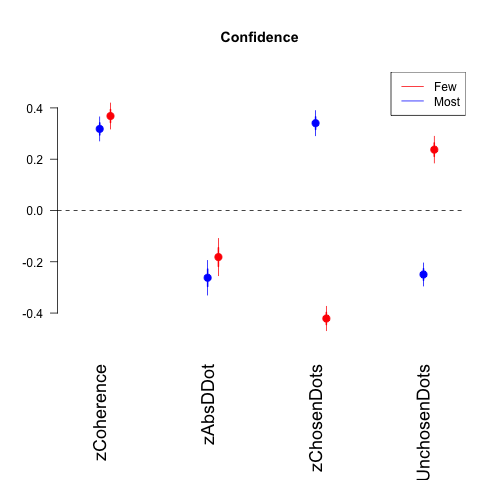

In [74]:
%%R
title_plot = "Confidence "

ModelConfL_1 <- glm(zConfidence ~ zCoherence  + zAbsDDot + zChosenDots + zUnchosenDots , data=data_exp1_Like, )
ModelConfD_1 <- glm(zConfidence ~ zCoherence  + zAbsDDot + zChosenDots + zUnchosenDots, data=data_exp1_DisLike,)

BIC1 = BIC(ModelConfL_1)
BIC2 = BIC(ModelConfD_1)
print("Like BIC:")
print(BIC1)
print("DisLike BIC:")
print(BIC2)

print(ModelConfL_1)
print(ModelConfD_1)

coefplot(ModelConfL_1,intercept=FALSE,vertical = FALSE,  col.pts="blue", cex.var=1.5, cex.pts=2, mar = c(8,4,5,1) ,ylim=c(-0.5, 0.5) ,main=title_plot)
coefplot(ModelConfD_1, intercept=FALSE, vertical = FALSE, add=TRUE, col.pts="red", cex.var=1.5, cex.pts=2,mar = c(8,4,5,1))
legend("topright",  legend=c("Few", "Most"),col=c("red", "blue"), lty=1:1, cex=1)

# Show confidence and dot values (2d plot)

In [75]:
choFrameAll.columns

Index(['Part', 'PartOG', 'TrialN', 'Conf', 'ConfRT', 'Time Elapsed',
       'Correct Choice', 'Coherent Direction', 'Trial Duration', 'Key Press',
       'Reaction Time', 'Correct Given', 'Coherence', 'Color', 'Dot Num',
       'CoherenceSign', 'AbsCoherenceSign', 'SumDot', 'LDot', 'RDot', 'DDot',
       'AbsDDot', 'DDot_Coh2', 'AbsDDot_Coh2', 'SumDot_Coh2', 'RDot_Coh',
       'LDot_Coh', 'DDot_Coh', 'AbsDDot_Coh', 'SumDot_Coh', 'RCoh', 'LCoh',
       'Confidence', 'Choice', 'Frame', 'zCoherence', 'zCoherenceSign',
       'zRDot', 'zLDot', 'zRCoh', 'zLCoh', 'zDDot', 'zSumDot', 'zAbsDDot',
       'zDDot_Coh', 'zAbsDDot_Coh', 'zSumDot_Coh', 'zConfidence', 'zRT',
       'zAbsCoherenceSign', 'Correct', 'CorrectDots', 'ChosenDots',
       'UnchosenDots', 'zChosenDots', 'zUnchosenDots', 'ChosenDot_Coh',
       'UnchosenDot_Coh', 'RDotPlusCoh', 'LDotPlusCoh', 'ChoDotPlusCoh',
       'UnchoDotPlusCoh', 'zChoCoh', 'zUnchoCoh', 'zChosenDot_Coh',
       'zUnchosenDot_Coh', 'zChoDotPlusCoh', 'zUnc

Text(0.5, 1.0, 'High Motion condition')

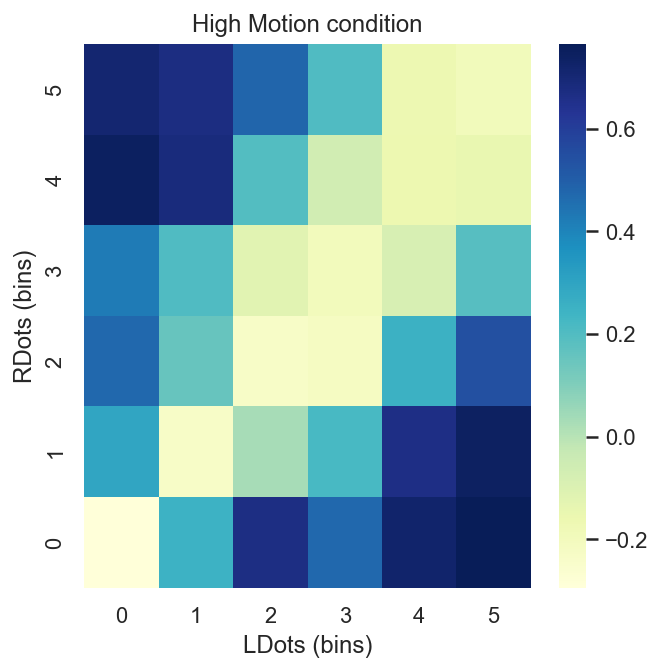

In [76]:
bin_num = 6
choFrameAll['LDots_bin'] = pd.to_numeric(pd.qcut(choFrameAll["LDot"].values, bin_num , labels=range(bin_num)))
choFrameAll['RDots_bin'] = pd.to_numeric(pd.qcut(choFrameAll["RDot"].values, bin_num , labels=range(bin_num)))

choFrameAll1 = choFrameAll.loc[choFrameAll['Frame'] == 1]
df1 = choFrameAll1[['LDots_bin','RDots_bin', 'zConfidence']]
rowIDs = df1['LDots_bin']
colIDs = df1['RDots_bin']

# Create DV data
mat_2dim = np.zeros((rowIDs.max()+1,colIDs.max()+1))

mat_count = np.zeros((rowIDs.max()+1,colIDs.max()+1)) 
for i in range(len(df1)):
        x = int(df1.iloc[i].LDots_bin)
        y = int(df1.iloc[i].RDots_bin)
        mat_2dim[x][y] = mat_2dim[x][y] + df1.iloc[i].zConfidence
        mat_count[x][y] = mat_count[x][y] + 1

mat_conf2D = np.zeros((rowIDs.max()+1,colIDs.max()+1))

for i in range(len(mat_2dim)):
    for j in range(len(mat_2dim[0])):
        mat_conf2D[i][j] = mat_2dim[i][j]/mat_count[i][j] 

ax = sns.heatmap(mat_conf2D,cmap="YlGnBu")
ax.invert_yaxis()
plt.xlabel('LDots (bins)')
plt.ylabel('RDots (bins)')
plt.title('High Motion condition')

Text(0.5, 1.0, 'Low Motion condition')

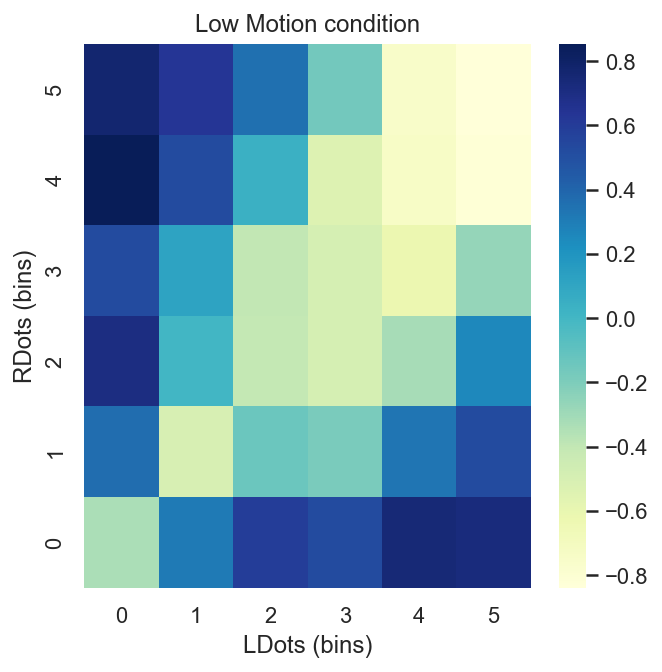

In [77]:
choFrameAll1 = choFrameAll.loc[choFrameAll['Frame'] == 2]
df1 = choFrameAll1[['LDots_bin','RDots_bin', 'zConfidence']]
rowIDs = df1['LDots_bin']
colIDs = df1['RDots_bin']

# Create DV data
mat_2dim = np.zeros((rowIDs.max()+1,colIDs.max()+1))

mat_count = np.zeros((rowIDs.max()+1,colIDs.max()+1)) 
for i in range(len(df1)):
        x = int(df1.iloc[i].LDots_bin)
        y = int(df1.iloc[i].RDots_bin)
        mat_2dim[x][y] = mat_2dim[x][y] + df1.iloc[i].zConfidence
        mat_count[x][y] = mat_count[x][y] + 1

mat_conf2D = np.zeros((rowIDs.max()+1,colIDs.max()+1))

for i in range(len(mat_2dim)):
    for j in range(len(mat_2dim[0])):
        mat_conf2D[i][j] = mat_2dim[i][j]/mat_count[i][j] 

ax = sns.heatmap(mat_conf2D,cmap="YlGnBu")
ax.invert_yaxis()
plt.xlabel('LDots (bins)')
plt.ylabel('RDots (bins)')
plt.title('Low Motion condition')

# Show confidence and coherence (2d plot)

In [78]:
choFrameAll.columns

Index(['Part', 'PartOG', 'TrialN', 'Conf', 'ConfRT', 'Time Elapsed',
       'Correct Choice', 'Coherent Direction', 'Trial Duration', 'Key Press',
       'Reaction Time', 'Correct Given', 'Coherence', 'Color', 'Dot Num',
       'CoherenceSign', 'AbsCoherenceSign', 'SumDot', 'LDot', 'RDot', 'DDot',
       'AbsDDot', 'DDot_Coh2', 'AbsDDot_Coh2', 'SumDot_Coh2', 'RDot_Coh',
       'LDot_Coh', 'DDot_Coh', 'AbsDDot_Coh', 'SumDot_Coh', 'RCoh', 'LCoh',
       'Confidence', 'Choice', 'Frame', 'zCoherence', 'zCoherenceSign',
       'zRDot', 'zLDot', 'zRCoh', 'zLCoh', 'zDDot', 'zSumDot', 'zAbsDDot',
       'zDDot_Coh', 'zAbsDDot_Coh', 'zSumDot_Coh', 'zConfidence', 'zRT',
       'zAbsCoherenceSign', 'Correct', 'CorrectDots', 'ChosenDots',
       'UnchosenDots', 'zChosenDots', 'zUnchosenDots', 'ChosenDot_Coh',
       'UnchosenDot_Coh', 'RDotPlusCoh', 'LDotPlusCoh', 'ChoDotPlusCoh',
       'UnchoDotPlusCoh', 'zChoCoh', 'zUnchoCoh', 'zChosenDot_Coh',
       'zUnchosenDot_Coh', 'zChoDotPlusCoh', 'zUnc

Text(0.5, 1.0, 'High Motion condition')

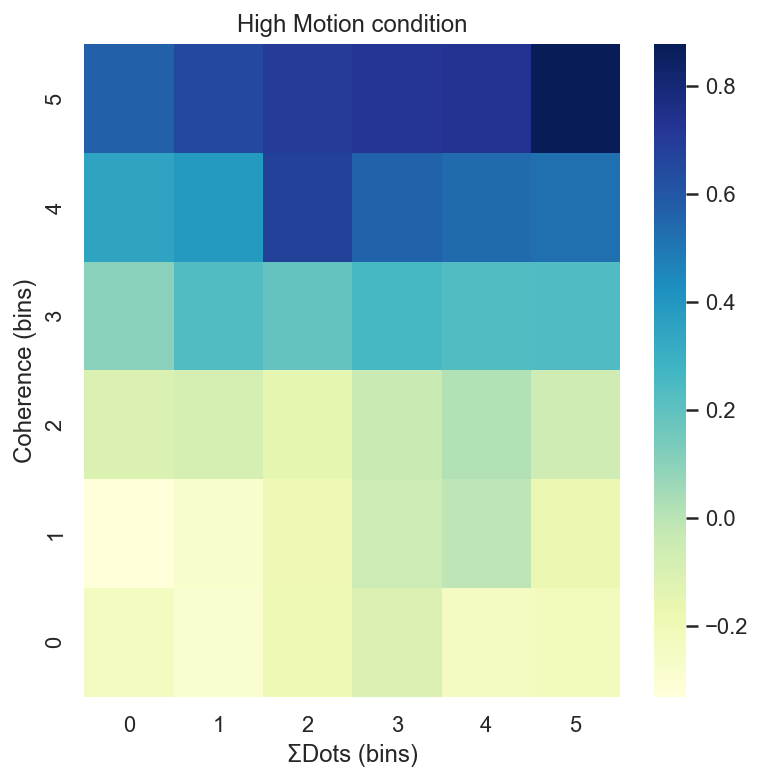

In [79]:
bin_num = 6
choFrameAll['Coherence_bin'] = pd.to_numeric(pd.qcut(choFrameAll["zCoherence"].values, bin_num , labels=range(bin_num)))
choFrameAll['SumDot_bin'] = pd.to_numeric(pd.qcut(choFrameAll["zSumDot"].values, bin_num , labels=range(bin_num)))
#choFrameAll['Coherence_bin'] =  np.tile(5, len(choFrameAll['SumDot_bin']))

#choFrameAll['LCoherence_bin'] = choFrameAll["Coherence"].values
#choFrameAll['RCoherence_bin'] = choFrameAll["SumDot"].values

choFrameAll1 = choFrameAll.loc[choFrameAll['Frame'] == 1]
df1 = choFrameAll1[['Coherence_bin','SumDot_bin', 'zConfidence']]
rowIDs = df1['Coherence_bin']
colIDs = df1['SumDot_bin']

# Create DV data
mat_2dim = np.zeros((rowIDs.max()+1,colIDs.max()+1))

mat_count = np.zeros((rowIDs.max()+1,colIDs.max()+1)) 
for i in range(len(df1)):
        x = int(df1.iloc[i].Coherence_bin)
        y = int(df1.iloc[i].SumDot_bin)
        mat_2dim[x][y] = mat_2dim[x][y] + df1.iloc[i].zConfidence
        mat_count[x][y] = mat_count[x][y] + 1

mat_conf2D = np.zeros((rowIDs.max()+1,colIDs.max()+1))

for i in range(len(mat_2dim)):
    for j in range(len(mat_2dim[0])):
        mat_conf2D[i][j] = mat_2dim[i][j]/mat_count[i][j] 
plt.figure(figsize=(6,6))

ax = sns.heatmap(mat_conf2D,cmap="YlGnBu")
ax.invert_yaxis()
plt.xlabel('ΣDots (bins)')
plt.ylabel('Coherence (bins)')
plt.title('High Motion condition')

Text(0.5, 1.0, 'Low Motion condition')

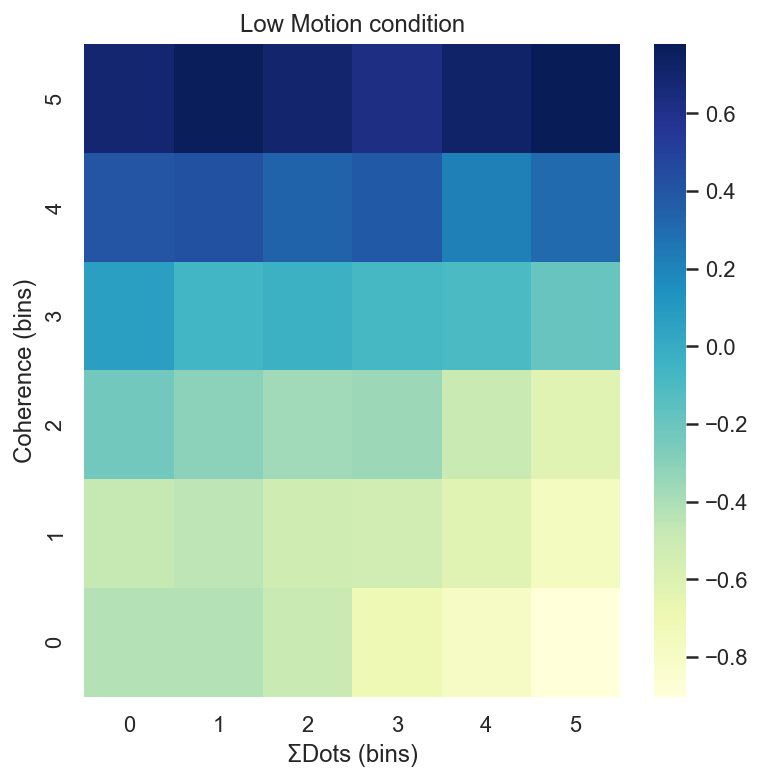

In [80]:
choFrameAll1 = choFrameAll.loc[choFrameAll['Frame'] == 2]
df1 = choFrameAll1[['Coherence_bin','SumDot_bin', 'zConfidence']]
rowIDs = df1['Coherence_bin']
colIDs = df1['SumDot_bin']

# Create DV data
mat_2dim = np.zeros((rowIDs.max()+1,colIDs.max()+1))

mat_count = np.zeros((rowIDs.max()+1,colIDs.max()+1)) 
for i in range(len(df1)):
        x = int(df1.iloc[i].Coherence_bin)
        y = int(df1.iloc[i].SumDot_bin)
        mat_2dim[x][y] = mat_2dim[x][y] + df1.iloc[i].zConfidence
        mat_count[x][y] = mat_count[x][y] + 1

mat_conf2D = np.zeros((rowIDs.max()+1,colIDs.max()+1))

for i in range(len(mat_2dim)):
    for j in range(len(mat_2dim[0])):
        mat_conf2D[i][j] = mat_2dim[i][j]/mat_count[i][j] 
plt.figure(figsize=(6,6))

ax = sns.heatmap(mat_conf2D,cmap="YlGnBu")
ax.invert_yaxis()
plt.xlabel('ΣDots (bins)')
plt.ylabel('Coherence (bins)')
plt.title('Low Motion condition')

# Show confidence and dots + (0.5*) SumDots (2d plot)

In [81]:
choFrameAll.columns

Index(['Part', 'PartOG', 'TrialN', 'Conf', 'ConfRT', 'Time Elapsed',
       'Correct Choice', 'Coherent Direction', 'Trial Duration', 'Key Press',
       'Reaction Time', 'Correct Given', 'Coherence', 'Color', 'Dot Num',
       'CoherenceSign', 'AbsCoherenceSign', 'SumDot', 'LDot', 'RDot', 'DDot',
       'AbsDDot', 'DDot_Coh2', 'AbsDDot_Coh2', 'SumDot_Coh2', 'RDot_Coh',
       'LDot_Coh', 'DDot_Coh', 'AbsDDot_Coh', 'SumDot_Coh', 'RCoh', 'LCoh',
       'Confidence', 'Choice', 'Frame', 'zCoherence', 'zCoherenceSign',
       'zRDot', 'zLDot', 'zRCoh', 'zLCoh', 'zDDot', 'zSumDot', 'zAbsDDot',
       'zDDot_Coh', 'zAbsDDot_Coh', 'zSumDot_Coh', 'zConfidence', 'zRT',
       'zAbsCoherenceSign', 'Correct', 'CorrectDots', 'ChosenDots',
       'UnchosenDots', 'zChosenDots', 'zUnchosenDots', 'ChosenDot_Coh',
       'UnchosenDot_Coh', 'RDotPlusCoh', 'LDotPlusCoh', 'ChoDotPlusCoh',
       'UnchoDotPlusCoh', 'zChoCoh', 'zUnchoCoh', 'zChosenDot_Coh',
       'zUnchosenDot_Coh', 'zChoDotPlusCoh', 'zUnc

/Users/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in double_scalars


Text(0.5, 1.0, 'High Motion condition')

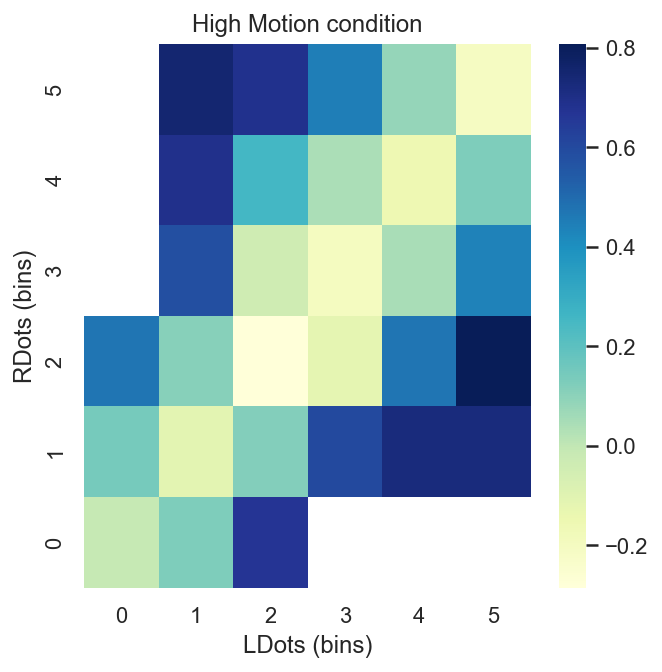

In [82]:
bin_num = 6
choFrameAll['LDots_bin'] = pd.to_numeric(pd.qcut(choFrameAll["zLDot"].values + 0.5*choFrameAll["zSumDot"].values, bin_num , labels=range(bin_num)))
choFrameAll['RDots_bin'] = pd.to_numeric(pd.qcut(choFrameAll["zRDot"].values + 0.5*choFrameAll["zSumDot"].values, bin_num , labels=range(bin_num)))

choFrameAll1 = choFrameAll.loc[choFrameAll['Frame'] == 1]
df1 = choFrameAll1[['LDots_bin','RDots_bin', 'zConfidence']]
rowIDs = df1['LDots_bin']
colIDs = df1['RDots_bin']

# Create DV data
mat_2dim = np.zeros((rowIDs.max()+1,colIDs.max()+1))

mat_count = np.zeros((rowIDs.max()+1,colIDs.max()+1)) 
for i in range(len(df1)):
        x = int(df1.iloc[i].LDots_bin)
        y = int(df1.iloc[i].RDots_bin)
        mat_2dim[x][y] = mat_2dim[x][y] + df1.iloc[i].zConfidence
        mat_count[x][y] = mat_count[x][y] + 1

mat_conf2D = np.zeros((rowIDs.max()+1,colIDs.max()+1))

for i in range(len(mat_2dim)):
    for j in range(len(mat_2dim[0])):
        mat_conf2D[i][j] = mat_2dim[i][j]/mat_count[i][j] 

ax = sns.heatmap(mat_conf2D,cmap="YlGnBu")
ax.invert_yaxis()
plt.xlabel('LDots (bins)')
plt.ylabel('RDots (bins)')
plt.title('High Motion condition')

/Users/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in double_scalars


Text(0.5, 1.0, 'Low Motion condition')

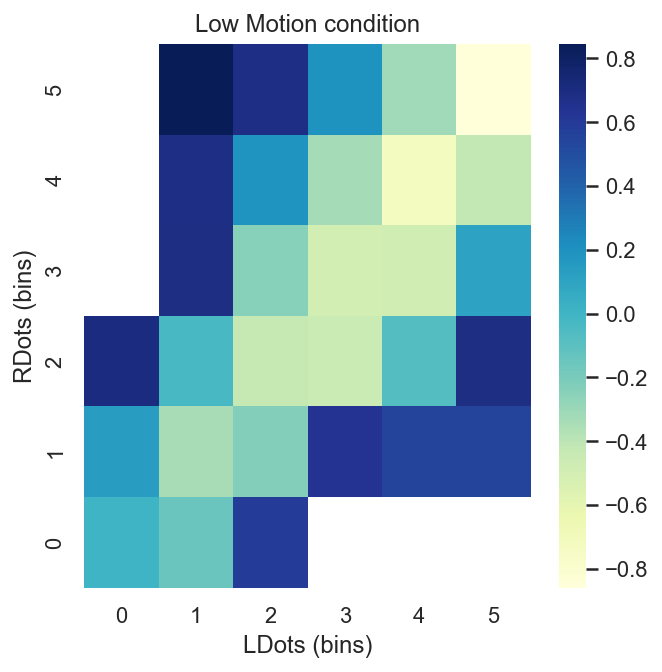

In [83]:
choFrameAll1 = choFrameAll.loc[choFrameAll['Frame'] == 2]
df1 = choFrameAll1[['LDots_bin','RDots_bin', 'zConfidence']]
rowIDs = df1['LDots_bin']
colIDs = df1['RDots_bin']

# Create DV data
mat_2dim = np.zeros((rowIDs.max()+1,colIDs.max()+1))

mat_count = np.zeros((rowIDs.max()+1,colIDs.max()+1)) 
for i in range(len(df1)):
        x = int(df1.iloc[i].LDots_bin)
        y = int(df1.iloc[i].RDots_bin)
        mat_2dim[x][y] = mat_2dim[x][y] + df1.iloc[i].zConfidence
        mat_count[x][y] = mat_count[x][y] + 1

mat_conf2D = np.zeros((rowIDs.max()+1,colIDs.max()+1))

for i in range(len(mat_2dim)):
    for j in range(len(mat_2dim[0])):
        mat_conf2D[i][j] = mat_2dim[i][j]/mat_count[i][j] 

ax = sns.heatmap(mat_conf2D,cmap="YlGnBu")
ax.invert_yaxis()
plt.xlabel('LDots (bins)')
plt.ylabel('RDots (bins)')
plt.title('Low Motion condition')

# Show confidence and coherence + (0.5*) SumDots (2d plot) 

In [84]:
choFrameAll.columns

Index(['Part', 'PartOG', 'TrialN', 'Conf', 'ConfRT', 'Time Elapsed',
       'Correct Choice', 'Coherent Direction', 'Trial Duration', 'Key Press',
       'Reaction Time', 'Correct Given', 'Coherence', 'Color', 'Dot Num',
       'CoherenceSign', 'AbsCoherenceSign', 'SumDot', 'LDot', 'RDot', 'DDot',
       'AbsDDot', 'DDot_Coh2', 'AbsDDot_Coh2', 'SumDot_Coh2', 'RDot_Coh',
       'LDot_Coh', 'DDot_Coh', 'AbsDDot_Coh', 'SumDot_Coh', 'RCoh', 'LCoh',
       'Confidence', 'Choice', 'Frame', 'zCoherence', 'zCoherenceSign',
       'zRDot', 'zLDot', 'zRCoh', 'zLCoh', 'zDDot', 'zSumDot', 'zAbsDDot',
       'zDDot_Coh', 'zAbsDDot_Coh', 'zSumDot_Coh', 'zConfidence', 'zRT',
       'zAbsCoherenceSign', 'Correct', 'CorrectDots', 'ChosenDots',
       'UnchosenDots', 'zChosenDots', 'zUnchosenDots', 'ChosenDot_Coh',
       'UnchosenDot_Coh', 'RDotPlusCoh', 'LDotPlusCoh', 'ChoDotPlusCoh',
       'UnchoDotPlusCoh', 'zChoCoh', 'zUnchoCoh', 'zChosenDot_Coh',
       'zUnchosenDot_Coh', 'zChoDotPlusCoh', 'zUnc

/Users/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in double_scalars


Text(0.5, 1.0, 'High Motion condition')

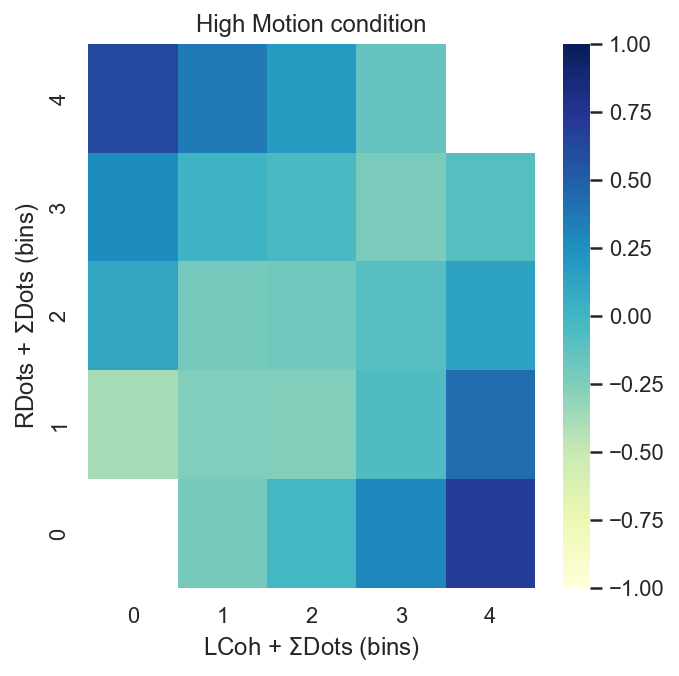

In [85]:
bin_num = 5
choFrameAll['LDots_bin'] = pd.to_numeric(pd.qcut(choFrameAll["zLCoh"].values + 0.5*choFrameAll["zSumDot"].values, bin_num , labels=range(bin_num)))
choFrameAll['RDots_bin'] = pd.to_numeric(pd.qcut(choFrameAll["zRCoh"].values + 0.5*choFrameAll["zSumDot"].values, bin_num , labels=range(bin_num)))

choFrameAll1 = choFrameAll.loc[choFrameAll['Frame'] == 1]
df1 = choFrameAll1[['LDots_bin','RDots_bin', 'zConfidence']]
rowIDs = df1['LDots_bin']
colIDs = df1['RDots_bin']

# Create DV data
mat_2dim = np.zeros((rowIDs.max()+1,colIDs.max()+1))

mat_count = np.zeros((rowIDs.max()+1,colIDs.max()+1)) 
for i in range(len(df1)):
        x = int(df1.iloc[i].LDots_bin)
        y = int(df1.iloc[i].RDots_bin)
        mat_2dim[x][y] = mat_2dim[x][y] + df1.iloc[i].zConfidence
        mat_count[x][y] = mat_count[x][y] + 1

mat_conf2D = np.zeros((rowIDs.max()+1,colIDs.max()+1))

for i in range(len(mat_2dim)):
    for j in range(len(mat_2dim[0])):
        mat_conf2D[i][j] = mat_2dim[i][j]/mat_count[i][j] 

ax = sns.heatmap(mat_conf2D,cmap="YlGnBu",vmin=-1, vmax=1)
ax.invert_yaxis()
plt.xlabel('LCoh + $\Sigma$Dots (bins)')
plt.ylabel('RDots + $\Sigma$Dots (bins)')
plt.title('High Motion condition')

/Users/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in double_scalars


Text(0.5, 1.0, 'Low Motion condition')

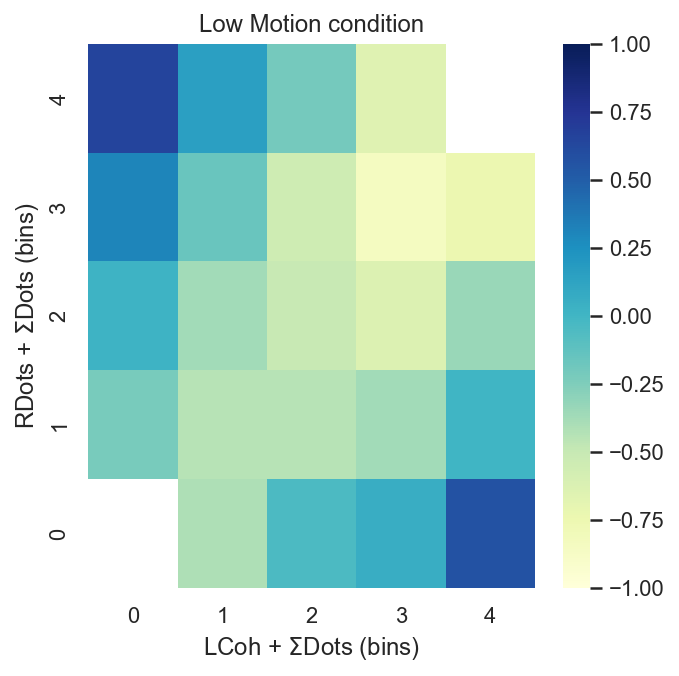

In [86]:
choFrameAll1 = choFrameAll.loc[choFrameAll['Frame'] == 2]
df1 = choFrameAll1[['LDots_bin','RDots_bin', 'zConfidence']]
rowIDs = df1['LDots_bin']
colIDs = df1['RDots_bin']

# Create DV data
mat_2dim = np.zeros((rowIDs.max()+1,colIDs.max()+1))

mat_count = np.zeros((rowIDs.max()+1,colIDs.max()+1)) 
for i in range(len(df1)):
        x = int(df1.iloc[i].LDots_bin)
        y = int(df1.iloc[i].RDots_bin)
        mat_2dim[x][y] = mat_2dim[x][y] + df1.iloc[i].zConfidence
        mat_count[x][y] = mat_count[x][y] + 1

mat_conf2D = np.zeros((rowIDs.max()+1,colIDs.max()+1))

for i in range(len(mat_2dim)):
    for j in range(len(mat_2dim[0])):
        mat_conf2D[i][j] = mat_2dim[i][j]/mat_count[i][j] 

ax = sns.heatmap(mat_conf2D,cmap="YlGnBu",vmin=-1, vmax=1)
ax.invert_yaxis()
plt.xlabel('LCoh + $\Sigma$Dots (bins)')
plt.ylabel('RDots + $\Sigma$Dots (bins)')
plt.title('Low Motion condition')

# Show confidence and coherence + (0.5*) SumDots (2d plot) 

In [87]:
choFrameAll.columns

Index(['Part', 'PartOG', 'TrialN', 'Conf', 'ConfRT', 'Time Elapsed',
       'Correct Choice', 'Coherent Direction', 'Trial Duration', 'Key Press',
       'Reaction Time', 'Correct Given', 'Coherence', 'Color', 'Dot Num',
       'CoherenceSign', 'AbsCoherenceSign', 'SumDot', 'LDot', 'RDot', 'DDot',
       'AbsDDot', 'DDot_Coh2', 'AbsDDot_Coh2', 'SumDot_Coh2', 'RDot_Coh',
       'LDot_Coh', 'DDot_Coh', 'AbsDDot_Coh', 'SumDot_Coh', 'RCoh', 'LCoh',
       'Confidence', 'Choice', 'Frame', 'zCoherence', 'zCoherenceSign',
       'zRDot', 'zLDot', 'zRCoh', 'zLCoh', 'zDDot', 'zSumDot', 'zAbsDDot',
       'zDDot_Coh', 'zAbsDDot_Coh', 'zSumDot_Coh', 'zConfidence', 'zRT',
       'zAbsCoherenceSign', 'Correct', 'CorrectDots', 'ChosenDots',
       'UnchosenDots', 'zChosenDots', 'zUnchosenDots', 'ChosenDot_Coh',
       'UnchosenDot_Coh', 'RDotPlusCoh', 'LDotPlusCoh', 'ChoDotPlusCoh',
       'UnchoDotPlusCoh', 'zChoCoh', 'zUnchoCoh', 'zChosenDot_Coh',
       'zUnchosenDot_Coh', 'zChoDotPlusCoh', 'zUnc

/Users/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in double_scalars


Text(0.5, 1.0, 'High Motion condition')

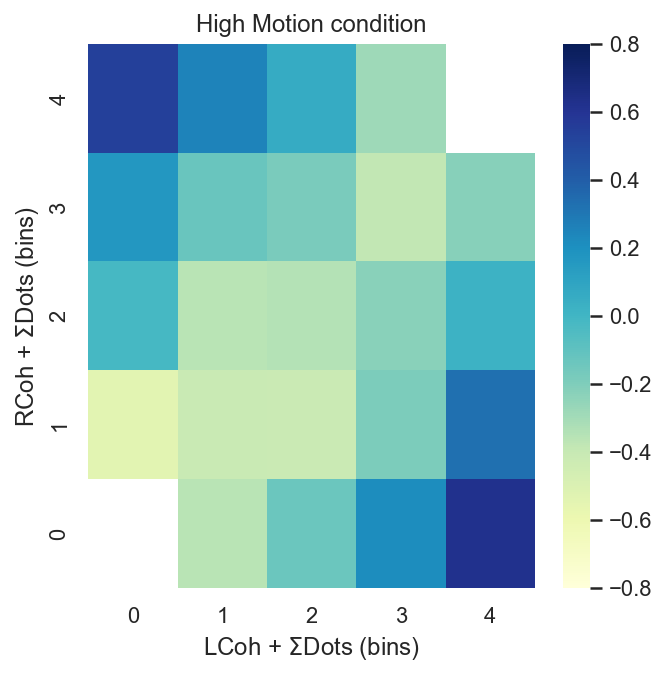

In [88]:
bin_num = 5
data_exp1['LDots_bin'] = pd.to_numeric(pd.qcut(data_exp1["zLCoh"].values + 0.5*data_exp1["zSumDot"].values, bin_num , labels=range(bin_num)))
data_exp1['RDots_bin'] = pd.to_numeric(pd.qcut(data_exp1["zRCoh"].values + 0.5*data_exp1["zSumDot"].values, bin_num , labels=range(bin_num)))

#choFrameAll1 = choFrameAll.loc[choFrameAll['Frame'] == 1]
df1 = data_exp1[['LDots_bin','RDots_bin', 'zConfidenceByFrame']]
rowIDs = df1['LDots_bin']
colIDs = df1['RDots_bin']

# Create DV data
mat_2dim = np.zeros((rowIDs.max()+1,colIDs.max()+1))

mat_count = np.zeros((rowIDs.max()+1,colIDs.max()+1)) 
for i in range(len(df1)):
        x = int(df1.iloc[i].LDots_bin)
        y = int(df1.iloc[i].RDots_bin)
        mat_2dim[x][y] = mat_2dim[x][y] + df1.iloc[i].zConfidenceByFrame
        mat_count[x][y] = mat_count[x][y] + 1

mat_conf2D = np.zeros((rowIDs.max()+1,colIDs.max()+1))

for i in range(len(mat_2dim)):
    for j in range(len(mat_2dim[0])):
        mat_conf2D[i][j] = mat_2dim[i][j]/mat_count[i][j] 

ax = sns.heatmap(mat_conf2D,cmap="YlGnBu",vmin=-0.8, vmax=0.8)
ax.invert_yaxis()
plt.xlabel('LCoh + $\Sigma$Dots (bins)')
plt.ylabel('RCoh + $\Sigma$Dots (bins)')
plt.title('High Motion condition')

/Users/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in double_scalars


Text(0.5, 1.0, 'Low Motion condition')

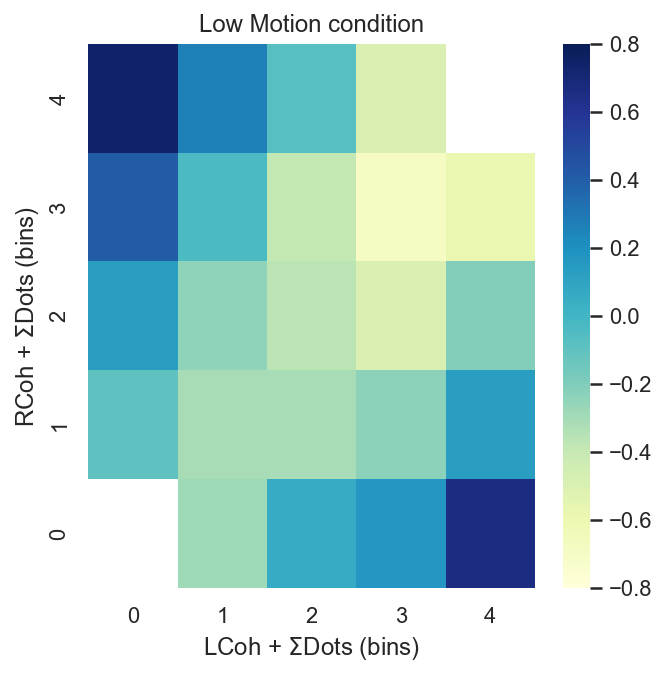

In [89]:
data_exp2['LDots_bin'] = pd.to_numeric(pd.qcut(data_exp2["zLCoh"].values + 0.5*data_exp2["zSumDot"].values, bin_num , labels=range(bin_num)))
data_exp2['RDots_bin'] = pd.to_numeric(pd.qcut(data_exp2["zRCoh"].values + 0.5*data_exp2["zSumDot"].values, bin_num , labels=range(bin_num)))

#choFrameAll1 = choFrameAll.loc[choFrameAll['Frame'] == 2]
df1 = data_exp2[['LDots_bin','RDots_bin', 'zConfidenceByFrame']]
rowIDs = df1['LDots_bin']
colIDs = df1['RDots_bin']

# Create DV data
mat_2dim = np.zeros((rowIDs.max()+1,colIDs.max()+1))

mat_count = np.zeros((rowIDs.max()+1,colIDs.max()+1)) 
for i in range(len(df1)):
        x = int(df1.iloc[i].LDots_bin)
        y = int(df1.iloc[i].RDots_bin)
        mat_2dim[x][y] = mat_2dim[x][y] + df1.iloc[i].zConfidenceByFrame
        mat_count[x][y] = mat_count[x][y] + 1

mat_conf2D = np.zeros((rowIDs.max()+1,colIDs.max()+1))

for i in range(len(mat_2dim)):
    for j in range(len(mat_2dim[0])):
        mat_conf2D[i][j] = mat_2dim[i][j]/mat_count[i][j] 

ax = sns.heatmap(mat_conf2D,cmap="YlGnBu",vmin=-0.8, vmax=0.8)
ax.invert_yaxis()
plt.xlabel('LCoh + $\Sigma$Dots (bins)')
plt.ylabel('RCoh + $\Sigma$Dots (bins)')
plt.title('Low Motion condition')

# Show confidence and coherence + (1*) SumDots (2d plot) 

In [90]:
choFrameAll.columns

Index(['Part', 'PartOG', 'TrialN', 'Conf', 'ConfRT', 'Time Elapsed',
       'Correct Choice', 'Coherent Direction', 'Trial Duration', 'Key Press',
       'Reaction Time', 'Correct Given', 'Coherence', 'Color', 'Dot Num',
       'CoherenceSign', 'AbsCoherenceSign', 'SumDot', 'LDot', 'RDot', 'DDot',
       'AbsDDot', 'DDot_Coh2', 'AbsDDot_Coh2', 'SumDot_Coh2', 'RDot_Coh',
       'LDot_Coh', 'DDot_Coh', 'AbsDDot_Coh', 'SumDot_Coh', 'RCoh', 'LCoh',
       'Confidence', 'Choice', 'Frame', 'zCoherence', 'zCoherenceSign',
       'zRDot', 'zLDot', 'zRCoh', 'zLCoh', 'zDDot', 'zSumDot', 'zAbsDDot',
       'zDDot_Coh', 'zAbsDDot_Coh', 'zSumDot_Coh', 'zConfidence', 'zRT',
       'zAbsCoherenceSign', 'Correct', 'CorrectDots', 'ChosenDots',
       'UnchosenDots', 'zChosenDots', 'zUnchosenDots', 'ChosenDot_Coh',
       'UnchosenDot_Coh', 'RDotPlusCoh', 'LDotPlusCoh', 'ChoDotPlusCoh',
       'UnchoDotPlusCoh', 'zChoCoh', 'zUnchoCoh', 'zChosenDot_Coh',
       'zUnchosenDot_Coh', 'zChoDotPlusCoh', 'zUnc

/Users/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 1.0, 'High Motion condition')

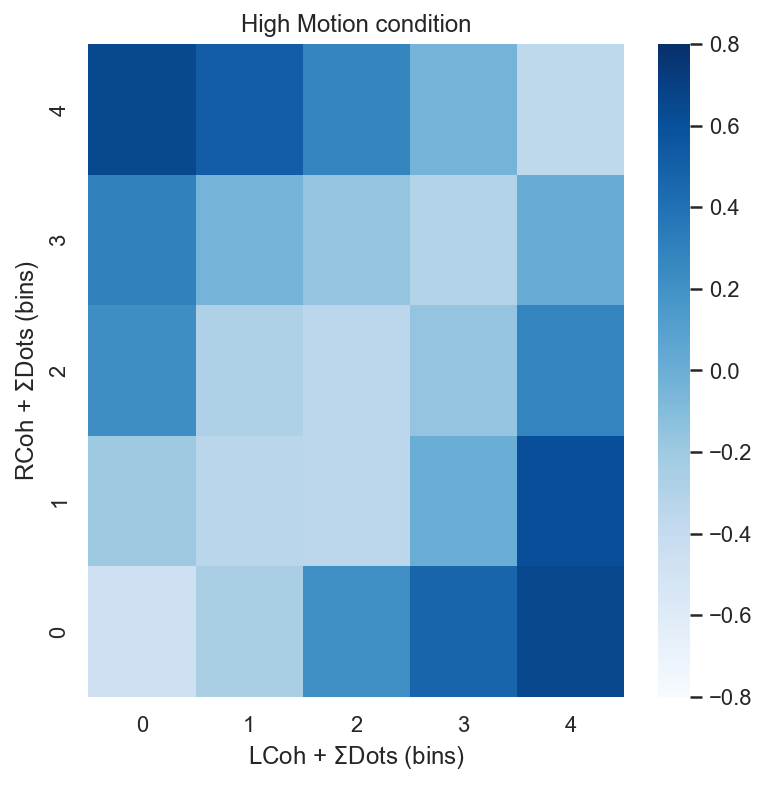

In [91]:
bin_num = 5
data_exp1['LDots_bin'] = pd.to_numeric(pd.qcut(data_exp1["zLCoh"].values + data_exp1["zSumDot"].values, bin_num , labels=range(bin_num)))
data_exp1['RDots_bin'] = pd.to_numeric(pd.qcut(data_exp1["zRCoh"].values + data_exp1["zSumDot"].values, bin_num , labels=range(bin_num)))

#choFrameAll1 = choFrameAll.loc[choFrameAll['Frame'] == 1]
df1 = data_exp1[['LDots_bin','RDots_bin', 'zConfidenceByFrame']]
rowIDs = df1['LDots_bin']
colIDs = df1['RDots_bin']

# Create DV data
mat_2dim = np.zeros((rowIDs.max()+1,colIDs.max()+1))

mat_count = np.zeros((rowIDs.max()+1,colIDs.max()+1)) 
for i in range(len(df1)):
        x = int(df1.iloc[i].LDots_bin)
        y = int(df1.iloc[i].RDots_bin)
        mat_2dim[x][y] = mat_2dim[x][y] + df1.iloc[i].zConfidenceByFrame
        mat_count[x][y] = mat_count[x][y] + 1

mat_conf2D = np.zeros((rowIDs.max()+1,colIDs.max()+1))

for i in range(len(mat_2dim)):
    for j in range(len(mat_2dim[0])):
        mat_conf2D[i][j] = mat_2dim[i][j]/mat_count[i][j] 

plt.figure(figsize=(6,6))
        
        
ax = sns.heatmap(mat_conf2D,cmap="Blues",vmin=-0.8, vmax=0.8)
ax.invert_yaxis()
plt.xlabel('LCoh + $\Sigma$Dots (bins)')
plt.ylabel('RCoh + $\Sigma$Dots (bins)')
plt.title('High Motion condition')

/Users/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Text(0.5, 1.0, 'Low Motion condition')

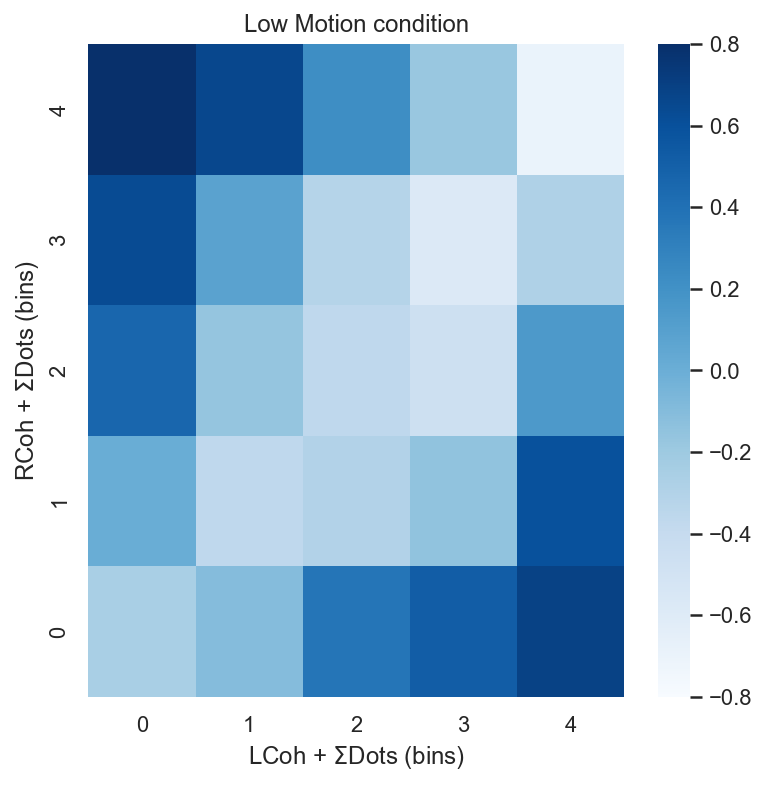

In [92]:
data_exp2['LDots_bin'] = pd.to_numeric(pd.qcut(data_exp2["zLCoh"].values + data_exp2["zSumDot"].values, bin_num , labels=range(bin_num)))
data_exp2['RDots_bin'] = pd.to_numeric(pd.qcut(data_exp2["zRCoh"].values + data_exp2["zSumDot"].values, bin_num , labels=range(bin_num)))

#choFrameAll1 = choFrameAll.loc[choFrameAll['Frame'] == 2]
df1 = data_exp2[['LDots_bin','RDots_bin', 'zConfidenceByFrame']]
rowIDs = df1['LDots_bin']
colIDs = df1['RDots_bin']

# Create DV data
mat_2dim = np.zeros((rowIDs.max()+1,colIDs.max()+1))

mat_count = np.zeros((rowIDs.max()+1,colIDs.max()+1)) 
for i in range(len(df1)):
        x = int(df1.iloc[i].LDots_bin)
        y = int(df1.iloc[i].RDots_bin)
        mat_2dim[x][y] = mat_2dim[x][y] + df1.iloc[i].zConfidenceByFrame
        mat_count[x][y] = mat_count[x][y] + 1

mat_conf2D = np.zeros((rowIDs.max()+1,colIDs.max()+1))

for i in range(len(mat_2dim)):
    for j in range(len(mat_2dim[0])):
        mat_conf2D[i][j] = mat_2dim[i][j]/mat_count[i][j] 

plt.figure(figsize=(6,6))
ax = sns.heatmap(mat_conf2D,cmap="Blues",vmin=-0.8, vmax=0.8)
ax.invert_yaxis()
plt.xlabel('LCoh + $\Sigma$Dots (bins)')
plt.ylabel('RCoh + $\Sigma$Dots (bins)')
plt.title('Low Motion condition')

# Show confidence and coherence + (1*) SumDots (2d plot) 

In [93]:
choFrameAll.columns

Index(['Part', 'PartOG', 'TrialN', 'Conf', 'ConfRT', 'Time Elapsed',
       'Correct Choice', 'Coherent Direction', 'Trial Duration', 'Key Press',
       'Reaction Time', 'Correct Given', 'Coherence', 'Color', 'Dot Num',
       'CoherenceSign', 'AbsCoherenceSign', 'SumDot', 'LDot', 'RDot', 'DDot',
       'AbsDDot', 'DDot_Coh2', 'AbsDDot_Coh2', 'SumDot_Coh2', 'RDot_Coh',
       'LDot_Coh', 'DDot_Coh', 'AbsDDot_Coh', 'SumDot_Coh', 'RCoh', 'LCoh',
       'Confidence', 'Choice', 'Frame', 'zCoherence', 'zCoherenceSign',
       'zRDot', 'zLDot', 'zRCoh', 'zLCoh', 'zDDot', 'zSumDot', 'zAbsDDot',
       'zDDot_Coh', 'zAbsDDot_Coh', 'zSumDot_Coh', 'zConfidence', 'zRT',
       'zAbsCoherenceSign', 'Correct', 'CorrectDots', 'ChosenDots',
       'UnchosenDots', 'zChosenDots', 'zUnchosenDots', 'ChosenDot_Coh',
       'UnchosenDot_Coh', 'RDotPlusCoh', 'LDotPlusCoh', 'ChoDotPlusCoh',
       'UnchoDotPlusCoh', 'zChoCoh', 'zUnchoCoh', 'zChosenDot_Coh',
       'zUnchosenDot_Coh', 'zChoDotPlusCoh', 'zUnc

/Users/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 1.0, 'High Motion condition')

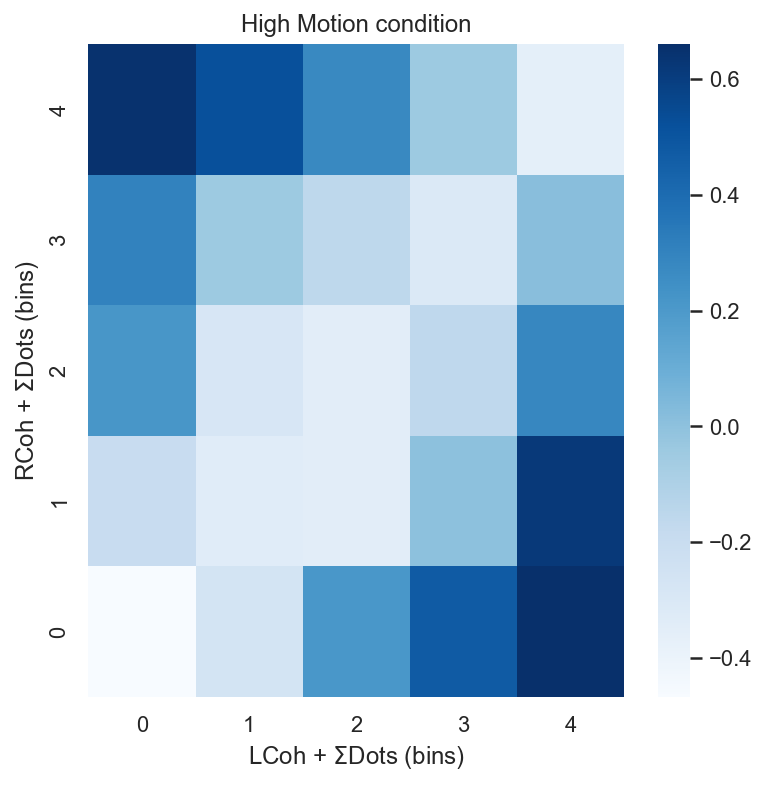

In [94]:
bin_num = 5
data_exp1['LDots_bin'] = pd.to_numeric(pd.qcut(data_exp1["zLCoh"].values + data_exp1["zSumDot"].values, bin_num , labels=range(bin_num)))
data_exp1['RDots_bin'] = pd.to_numeric(pd.qcut(data_exp1["zRCoh"].values + data_exp1["zSumDot"].values, bin_num , labels=range(bin_num)))

#choFrameAll1 = choFrameAll.loc[choFrameAll['Frame'] == 1]
df1 = data_exp1[['LDots_bin','RDots_bin', 'zConfidenceByFrame']]
rowIDs = df1['LDots_bin']
colIDs = df1['RDots_bin']

# Create DV data
mat_2dim = np.zeros((rowIDs.max()+1,colIDs.max()+1))

mat_count = np.zeros((rowIDs.max()+1,colIDs.max()+1)) 
for i in range(len(df1)):
        x = int(df1.iloc[i].LDots_bin)
        y = int(df1.iloc[i].RDots_bin)
        mat_2dim[x][y] = mat_2dim[x][y] + df1.iloc[i].zConfidenceByFrame
        mat_count[x][y] = mat_count[x][y] + 1

mat_conf2D = np.zeros((rowIDs.max()+1,colIDs.max()+1))

for i in range(len(mat_2dim)):
    for j in range(len(mat_2dim[0])):
        mat_conf2D[i][j] = mat_2dim[i][j]/mat_count[i][j] 

plt.figure(figsize=(6,6))
        
        
ax = sns.heatmap(mat_conf2D,cmap="Blues")
ax.invert_yaxis()
plt.xlabel('LCoh + $\Sigma$Dots (bins)')
plt.ylabel('RCoh + $\Sigma$Dots (bins)')
plt.title('High Motion condition')

/Users/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Text(0.5, 1.0, 'Low Motion condition')

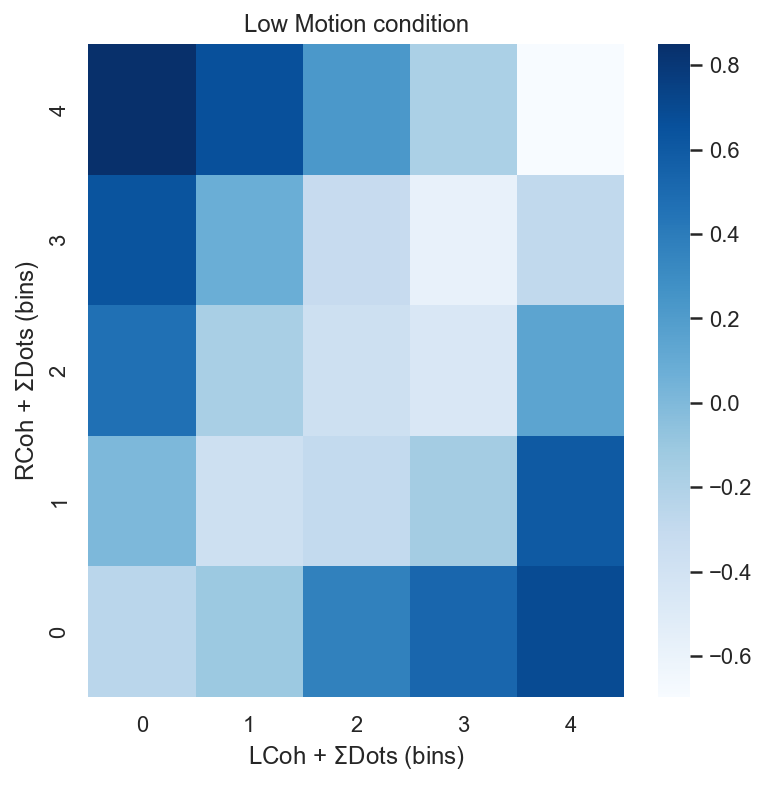

In [95]:
data_exp2['LDots_bin'] = pd.to_numeric(pd.qcut(data_exp2["zLCoh"].values + data_exp2["zSumDot"].values, bin_num , labels=range(bin_num)))
data_exp2['RDots_bin'] = pd.to_numeric(pd.qcut(data_exp2["zRCoh"].values + data_exp2["zSumDot"].values, bin_num , labels=range(bin_num)))

#choFrameAll1 = choFrameAll.loc[choFrameAll['Frame'] == 2]
df1 = data_exp2[['LDots_bin','RDots_bin', 'zConfidenceByFrame']]
rowIDs = df1['LDots_bin']
colIDs = df1['RDots_bin']

# Create DV data
mat_2dim = np.zeros((rowIDs.max()+1,colIDs.max()+1))

mat_count = np.zeros((rowIDs.max()+1,colIDs.max()+1)) 
for i in range(len(df1)):
        x = int(df1.iloc[i].LDots_bin)
        y = int(df1.iloc[i].RDots_bin)
        mat_2dim[x][y] = mat_2dim[x][y] + df1.iloc[i].zConfidenceByFrame
        mat_count[x][y] = mat_count[x][y] + 1

mat_conf2D = np.zeros((rowIDs.max()+1,colIDs.max()+1))

for i in range(len(mat_2dim)):
    for j in range(len(mat_2dim[0])):
        mat_conf2D[i][j] = mat_2dim[i][j]/mat_count[i][j] 

plt.figure(figsize=(6,6))
ax = sns.heatmap(mat_conf2D,cmap="Blues")
ax.invert_yaxis()
plt.xlabel('LCoh + $\Sigma$Dots (bins)')
plt.ylabel('RCoh + $\Sigma$Dots (bins)')
plt.title('Low Motion condition')

# Show choice (accuracy) and dot values (2d plot)

Text(0.5, 1.0, 'High Motion condition')

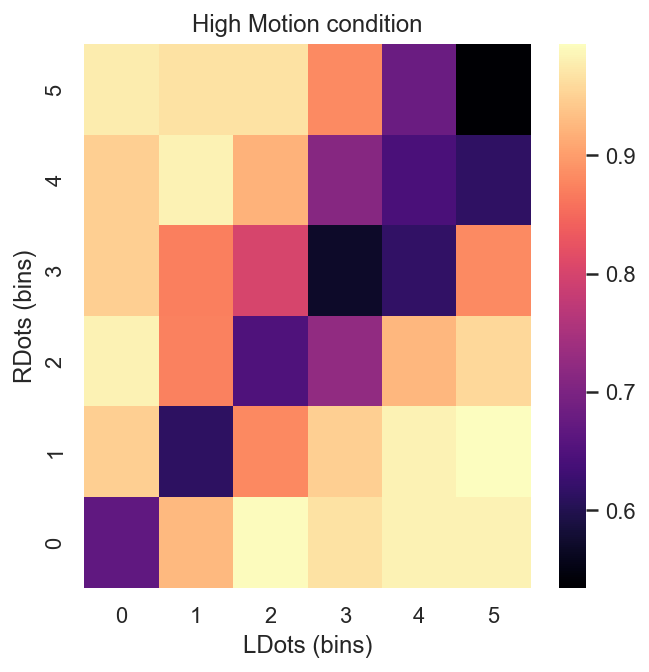

In [96]:
bin_num = 6
choFrameAll['LDots_bin'] = pd.to_numeric(pd.qcut(choFrameAll["LDot"].values, bin_num , labels=range(bin_num)))
choFrameAll['RDots_bin'] = pd.to_numeric(pd.qcut(choFrameAll["RDot"].values, bin_num , labels=range(bin_num)))

choFrameAll1 = choFrameAll.loc[choFrameAll['Frame'] == 1]
df1 = choFrameAll1[['LDots_bin','RDots_bin', 'Correct']]
rowIDs = df1['LDots_bin']
colIDs = df1['RDots_bin']

# Create DV data
mat_2dim = np.zeros((rowIDs.max()+1,colIDs.max()+1))

mat_count = np.zeros((rowIDs.max()+1,colIDs.max()+1)) 
for i in range(len(df1)):
        x = int(df1.iloc[i].LDots_bin)
        y = int(df1.iloc[i].RDots_bin)
        mat_2dim[x][y] = mat_2dim[x][y] + df1.iloc[i].Correct
        mat_count[x][y] = mat_count[x][y] + 1

mat_conf2D = np.zeros((rowIDs.max()+1,colIDs.max()+1))

for i in range(len(mat_2dim)):
    for j in range(len(mat_2dim[0])):
        mat_conf2D[i][j] = mat_2dim[i][j]/mat_count[i][j] 

ax = sns.heatmap(mat_conf2D,cmap="magma")
ax.invert_yaxis()
plt.xlabel('LDots (bins)')
plt.ylabel('RDots (bins)')
plt.title('High Motion condition')

Text(0.5, 1.0, 'Low Motion condition')

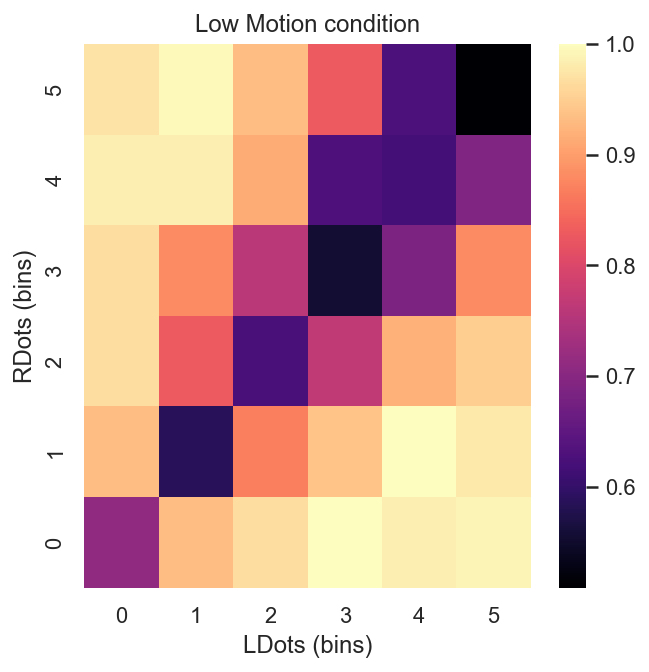

In [97]:
choFrameAll1 = choFrameAll.loc[choFrameAll['Frame'] == 2]
df1 = choFrameAll1[['LDots_bin','RDots_bin', 'Correct']]
rowIDs = df1['LDots_bin']
colIDs = df1['RDots_bin']

# Create DV data
mat_2dim = np.zeros((rowIDs.max()+1,colIDs.max()+1))

mat_count = np.zeros((rowIDs.max()+1,colIDs.max()+1)) 
for i in range(len(df1)):
        x = int(df1.iloc[i].LDots_bin)
        y = int(df1.iloc[i].RDots_bin)
        mat_2dim[x][y] = mat_2dim[x][y] + df1.iloc[i].Correct
        mat_count[x][y] = mat_count[x][y] + 1

mat_conf2D = np.zeros((rowIDs.max()+1,colIDs.max()+1))

for i in range(len(mat_2dim)):
    for j in range(len(mat_2dim[0])):
        mat_conf2D[i][j] = mat_2dim[i][j]/mat_count[i][j] 

ax = sns.heatmap(mat_conf2D,cmap="magma")
ax.invert_yaxis()
plt.xlabel('LDots (bins)')
plt.ylabel('RDots (bins)')
plt.title('Low Motion condition')

In [98]:
data1 = choFrameAll.loc[choFrameAll['Frame'] == 1]
data2 = choFrameAll.loc[choFrameAll['Frame'] == 2]

In [99]:
choFrameAll.columns

Index(['Part', 'PartOG', 'TrialN', 'Conf', 'ConfRT', 'Time Elapsed',
       'Correct Choice', 'Coherent Direction', 'Trial Duration', 'Key Press',
       'Reaction Time', 'Correct Given', 'Coherence', 'Color', 'Dot Num',
       'CoherenceSign', 'AbsCoherenceSign', 'SumDot', 'LDot', 'RDot', 'DDot',
       'AbsDDot', 'DDot_Coh2', 'AbsDDot_Coh2', 'SumDot_Coh2', 'RDot_Coh',
       'LDot_Coh', 'DDot_Coh', 'AbsDDot_Coh', 'SumDot_Coh', 'RCoh', 'LCoh',
       'Confidence', 'Choice', 'Frame', 'zCoherence', 'zCoherenceSign',
       'zRDot', 'zLDot', 'zRCoh', 'zLCoh', 'zDDot', 'zSumDot', 'zAbsDDot',
       'zDDot_Coh', 'zAbsDDot_Coh', 'zSumDot_Coh', 'zConfidence', 'zRT',
       'zAbsCoherenceSign', 'Correct', 'CorrectDots', 'ChosenDots',
       'UnchosenDots', 'zChosenDots', 'zUnchosenDots', 'ChosenDot_Coh',
       'UnchosenDot_Coh', 'RDotPlusCoh', 'LDotPlusCoh', 'ChoDotPlusCoh',
       'UnchoDotPlusCoh', 'zChoCoh', 'zUnchoCoh', 'zChosenDot_Coh',
       'zUnchosenDot_Coh', 'zChoDotPlusCoh', 'zUnc

Correct: MeanL = 0.8; MeanD = 0.79; [Like - Dislike] =  0.01; t =  0.92 ; p-value =0.36674729
RT: MeanL = 1865.41; MeanD = 2102.17; [Like - Dislike] =  -236.76; t =  -5.14 ; p-value =1.879e-05
Conf: MeanL = 0.12; MeanD = -0.12; [Like - Dislike] =  0.24; t =  4.57 ; p-value =8.858e-05


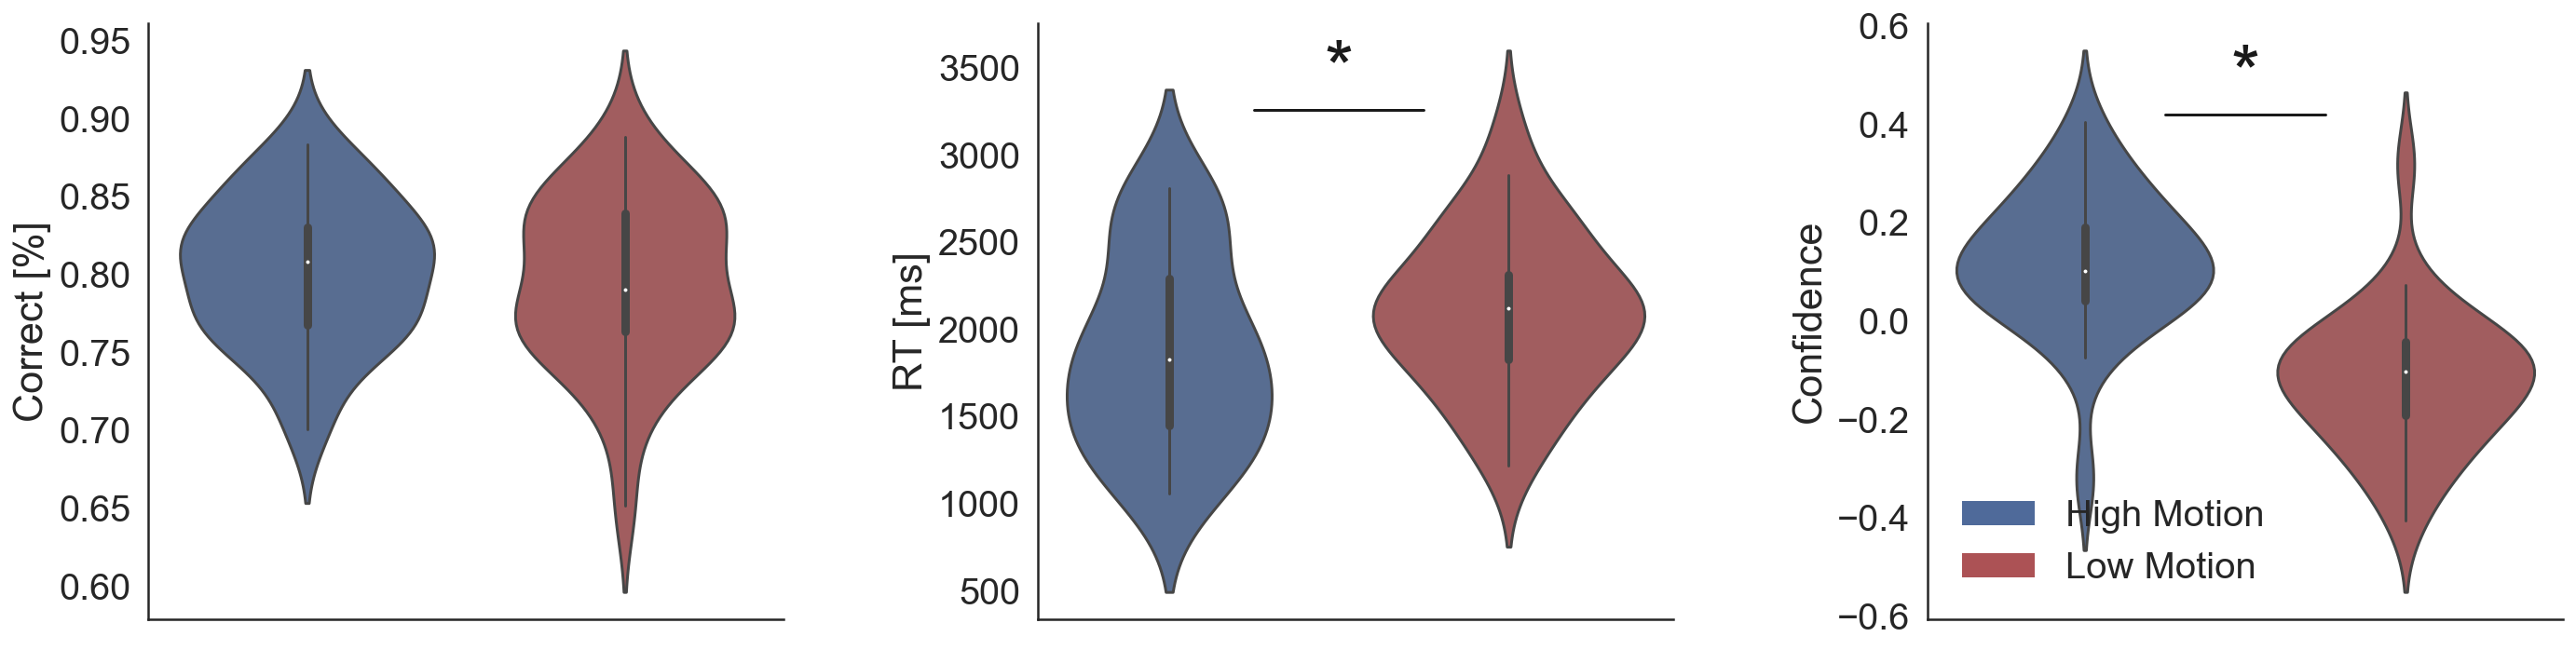

In [100]:
data1Grouped = data1.groupby(['Part']).mean()
data2Grouped = data2.groupby(['Part']).mean()

Corr_1 = data1Grouped.Correct
Corr_2 = data2Grouped.Correct
RT_1 = data1Grouped['Reaction Time']
RT_2 = data2Grouped['Reaction Time']
Conf_1 = data1Grouped.zConfidence
Conf_2 = data2Grouped.zConfidence

# ------------
# calculate stats
# ------------

# USING REPEATED MEASURES
diff = mean(Corr_1) - mean(Corr_2)
[s, p] = stats.ttest_rel(Corr_1,Corr_2)
print ("Correct: MeanL = "+ str(round(mean(Corr_1),2))+ "; MeanD = "+ str(round(mean(Corr_2),2))+"; [Like - Dislike] =  " + str(round(diff,2)) +"; t =  " + str(round(s,2)) + " ; p-value =" + str(round(p,8)))
p_corr = p

diff = mean(RT_1) - mean(RT_2)
[s, p] = stats.ttest_rel(RT_1,RT_2)
print ("RT: MeanL = "+ str(round(mean(RT_1),2))+ "; MeanD = "+ str(round(mean(RT_2),2))+"; [Like - Dislike] =  " + str(round(diff,2)) +"; t =  " + str(round(s,2)) + " ; p-value =" + str(round(p,8) ))
p_rt = p

diff = mean(Conf_1) - mean(Conf_2)
[s, p] = stats.ttest_rel(Conf_1,Conf_2)
print ("Conf: MeanL = "+ str(round(mean(Conf_1),2))+ "; MeanD = "+ str(round(mean(Conf_2),2))+"; [Like - Dislike] =  " + str(round(diff,2)) +"; t =  " + str(round(s,2)) + " ; p-value =" + str(round(p,8) ))
p_conf = p

# ------------
# generate plot
# ------------

f = plt.figure(figsize=(20,20))
sns.set(style='white', font_scale=1.8)
#plt.suptitle('Like and dislike conditions')

my_pal = {0:'#4f6a9a',1:'#ac5255'}
#my_pal = {0:'#f18f5e', 1:'#2a8bba'}

wspace1 = 0.4
left1 = 0.3 
# FOR CORRECT
x1, x2 = 0, 1   

plt.subplot(331)

all_arr = [Corr_1,
           Corr_2]
bplot = sns.violinplot(data=all_arr , palette=my_pal).set( ylabel='Correct [%]')
plt.xticks([0, 1,], ['High Motion', 'Low Motion'])
#plt.yticks([0.5, 1,], [50, 100])
plt.tick_params( axis='x', which='both',bottom=False,top=False,labelbottom=False) 

#plt.subplots_adjust(left=left1, wspace=wspace1)
plt.subplots_adjust(left=0, wspace=wspace1)


# FOR RT
plt.subplot(332)
all_arr1 = [RT_1,
          RT_2]
bplot = sns.violinplot(data=all_arr1, palette=my_pal).set(ylabel='RT [ms]')
plt.xticks([0, 1,], ['High Motion', 'Low Motion'])
plt.tick_params( axis='x', which='both',bottom=False,top=False,labelbottom=False)

# Add asterisk
x1, x2 = 0, 1   
y_max = max([np.max(RT_1), np.max(RT_2)])
y, h, col = y_max + y_max/50, y_max/50, 'k'
plt.plot( [x1+0.25, x2-0.25], [ y+h, y+h], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h, "*", ha='center', va='bottom', color=col,fontsize = 40)

#plt.subplots_adjust(left=left1, wspace=wspace1)
#plt.subplots_adjust(left=left1, wspace=wspace1)


# FOR CONF
plt.subplot(333)
all_arr1 = [Conf_1,
          Conf_2]
bplot = sns.violinplot(data=all_arr1, palette=my_pal).set(ylabel='Confidence')
plt.xticks([0, 1,], ['High Motion', 'Low Motion'])
plt.tick_params( axis='x', which='both',bottom=False,top=False,labelbottom=False) 

# Add asterisk
x1, x2 = 0, 1   
y_max = max([np.max(Conf_1), np.max(Conf_2)])
y, h, col = y_max + y_max/50, y_max/50, 'k'
plt.plot( [x1+0.25, x2-0.25], [ y+h, y+h], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h, "*", ha='center', va='bottom', color=col,fontsize = 40)

#plt.subplots_adjust(left=left1, wspace=wspace1)
#plt.subplots_adjust(left=left1, wspace=wspace1)

sns.despine()

patch_1 = mpatches.Patch(facecolor=my_pal[0],hatch=r'', label='High Motion')
patch_2 = mpatches.Patch(facecolor=my_pal[1],hatch=r'', label='Low Motion')

leg = plt.legend(handles=[patch_1,patch_2],loc = 'lower left',fontsize = 20)
leg.get_frame().set_facecolor('none')
leg.get_frame().set_linewidth(0.0)

#f.savefig(str('SavedFigures/BehaviouralComparisonLikeDislike_31.png'), dpi = 200 )

## Save dataframe

In [293]:
choFrameAll.to_csv('RDMFrame_FullProlificData_CoherenceControl_Apr2021.csv')

 -------------------
 
# Hierarchical regression

## Confidence ~ BehavioralParams (controlling for coherence)

### Low Motion condition model

In [101]:
%%R
# Fit the multilevel linear model


#if (file.exists('SavedModels/HModel_Confidence_Dislike_31_m1.rda')){
#    load('SavedModels/HModel_Confidence_Dislike_31_m1.rda')   
#    print('  Found old parameter estimates in "SavedModels/estimates". Skipping estimation...')
#}
#else{
    confidence_Dislike_hmodel <- lmer(zConfidence ~ zCoherence  +  zRT + zSumDot + (zCoherence   + zRT + zSumDot| Part), data=data_exp1_DisLike, control=lmerControl(optimizer="optimx", optCtrl=list(method="nlminb")))
    #save(confidence_Dislike_hmodel, file = "SavedModels/HModel_Confidence_Dislike_31_m1.rda")
    display (confidence_Dislike_hmodel)
#}



lmer(formula = zConfidence ~ zCoherence + zRT + zSumDot + (zCoherence + 
    zRT + zSumDot | Part), data = data_exp1_DisLike, control = lmerControl(optimizer = "optimx", 
    optCtrl = list(method = "nlminb")))
            coef.est coef.se
(Intercept) -0.09     0.02  
zCoherence   0.36     0.02  
zRT         -0.29     0.03  
zSumDot     -0.09     0.02  

Error terms:
 Groups   Name        Std.Dev. Corr              
 Part     (Intercept) 0.11                       
          zCoherence  0.12     -0.52             
          zRT         0.12      0.27 -0.22       
          zSumDot     0.09      0.15 -0.38  0.17 
 Residual             0.86                       
---
number of obs: 6496, groups: Part, 29
AIC = 16675, DIC = 16598.8
deviance = 16621.9 


In [102]:
%%R

# Extract mixed effect paramters
mix_Confidence_Dislike_model <- coef(confidence_Dislike_hmodel)

## Estimating DFs and p-values
# get the coefficients for the best fitting model
coefs <- data.frame(coef(summary(confidence_Dislike_hmodel)))
coefs
# Use the Kenward-Roger approximation to get approximate degrees of freedom
df.KR <- get_ddf_Lb(confidence_Dislike_hmodel, fixef(confidence_Dislike_hmodel))
coefs$df.KR <-(rep(df.KR, each=4))

# Calculate confidence intervals from the estimates and the standard errors
coefs$semax <- coefs$Estimate + (coefs$Std..Error)
coefs$semin <- coefs$Estimate - (coefs$Std..Error)

# get p-values from the t-distribution using the t-values and approximated
# degrees of freedom
coefs$p.KR <- 2 * (1 - pt(abs(coefs$t.value), df.KR))

# use normal distribution to approximate p-value (tends to be anti-conservative with small sample sizes)
coefs$p.z <- 2 * (1 - pnorm(abs(coefs$t.value)))

In [103]:
%%R
summary(confidence_Dislike_hmodel)

Linear mixed model fit by REML ['lmerMod']
Formula: zConfidence ~ zCoherence + zRT + zSumDot + (zCoherence + zRT +  
    zSumDot | Part)
   Data: data_exp1_DisLike
Control: lmerControl(optimizer = "optimx", optCtrl = list(method = "nlminb"))

REML criterion at convergence: 16645

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-8.6628 -0.6434  0.0905  0.7194  3.1485 

Random effects:
 Groups   Name        Variance Std.Dev. Corr             
 Part     (Intercept) 0.012962 0.11385                   
          zCoherence  0.013683 0.11697  -0.52            
          zRT         0.014639 0.12099   0.27 -0.22      
          zSumDot     0.008529 0.09235   0.15 -0.38  0.17
 Residual             0.737575 0.85882                   
Number of obs: 6496, groups:  Part, 29

Fixed effects:
            Estimate Std. Error t value
(Intercept) -0.08776    0.02375  -3.695
zCoherence   0.35893    0.02472  14.518
zRT         -0.29028    0.02526 -11.491
zSumDot     -0.08937    0.02021  -4.42

In [104]:
#%%R 
#coef(confidence_Dislike_hmodel)

In [105]:
%%R
z_values =coefs[1]/coefs[2]
z_values

              Estimate
(Intercept)  -3.694569
zCoherence   14.517721
zRT         -11.491344
zSumDot      -4.422501


In [106]:
%R -o coefs -o mix_Confidence_Dislike_model
# extract
mix_Confidence_Dislike_model = mix_Confidence_Dislike_model[0]

conf_table_exp1 = coefs
conf_table_exp1

Estimate  Std..Error    t.value      df.KR     semax     semin  \
(Intercept) -0.087755    0.023753  -3.694569  27.998627 -0.064003 -0.111508   
zCoherence   0.358929    0.024724  14.517721  27.998627  0.383653  0.334206   
zRT         -0.290284    0.025261 -11.491344  27.998627 -0.265023 -0.315546   
zSumDot     -0.089370    0.020208  -4.422501  27.998627 -0.069162 -0.109578   

                     p.KR      p.z  
(Intercept)  9.470572e-04  0.00022  
zCoherence   1.465494e-14  0.00000  
zRT          4.112488e-12  0.00000  
zSumDot      1.341775e-04  0.00001

In [107]:
mix_Confidence_Dislike_model

<rpy2.robjects.vectors.DataFrame object at 0x7f82d3139b48> [RTYPES.VECSXP]
R classes: ('data.frame',)
[FloatSexpV..., FloatSexpV..., FloatSexpV..., FloatSexpV...]
  (Intercept): <class 'rpy2.rinterface.FloatSexpVector'>
  <rpy2.rinterface.FloatSexpVector object at 0x7f82f2c7aa08> [RTYPES.REALSXP]
  zCoherence: <class 'rpy2.rinterface.FloatSexpVector'>
  <rpy2.rinterface.FloatSexpVector object at 0x7f82f2c7a908> [RTYPES.REALSXP]
  zRT: <class 'rpy2.rinterface.FloatSexpVector'>
  <rpy2.rinterface.FloatSexpVector object at 0x7f82f2b990c8> [RTYPES.REALSXP]
  zSumDot: <class 'rpy2.rinterface.FloatSexpVector'>
  <rpy2.rinterface.FloatSexpVector object at 0x7f8302bc0d08> [RTYPES.REALSXP]

In [108]:
#conf_table_exp1 = conf_table_exp1.T
conf_table_exp1

Estimate  Std..Error    t.value      df.KR     semax     semin  \
(Intercept) -0.087755    0.023753  -3.694569  27.998627 -0.064003 -0.111508   
zCoherence   0.358929    0.024724  14.517721  27.998627  0.383653  0.334206   
zRT         -0.290284    0.025261 -11.491344  27.998627 -0.265023 -0.315546   
zSumDot     -0.089370    0.020208  -4.422501  27.998627 -0.069162 -0.109578   

                     p.KR      p.z  
(Intercept)  9.470572e-04  0.00022  
zCoherence   1.465494e-14  0.00000  
zRT          4.112488e-12  0.00000  
zSumDot      1.341775e-04  0.00001

In [109]:
#Generate table with paramters to later plot
conf_table_exp1.columns = ['coefficient', 'se', 't', "dfKR", "SEmax","SEmin","pKR","pz" ]
conf_table_exp1 = conf_table_exp1.iloc[:, 0:-1].copy(); conf_table_exp1.loc[:, 'SEmax'] = conf_table_exp1['coefficient'] + conf_table_exp1['se']*2
conf_table_exp1.loc[:, 'SEmin'] = conf_table_exp1['coefficient'] - conf_table_exp1['se']*2
conf_table_exp1 = conf_table_exp1.transpose()


In [110]:
conf_table_exp1.columns = [ 'Inter', 'Coherence','RT','ΣMotionStr']
#conf_table_exp1.loc['p'] = np.round(conf_table_exp1.loc['p'], 4)
conf_table_exp1 = conf_table_exp1[['Inter','Coherence', 'RT','ΣMotionStr']]
conf_table_Dislike = conf_table_exp1

conf_table_Dislike

Inter     Coherence            RT  ΣMotionStr
coefficient  -0.087755  3.589293e-01 -2.902844e-01   -0.089370
se            0.023753  2.472353e-02  2.526113e-02    0.020208
t            -3.694569  1.451772e+01 -1.149134e+01   -4.422501
dfKR         27.998627  2.799863e+01  2.799863e+01   27.998627
SEmax        -0.040250  4.083763e-01 -2.397621e-01   -0.048954
SEmin        -0.135261  3.094822e-01 -3.408066e-01   -0.129786
pKR           0.000947  1.465494e-14  4.112488e-12    0.000134

### High Motion Condition

In [111]:
%%R
# Fit the multilevel linear model
#if (file.exists('SavedModels/HModel_Confidence_Like_31_m1.rda')){
#    print('  Found old parameter estimates in "SavedModels". Skipping estimation...')
#    load('SavedModels/HModel_Confidence_Like_31_m1.rda')   
#}
#else{
confidence_Like_hmodel <- lmer(zConfidence ~ zCoherence  + zRT+ zSumDot + (zCoherence + zRT+ zSumDot| Part), data=data_exp1_Like, control=lmerControl(optimizer="optimx", optCtrl=list(method="nlminb")))
display (confidence_Like_hmodel)
#save(confidence_Like_hmodel, file = "SavedModels/HModel_Confidence_Like_31_m1.rda")
#}

R[write to console]: boundary (singular) fit: see ?isSingular



lmer(formula = zConfidence ~ zCoherence + zRT + zSumDot + (zCoherence + 
    zRT + zSumDot | Part), data = data_exp1_Like, control = lmerControl(optimizer = "optimx", 
    optCtrl = list(method = "nlminb")))
            coef.est coef.se
(Intercept)  0.08     0.02  
zCoherence   0.24     0.02  
zRT         -0.31     0.03  
zSumDot      0.06     0.02  

Error terms:
 Groups   Name        Std.Dev. Corr              
 Part     (Intercept) 0.11                       
          zCoherence  0.07      1.00             
          zRT         0.13     -0.12 -0.12       
          zSumDot     0.08      0.32  0.32  0.08 
 Residual             0.79                       
---
number of obs: 6496, groups: Part, 29
AIC = 15583.6, DIC = 15504.4
deviance = 15529.0 


In [112]:
%%R

# Extract mixed effect paramters
mix_Confidence_Like_model <- coef(confidence_Like_hmodel)

## Estimating DFs and p-values
# get the coefficients for the best fitting model
coefs <- data.frame(coef(summary(confidence_Like_hmodel)))
coefs
# Use the Kenward-Roger approximation to get approximate degrees of freedom
df.KR <- get_ddf_Lb(confidence_Like_hmodel, fixef(confidence_Like_hmodel))
coefs$df.KR <-(rep(df.KR, each=4))

# Calculate confidence intervals from the estimates and the standard errors
coefs$semax <- coefs$Estimate + (coefs$Std..Error)
coefs$semin <- coefs$Estimate - (coefs$Std..Error)

# get p-values from the t-distribution using the t-values and approximated
# degrees of freedom
coefs$p.KR <- 2 * (1 - pt(abs(coefs$t.value), df.KR))

# use normal distribution to approximate p-value (tends to be anti-conservative with small sample sizes)
coefs$p.z <- 2 * (1 - pnorm(abs(coefs$t.value)))

In [113]:
%%R
summary(confidence_Like_hmodel)

Linear mixed model fit by REML ['lmerMod']
Formula: zConfidence ~ zCoherence + zRT + zSumDot + (zCoherence + zRT +  
    zSumDot | Part)
   Data: data_exp1_Like
Control: lmerControl(optimizer = "optimx", optCtrl = list(method = "nlminb"))

REML criterion at convergence: 15553.6

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-7.2222 -0.5923  0.1024  0.6853  3.3390 

Random effects:
 Groups   Name        Variance Std.Dev. Corr             
 Part     (Intercept) 0.011434 0.10693                   
          zCoherence  0.005353 0.07316   1.00            
          zRT         0.015906 0.12612  -0.12 -0.12      
          zSumDot     0.006301 0.07938   0.32  0.32  0.08
 Residual             0.626224 0.79134                   
Number of obs: 6496, groups:  Part, 29

Fixed effects:
            Estimate Std. Error t value
(Intercept)  0.08268    0.02225   3.716
zCoherence   0.23790    0.01721  13.820
zRT         -0.31163    0.02603 -11.971
zSumDot      0.05546    0.01774   3.127

In [114]:
%%R
coefs

               Estimate Std..Error    t.value   df.KR       semax       semin
(Intercept)  0.08268311 0.02225342   3.715523 27.9883  0.10493653  0.06042968
zCoherence   0.23790096 0.01721366  13.820476 27.9883  0.25511461  0.22068730
zRT         -0.31162959 0.02603305 -11.970539 27.9883 -0.28559655 -0.33766264
zSumDot      0.05546254 0.01773901   3.126586 27.9883  0.07320155  0.03772353
                    p.KR         p.z
(Intercept) 8.964945e-04 0.000202784
zCoherence  4.996004e-14 0.000000000
zRT         1.588063e-12 0.000000000
zSumDot     4.098534e-03 0.001768490


In [115]:
%%R

z_values =coefs[1]/coefs[2]
z_values

              Estimate
(Intercept)   3.715523
zCoherence   13.820476
zRT         -11.970539
zSumDot       3.126586


In [116]:
%R -o coefs -o mix_Confidence_Like_model

mix_Confidence_Like_model = mix_Confidence_Like_model[0]

conf_table_exp1 = coefs
conf_table_exp1

Estimate  Std..Error    t.value      df.KR     semax     semin  \
(Intercept)  0.082683    0.022253   3.715523  27.988301  0.104937  0.060430   
zCoherence   0.237901    0.017214  13.820476  27.988301  0.255115  0.220687   
zRT         -0.311630    0.026033 -11.970539  27.988301 -0.285597 -0.337663   
zSumDot      0.055463    0.017739   3.126586  27.988301  0.073202  0.037724   

                     p.KR       p.z  
(Intercept)  8.964945e-04  0.000203  
zCoherence   4.996004e-14  0.000000  
zRT          1.588063e-12  0.000000  
zSumDot      4.098534e-03  0.001768

In [117]:
conf_table_exp1

Estimate  Std..Error    t.value      df.KR     semax     semin  \
(Intercept)  0.082683    0.022253   3.715523  27.988301  0.104937  0.060430   
zCoherence   0.237901    0.017214  13.820476  27.988301  0.255115  0.220687   
zRT         -0.311630    0.026033 -11.970539  27.988301 -0.285597 -0.337663   
zSumDot      0.055463    0.017739   3.126586  27.988301  0.073202  0.037724   

                     p.KR       p.z  
(Intercept)  8.964945e-04  0.000203  
zCoherence   4.996004e-14  0.000000  
zRT          1.588063e-12  0.000000  
zSumDot      4.098534e-03  0.001768

In [118]:
#Generate table with paramters to later plot
conf_table_exp1.columns = ['coefficient', 'se', 't', "dfKR", "SEmax","SEmin","pKR","pz" ]
conf_table_exp1 = conf_table_exp1.iloc[:, 0:-1].copy(); conf_table_exp1.loc[:, 'SEmax'] = conf_table_exp1['coefficient'] + conf_table_exp1['se']*2
conf_table_exp1.loc[:, 'SEmin'] = conf_table_exp1['coefficient'] - conf_table_exp1['se']*2
conf_table_exp1 = conf_table_exp1.transpose()


In [119]:
conf_table_exp1.columns = [ 'Inter', 'Coherence','RT', 'ΣMotionStr']
#conf_table_exp1.loc['p'] = np.round(conf_table_exp1.loc['p'], 4)
conf_table_exp1 = conf_table_exp1[[ 'Inter', 'Coherence','RT', 'ΣMotionStr']]
conf_table_Like = conf_table_exp1
conf_table_Like

Inter     Coherence            RT  ΣMotionStr
coefficient   0.082683  2.379010e-01 -3.116296e-01    0.055463
se            0.022253  1.721366e-02  2.603305e-02    0.017739
t             3.715523  1.382048e+01 -1.197054e+01    3.126586
dfKR         27.988301  2.798830e+01  2.798830e+01   27.988301
SEmax         0.127190  2.723283e-01 -2.595635e-01    0.090941
SEmin         0.038176  2.034736e-01 -3.636957e-01    0.019985
pKR           0.000896  4.996004e-14  1.588063e-12    0.004099

### Plotting both conditions

In [120]:
conf_table_Dislike

Inter     Coherence            RT  ΣMotionStr
coefficient  -0.087755  3.589293e-01 -2.902844e-01   -0.089370
se            0.023753  2.472353e-02  2.526113e-02    0.020208
t            -3.694569  1.451772e+01 -1.149134e+01   -4.422501
dfKR         27.998627  2.799863e+01  2.799863e+01   27.998627
SEmax        -0.040250  4.083763e-01 -2.397621e-01   -0.048954
SEmin        -0.135261  3.094822e-01 -3.408066e-01   -0.129786
pKR           0.000947  1.465494e-14  4.112488e-12    0.000134

In [121]:
conf_table_Like

Inter     Coherence            RT  ΣMotionStr
coefficient   0.082683  2.379010e-01 -3.116296e-01    0.055463
se            0.022253  1.721366e-02  2.603305e-02    0.017739
t             3.715523  1.382048e+01 -1.197054e+01    3.126586
dfKR         27.988301  2.798830e+01  2.798830e+01   27.988301
SEmax         0.127190  2.723283e-01 -2.595635e-01    0.090941
SEmin         0.038176  2.034736e-01 -3.636957e-01    0.019985
pKR           0.000896  4.996004e-14  1.588063e-12    0.004099

In [122]:
conf_table_Dislike

Inter     Coherence            RT  ΣMotionStr
coefficient  -0.087755  3.589293e-01 -2.902844e-01   -0.089370
se            0.023753  2.472353e-02  2.526113e-02    0.020208
t            -3.694569  1.451772e+01 -1.149134e+01   -4.422501
dfKR         27.998627  2.799863e+01  2.799863e+01   27.998627
SEmax        -0.040250  4.083763e-01 -2.397621e-01   -0.048954
SEmin        -0.135261  3.094822e-01 -3.408066e-01   -0.129786
pKR           0.000947  1.465494e-14  4.112488e-12    0.000134

Mismatch
---------------- SIGNIFICANT FACTOR ----------------------
Inter : MeanL = 0.08; t =  4.52101 ; p-value =0.0001***
Inter : MeanD = -0.09; t =  -4.62184 ; p-value =8e-05***
Coherence : MeanL = 0.24; t =  19.01139 ; p-value =0.0***
Coherence : MeanD = 0.36; t =  18.4878 ; p-value =0.0***
RT : MeanL = -0.31; t =  -14.67966 ; p-value =0.0***
RT : MeanD = -0.29; t =  -14.38242 ; p-value =0.0***
ΣMotionStr : MeanL = 0.06; t =  4.49854 ; p-value =0.00011***
ΣMotionStr : MeanD = -0.09; t =  -6.0951 ; p-value =0.0***
---------------- COMPARE [ LIKE - DISLIKE ] ----------------------
Inter : MeanL = 0.08; MeanD = -0.08776; [Like - Dislike] =  0; t =  4.69305 ; p-value =6e-05***
Coherence : MeanL = 0.24; MeanD = 0.35893; [Like - Dislike] =  0; t =  -8.74318 ; p-value =0.0***
RT : MeanL = -0.31; MeanD = -0.29; [Like - Dislike] =  0; t =  -0.975 ; p-value =0.338
ΣMotionStr : MeanL = 0.06; MeanD = -0.08937; [Like - Dislike] =  0; t =  8.67132 ; p-value =0.0***
---------------- MAGNITUDE [ L

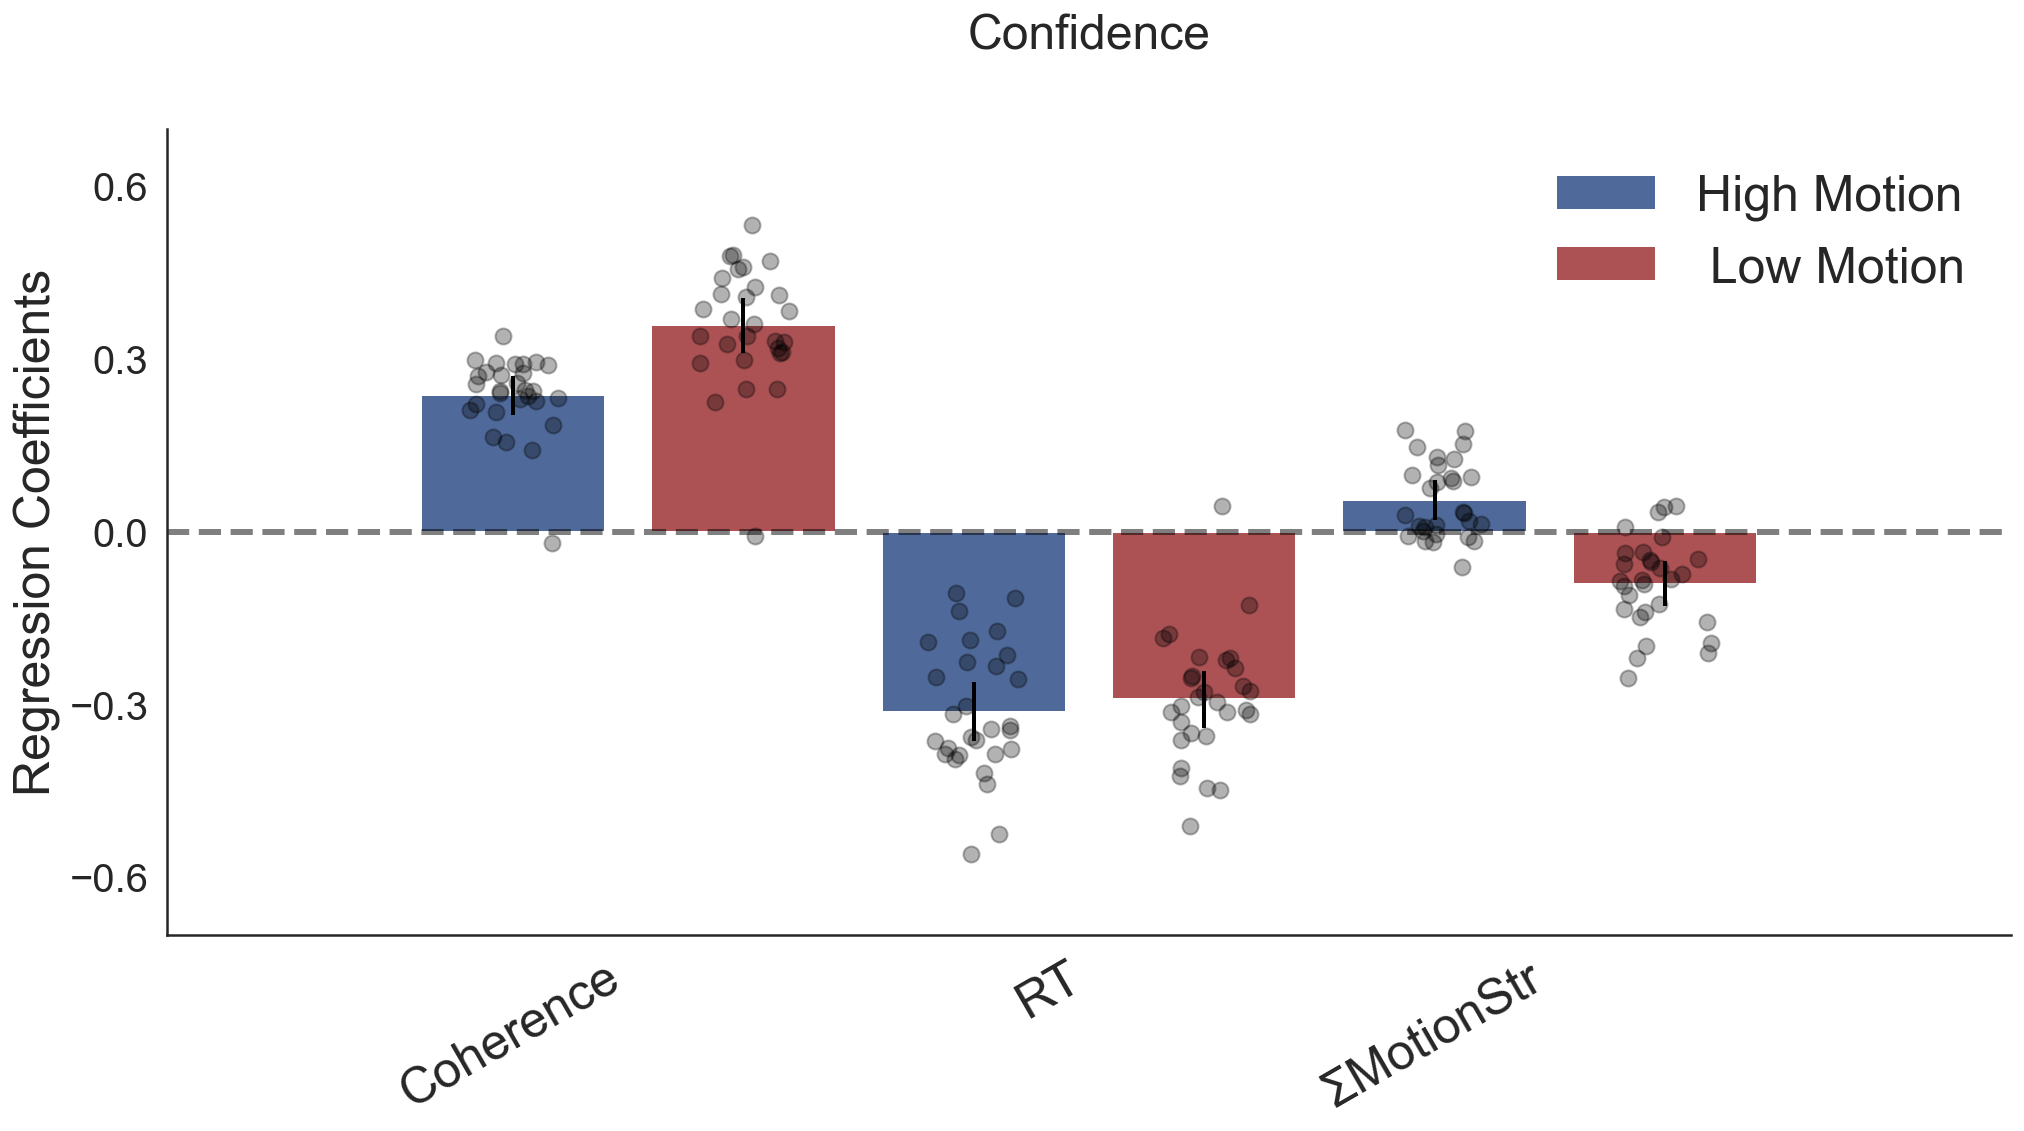

In [123]:
Coefpresplot_bar2(conf_table_Like, mix_Confidence_Like_model,conf_table_Dislike, mix_Confidence_Dislike_model, barcol1='#4F6A9A',barcol2='#AC5255', title='Confidence', size='big',ymultiple=0.3, ticklabsize=20, labels = ['High Motion', ' Low Motion'])

plt.xlim(0, 4)

ttestprint (conf_table_Like,conf_table_Dislike, mix_Confidence_Like_model,mix_Confidence_Dislike_model )

#plt.savefig(str('SavedFigures/FF2018ConfidenceRegressionLikeDislike_31.png'), dpi = 200 )

In [124]:
conf_table_Like

Inter     Coherence            RT  ΣMotionStr
coefficient   0.082683  2.379010e-01 -3.116296e-01    0.055463
se            0.022253  1.721366e-02  2.603305e-02    0.017739
t             3.715523  1.382048e+01 -1.197054e+01    3.126586
dfKR         27.988301  2.798830e+01  2.798830e+01   27.988301
SEmax         0.127190  2.723283e-01 -2.595635e-01    0.090941
SEmin         0.038176  2.034736e-01 -3.636957e-01    0.019985
pKR           0.000896  4.996004e-14  1.588063e-12    0.004099

/Users/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  


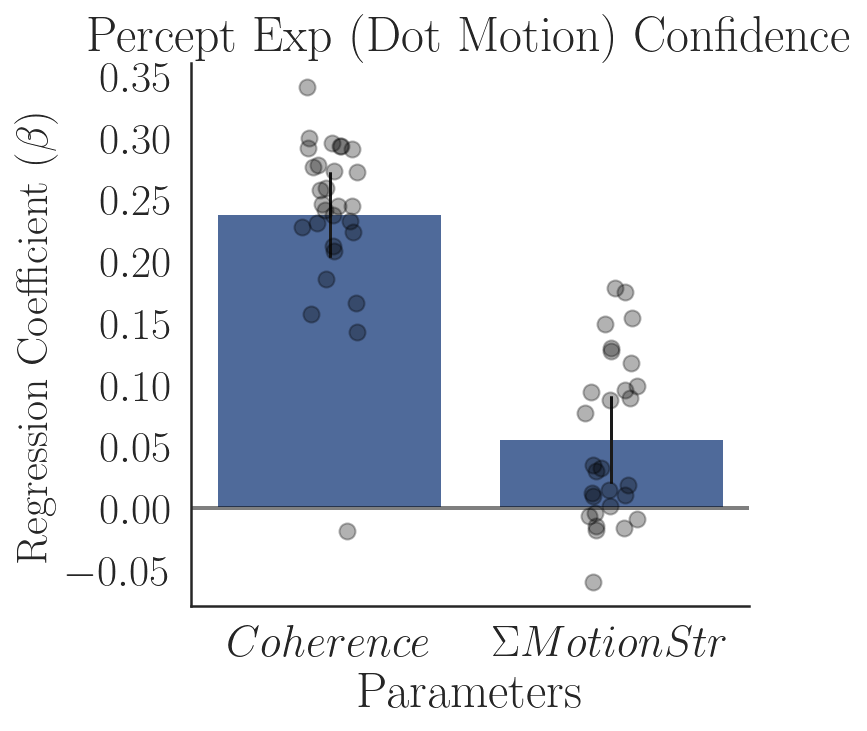

In [127]:
rc("font", family="serif", size=12)
rc("text", usetex=True)

regParam = [ conf_table_Like['Coherence'].coefficient , conf_table_Like['ΣMotionStr'].coefficient]
lowLim = [conf_table_Like['Coherence'].SEmin , conf_table_Like['ΣMotionStr'].SEmin]
highLim = [conf_table_Like['Coherence'].SEmax , conf_table_Like['ΣMotionStr'].SEmax]

plt.errorbar(range(len(regParam)),regParam, yerr= [(a - b)/2 for a, b in zip(lowLim, highLim)] , color='#000000',marker='',fmt='.', alpha=0.8, markersize=8 , label = 'Value');
plt.bar(range(len(regParam)),regParam, yerr=  [(a - b)/2 for a, b in zip(lowLim, highLim)], color='#4F6A9A');


position_parts_i = [0 , 1]
ii = 0
for i in [1,3]:
        # Plot dots condition 1
        
        part_coefs = mix_Confidence_Like_model[i]
        position_parts= np.full(len(part_coefs), position_parts_i[ii], dtype=int)
        jittr = np.random.uniform(low=-0.2,high=0.2,size=len(part_coefs))/2
        plt.plot(position_parts + jittr, part_coefs, marker='o', ms=8, color='#000000',alpha=0.3,linestyle="None")
        ii = ii + 1
        
plt.axhline(0, color='black', lw=2, alpha=0.5)

font_size = 25
font_size_l = 22

plt.xlabel("Parameters",fontsize = font_size)
plt.ylabel("Regression Coefficient ($\\beta$)",fontsize = font_size_l)
plt.title('Percept Exp (Dot Motion) Confidence',fontsize = font_size)
plt.xticks([0,1],[r'$Coherence$',r'$\Sigma MotionStr$'],fontsize = font_size_l)
plt.yticks(fontsize = font_size_l)
#plt.legend()
sns.despine()

plt.show()

/Users/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  """


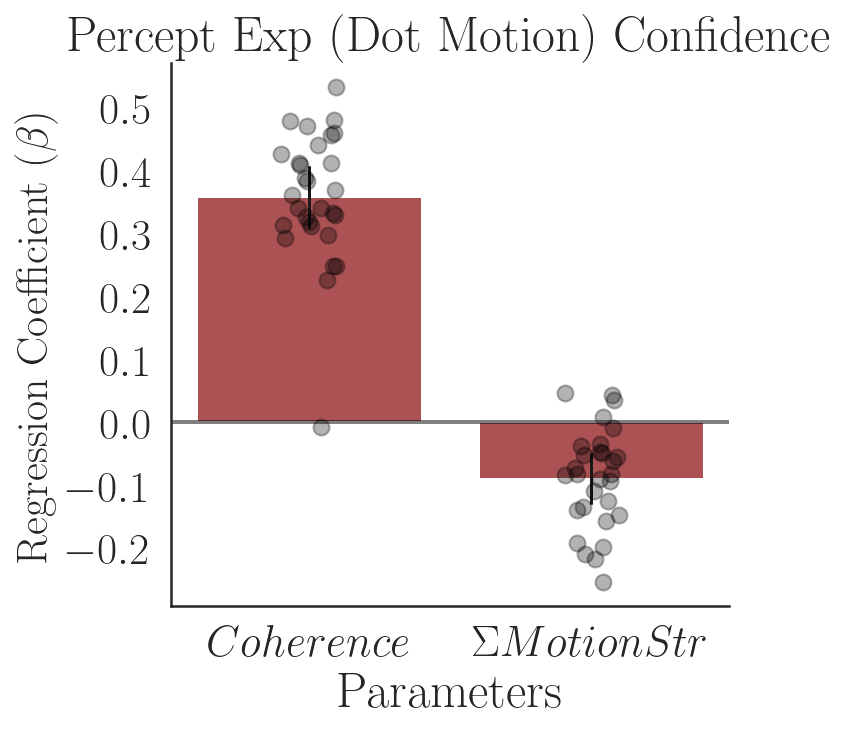

In [128]:

regParam = [ conf_table_Dislike['Coherence'].coefficient , conf_table_Dislike['ΣMotionStr'].coefficient]
lowLim = [conf_table_Dislike['Coherence'].SEmin , conf_table_Dislike['ΣMotionStr'].SEmin]
highLim = [conf_table_Dislike['Coherence'].SEmax , conf_table_Dislike['ΣMotionStr'].SEmax]

plt.errorbar(range(len(regParam)),regParam, yerr= [(a - b)/2 for a, b in zip(lowLim, highLim)] , color='#000000',marker='',fmt='.', alpha=0.8, markersize=8 , label = 'Value');
plt.bar(range(len(regParam)),regParam, yerr=  [(a - b)/2 for a, b in zip(lowLim, highLim)], color='#AC5255');


position_parts_i = [0 , 1]
ii = 0
for i in [1,3]:
        # Plot dots condition 1
        
        part_coefs = mix_Confidence_Dislike_model[i]
        position_parts= np.full(len(part_coefs), position_parts_i[ii], dtype=int)
        jittr = np.random.uniform(low=-0.2,high=0.2,size=len(part_coefs))/2
        plt.plot(position_parts + jittr, part_coefs, marker='o', ms=8, color='#000000',alpha=0.3,linestyle="None")
        ii = ii + 1
        
plt.axhline(0, color='black', lw=2, alpha=0.5)

font_size = 25
font_size_l = 22

plt.xlabel("Parameters",fontsize = font_size)
plt.ylabel("Regression Coefficient ($\\beta$)",fontsize = font_size_l)
plt.title('Percept Exp (Dot Motion) Confidence',fontsize = font_size)
plt.xticks([0,1],[r'$Coherence$',r'$\Sigma MotionStr$'],fontsize = font_size_l)
plt.yticks(fontsize = font_size_l)
#plt.legend()
sns.despine()

plt.show()

## Confidence ~ BehavioralParams + GSF

### Dislike condition model

In [294]:
%%R
# Fit the multilevel linear model


#if (file.exists('SavedModels/HModel_Confidence_Dislike_31_m1.rda')){
#    load('SavedModels/HModel_Confidence_Dislike_31_m1.rda')   
#    print('  Found old parameter estimates in "SavedModels/estimates". Skipping estimation...')
#}
#else{
    confidence_Dislike_hmodel <- lmer(zConfidence ~ zAbsDDot + zRT + zSumDot + (zAbsDDot + zRT + zSumDot| Part), data=data_exp1_DisLike, control=lmerControl(optimizer="optimx", optCtrl=list(method="nlminb")))
    #save(confidence_Dislike_hmodel, file = "SavedModels/HModel_Confidence_Dislike_31_m1.rda")
    display (confidence_Dislike_hmodel)
#}



lmer(formula = zConfidence ~ zAbsDDot + zRT + zSumDot + (zAbsDDot + 
    zRT + zSumDot | Part), data = data_exp1_DisLike, control = lmerControl(optimizer = "optimx", 
    optCtrl = list(method = "nlminb")))
            coef.est coef.se
(Intercept) -0.09     0.02  
zAbsDDot     0.38     0.02  
zRT         -0.31     0.02  
zSumDot     -0.26     0.02  

Error terms:
 Groups   Name        Std.Dev. Corr              
 Part     (Intercept) 0.11                       
          zAbsDDot    0.08     -0.70             
          zRT         0.11      0.36 -0.92       
          zSumDot     0.11      0.38 -0.61  0.59 
 Residual             0.87                       
---
number of obs: 6496, groups: Part, 29
AIC = 16801.7, DIC = 16723.8
deviance = 16747.7 


In [295]:
%%R

# Extract mixed effect paramters
mix_Confidence_Dislike_model <- coef(confidence_Dislike_hmodel)

## Estimating DFs and p-values
# get the coefficients for the best fitting model
coefs <- data.frame(coef(summary(confidence_Dislike_hmodel)))
coefs
# Use the Kenward-Roger approximation to get approximate degrees of freedom
df.KR <- get_ddf_Lb(confidence_Dislike_hmodel, fixef(confidence_Dislike_hmodel))
coefs$df.KR <-(rep(df.KR, each=4))

# Calculate confidence intervals from the estimates and the standard errors
coefs$semax <- coefs$Estimate + (coefs$Std..Error)
coefs$semin <- coefs$Estimate - (coefs$Std..Error)

# get p-values from the t-distribution using the t-values and approximated
# degrees of freedom
coefs$p.KR <- 2 * (1 - pt(abs(coefs$t.value), df.KR))

# use normal distribution to approximate p-value (tends to be anti-conservative with small sample sizes)
coefs$p.z <- 2 * (1 - pnorm(abs(coefs$t.value)))

In [296]:
%%R
summary(confidence_Dislike_hmodel)

Linear mixed model fit by REML ['lmerMod']
Formula: zConfidence ~ zAbsDDot + zRT + zSumDot + (zAbsDDot + zRT + zSumDot |  
    Part)
   Data: data_exp1_DisLike
Control: lmerControl(optimizer = "optimx", optCtrl = list(method = "nlminb"))

REML criterion at convergence: 16771.7

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-8.6275 -0.6414  0.1057  0.7266  3.4301 

Random effects:
 Groups   Name        Variance Std.Dev. Corr             
 Part     (Intercept) 0.012306 0.11093                   
          zAbsDDot    0.005665 0.07527  -0.70            
          zRT         0.012850 0.11336   0.36 -0.92      
          zSumDot     0.011375 0.10665   0.38 -0.61  0.59
 Residual             0.756099 0.86954                   
Number of obs: 6496, groups:  Part, 29

Fixed effects:
            Estimate Std. Error t value
(Intercept) -0.08591    0.02332  -3.684
zAbsDDot     0.37602    0.01925  19.531
zRT         -0.31367    0.02394 -13.101
zSumDot     -0.26368    0.02342 -11.261


In [297]:
#%%R 
#coef(confidence_Dislike_hmodel)

In [298]:
%%R
z_values =coefs[1]/coefs[2]
z_values

              Estimate
(Intercept)  -3.683514
zAbsDDot     19.531099
zRT         -13.101347
zSumDot     -11.260760


In [299]:
%R -o coefs -o mix_Confidence_Dislike_model
# extract
mix_Confidence_Dislike_model = mix_Confidence_Dislike_model[0]

conf_table_exp1 = coefs
conf_table_exp1

Estimate  Std..Error    t.value      df.KR     semax     semin  \
0 -0.085910    0.023323  -3.683514  27.998883 -0.062587 -0.109232   
1  0.376025    0.019253  19.531099  27.998883  0.395277  0.356772   
2 -0.313669    0.023942 -13.101347  27.998883 -0.289727 -0.337611   
3 -0.263680    0.023416 -11.260760  27.998883 -0.240264 -0.287095   

           p.KR      p.z  
0  9.750512e-04  0.00023  
1  0.000000e+00  0.00000  
2  1.827427e-13  0.00000  
3  6.578293e-12  0.00000

In [300]:
mix_Confidence_Dislike_model

R object with classes: ('data.frame',) mapped to:
<DataFrame - Python:0x7ff149493e88 / R:0x7ff114a21e18>
[FloatVector, FloatVector, FloatVector, FloatVector]
  (Intercept): <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x7ff149493cc8 / R:0x7ff0d6644940>
[-0.142747, -0.235350, 0.006138, -0.055932, ..., -0.180431, -0.024435, -0.122720, -0.085864]
  zAbsDDot: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x7ff17976b9c8 / R:0x7ff0d6644a60>
[0.438470, 0.438199, 0.388521, 0.425251, ..., 0.378551, 0.321851, 0.410732, 0.422836]
  zRT: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x7ff17976b708 / R:0x7ff0d6644b80>
[-0.404536, -0.351361, -0.390646, -0.427813, ..., -0.264919, -0.241753, -0.361207, -0.406034]
  zSumDot: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x7ff13c3b00c8 / R:0x7ff0d6644ca0>
[-0.339115, -0.400392, -0.222788, -0.421802, ..., -0.213342, -0.305521, -0.367208, -0.328502]

In [301]:
#conf_table_exp1 = conf_table_exp1.T
conf_table_exp1

Estimate  Std..Error    t.value      df.KR     semax     semin  \
0 -0.085910    0.023323  -3.683514  27.998883 -0.062587 -0.109232   
1  0.376025    0.019253  19.531099  27.998883  0.395277  0.356772   
2 -0.313669    0.023942 -13.101347  27.998883 -0.289727 -0.337611   
3 -0.263680    0.023416 -11.260760  27.998883 -0.240264 -0.287095   

           p.KR      p.z  
0  9.750512e-04  0.00023  
1  0.000000e+00  0.00000  
2  1.827427e-13  0.00000  
3  6.578293e-12  0.00000

In [302]:
#Generate table with paramters to later plot
conf_table_exp1.columns = ['coefficient', 'se', 't', "dfKR", "SEmax","SEmin","pKR","pz" ]
conf_table_exp1 = conf_table_exp1.iloc[:, 0:-1].copy(); conf_table_exp1.loc[:, 'SEmax'] = conf_table_exp1['coefficient'] + conf_table_exp1['se']*2
conf_table_exp1.loc[:, 'SEmin'] = conf_table_exp1['coefficient'] - conf_table_exp1['se']*2
conf_table_exp1 = conf_table_exp1.transpose()


In [303]:
conf_table_exp1.columns = [ 'Inter','|ΔValue|', 'RT', 'ΣValue']
#conf_table_exp1.loc['p'] = np.round(conf_table_exp1.loc['p'], 4)
conf_table_exp1 = conf_table_exp1[['Inter','|ΔValue|', 'RT', 'ΣValue']]
conf_table_Dislike = conf_table_exp1

conf_table_Dislike

Inter   |ΔValue|            RT        ΣValue
coefficient  -0.085910   0.376025 -3.136689e-01 -2.636796e-01
se            0.023323   0.019253  2.394173e-02  2.341579e-02
t            -3.683514  19.531099 -1.310135e+01 -1.126076e+01
dfKR         27.998883  27.998883  2.799888e+01  2.799888e+01
SEmax        -0.039264   0.414530 -2.657854e-01 -2.168480e-01
SEmin        -0.132555   0.337520 -3.615524e-01 -3.105112e-01
pKR           0.000975   0.000000  1.827427e-13  6.578293e-12

### Like Condition

In [304]:
%%R
# Fit the multilevel linear model
#if (file.exists('SavedModels/HModel_Confidence_Like_31_m1.rda')){
#    print('  Found old parameter estimates in "SavedModels". Skipping estimation...')
#    load('SavedModels/HModel_Confidence_Like_31_m1.rda')   
#}
#else{
confidence_Like_hmodel <- lmer(zConfidence ~ zAbsDDot + zRT + zSumDot + (zAbsDDot + zRT + zSumDot| Part), data=data_exp1_Like, control=lmerControl(optimizer="optimx", optCtrl=list(method="nlminb")))
display (confidence_Like_hmodel)
#save(confidence_Like_hmodel, file = "SavedModels/HModel_Confidence_Like_31_m1.rda")
#}

lmer(formula = zConfidence ~ zAbsDDot + zRT + zSumDot + (zAbsDDot + 
    zRT + zSumDot | Part), data = data_exp1_Like, control = lmerControl(optimizer = "optimx", 
    optCtrl = list(method = "nlminb")))
            coef.est coef.se
(Intercept)  0.08     0.02  
zAbsDDot     0.24     0.02  
zRT         -0.32     0.03  
zSumDot     -0.06     0.02  

Error terms:
 Groups   Name        Std.Dev. Corr              
 Part     (Intercept) 0.12                       
          zAbsDDot    0.10      0.28             
          zRT         0.13     -0.05 -0.26       
          zSumDot     0.08      0.12 -0.34  0.23 
 Residual             0.79                       
---
number of obs: 6496, groups: Part, 29
AIC = 15660.3, DIC = 15583.7
deviance = 15607.0 


In [305]:
%%R

# Extract mixed effect paramters
mix_Confidence_Like_model <- coef(confidence_Like_hmodel)

## Estimating DFs and p-values
# get the coefficients for the best fitting model
coefs <- data.frame(coef(summary(confidence_Like_hmodel)))
coefs
# Use the Kenward-Roger approximation to get approximate degrees of freedom
df.KR <- get_ddf_Lb(confidence_Like_hmodel, fixef(confidence_Like_hmodel))
coefs$df.KR <-(rep(df.KR, each=4))

# Calculate confidence intervals from the estimates and the standard errors
coefs$semax <- coefs$Estimate + (coefs$Std..Error)
coefs$semin <- coefs$Estimate - (coefs$Std..Error)

# get p-values from the t-distribution using the t-values and approximated
# degrees of freedom
coefs$p.KR <- 2 * (1 - pt(abs(coefs$t.value), df.KR))

# use normal distribution to approximate p-value (tends to be anti-conservative with small sample sizes)
coefs$p.z <- 2 * (1 - pnorm(abs(coefs$t.value)))

In [306]:
%%R
summary(confidence_Like_hmodel)

Linear mixed model fit by REML ['lmerMod']
Formula: zConfidence ~ zAbsDDot + zRT + zSumDot + (zAbsDDot + zRT + zSumDot |  
    Part)
   Data: data_exp1_Like
Control: lmerControl(optimizer = "optimx", optCtrl = list(method = "nlminb"))

REML criterion at convergence: 15630.3

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-7.1809 -0.6013  0.1085  0.6921  2.8685 

Random effects:
 Groups   Name        Variance Std.Dev. Corr             
 Part     (Intercept) 0.014358 0.11982                   
          zAbsDDot    0.009522 0.09758   0.28            
          zRT         0.015914 0.12615  -0.05 -0.26      
          zSumDot     0.006794 0.08243   0.12 -0.34  0.23
 Residual             0.630789 0.79422                   
Number of obs: 6496, groups:  Part, 29

Fixed effects:
            Estimate Std. Error t value
(Intercept)  0.08144    0.02443   3.334
zAbsDDot     0.23986    0.02165  11.080
zRT         -0.32234    0.02604 -12.380
zSumDot     -0.05639    0.01904  -2.962

Co

In [307]:
%%R
coefs

               Estimate Std..Error    t.value    df.KR       semax       semin
(Intercept)  0.08143960 0.02442721   3.333971 27.98861  0.10586681  0.05701240
zAbsDDot     0.23985840 0.02164823  11.079814 27.98861  0.26150663  0.21821016
zRT         -0.32234045 0.02603722 -12.379987 27.98861 -0.29630323 -0.34837767
zSumDot     -0.05639097 0.01903506  -2.962479 27.98861 -0.03735591 -0.07542603
                    p.KR         p.z
(Intercept) 2.421357e-03 0.000856155
zAbsDDot    9.598100e-12 0.000000000
zRT         7.158718e-13 0.000000000
zSumDot     6.163963e-03 0.003051728


In [308]:
%%R

z_values =coefs[1]/coefs[2]
z_values

              Estimate
(Intercept)   3.333971
zAbsDDot     11.079814
zRT         -12.379987
zSumDot      -2.962479


In [309]:
%R -o coefs -o mix_Confidence_Like_model

mix_Confidence_Like_model = mix_Confidence_Like_model[0]

conf_table_exp1 = coefs
conf_table_exp1

Estimate  Std..Error    t.value      df.KR     semax     semin  \
0  0.081440    0.024427   3.333971  27.988614  0.105867  0.057012   
1  0.239858    0.021648  11.079814  27.988614  0.261507  0.218210   
2 -0.322340    0.026037 -12.379987  27.988614 -0.296303 -0.348378   
3 -0.056391    0.019035  -2.962479  27.988614 -0.037356 -0.075426   

           p.KR       p.z  
0  2.421357e-03  0.000856  
1  9.598100e-12  0.000000  
2  7.158718e-13  0.000000  
3  6.163963e-03  0.003052

In [310]:
conf_table_exp1

Estimate  Std..Error    t.value      df.KR     semax     semin  \
0  0.081440    0.024427   3.333971  27.988614  0.105867  0.057012   
1  0.239858    0.021648  11.079814  27.988614  0.261507  0.218210   
2 -0.322340    0.026037 -12.379987  27.988614 -0.296303 -0.348378   
3 -0.056391    0.019035  -2.962479  27.988614 -0.037356 -0.075426   

           p.KR       p.z  
0  2.421357e-03  0.000856  
1  9.598100e-12  0.000000  
2  7.158718e-13  0.000000  
3  6.163963e-03  0.003052

In [311]:
#Generate table with paramters to later plot
conf_table_exp1.columns = ['coefficient', 'se', 't', "dfKR", "SEmax","SEmin","pKR","pz" ]
conf_table_exp1 = conf_table_exp1.iloc[:, 0:-1].copy(); conf_table_exp1.loc[:, 'SEmax'] = conf_table_exp1['coefficient'] + conf_table_exp1['se']*2
conf_table_exp1.loc[:, 'SEmin'] = conf_table_exp1['coefficient'] - conf_table_exp1['se']*2
conf_table_exp1 = conf_table_exp1.transpose()


In [312]:
conf_table_exp1.columns = [ "Inter",'|ΔValue|', 'RT', 'ΣValue']
#conf_table_exp1.loc['p'] = np.round(conf_table_exp1.loc['p'], 4)
conf_table_exp1 = conf_table_exp1[["Inter",'|ΔValue|','RT', 'ΣValue']]
conf_table_Like = conf_table_exp1
conf_table_Like

Inter      |ΔValue|            RT     ΣValue
coefficient   0.081440  2.398584e-01 -3.223404e-01  -0.056391
se            0.024427  2.164823e-02  2.603722e-02   0.019035
t             3.333971  1.107981e+01 -1.237999e+01  -2.962479
dfKR         27.988614  2.798861e+01  2.798861e+01  27.988614
SEmax         0.130294  2.831549e-01 -2.702660e-01  -0.018321
SEmin         0.032585  1.965619e-01 -3.744149e-01  -0.094461
pKR           0.002421  9.598100e-12  7.158718e-13   0.006164

### Plotting both conditions

Mismatch
---------------- SIGNIFICANT FACTOR ----------------------
Inter : MeanL = 0.08; t =  4.00938 ; p-value =0.00041***
Inter : MeanD = -0.09; t =  -4.6741 ; p-value =7e-05***
|ΔValue| : MeanL = 0.24; t =  15.52677 ; p-value =0.0***
|ΔValue| : MeanD = 0.38; t =  28.38241 ; p-value =0.0***
RT : MeanL = -0.32; t =  -15.16814 ; p-value =0.0***
RT : MeanD = -0.31; t =  -16.04741 ; p-value =0.0***
ΣValue : MeanL = -0.06; t =  -4.53493 ; p-value =0.0001***
ΣValue : MeanD = -0.26; t =  -15.0586 ; p-value =0.0***
---------------- COMPARE [ LIKE - DISLIKE ] ----------------------
Inter : MeanL = 0.08; MeanD = -0.08591; [Like - Dislike] =  0.0; t =  4.34296 ; p-value =0.00017***
|ΔValue| : MeanL = 0.24; MeanD = 0.37602; [Like - Dislike] =  -0.0; t =  -10.62997 ; p-value =0.0***
RT : MeanL = -0.32; MeanD = -0.31; [Like - Dislike] =  -0.0; t =  -0.416 ; p-value =0.681
ΣValue : MeanL = -0.06; MeanD = -0.26368; [Like - Dislike] =  0.0; t =  11.05368 ; p-value =0.0***
---------------- MAGNITUDE 

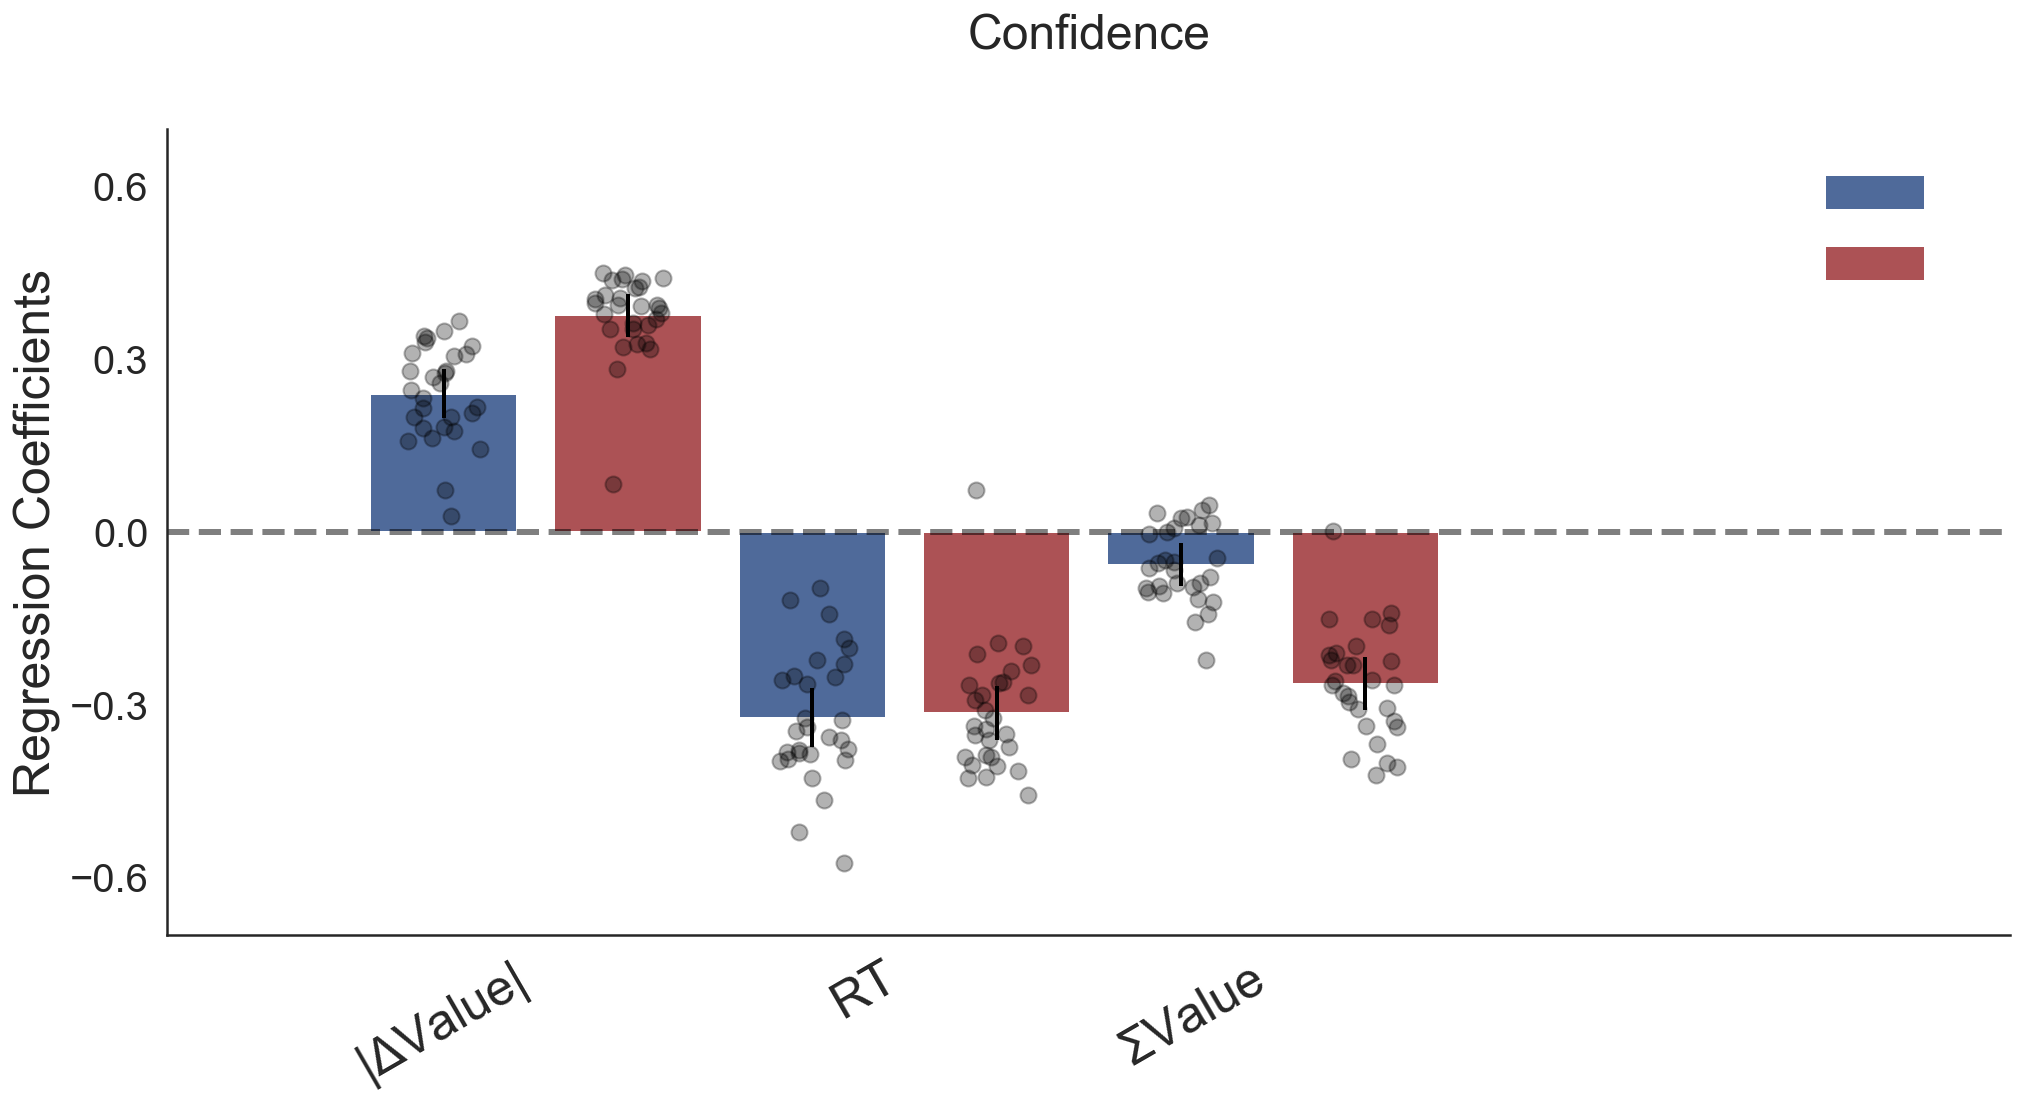

In [313]:
Coefpresplot_bar2(conf_table_Like, mix_Confidence_Like_model,conf_table_Dislike, mix_Confidence_Dislike_model, barcol1='#4F6A9A',barcol2='#AC5255', title='Confidence', size='big',ymultiple=0.3, ticklabsize=20)
plt.xlim(0, 5)

ttestprint (conf_table_Like,conf_table_Dislike, mix_Confidence_Like_model,mix_Confidence_Dislike_model )

#plt.savefig(str('SavedFigures/FF2018ConfidenceRegressionLikeDislike_31.png'), dpi = 200 )


## Confidence ~ BehavioralParams (Chosen and Unchosen separated)

### Dislike condition model

In [153]:
%%R
# Fit the multilevel linear model


#if (file.exists('SavedModels/HModel_Confidence_Dislike_31_m1.rda')){
#    load('SavedModels/HModel_Confidence_Dislike_31_m1.rda')   
#    print('  Found old parameter estimates in "SavedModels/estimates". Skipping estimation...')
#}
#else{
    confidence_Dislike_hmodel <- lmer(zConfidence ~  zRT + zChosenDots + zUnchosenDots + (zRT + zChosenDots + zUnchosenDots| Part), data=data_exp1_DisLike, control=lmerControl(optimizer="optimx", optCtrl=list(method="nlminb")))
    #save(confidence_Dislike_hmodel, file = "SavedModels/HModel_Confidence_Dislike_31_m1.rda")
    display (confidence_Dislike_hmodel)
#}



lmer(formula = zConfidence ~ zRT + zChosenDots + zUnchosenDots + 
    (zRT + zChosenDots + zUnchosenDots | Part), data = data_exp1_DisLike, 
    control = lmerControl(optimizer = "optimx", optCtrl = list(method = "nlminb")))
              coef.est coef.se
(Intercept)   -0.37     0.03  
zRT           -0.30     0.02  
zChosenDots   -0.52     0.03  
zUnchosenDots  0.21     0.02  

Error terms:
 Groups   Name          Std.Dev. Corr              
 Part     (Intercept)   0.16                       
          zRT           0.11      0.52             
          zChosenDots   0.16      0.74  0.48       
          zUnchosenDots 0.07     -0.55 -0.34 -0.35 
 Residual               0.86                       
---
number of obs: 6496, groups: Part, 29
AIC = 16613.5, DIC = 16537.5
deviance = 16560.5 


In [154]:
%%R

# Extract mixed effect paramters
mix_Confidence_Dislike_model <- coef(confidence_Dislike_hmodel)

## Estimating DFs and p-values
# get the coefficients for the best fitting model
coefs <- data.frame(coef(summary(confidence_Dislike_hmodel)))
coefs
# Use the Kenward-Roger approximation to get approximate degrees of freedom
df.KR <- get_ddf_Lb(confidence_Dislike_hmodel, fixef(confidence_Dislike_hmodel))
coefs$df.KR <-(rep(df.KR, each=4))

# Calculate confidence intervals from the estimates and the standard errors
coefs$semax <- coefs$Estimate + (coefs$Std..Error)
coefs$semin <- coefs$Estimate - (coefs$Std..Error)

# get p-values from the t-distribution using the t-values and approximated
# degrees of freedom
coefs$p.KR <- 2 * (1 - pt(abs(coefs$t.value), df.KR))

# use normal distribution to approximate p-value (tends to be anti-conservative with small sample sizes)
coefs$p.z <- 2 * (1 - pnorm(abs(coefs$t.value)))

In [155]:
%%R
summary(confidence_Dislike_hmodel)

Linear mixed model fit by REML ['lmerMod']
Formula: 
zConfidence ~ zRT + zChosenDots + zUnchosenDots + (zRT + zChosenDots +  
    zUnchosenDots | Part)
   Data: data_exp1_DisLike
Control: lmerControl(optimizer = "optimx", optCtrl = list(method = "nlminb"))

REML criterion at convergence: 16583.5

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-8.6818 -0.6552  0.0976  0.7279  3.1473 

Random effects:
 Groups   Name          Variance Std.Dev. Corr             
 Part     (Intercept)   0.025880 0.16087                   
          zRT           0.012938 0.11375   0.52            
          zChosenDots   0.027055 0.16448   0.74  0.48      
          zUnchosenDots 0.004933 0.07023  -0.55 -0.34 -0.35
 Residual               0.731970 0.85555                   
Number of obs: 6496, groups:  Part, 29

Fixed effects:
              Estimate Std. Error t value
(Intercept)   -0.37296    0.03312  -11.26
zRT           -0.29728    0.02396  -12.41
zChosenDots   -0.52101    0.03453  -15.09
z

In [156]:
#%%R 
#coef(confidence_Dislike_hmodel)

In [157]:
%%R
z_values =coefs[1]/coefs[2]
z_values

               Estimate
(Intercept)   -11.26095
zRT           -12.40736
zChosenDots   -15.09076
zUnchosenDots  12.23559


In [158]:
%R -o coefs -o mix_Confidence_Dislike_model
# extract
mix_Confidence_Dislike_model = mix_Confidence_Dislike_model[0]

conf_table_exp1 = coefs
conf_table_exp1

Estimate  Std..Error    t.value      df.KR     semax     semin  \
0 -0.372964    0.033120 -11.260949  27.968335 -0.339844 -0.406084   
1 -0.297281    0.023960 -12.407360  27.968335 -0.273321 -0.321241   
2 -0.521013    0.034525 -15.090760  27.968335 -0.486488 -0.555539   
3  0.208622    0.017050  12.235590  27.968335  0.225673  0.191572   

           p.KR  p.z  
0  6.668888e-12  0.0  
1  6.863399e-13  0.0  
2  5.773160e-15  0.0  
3  9.559020e-13  0.0

In [159]:
mix_Confidence_Dislike_model

R object with classes: ('data.frame',) mapped to:
<DataFrame - Python:0x7fe143e4ef08 / R:0x7fddf3280448>
[FloatVector, FloatVector, FloatVector, FloatVector]
  (Intercept): <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x7fe161fe6f48 / R:0x7fe0ef94a3a0>
[-0.474555, -0.478659, -0.289848, -0.394162, ..., -0.427981, -0.275465, -0.482386, -0.317215]
  zRT: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x7fe143e4ad08 / R:0x7fe0ef9a55a0>
[-0.382804, -0.332452, -0.404409, -0.405578, ..., -0.292533, -0.220035, -0.302673, -0.387585]
  zChosenDots: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x7fe143e4ae48 / R:0x7fe0ef923e20>
[-0.614672, -0.545693, -0.477781, -0.663617, ..., -0.423277, -0.509612, -0.692673, -0.506554]
  zUnchosenDots: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x7fe143e4ad48 / R:0x7fe0ef9472a0>
[0.205495, 0.146366, 0.227979, 0.154419, ..., 0.220301, 0.130897, 0.208769, 0.179586]

In [160]:
#conf_table_exp1 = conf_table_exp1.T
conf_table_exp1

Estimate  Std..Error    t.value      df.KR     semax     semin  \
0 -0.372964    0.033120 -11.260949  27.968335 -0.339844 -0.406084   
1 -0.297281    0.023960 -12.407360  27.968335 -0.273321 -0.321241   
2 -0.521013    0.034525 -15.090760  27.968335 -0.486488 -0.555539   
3  0.208622    0.017050  12.235590  27.968335  0.225673  0.191572   

           p.KR  p.z  
0  6.668888e-12  0.0  
1  6.863399e-13  0.0  
2  5.773160e-15  0.0  
3  9.559020e-13  0.0

In [161]:
#Generate table with paramters to later plot
conf_table_exp1.columns = ['coefficient', 'se', 't', "dfKR", "SEmax","SEmin","pKR","pz" ]
conf_table_exp1 = conf_table_exp1.iloc[:, 0:-1].copy(); conf_table_exp1.loc[:, 'SEmax'] = conf_table_exp1['coefficient'] + conf_table_exp1['se']*2
conf_table_exp1.loc[:, 'SEmin'] = conf_table_exp1['coefficient'] - conf_table_exp1['se']*2
conf_table_exp1 = conf_table_exp1.transpose()


In [162]:
conf_table_exp1.columns = [ 'Inter', 'RT', 'ChoMotionStr', 'UnchoMotionStr']
#conf_table_exp1.loc['p'] = np.round(conf_table_exp1.loc['p'], 4)
conf_table_exp1 = conf_table_exp1[['Inter', 'RT', 'ChoMotionStr', 'UnchoMotionStr']]
conf_table_Dislike = conf_table_exp1

conf_table_Dislike

Inter            RT  ChoMotionStr  UnchoMotionStr
coefficient -3.729639e-01 -2.972807e-01 -5.210133e-01    2.086223e-01
se           3.312011e-02  2.396003e-02  3.452532e-02    1.705045e-02
t           -1.126095e+01 -1.240736e+01 -1.509076e+01    1.223559e+01
dfKR         2.796833e+01  2.796833e+01  2.796833e+01    2.796833e+01
SEmax       -3.067237e-01 -2.493606e-01 -4.519627e-01    2.427232e-01
SEmin       -4.392041e-01 -3.452007e-01 -5.900640e-01    1.745214e-01
pKR          6.668888e-12  6.863399e-13  5.773160e-15    9.559020e-13

### Like Condition

In [163]:
%%R
# Fit the multilevel linear model
#if (file.exists('SavedModels/HModel_Confidence_Like_31_m1.rda')){
#    print('  Found old parameter estimates in "SavedModels". Skipping estimation...')
#    load('SavedModels/HModel_Confidence_Like_31_m1.rda')   
#}
#else{
confidence_Like_hmodel <- lmer(zConfidence ~ zRT + zChosenDots + zUnchosenDots + (zRT + zChosenDots + zUnchosenDots| Part), data=data_exp1_Like, control=lmerControl(optimizer="optimx", optCtrl=list(method="nlminb")))
display (confidence_Like_hmodel)
#save(confidence_Like_hmodel, file = "SavedModels/HModel_Confidence_Like_31_m1.rda")
#}

lmer(formula = zConfidence ~ zRT + zChosenDots + zUnchosenDots + 
    (zRT + zChosenDots + zUnchosenDots | Part), data = data_exp1_Like, 
    control = lmerControl(optimizer = "optimx", optCtrl = list(method = "nlminb")))
              coef.est coef.se
(Intercept)   -0.11     0.03  
zRT           -0.31     0.03  
zChosenDots    0.22     0.02  
zUnchosenDots -0.28     0.03  

Error terms:
 Groups   Name          Std.Dev. Corr              
 Part     (Intercept)   0.13                       
          zRT           0.13      0.09             
          zChosenDots   0.09     -0.05  0.01       
          zUnchosenDots 0.12      0.40  0.19 -0.42 
 Residual               0.78                       
---
number of obs: 6496, groups: Part, 29
AIC = 15504.7, DIC = 15429
deviance = 15451.9 


In [164]:
%%R

# Extract mixed effect paramters
mix_Confidence_Like_model <- coef(confidence_Like_hmodel)

## Estimating DFs and p-values
# get the coefficients for the best fitting model
coefs <- data.frame(coef(summary(confidence_Like_hmodel)))
coefs
# Use the Kenward-Roger approximation to get approximate degrees of freedom
df.KR <- get_ddf_Lb(confidence_Like_hmodel, fixef(confidence_Like_hmodel))
coefs$df.KR <-(rep(df.KR, each=4))

# Calculate confidence intervals from the estimates and the standard errors
coefs$semax <- coefs$Estimate + (coefs$Std..Error)
coefs$semin <- coefs$Estimate - (coefs$Std..Error)

# get p-values from the t-distribution using the t-values and approximated
# degrees of freedom
coefs$p.KR <- 2 * (1 - pt(abs(coefs$t.value), df.KR))

# use normal distribution to approximate p-value (tends to be anti-conservative with small sample sizes)
coefs$p.z <- 2 * (1 - pnorm(abs(coefs$t.value)))

In [165]:
%%R
summary(confidence_Like_hmodel)

Linear mixed model fit by REML ['lmerMod']
Formula: 
zConfidence ~ zRT + zChosenDots + zUnchosenDots + (zRT + zChosenDots +  
    zUnchosenDots | Part)
   Data: data_exp1_Like
Control: lmerControl(optimizer = "optimx", optCtrl = list(method = "nlminb"))

REML criterion at convergence: 15474.7

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-7.2284 -0.6101  0.0973  0.6908  2.8471 

Random effects:
 Groups   Name          Variance Std.Dev. Corr             
 Part     (Intercept)   0.016247 0.12746                   
          zRT           0.016283 0.12761   0.09            
          zChosenDots   0.007852 0.08861  -0.05  0.01      
          zUnchosenDots 0.013483 0.11612   0.40  0.19 -0.42
 Residual               0.615278 0.78440                   
Number of obs: 6496, groups:  Part, 29

Fixed effects:
              Estimate Std. Error t value
(Intercept)   -0.11320    0.02676   -4.23
zRT           -0.30815    0.02624  -11.74
zChosenDots    0.22158    0.01929   11.49
zUnc

In [166]:
%%R
coefs

                Estimate Std..Error    t.value    df.KR       semax      semin
(Intercept)   -0.1131994 0.02676384  -4.229565 27.98314 -0.08643556 -0.1399632
zRT           -0.3081489 0.02623628 -11.745142 27.98314 -0.28191257 -0.3343851
zChosenDots    0.2215765 0.01928820  11.487670 27.98314  0.24086471  0.2022883
zUnchosenDots -0.2788584 0.02600572 -10.722963 27.98314 -0.25285264 -0.3048641
                      p.KR          p.z
(Intercept)   2.266412e-04 2.341433e-05
zRT           2.488232e-12 0.000000e+00
zChosenDots   4.173550e-12 0.000000e+00
zUnchosenDots 2.031220e-11 0.000000e+00


In [167]:
%%R

z_values =coefs[1]/coefs[2]
z_values

                Estimate
(Intercept)    -4.229565
zRT           -11.745142
zChosenDots    11.487670
zUnchosenDots -10.722963


In [168]:
%R -o coefs -o mix_Confidence_Like_model

mix_Confidence_Like_model = mix_Confidence_Like_model[0]

conf_table_exp1 = coefs
conf_table_exp1

Estimate  Std..Error    t.value      df.KR     semax     semin  \
0 -0.113199    0.026764  -4.229565  27.983137 -0.086436 -0.139963   
1 -0.308149    0.026236 -11.745142  27.983137 -0.281913 -0.334385   
2  0.221577    0.019288  11.487670  27.983137  0.240865  0.202288   
3 -0.278858    0.026006 -10.722963  27.983137 -0.252853 -0.304864   

           p.KR       p.z  
0  2.266412e-04  0.000023  
1  2.488232e-12  0.000000  
2  4.173550e-12  0.000000  
3  2.031220e-11  0.000000

In [169]:
conf_table_exp1

Estimate  Std..Error    t.value      df.KR     semax     semin  \
0 -0.113199    0.026764  -4.229565  27.983137 -0.086436 -0.139963   
1 -0.308149    0.026236 -11.745142  27.983137 -0.281913 -0.334385   
2  0.221577    0.019288  11.487670  27.983137  0.240865  0.202288   
3 -0.278858    0.026006 -10.722963  27.983137 -0.252853 -0.304864   

           p.KR       p.z  
0  2.266412e-04  0.000023  
1  2.488232e-12  0.000000  
2  4.173550e-12  0.000000  
3  2.031220e-11  0.000000

In [170]:
#Generate table with paramters to later plot
conf_table_exp1.columns = ['coefficient', 'se', 't', "dfKR", "SEmax","SEmin","pKR","pz" ]
conf_table_exp1 = conf_table_exp1.iloc[:, 0:-1].copy(); conf_table_exp1.loc[:, 'SEmax'] = conf_table_exp1['coefficient'] + conf_table_exp1['se']*2
conf_table_exp1.loc[:, 'SEmin'] = conf_table_exp1['coefficient'] - conf_table_exp1['se']*2
conf_table_exp1 = conf_table_exp1.transpose()


In [171]:
conf_table_exp1.columns = [ 'Inter', 'RT', 'ChoMotionStr', 'UnchoMotionStr']
#conf_table_exp1.loc['p'] = np.round(conf_table_exp1.loc['p'], 4)
conf_table_exp1 = conf_table_exp1[['Inter', 'RT', 'ChoMotionStr', 'UnchoMotionStr']]
conf_table_Like = conf_table_exp1
conf_table_Like

Inter            RT  ChoMotionStr  UnchoMotionStr
coefficient  -0.113199 -3.081489e-01  2.215765e-01   -2.788584e-01
se            0.026764  2.623628e-02  1.928820e-02    2.600572e-02
t            -4.229565 -1.174514e+01  1.148767e+01   -1.072296e+01
dfKR         27.983137  2.798314e+01  2.798314e+01    2.798314e+01
SEmax        -0.059672 -2.556763e-01  2.601529e-01   -2.268469e-01
SEmin        -0.166727 -3.606214e-01  1.830001e-01   -3.308698e-01
pKR           0.000227  2.488232e-12  4.173550e-12    2.031220e-11

### Plotting both conditions

Mismatch
---------------- SIGNIFICANT FACTOR ----------------------
Inter : MeanL = -0.11; t =  -5.37591 ; p-value =1e-05***
Inter : MeanD = -0.37; t =  -13.61424 ; p-value =0.0***
RT : MeanL = -0.31; t =  -14.3231 ; p-value =0.0***
RT : MeanD = -0.3; t =  -15.57607 ; p-value =0.0***
ChoMotionStr : MeanL = 0.22; t =  15.67187 ; p-value =0.0***
ChoMotionStr : MeanD = -0.52; t =  -18.87734 ; p-value =0.0***
UnchoMotionStr : MeanL = -0.28; t =  -15.44532 ; p-value =0.0***
UnchoMotionStr : MeanD = 0.21; t =  20.18838 ; p-value =0.0***
---------------- COMPARE [ LIKE - DISLIKE ] ----------------------
Inter : MeanL = -0.11; MeanD = -0.37296; [Like - Dislike] =  0.0; t =  6.22422 ; p-value =0.0***
RT : MeanL = -0.31; MeanD = -0.3; [Like - Dislike] =  -0.0; t =  -0.522 ; p-value =0.606
ChoMotionStr : MeanL = 0.22; MeanD = -0.52101; [Like - Dislike] =  1.0; t =  21.8463 ; p-value =0.0***
UnchoMotionStr : MeanL = -0.28; MeanD = 0.20862; [Like - Dislike] =  -0.0; t =  -18.76186 ; p-value =0.0***

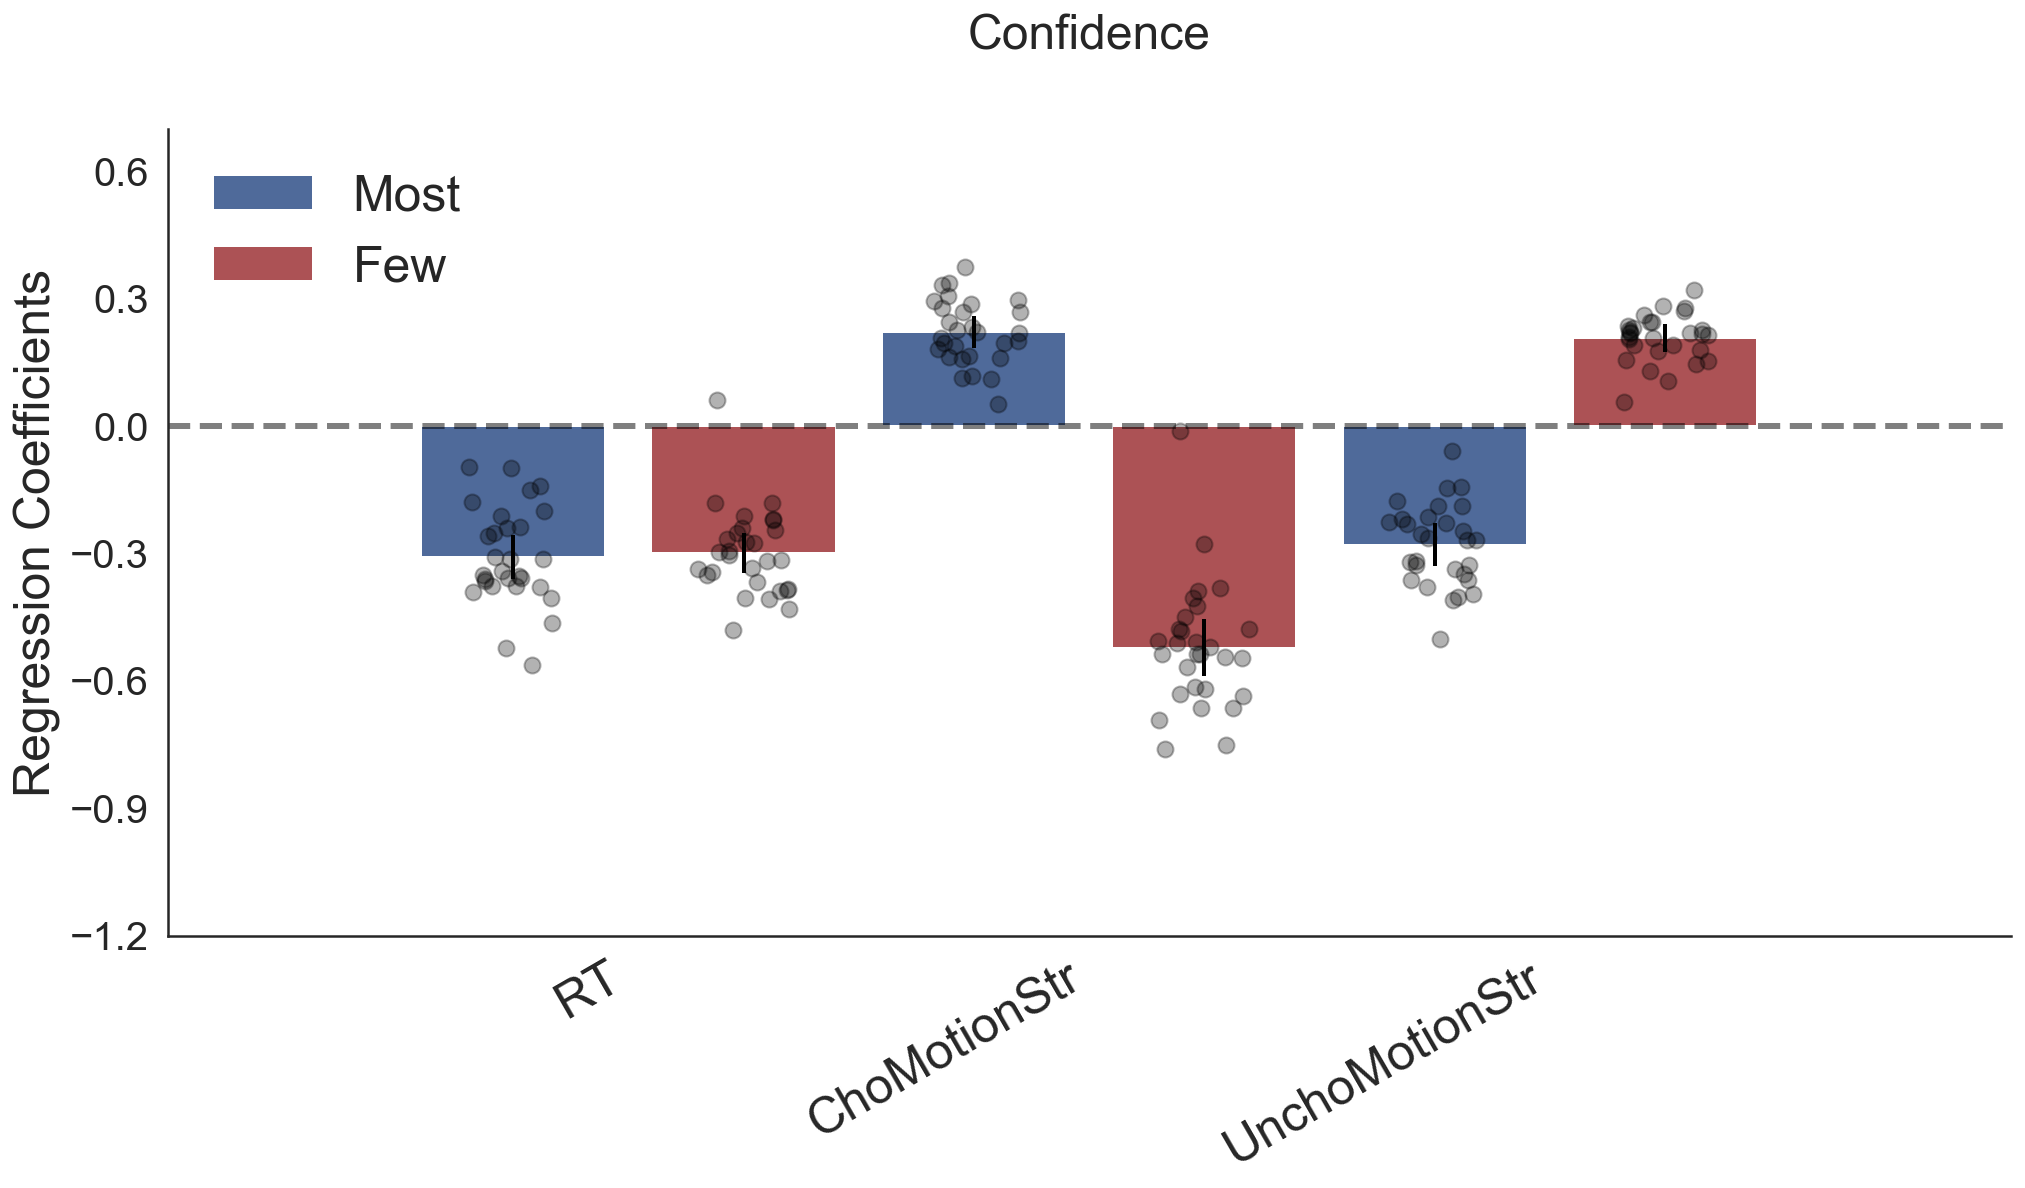

In [172]:
Coefpresplot_bar2(conf_table_Like, mix_Confidence_Like_model,conf_table_Dislike, mix_Confidence_Dislike_model, barcol1='#4F6A9A',barcol2='#AC5255', title='Confidence', size='big',ymultiple=0.3, ticklabsize=20)

plt.xlim(0, 4)

ttestprint (conf_table_Like,conf_table_Dislike, mix_Confidence_Like_model,mix_Confidence_Dislike_model )

#plt.savefig(str('SavedFigures/FF2018ConfidenceRegressionLikeDislike_31.png'), dpi = 200 )

## Confidence ~ BehavioralParams (controlling for coherence + Chosen and Unchosen)

### Low Motion condition model

In [120]:
%%R
# Fit the multilevel linear model


#if (file.exists('SavedModels/HModel_Confidence_Dislike_31_m1.rda')){
#    load('SavedModels/HModel_Confidence_Dislike_31_m1.rda')   
#    print('  Found old parameter estimates in "SavedModels/estimates". Skipping estimation...')
#}
#else{
    confidence_Dislike_hmodel <- lmer(zConfidence ~ zCoherence  + zAbsDDot + zRT + zChosenDots + zUnchosenDots + (zCoherence  + zAbsDDot + zRT + zChosenDots + zUnchosenDots| Part), data=data_exp1_DisLike, control=lmerControl(optimizer="optimx", optCtrl=list(method="nlminb")))
    #save(confidence_Dislike_hmodel, file = "SavedModels/HModel_Confidence_Dislike_31_m1.rda")
    display (confidence_Dislike_hmodel)
#}



lmer(formula = zConfidence ~ zCoherence + zAbsDDot + zRT + zChosenDots + 
    zUnchosenDots + (zCoherence + zAbsDDot + zRT + zChosenDots + 
    zUnchosenDots | Part), data = data_exp1_DisLike, control = lmerControl(optimizer = "optimx", 
    optCtrl = list(method = "nlminb")))
              coef.est coef.se
(Intercept)   -0.36     0.04  
zCoherence     0.27     0.04  
zAbsDDot      -0.23     0.05  
zRT           -0.27     0.02  
zChosenDots   -0.43     0.04  
zUnchosenDots  0.26     0.04  

Error terms:
 Groups   Name          Std.Dev. Corr                          
 Part     (Intercept)   0.17                                   
          zCoherence    0.15     -0.63                         
          zAbsDDot      0.16      0.87 -0.53                   
          zRT           0.12      0.51 -0.21  0.46             
          zChosenDots   0.17      0.66 -0.17  0.72  0.44       
          zUnchosenDots 0.17     -0.69  0.27 -0.94 -0.37 -0.62 
 Residual               0.84               

In [121]:
%%R

# Extract mixed effect paramters
mix_Confidence_Dislike_model <- coef(confidence_Dislike_hmodel)

## Estimating DFs and p-values
# get the coefficients for the best fitting model
coefs <- data.frame(coef(summary(confidence_Dislike_hmodel)))
coefs
# Use the Kenward-Roger approximation to get approximate degrees of freedom
df.KR <- get_ddf_Lb(confidence_Dislike_hmodel, fixef(confidence_Dislike_hmodel))
coefs$df.KR <-(rep(df.KR, each=6))

# Calculate confidence intervals from the estimates and the standard errors
coefs$semax <- coefs$Estimate + (coefs$Std..Error)
coefs$semin <- coefs$Estimate - (coefs$Std..Error)

# get p-values from the t-distribution using the t-values and approximated
# degrees of freedom
coefs$p.KR <- 2 * (1 - pt(abs(coefs$t.value), df.KR))

# use normal distribution to approximate p-value (tends to be anti-conservative with small sample sizes)
coefs$p.z <- 2 * (1 - pnorm(abs(coefs$t.value)))

In [122]:
%%R
summary(confidence_Dislike_hmodel)

Linear mixed model fit by REML ['lmerMod']
Formula: 
zConfidence ~ zCoherence + zAbsDDot + zRT + zChosenDots + zUnchosenDots +  
    (zCoherence + zAbsDDot + zRT + zChosenDots + zUnchosenDots |          Part)
   Data: data_exp1_DisLike
Control: lmerControl(optimizer = "optimx", optCtrl = list(method = "nlminb"))

REML criterion at convergence: 16419.9

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-8.5186 -0.6482  0.0921  0.7104  3.2449 

Random effects:
 Groups   Name          Variance Std.Dev. Corr                         
 Part     (Intercept)   0.02921  0.1709                                
          zCoherence    0.02221  0.1490   -0.63                        
          zAbsDDot      0.02513  0.1585    0.87 -0.53                  
          zRT           0.01350  0.1162    0.51 -0.21  0.46            
          zChosenDots   0.02919  0.1709    0.66 -0.17  0.72  0.44      
          zUnchosenDots 0.02813  0.1677   -0.69  0.27 -0.94 -0.37 -0.62
 Residual              

In [123]:
#%%R 
#coef(confidence_Dislike_hmodel)

In [124]:
%%R
z_values =coefs[1]/coefs[2]
z_values

                Estimate
(Intercept)    -9.301254
zCoherence      7.416509
zAbsDDot       -4.820274
zRT           -11.013501
zChosenDots   -10.429815
zUnchosenDots   6.296118


In [125]:
%R -o coefs -o mix_Confidence_Dislike_model
# extract
mix_Confidence_Dislike_model = mix_Confidence_Dislike_model[0]

conf_table_exp1 = coefs
conf_table_exp1

Estimate  Std..Error    t.value      df.KR     semax     semin  \
0 -0.360606    0.038770  -9.301254  25.967079 -0.321836 -0.399376   
1  0.270625    0.036490   7.416509  25.967079  0.307115  0.234136   
2 -0.225691    0.046821  -4.820274  25.967079 -0.178870 -0.272513   
3 -0.268871    0.024413 -11.013501  25.967079 -0.244458 -0.293284   
4 -0.425066    0.040755 -10.429815  25.967079 -0.384311 -0.465821   
5  0.263170    0.041799   6.296118  25.967079  0.304969  0.221371   

           p.KR           p.z  
0  9.483632e-10  0.000000e+00  
1  7.157296e-08  1.203482e-13  
2  5.417094e-05  1.433611e-06  
3  2.779998e-11  0.000000e+00  
4  8.889400e-11  0.000000e+00  
5  1.158654e-06  3.051912e-10

In [126]:
mix_Confidence_Dislike_model

R object with classes: ('data.frame',) mapped to:
<DataFrame - Python:0x7f850870dbc8 / R:0x7f84d6ea1208>
[Float..., Float..., Float..., Float..., Float..., Float...]
  (Intercept): <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x7f8539840788 / R:0x7f84d35fa490>
[-0.335020, -0.404820, -0.358774, -0.418090, ..., -0.402965, -0.260149, -0.448516, -0.273990]
  zCoherence: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x7f852d267288 / R:0x7f84d35fa5b0>
[0.390302, 0.368404, 0.205540, 0.160722, ..., 0.292930, 0.143584, 0.364827, 0.208801]
  zAbsDDot: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x7f852d46d048 / R:0x7f84d35fa6d0>
[-0.140363, -0.120020, -0.300802, -0.245762, ..., -0.216508, -0.116700, -0.266915, -0.132611]
  zRT: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x7f852d1d19c8 / R:0x7f84d35fa7f0>
[-0.321103, -0.292881, -0.397142, -0.407742, ..., -0.270533, -0.203414, -0.238814, -0.372335]
  zChosenDots: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x7f852d1d1b08 / R:0x7f84d35fa910>
[-0.336352, -0.341856, -0.492803, -0.651678, ..., -0.303079, -0.455010, -0.549391, -0.391696]
  zUnchosenDots: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x7f84f8d4a308 / R:0x7f84d35f96c0>
[0.107236, 0.068212, 0.385050, 0.265845, ..., 0.258589, 0.157282, 0.246905, 0.161476]

In [127]:
#conf_table_exp1 = conf_table_exp1.T
conf_table_exp1

Estimate  Std..Error    t.value      df.KR     semax     semin  \
0 -0.360606    0.038770  -9.301254  25.967079 -0.321836 -0.399376   
1  0.270625    0.036490   7.416509  25.967079  0.307115  0.234136   
2 -0.225691    0.046821  -4.820274  25.967079 -0.178870 -0.272513   
3 -0.268871    0.024413 -11.013501  25.967079 -0.244458 -0.293284   
4 -0.425066    0.040755 -10.429815  25.967079 -0.384311 -0.465821   
5  0.263170    0.041799   6.296118  25.967079  0.304969  0.221371   

           p.KR           p.z  
0  9.483632e-10  0.000000e+00  
1  7.157296e-08  1.203482e-13  
2  5.417094e-05  1.433611e-06  
3  2.779998e-11  0.000000e+00  
4  8.889400e-11  0.000000e+00  
5  1.158654e-06  3.051912e-10

In [128]:
#Generate table with paramters to later plot
conf_table_exp1.columns = ['coefficient', 'se', 't', "dfKR", "SEmax","SEmin","pKR","pz" ]
conf_table_exp1 = conf_table_exp1.iloc[:, 0:-1].copy(); conf_table_exp1.loc[:, 'SEmax'] = conf_table_exp1['coefficient'] + conf_table_exp1['se']*2
conf_table_exp1.loc[:, 'SEmin'] = conf_table_exp1['coefficient'] - conf_table_exp1['se']*2
conf_table_exp1 = conf_table_exp1.transpose()


In [129]:
conf_table_exp1.columns = [ 'Inter', 'Coherence','|ΔMotionStr|','RT', 'ChoMotionStr', 'UnchoMotionStr']
#conf_table_exp1.loc['p'] = np.round(conf_table_exp1.loc['p'], 4)
conf_table_exp1 = conf_table_exp1[['Inter','Coherence','|ΔMotionStr|', 'RT', 'ChoMotionStr', 'UnchoMotionStr']]
conf_table_Dislike = conf_table_exp1

conf_table_Dislike

Inter     Coherence  |ΔMotionStr|            RT  \
coefficient -3.606059e-01  2.706253e-01     -0.225691 -2.688712e-01   
se           3.876960e-02  3.648958e-02      0.046821  2.441287e-02   
t           -9.301254e+00  7.416509e+00     -4.820274 -1.101350e+01   
dfKR         2.596708e+01  2.596708e+01     25.967079  2.596708e+01   
SEmax       -2.830667e-01  3.436045e-01     -0.132049 -2.200454e-01   
SEmin       -4.381451e-01  1.976462e-01     -0.319334 -3.176969e-01   
pKR          9.483632e-10  7.157296e-08      0.000054  2.779998e-11   

             ChoMotionStr  UnchoMotionStr  
coefficient -4.250661e-01        0.263170  
se           4.075490e-02        0.041799  
t           -1.042981e+01        6.296118  
dfKR         2.596708e+01       25.967079  
SEmax       -3.435563e-01        0.346768  
SEmin       -5.065759e-01        0.179573  
pKR          8.889400e-11        0.000001

### High Motion Condition

In [130]:
%%R
# Fit the multilevel linear model
#if (file.exists('SavedModels/HModel_Confidence_Like_31_m1.rda')){
#    print('  Found old parameter estimates in "SavedModels". Skipping estimation...')
#    load('SavedModels/HModel_Confidence_Like_31_m1.rda')   
#}
#else{
confidence_Like_hmodel <- lmer(zConfidence ~ zCoherence  + zAbsDDot + zRT+ zChosenDots + zUnchosenDots + (zCoherence  + zAbsDDot + zRT+ zChosenDots + zUnchosenDots| Part), data=data_exp1_Like, control=lmerControl(optimizer="optimx", optCtrl=list(method="nlminb")))
display (confidence_Like_hmodel)
#save(confidence_Like_hmodel, file = "SavedModels/HModel_Confidence_Like_31_m1.rda")
#}

lmer(formula = zConfidence ~ zCoherence + zAbsDDot + zRT + zChosenDots + 
    zUnchosenDots + (zCoherence + zAbsDDot + zRT + zChosenDots + 
    zUnchosenDots | Part), data = data_exp1_Like, control = lmerControl(optimizer = "optimx", 
    optCtrl = list(method = "nlminb")))
              coef.est coef.se
(Intercept)   -0.13     0.03  
zCoherence     0.23     0.04  
zAbsDDot      -0.26     0.04  
zRT           -0.29     0.03  
zChosenDots    0.32     0.03  
zUnchosenDots -0.23     0.03  

Error terms:
 Groups   Name          Std.Dev. Corr                          
 Part     (Intercept)   0.14                                   
          zCoherence    0.16     -0.31                         
          zAbsDDot      0.13      0.51 -0.91                   
          zRT           0.13      0.02 -0.01  0.02             
          zChosenDots   0.11     -0.24  0.83 -0.90  0.09       
          zUnchosenDots 0.11      0.45 -0.27  0.59  0.05 -0.36 
 Residual               0.77                  

In [131]:
%%R

# Extract mixed effect paramters
mix_Confidence_Like_model <- coef(confidence_Like_hmodel)

## Estimating DFs and p-values
# get the coefficients for the best fitting model
coefs <- data.frame(coef(summary(confidence_Like_hmodel)))
coefs
# Use the Kenward-Roger approximation to get approximate degrees of freedom
df.KR <- get_ddf_Lb(confidence_Like_hmodel, fixef(confidence_Like_hmodel))
coefs$df.KR <-(rep(df.KR, each=6))

# Calculate confidence intervals from the estimates and the standard errors
coefs$semax <- coefs$Estimate + (coefs$Std..Error)
coefs$semin <- coefs$Estimate - (coefs$Std..Error)

# get p-values from the t-distribution using the t-values and approximated
# degrees of freedom
coefs$p.KR <- 2 * (1 - pt(abs(coefs$t.value), df.KR))

# use normal distribution to approximate p-value (tends to be anti-conservative with small sample sizes)
coefs$p.z <- 2 * (1 - pnorm(abs(coefs$t.value)))

In [132]:
%%R
summary(confidence_Like_hmodel)

Linear mixed model fit by REML ['lmerMod']
Formula: 
zConfidence ~ zCoherence + zAbsDDot + zRT + zChosenDots + zUnchosenDots +  
    (zCoherence + zAbsDDot + zRT + zChosenDots + zUnchosenDots |          Part)
   Data: data_exp1_Like
Control: lmerControl(optimizer = "optimx", optCtrl = list(method = "nlminb"))

REML criterion at convergence: 15329.8

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-7.3503 -0.5932  0.0954  0.6824  2.9999 

Random effects:
 Groups   Name          Variance Std.Dev. Corr                         
 Part     (Intercept)   0.01902  0.1379                                
          zCoherence    0.02488  0.1577   -0.31                        
          zAbsDDot      0.01712  0.1309    0.51 -0.91                  
          zRT           0.01679  0.1296    0.02 -0.01  0.02            
          zChosenDots   0.01286  0.1134   -0.24  0.83 -0.90  0.09      
          zUnchosenDots 0.01134  0.1065    0.45 -0.27  0.59  0.05 -0.36
 Residual               0.

In [133]:
%%R
coefs

                Estimate Std..Error    t.value   df.KR       semax      semin
(Intercept)   -0.1299070 0.03185051  -4.078647 25.6998 -0.09805648 -0.1617575
zCoherence     0.2336791 0.03652446   6.397881 25.6998  0.27020358  0.1971547
zAbsDDot      -0.2567927 0.04033491  -6.366513 25.6998 -0.21645782 -0.2971276
zRT           -0.2871685 0.02658966 -10.800007 25.6998 -0.26057888 -0.3137582
zChosenDots    0.3199927 0.03203563   9.988651 25.6998  0.35202833  0.2879571
zUnchosenDots -0.2279256 0.02970046  -7.674143 25.6998 -0.19822513 -0.2576261
                      p.KR          p.z
(Intercept)   3.876276e-04 4.529861e-05
zCoherence    9.385152e-07 1.575480e-10
zAbsDDot      1.015812e-06 1.933735e-10
zRT           4.786527e-11 0.000000e+00
zChosenDots   2.453930e-10 0.000000e+00
zUnchosenDots 4.132637e-08 1.665335e-14


In [134]:
%%R

z_values =coefs[1]/coefs[2]
z_values

                Estimate
(Intercept)    -4.078647
zCoherence      6.397881
zAbsDDot       -6.366513
zRT           -10.800007
zChosenDots     9.988651
zUnchosenDots  -7.674143


In [135]:
%R -o coefs -o mix_Confidence_Like_model

mix_Confidence_Like_model = mix_Confidence_Like_model[0]

conf_table_exp1 = coefs
conf_table_exp1

Estimate  Std..Error    t.value      df.KR     semax     semin  \
0 -0.129907    0.031851  -4.078647  25.699797 -0.098056 -0.161758   
1  0.233679    0.036524   6.397881  25.699797  0.270204  0.197155   
2 -0.256793    0.040335  -6.366513  25.699797 -0.216458 -0.297128   
3 -0.287169    0.026590 -10.800007  25.699797 -0.260579 -0.313758   
4  0.319993    0.032036   9.988651  25.699797  0.352028  0.287957   
5 -0.227926    0.029700  -7.674143  25.699797 -0.198225 -0.257626   

           p.KR           p.z  
0  3.876276e-04  4.529861e-05  
1  9.385152e-07  1.575480e-10  
2  1.015812e-06  1.933735e-10  
3  4.786527e-11  0.000000e+00  
4  2.453930e-10  0.000000e+00  
5  4.132637e-08  1.665335e-14

In [136]:
conf_table_exp1

Estimate  Std..Error    t.value      df.KR     semax     semin  \
0 -0.129907    0.031851  -4.078647  25.699797 -0.098056 -0.161758   
1  0.233679    0.036524   6.397881  25.699797  0.270204  0.197155   
2 -0.256793    0.040335  -6.366513  25.699797 -0.216458 -0.297128   
3 -0.287169    0.026590 -10.800007  25.699797 -0.260579 -0.313758   
4  0.319993    0.032036   9.988651  25.699797  0.352028  0.287957   
5 -0.227926    0.029700  -7.674143  25.699797 -0.198225 -0.257626   

           p.KR           p.z  
0  3.876276e-04  4.529861e-05  
1  9.385152e-07  1.575480e-10  
2  1.015812e-06  1.933735e-10  
3  4.786527e-11  0.000000e+00  
4  2.453930e-10  0.000000e+00  
5  4.132637e-08  1.665335e-14

In [137]:
#Generate table with paramters to later plot
conf_table_exp1.columns = ['coefficient', 'se', 't', "dfKR", "SEmax","SEmin","pKR","pz" ]
conf_table_exp1 = conf_table_exp1.iloc[:, 0:-1].copy(); conf_table_exp1.loc[:, 'SEmax'] = conf_table_exp1['coefficient'] + conf_table_exp1['se']*2
conf_table_exp1.loc[:, 'SEmin'] = conf_table_exp1['coefficient'] - conf_table_exp1['se']*2
conf_table_exp1 = conf_table_exp1.transpose()


In [138]:
conf_table_exp1.columns = [ 'Inter', 'Coherence','|ΔMotionStr|','RT', 'ChoMotionStr', 'UnchoMotionStr']
#conf_table_exp1.loc['p'] = np.round(conf_table_exp1.loc['p'], 4)
conf_table_exp1 = conf_table_exp1[[ 'Inter', 'Coherence','|ΔMotionStr|','RT', 'ChoMotionStr', 'UnchoMotionStr']]
conf_table_Like = conf_table_exp1
conf_table_Like

Inter     Coherence  |ΔMotionStr|            RT  \
coefficient  -0.129907  2.336791e-01     -0.256793 -2.871685e-01   
se            0.031851  3.652446e-02      0.040335  2.658966e-02   
t            -4.078647  6.397881e+00     -6.366513 -1.080001e+01   
dfKR         25.699797  2.569980e+01     25.699797  2.569980e+01   
SEmax        -0.066206  3.067280e-01     -0.176123 -2.339892e-01   
SEmin        -0.193608  1.606302e-01     -0.337463 -3.403479e-01   
pKR           0.000388  9.385152e-07      0.000001  4.786527e-11   

             ChoMotionStr  UnchoMotionStr  
coefficient  3.199927e-01   -2.279256e-01  
se           3.203563e-02    2.970046e-02  
t            9.988651e+00   -7.674143e+00  
dfKR         2.569980e+01    2.569980e+01  
SEmax        3.840640e-01   -1.685247e-01  
SEmin        2.559214e-01   -2.873265e-01  
pKR          2.453930e-10    4.132637e-08

### Plotting both conditions

Mismatch
---------------- SIGNIFICANT FACTOR ----------------------
Inter : MeanL = -0.13; t =  -5.71017 ; p-value =0.0***
Inter : MeanD = -0.36; t =  -13.01532 ; p-value =0.0***
Coherence : MeanL = 0.23; t =  8.80463 ; p-value =0.0***
Coherence : MeanD = 0.27; t =  10.92257 ; p-value =0.0***
|ΔMotionStr| : MeanL = -0.26; t =  -12.03334 ; p-value =0.0***
|ΔMotionStr| : MeanD = -0.23; t =  -9.16172 ; p-value =0.0***
RT : MeanL = -0.29; t =  -13.15066 ; p-value =0.0***
RT : MeanD = -0.27; t =  -13.87682 ; p-value =0.0***
ChoMotionStr : MeanL = 0.32; t =  18.09787 ; p-value =0.0***
ChoMotionStr : MeanD = -0.43; t =  -16.28722 ; p-value =0.0***
UnchoMotionStr : MeanL = -0.23; t =  -14.83705 ; p-value =0.0***
UnchoMotionStr : MeanD = 0.26; t =  10.60921 ; p-value =0.0***
---------------- COMPARE [ LIKE - DISLIKE ] ----------------------
Inter : MeanL = -0.13; MeanD = -0.36061; [Like - Dislike] =  0.0; t =  5.6154 ; p-value =1e-05***
Coherence : MeanL = 0.23; MeanD = 0.27; [Like - Dislike] =

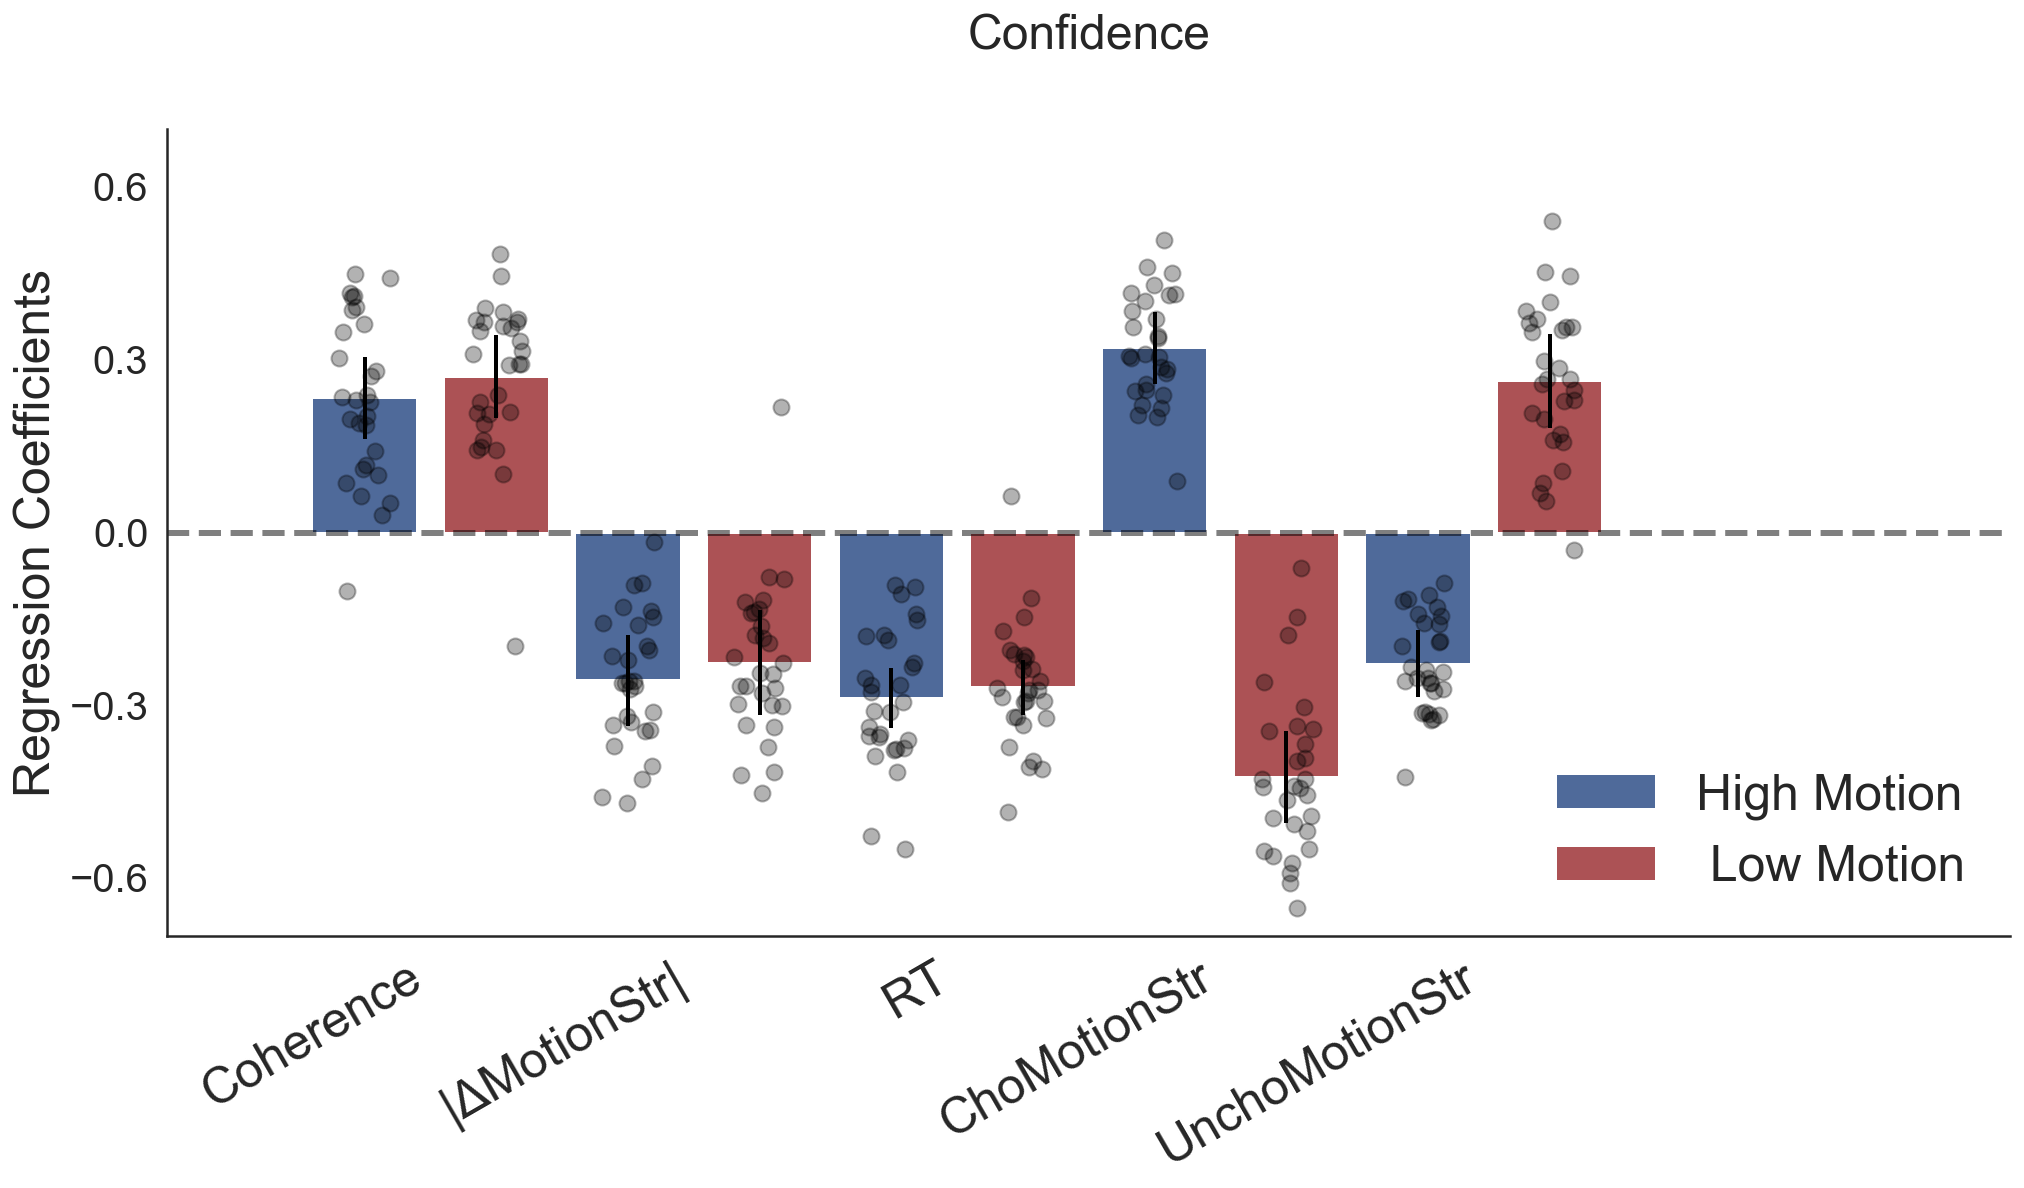

In [139]:
Coefpresplot_bar2(conf_table_Like, mix_Confidence_Like_model,conf_table_Dislike, mix_Confidence_Dislike_model, barcol1='#4F6A9A',barcol2='#AC5255', title='Confidence', size='big',ymultiple=0.3, ticklabsize=20, labels = ['High Motion', ' Low Motion'])

plt.xlim(0, 7)

ttestprint (conf_table_Like,conf_table_Dislike, mix_Confidence_Like_model,mix_Confidence_Dislike_model )

#plt.savefig(str('SavedFigures/FF2018ConfidenceRegressionLikeDislike_31.png'), dpi = 200 )

In [141]:
[s, p] = stats.ttest_rel(np.absolute(mix_Confidence_Like_model[4]),np.absolute(mix_Confidence_Like_model[5]))
print(str('HighMotion / Magnitude compare / Chosen effect = '+ str(round(mean(np.absolute(mix_Confidence_Like_model[4])),2))+ ";Unchosen effect  = "+ str(round(mean(np.absolute(mix_Confidence_Like_model[5])),2))+
    "; t =  " + str(round(s,3)) + " ; p-value =" + str(p)))

[s, p] = stats.ttest_rel(np.absolute(mix_Confidence_Dislike_model[4]),np.absolute(mix_Confidence_Dislike_model[5]))
print(str('LowMotion / Magnitude compare / Chosen effect = '+ str(round(mean(np.absolute(mix_Confidence_Dislike_model[4])),2))+ ";Unchosen effect  = "+ str(round(mean(np.absolute(mix_Confidence_Dislike_model[5])),2))+
    "; t =  " + str(round(s,3)) + " ; p-value =" + str(p)))


HighMotion / Magnitude compare / Chosen effect = 0.32;Unchosen effect  = 0.23; t =  4.628 ; p-value =7.673616829825843e-05
LowMotion / Magnitude compare / Chosen effect = 0.43;Unchosen effect  = 0.27; t =  6.812 ; p-value =2.119597974557259e-07


## Confidence ~ BehavioralParams (controlling for coherence)

### Low Motion condition model

In [229]:
%%R
# Fit the multilevel linear model


#if (file.exists('SavedModels/HModel_Confidence_Dislike_31_m1.rda')){
#    load('SavedModels/HModel_Confidence_Dislike_31_m1.rda')   
#    print('  Found old parameter estimates in "SavedModels/estimates". Skipping estimation...')
#}
#else{
    confidence_Dislike_hmodel <- lmer(zConfidence ~ zCoherence  + zAbsDDot + zRT + zSumDot + (zCoherence  + zAbsDDot + zRT + zSumDot| Part), data=data_exp1_DisLike, control=lmerControl(optimizer="optimx", optCtrl=list(method="nlminb")))
    #save(confidence_Dislike_hmodel, file = "SavedModels/HModel_Confidence_Dislike_31_m1.rda")
    display (confidence_Dislike_hmodel)
#}



lmer(formula = zConfidence ~ zCoherence + zAbsDDot + zRT + zSumDot + 
    (zCoherence + zAbsDDot + zRT + zSumDot | Part), data = data_exp1_DisLike, 
    control = lmerControl(optimizer = "optimx", optCtrl = list(method = "nlminb")))
            coef.est coef.se
(Intercept) -0.09     0.02  
zCoherence   0.26     0.04  
zAbsDDot     0.13     0.03  
zRT         -0.29     0.03  
zSumDot     -0.15     0.03  

Error terms:
 Groups   Name        Std.Dev. Corr                    
 Part     (Intercept) 0.11                             
          zCoherence  0.15     -0.59                   
          zAbsDDot    0.06      0.57 -0.75             
          zRT         0.12      0.29 -0.17 -0.05       
          zSumDot     0.11     -0.03  0.10 -0.70  0.16 
 Residual             0.86                             
---
number of obs: 6496, groups: Part, 29
AIC = 16665.9, DIC = 16567.1
deviance = 16595.5 


In [230]:
%%R

# Extract mixed effect paramters
mix_Confidence_Dislike_model <- coef(confidence_Dislike_hmodel)

## Estimating DFs and p-values
# get the coefficients for the best fitting model
coefs <- data.frame(coef(summary(confidence_Dislike_hmodel)))
coefs
# Use the Kenward-Roger approximation to get approximate degrees of freedom
df.KR <- get_ddf_Lb(confidence_Dislike_hmodel, fixef(confidence_Dislike_hmodel))
coefs$df.KR <-(rep(df.KR, each=5))

# Calculate confidence intervals from the estimates and the standard errors
coefs$semax <- coefs$Estimate + (coefs$Std..Error)
coefs$semin <- coefs$Estimate - (coefs$Std..Error)

# get p-values from the t-distribution using the t-values and approximated
# degrees of freedom
coefs$p.KR <- 2 * (1 - pt(abs(coefs$t.value), df.KR))

# use normal distribution to approximate p-value (tends to be anti-conservative with small sample sizes)
coefs$p.z <- 2 * (1 - pnorm(abs(coefs$t.value)))

In [231]:
%%R
summary(confidence_Dislike_hmodel)

Linear mixed model fit by REML ['lmerMod']
Formula: zConfidence ~ zCoherence + zAbsDDot + zRT + zSumDot + (zCoherence +  
    zAbsDDot + zRT + zSumDot | Part)
   Data: data_exp1_DisLike
Control: lmerControl(optimizer = "optimx", optCtrl = list(method = "nlminb"))

REML criterion at convergence: 16623.9

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-8.3973 -0.6437  0.0929  0.7137  3.2070 

Random effects:
 Groups   Name        Variance Std.Dev. Corr                   
 Part     (Intercept) 0.012872 0.11346                         
          zCoherence  0.022329 0.14943  -0.59                  
          zAbsDDot    0.003988 0.06315   0.57 -0.75            
          zRT         0.014757 0.12148   0.29 -0.17 -0.05      
          zSumDot     0.012366 0.11120  -0.03  0.10 -0.70  0.16
 Residual             0.734408 0.85698                         
Number of obs: 6496, groups:  Part, 29

Fixed effects:
            Estimate Std. Error t value
(Intercept) -0.08811    0.02368  -

In [232]:
#%%R 
#coef(confidence_Dislike_hmodel)

In [233]:
%%R
z_values =coefs[1]/coefs[2]
z_values

              Estimate
(Intercept)  -3.721369
zCoherence    7.060016
zAbsDDot      4.307270
zRT         -11.353899
zSumDot      -5.619134


In [234]:
%R -o coefs -o mix_Confidence_Dislike_model
# extract
mix_Confidence_Dislike_model = mix_Confidence_Dislike_model[0]

conf_table_exp1 = coefs
conf_table_exp1

Estimate  Std..Error    t.value      df.KR     semax     semin  \
0 -0.088109    0.023677  -3.721369  27.997875 -0.064433 -0.111786   
1  0.259891    0.036812   7.060016  27.997875  0.296703  0.223079   
2  0.126510    0.029371   4.307270  27.997875  0.155882  0.097139   
3 -0.287658    0.025336 -11.353899  27.997875 -0.262322 -0.312993   
4 -0.148462    0.026421  -5.619134  27.997875 -0.122042 -0.174883   

           p.KR           p.z  
0  8.824122e-04  1.981454e-04  
1  1.113642e-07  1.664890e-12  
2  1.834751e-04  1.652821e-05  
3  5.439649e-12  0.000000e+00  
4  5.125684e-06  1.919165e-08

In [235]:
mix_Confidence_Dislike_model

R object with classes: ('data.frame',) mapped to:
<DataFrame - Python:0x7fb95a4d4088 / R:0x7fb57503b5b8>
[FloatVe..., FloatVe..., FloatVe..., FloatVe..., FloatVe...]
  (Intercept): <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x7fb95a4bbfc8 / R:0x7fb906222770>
[-0.142714, -0.254146, 0.004107, -0.048650, ..., -0.191799, -0.023031, -0.125181, -0.084524]
  zCoherence: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x7fb95a4bbf88 / R:0x7fb9062d1460>
[0.373689, 0.342351, 0.202176, 0.136081, ..., 0.275976, 0.141327, 0.345930, 0.203567]
  zAbsDDot: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x7fb95a4bbe48 / R:0x7fb906256f90>
[0.109979, 0.117774, 0.145040, 0.235566, ..., 0.077067, 0.193325, 0.139217, 0.169751]
  zRT: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x7fb969631b88 / R:0x7fb90621d350>
[-0.348617, -0.324994, -0.404712, -0.444265, ..., -0.271152, -0.219843, -0.270276, -0.421364]
  zSumDot: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x7fb999b89cc8 / R:0x7fb9062138a0>
[-0.188188, -0.241146, -0.103351, -0.332845, ..., -0.065058, -0.245541, -0.259861, -0.209058]

In [236]:
#conf_table_exp1 = conf_table_exp1.T
conf_table_exp1

Estimate  Std..Error    t.value      df.KR     semax     semin  \
0 -0.088109    0.023677  -3.721369  27.997875 -0.064433 -0.111786   
1  0.259891    0.036812   7.060016  27.997875  0.296703  0.223079   
2  0.126510    0.029371   4.307270  27.997875  0.155882  0.097139   
3 -0.287658    0.025336 -11.353899  27.997875 -0.262322 -0.312993   
4 -0.148462    0.026421  -5.619134  27.997875 -0.122042 -0.174883   

           p.KR           p.z  
0  8.824122e-04  1.981454e-04  
1  1.113642e-07  1.664890e-12  
2  1.834751e-04  1.652821e-05  
3  5.439649e-12  0.000000e+00  
4  5.125684e-06  1.919165e-08

In [237]:
#Generate table with paramters to later plot
conf_table_exp1.columns = ['coefficient', 'se', 't', "dfKR", "SEmax","SEmin","pKR","pz" ]
conf_table_exp1 = conf_table_exp1.iloc[:, 0:-1].copy(); conf_table_exp1.loc[:, 'SEmax'] = conf_table_exp1['coefficient'] + conf_table_exp1['se']*2
conf_table_exp1.loc[:, 'SEmin'] = conf_table_exp1['coefficient'] - conf_table_exp1['se']*2
conf_table_exp1 = conf_table_exp1.transpose()


In [238]:
conf_table_exp1.columns = [ 'Inter', 'Coherence','|ΔMotionStr|','RT','ΣMotionStr']
#conf_table_exp1.loc['p'] = np.round(conf_table_exp1.loc['p'], 4)
conf_table_exp1 = conf_table_exp1[['Inter','Coherence','|ΔMotionStr|', 'RT','ΣMotionStr']]
conf_table_Dislike = conf_table_exp1

conf_table_Dislike

Inter     Coherence  |ΔMotionStr|            RT  ΣMotionStr
coefficient  -0.088109  2.598910e-01      0.126510 -2.876576e-01   -0.148462
se            0.023677  3.681167e-02      0.029371  2.533558e-02    0.026421
t            -3.721369  7.060016e+00      4.307270 -1.135390e+01   -5.619134
dfKR         27.997875  2.799788e+01     27.997875  2.799788e+01   27.997875
SEmax        -0.040756  3.335143e-01      0.185253 -2.369864e-01   -0.095621
SEmin        -0.135463  1.862676e-01      0.067768 -3.383288e-01   -0.201304
pKR           0.000882  1.113642e-07      0.000183  5.439649e-12    0.000005

### High Motion Condition

In [239]:
%%R
# Fit the multilevel linear model
#if (file.exists('SavedModels/HModel_Confidence_Like_31_m1.rda')){
#    print('  Found old parameter estimates in "SavedModels". Skipping estimation...')
#    load('SavedModels/HModel_Confidence_Like_31_m1.rda')   
#}
#else{
confidence_Like_hmodel <- lmer(zConfidence ~ zCoherence  + zAbsDDot + zRT+ zSumDot + (zCoherence  + zAbsDDot + zRT+ zSumDot| Part), data=data_exp1_Like, control=lmerControl(optimizer="optimx", optCtrl=list(method="nlminb")))
display (confidence_Like_hmodel)
#save(confidence_Like_hmodel, file = "SavedModels/HModel_Confidence_Like_31_m1.rda")
#}

lmer(formula = zConfidence ~ zCoherence + zAbsDDot + zRT + zSumDot + 
    (zCoherence + zAbsDDot + zRT + zSumDot | Part), data = data_exp1_Like, 
    control = lmerControl(optimizer = "optimx", optCtrl = list(method = "nlminb")))
            coef.est coef.se
(Intercept)  0.08     0.02  
zCoherence   0.23     0.04  
zAbsDDot     0.02     0.03  
zRT         -0.30     0.03  
zSumDot      0.05     0.02  

Error terms:
 Groups   Name        Std.Dev. Corr                    
 Part     (Intercept) 0.12                             
          zCoherence  0.16      0.13                   
          zAbsDDot    0.06      0.15 -0.94             
          zRT         0.13     -0.04 -0.02 -0.08       
          zSumDot     0.09      0.20  0.49 -0.61  0.10 
 Residual             0.78                             
---
number of obs: 6496, groups: Part, 29
AIC = 15537, DIC = 15437.8
deviance = 15466.4 


In [240]:
%%R

# Extract mixed effect paramters
mix_Confidence_Like_model <- coef(confidence_Like_hmodel)

## Estimating DFs and p-values
# get the coefficients for the best fitting model
coefs <- data.frame(coef(summary(confidence_Like_hmodel)))
coefs
# Use the Kenward-Roger approximation to get approximate degrees of freedom
df.KR <- get_ddf_Lb(confidence_Like_hmodel, fixef(confidence_Like_hmodel))
coefs$df.KR <-(rep(df.KR, each=5))

# Calculate confidence intervals from the estimates and the standard errors
coefs$semax <- coefs$Estimate + (coefs$Std..Error)
coefs$semin <- coefs$Estimate - (coefs$Std..Error)

# get p-values from the t-distribution using the t-values and approximated
# degrees of freedom
coefs$p.KR <- 2 * (1 - pt(abs(coefs$t.value), df.KR))

# use normal distribution to approximate p-value (tends to be anti-conservative with small sample sizes)
coefs$p.z <- 2 * (1 - pnorm(abs(coefs$t.value)))

In [241]:
%%R
summary(confidence_Like_hmodel)

Linear mixed model fit by REML ['lmerMod']
Formula: zConfidence ~ zCoherence + zAbsDDot + zRT + zSumDot + (zCoherence +  
    zAbsDDot + zRT + zSumDot | Part)
   Data: data_exp1_Like
Control: lmerControl(optimizer = "optimx", optCtrl = list(method = "nlminb"))

REML criterion at convergence: 15495

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-7.3085 -0.5979  0.1048  0.6820  3.0097 

Random effects:
 Groups   Name        Variance Std.Dev. Corr                   
 Part     (Intercept) 0.014628 0.12095                         
          zCoherence  0.024312 0.15592   0.13                  
          zAbsDDot    0.003067 0.05538   0.15 -0.94            
          zRT         0.016597 0.12883  -0.04 -0.02 -0.08      
          zSumDot     0.008446 0.09190   0.20  0.49 -0.61  0.10
 Residual             0.615690 0.78466                         
Number of obs: 6496, groups:  Part, 29

Fixed effects:
            Estimate Std. Error t value
(Intercept)  0.08327    0.02457   3.389

In [242]:
%%R
coefs

               Estimate Std..Error     t.value    df.KR       semax
(Intercept)  0.08327192 0.02457138   3.3889808 27.99048  0.10784330
zCoherence   0.22808179 0.03643241   6.2604091 27.99048  0.26451420
zAbsDDot     0.01845286 0.02671126   0.6908271 27.99048  0.04516412
zRT         -0.30100531 0.02650174 -11.3579432 27.99048 -0.27450357
zSumDot      0.04727394 0.02279399   2.0739652 27.99048  0.07006793
                   semin         p.KR          p.z
(Intercept)  0.058700545 2.102008e-03 7.015292e-04
zCoherence   0.191649379 9.121482e-07 3.839689e-10
zAbsDDot    -0.008258398 4.953638e-01 4.896742e-01
zRT         -0.327507055 5.413447e-12 0.000000e+00
zSumDot      0.024479951 4.739689e-02 3.808254e-02


In [243]:
%%R

z_values =coefs[1]/coefs[2]
z_values

               Estimate
(Intercept)   3.3889808
zCoherence    6.2604091
zAbsDDot      0.6908271
zRT         -11.3579432
zSumDot       2.0739652


In [244]:
%R -o coefs -o mix_Confidence_Like_model

mix_Confidence_Like_model = mix_Confidence_Like_model[0]

conf_table_exp1 = coefs
conf_table_exp1

Estimate  Std..Error    t.value      df.KR     semax     semin  \
0  0.083272    0.024571   3.388981  27.990485  0.107843  0.058701   
1  0.228082    0.036432   6.260409  27.990485  0.264514  0.191649   
2  0.018453    0.026711   0.690827  27.990485  0.045164 -0.008258   
3 -0.301005    0.026502 -11.357943  27.990485 -0.274504 -0.327507   
4  0.047274    0.022794   2.073965  27.990485  0.070068  0.024480   

           p.KR           p.z  
0  2.102008e-03  7.015292e-04  
1  9.121482e-07  3.839689e-10  
2  4.953638e-01  4.896742e-01  
3  5.413447e-12  0.000000e+00  
4  4.739689e-02  3.808254e-02

In [245]:
conf_table_exp1

Estimate  Std..Error    t.value      df.KR     semax     semin  \
0  0.083272    0.024571   3.388981  27.990485  0.107843  0.058701   
1  0.228082    0.036432   6.260409  27.990485  0.264514  0.191649   
2  0.018453    0.026711   0.690827  27.990485  0.045164 -0.008258   
3 -0.301005    0.026502 -11.357943  27.990485 -0.274504 -0.327507   
4  0.047274    0.022794   2.073965  27.990485  0.070068  0.024480   

           p.KR           p.z  
0  2.102008e-03  7.015292e-04  
1  9.121482e-07  3.839689e-10  
2  4.953638e-01  4.896742e-01  
3  5.413447e-12  0.000000e+00  
4  4.739689e-02  3.808254e-02

In [246]:
#Generate table with paramters to later plot
conf_table_exp1.columns = ['coefficient', 'se', 't', "dfKR", "SEmax","SEmin","pKR","pz" ]
conf_table_exp1 = conf_table_exp1.iloc[:, 0:-1].copy(); conf_table_exp1.loc[:, 'SEmax'] = conf_table_exp1['coefficient'] + conf_table_exp1['se']*2
conf_table_exp1.loc[:, 'SEmin'] = conf_table_exp1['coefficient'] - conf_table_exp1['se']*2
conf_table_exp1 = conf_table_exp1.transpose()


In [247]:
conf_table_exp1.columns = [ 'Inter', 'Coherence','|ΔMotionStr|','RT', 'ΣMotionStr']
#conf_table_exp1.loc['p'] = np.round(conf_table_exp1.loc['p'], 4)
conf_table_exp1 = conf_table_exp1[[ 'Inter', 'Coherence','|ΔMotionStr|','RT', 'ΣMotionStr']]
conf_table_Like = conf_table_exp1
conf_table_Like

Inter     Coherence  |ΔMotionStr|            RT  ΣMotionStr
coefficient   0.083272  2.280818e-01      0.018453 -3.010053e-01    0.047274
se            0.024571  3.643241e-02      0.026711  2.650174e-02    0.022794
t             3.388981  6.260409e+00      0.690827 -1.135794e+01    2.073965
dfKR         27.990485  2.799048e+01     27.990485  2.799048e+01   27.990485
SEmax         0.132415  3.009466e-01      0.071875 -2.480018e-01    0.092862
SEmin         0.034129  1.552170e-01     -0.034970 -3.540088e-01    0.001686
pKR           0.002102  9.121482e-07      0.495364  5.413447e-12    0.047397

### Plotting both conditions

In [248]:
conf_table_Dislike

Inter     Coherence  |ΔMotionStr|            RT  ΣMotionStr
coefficient  -0.088109  2.598910e-01      0.126510 -2.876576e-01   -0.148462
se            0.023677  3.681167e-02      0.029371  2.533558e-02    0.026421
t            -3.721369  7.060016e+00      4.307270 -1.135390e+01   -5.619134
dfKR         27.997875  2.799788e+01     27.997875  2.799788e+01   27.997875
SEmax        -0.040756  3.335143e-01      0.185253 -2.369864e-01   -0.095621
SEmin        -0.135463  1.862676e-01      0.067768 -3.383288e-01   -0.201304
pKR           0.000882  1.113642e-07      0.000183  5.439649e-12    0.000005

Mismatch
---------------- SIGNIFICANT FACTOR ----------------------
Inter : MeanL = 0.08; t =  4.04768 ; p-value =0.00037***
Inter : MeanD = -0.09; t =  -4.65164 ; p-value =7e-05***
Coherence : MeanL = 0.23; t =  8.73335 ; p-value =0.0***
Coherence : MeanD = 0.26; t =  10.6021 ; p-value =0.0***
|ΔMotionStr| : MeanL = 0.02; t =  2.02 ; p-value =0.05
|ΔMotionStr| : MeanD = 0.13; t =  12.73944 ; p-value =0.0***
RT : MeanL = -0.3; t =  -13.88025 ; p-value =0.0***
RT : MeanD = -0.29; t =  -14.15543 ; p-value =0.0***
ΣMotionStr : MeanL = 0.05; t =  3.27 ; p-value =0.0**
ΣMotionStr : MeanD = -0.15; t =  -8.49061 ; p-value =0.0***
---------------- COMPARE [ LIKE - DISLIKE ] ----------------------
Inter : MeanL = 0.08; MeanD = -0.08811; [Like - Dislike] =  0.0; t =  4.35201 ; p-value =0.00016***
Coherence : MeanL = 0.23; MeanD = 0.26; [Like - Dislike] =  -0.0; t =  -1.36 ; p-value =0.185
|ΔMotionStr| : MeanL = 0.02; MeanD = 0.12651; [Like - Dislike] =  -0.0; t =  -8.99462 ; p-value =0.0***
RT :

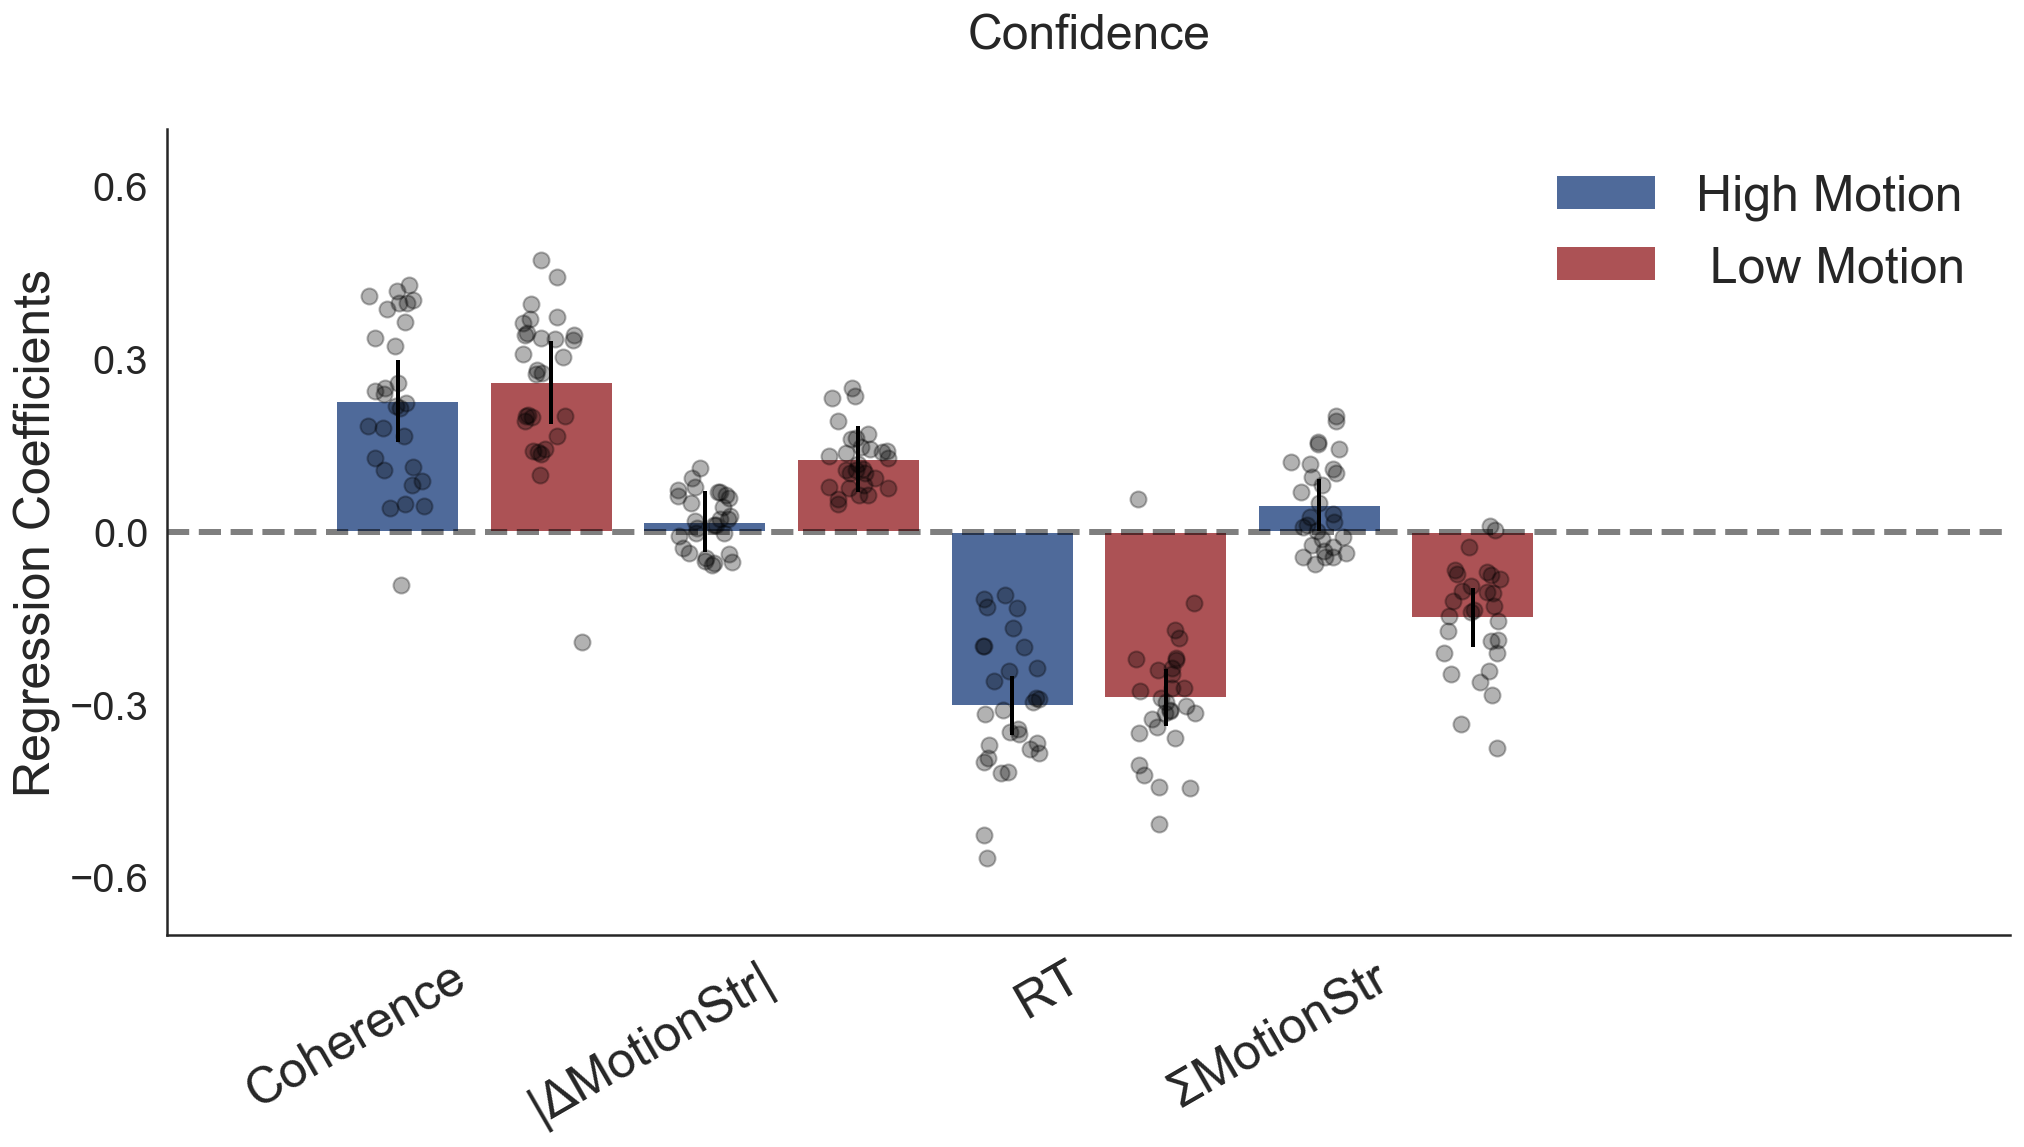

In [249]:
Coefpresplot_bar2(conf_table_Like, mix_Confidence_Like_model,conf_table_Dislike, mix_Confidence_Dislike_model, barcol1='#4F6A9A',barcol2='#AC5255', title='Confidence', size='big',ymultiple=0.3, ticklabsize=20, labels = ['High Motion', ' Low Motion'])

plt.xlim(0, 6)

ttestprint (conf_table_Like,conf_table_Dislike, mix_Confidence_Like_model,mix_Confidence_Dislike_model )

#plt.savefig(str('SavedFigures/FF2018ConfidenceRegressionLikeDislike_31.png'), dpi = 200 )

# Choice Regression

### Dislike Condition

In [173]:
%%R
#
#if (file.exists('SavedModels/HModel_Choice_Dislike_31_m1.rda')){
#    load('SavedModels/HModel_Choice_Dislike_31_m1.rda')   
#    print('  Found old parameter estimates in "SavedModels/". Skipping estimation...')
#}
#else{
# Fit binomial hierarchical model
Choice_Dislike_hmodel =  glmer(Choice ~ zDDot +zSumDot+ zConfidence + zDDot:zConfidence + 
                               (zDDot +zSumDot+ zConfidence + zDDot:zConfidence  | Part), data=data_exp1_DisLike, family='binomial',
                    control=glmerControl(optimizer="optimx", optCtrl=list(method="nlminb")))

display (Choice_Dislike_hmodel)
#save(Choice_Dislike_hmodel, file = "SavedModels/HModel_Choice_Dislike_31_m1.rda")
#}

glmer(formula = Choice ~ zDDot + zSumDot + zConfidence + zDDot:zConfidence + 
    (zDDot + zSumDot + zConfidence + zDDot:zConfidence | Part), 
    data = data_exp1_DisLike, family = "binomial", control = glmerControl(optimizer = "optimx", 
        optCtrl = list(method = "nlminb")))
                  coef.est coef.se
(Intercept)        0.20     0.25  
zDDot             -5.44     0.55  
zSumDot            0.03     0.09  
zConfidence        0.33     0.09  
zDDot:zConfidence -2.17     0.24  

Error terms:
 Groups   Name              Std.Dev. Corr                    
 Part     (Intercept)       1.29                             
          zDDot             2.71     -0.47                   
          zSumDot           0.46      1.00 -0.46             
          zConfidence       0.45      0.89 -0.36  0.90       
          zDDot:zConfidence 1.03     -0.57  0.91 -0.56 -0.57 
 Residual                   1.00                             
---
number of obs: 6496, groups: Part, 29
AIC = 4896.5, DI

In [174]:
%%R
# If we want to see individually the value of each coefficient for the participants
#coef(Choice_Dislike_hmodel)

NULL


In [175]:
%%R
#Extract parameters
fix_Choice_Dislike_hmodel <- fixef(Choice_Dislike_hmodel)
fix_se_Choice_Dislike_hmodel <- sqrt(diag(vcov(Choice_Dislike_hmodel)))
names_Choice_Dislike_hmodel <- names(fix_Choice_Dislike_hmodel)

# Extract mixed effect paramters
mix_Choice_Dislike_model <- coef(Choice_Dislike_hmodel)

summary(Choice_Dislike_hmodel)

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: Choice ~ zDDot + zSumDot + zConfidence + zDDot:zConfidence +  
    (zDDot + zSumDot + zConfidence + zDDot:zConfidence | Part)
   Data: data_exp1_DisLike
Control: glmerControl(optimizer = "optimx", optCtrl = list(method = "nlminb"))

     AIC      BIC   logLik deviance df.resid 
  4896.5   5032.1  -2428.3   4856.5     6476 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-25.499  -0.498   0.000   0.383 123.663 

Random effects:
 Groups Name              Variance Std.Dev. Corr                   
 Part   (Intercept)       1.6722   1.2931                          
        zDDot             7.3197   2.7055   -0.47                  
        zSumDot           0.2092   0.4574    1.00 -0.46            
        zConfidence       0.2048   0.4526    0.89 -0.36  0.90      
        zDDot:zConfidence 1.0519   1.0256   -0.57  0.91 -0.56 -0.57
Number of obs: 6

In [176]:
%R -o fix_Choice_Dislike_hmodel -o fix_se_Choice_Dislike_hmodel -o names_Choice_Dislike_hmodel -o mix_Choice_Dislike_model

#Generate table with parameters to plot
Choice_Dislike_hmodel_table = regtable(fix_Choice_Dislike_hmodel, fix_se_Choice_Dislike_hmodel, names_Choice_Dislike_hmodel)
Choice_Dislike_hmodel_table.columns = ['Inter', 'ΔMotionStr', 'Confidence', "ΣMotionStr", "ΔMotionStr\n x   \nConf"]

# Extract table containing mixed effects for the model
mix_Choice_Dislike_model = mix_Choice_Dislike_model[0]

#Coefpresplot(Choice_Dislike_hmodel_table, title='', ticklabsize=16, size='narrow', ymultiple=0.5, n_ET_predictors=2)
#[i.set_color('#03719c') for i in plt.gca().get_xticklabels()[4:]]
#plt.savefig('../../figures/CoM_cut_slow_1.png', dpi=600, bbox_inches='tight')

In [177]:
Choice_Dislike_hmodel_table

Inter  ΔMotionStr  Confidence  ΣMotionStr  \
coefficient  0.202496   -5.443117    0.032086    0.328708   
se           0.247266    0.548571    0.094168    0.094966   
CImin       -0.282146   -6.518317   -0.152484    0.142575   
CImax        0.687138   -4.367917    0.216655    0.514842   

             ΔMotionStr\n x   \nConf  
coefficient                -2.170019  
se                          0.238119  
CImin                      -2.636732  
CImax                      -1.703307

### Like Condition

In [178]:
%%R
#if (file.exists('SavedModels/HModel_Choice_Like_31_m1.rda')){
#    load('SavedModels/HModel_Choice_Like_31_m1.rda')   
#    print('  Found old parameter estimates in "SavedModels/". Skipping estimation...')
#}
#else{
## Fit binomial hierarchical model
Choice_Like_hmodel =  glmer(Choice ~ zDDot +zSumDot+ zConfidence + zDDot:zConfidence+ 
                               (zDDot +zSumDot+ zConfidence + zDDot:zConfidence | Part), data=data_exp1_Like, family='binomial',
                    control=glmerControl(optimizer="optimx", optCtrl=list(method="nlminb")))
display (Choice_Like_hmodel)
#save(Choice_Like_hmodel, file = "SavedModels/HModel_Choice_Like_31_m1.rda")
#}

glmer(formula = Choice ~ zDDot + zSumDot + zConfidence + zDDot:zConfidence + 
    (zDDot + zSumDot + zConfidence + zDDot:zConfidence | Part), 
    data = data_exp1_Like, family = "binomial", control = glmerControl(optimizer = "optimx", 
        optCtrl = list(method = "nlminb")))
                  coef.est coef.se
(Intercept)       -0.18     0.25  
zDDot              4.76     0.44  
zSumDot           -0.10     0.08  
zConfidence        0.14     0.12  
zDDot:zConfidence  1.83     0.21  

Error terms:
 Groups   Name              Std.Dev. Corr                    
 Part     (Intercept)       1.30                             
          zDDot             2.14     -0.39                   
          zSumDot           0.36      0.89 -0.31             
          zConfidence       0.61      0.88 -0.14  0.67       
          zDDot:zConfidence 0.88     -0.29  0.91 -0.34  0.06 
 Residual                   1.00                             
---
number of obs: 6496, groups: Part, 29
AIC = 4705, DIC = 4

In [179]:
%%R
#Extract regression parameters
fix_Choice_Like_hmodel <- fixef(Choice_Like_hmodel)
# Calculate standard error for paramters
fix_se_Choice_Like_hmodel <- sqrt(diag(vcov(Choice_Like_hmodel)))
names_Choice_Like_hmodel <- names(Choice_Like_hmodel)
summary(Choice_Like_hmodel)

# Extract mixed effect paramters
mix_Choice_Like_model <- coef(Choice_Like_hmodel)

summary(Choice_Like_hmodel)

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: Choice ~ zDDot + zSumDot + zConfidence + zDDot:zConfidence +  
    (zDDot + zSumDot + zConfidence + zDDot:zConfidence | Part)
   Data: data_exp1_Like
Control: glmerControl(optimizer = "optimx", optCtrl = list(method = "nlminb"))

     AIC      BIC   logLik deviance df.resid 
  4705.0   4840.6  -2332.5   4665.0     6476 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-392.38   -0.43    0.00    0.36   49.18 

Random effects:
 Groups Name              Variance Std.Dev. Corr                   
 Part   (Intercept)       1.6977   1.3029                          
        zDDot             4.5829   2.1408   -0.39                  
        zSumDot           0.1266   0.3558    0.89 -0.31            
        zConfidence       0.3749   0.6123    0.88 -0.14  0.67      
        zDDot:zConfidence 0.7677   0.8762   -0.29  0.91 -0.34  0.06
Number of obs: 6496

In [180]:
%R -o fix_Choice_Like_hmodel -o fix_se_Choice_Like_hmodel -o mix_Choice_Like_model
 #-o names_Choice_Like_hmodel 

# we use the same names that were defined for the predictors that in the dislike case, since they are the same in both cases
Choice_Like_hmodel_table = regtable(fix_Choice_Like_hmodel, fix_se_Choice_Like_hmodel, names_Choice_Dislike_hmodel)
Choice_Like_hmodel_table.columns = [ 'Inter','ΔMotionStr', 'Confidence', "ΣMotionStr", "ΔMotionStr\n x   \nConf"]
mix_Choice_Like_model = mix_Choice_Like_model[0]

#Coefpresplot(Choice_Like_hmodel_table, title='', ticklabsize=16, size='narrow', ymultiple=0.5, n_ET_predictors=2)
#[i.set_color('#03719c') for i in plt.gca().get_xticklabels()[4:]]
#plt.savefig('../../figures/CoM_cut_slow_1.png', dpi=600, bbox_inches='tight')


### Plotting both conditions

In [181]:
#Coefpresplot2(Choice_Like_hmodel_table,Choice_Dislike_hmodel_table, title='Choice', intercept=True, ticklabsize=16, size='big', n_ET_predictors=0)

In [182]:
#Coefpresplot_bar(Choice_Dislike_hmodel_table, mix_Choice_Dislike_model, barcol ='#AC5255' ,title='Choice', intercept=True, ticklabsize=16, size='big', n_ET_predictors=0, ylimits = (-3,4))
#Coefpresplot_bar(Choice_Like_hmodel_table, mix_Choice_Like_model, barcol ='#4F6A9A' ,title='Choice', intercept=True, ticklabsize=16, size='big', n_ET_predictors=0, ylimits = (-3,4))

In [183]:
Choice_Like_hmodel_table

Inter  ΔMotionStr  Confidence  ΣMotionStr  \
coefficient -0.183963    4.762342   -0.097014    0.137044   
se           0.247577    0.435792    0.077167    0.123121   
CImin       -0.669214    3.908190   -0.248262   -0.104273   
CImax        0.301288    5.616495    0.054234    0.378361   

             ΔMotionStr\n x   \nConf  
coefficient                 1.829806  
se                          0.211200  
CImin                       1.415855  
CImax                       2.243757

In [184]:
mix_Choice_Like_model

R object with classes: ('data.frame',) mapped to:
<DataFrame - Python:0x7fe15296c648 / R:0x7fe13fe64738>
[FloatVe..., FloatVe..., FloatVe..., FloatVe..., FloatVe...]
  (Intercept): <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x7fe142ea4d08 / R:0x7fe0ef85e190>
[-0.079291, -1.055940, -2.875359, -1.795250, ..., 1.013522, 0.367461, -0.269682, -0.691966]
  zDDot: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x7fe142ea4f08 / R:0x7fe0ef85e2b0>
[5.226271, 2.291520, 6.434971, 7.086278, ..., 3.633097, 3.800682, 3.834738, 1.416340]
  zSumDot: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x7fe142ea4e08 / R:0x7fe0ef85e3d0>
[-0.014215, -0.283697, -0.596320, -0.578661, ..., 0.174846, -0.186143, -0.076550, -0.203869]
  zConfidence: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x7fe142e718c8 / R:0x7fe0ef85e4f0>
[0.105875, -0.578299, -1.233345, -0.293571, ..., 0.554834, 0.512531, 0.046222, -0.235695]
  zDDot:zConfidence: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x7fe142ea4f48 / R:0x7fe0ef85e610>
[1.822378, 0.884421, 1.972210, 2.871939, ..., 1.379982, 1.617473, 1.523971, 0.673099]

In [185]:
Choice_Dislike_hmodel_table

Inter  ΔMotionStr  Confidence  ΣMotionStr  \
coefficient  0.202496   -5.443117    0.032086    0.328708   
se           0.247266    0.548571    0.094168    0.094966   
CImin       -0.282146   -6.518317   -0.152484    0.142575   
CImax        0.687138   -4.367917    0.216655    0.514842   

             ΔMotionStr\n x   \nConf  
coefficient                -2.170019  
se                          0.238119  
CImin                      -2.636732  
CImax                      -1.703307

In [186]:
mix_Choice_Dislike_model

R object with classes: ('data.frame',) mapped to:
<DataFrame - Python:0x7fe142e7a3c8 / R:0x7fe13fe7ace8>
[FloatVe..., FloatVe..., FloatVe..., FloatVe..., FloatVe...]
  (Intercept): <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x7fe143e3ee48 / R:0x7fe0efac2ca0>
[1.863270, 1.389211, 2.320035, 2.636394, ..., 0.359358, -0.704245, 0.207639, -2.689941]
  zDDot: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x7fe142e92588 / R:0x7fe0efac2dc0>
[-6.709271, -3.712060, -10.951907, -8.950872, ..., -3.029209, -3.900773, -7.013964, -4.489875]
  zSumDot: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x7fe142e92e88 / R:0x7fe0efac2ee0>
[0.620252, 0.458051, 0.773612, 0.890490, ..., 0.093106, -0.287202, 0.030526, -0.994978]
  zConfidence: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x7fe142e92688 / R:0x7fe0efac3000>
[1.025088, 0.720996, 0.943115, 0.753120, ..., 0.671012, 0.076824, 0.449774, -0.639112]
  zDDot:zConfidence: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x7fe142ea4c88 / R:0x7fe0efac3120>
[-2.683932, -1.815086, -4.039330, -3.192426, ..., -1.818927, -1.633796, -3.040605, -1.340497]

Mismatch
---------------- SIGNIFICANT FACTOR ----------------------
Inter : MeanL = -0.18; t =  -0.76 ; p-value =0.45
Inter : MeanD = 0.19; t =  0.83 ; p-value =0.41
ΔMotionStr : MeanL = 4.61; t =  12.47109 ; p-value =0.0***
ΔMotionStr : MeanD = -5.26; t =  -11.19754 ; p-value =0.0***
Confidence : MeanL = -0.1; t =  -1.58 ; p-value =0.13
Confidence : MeanD = 0.03; t =  0.36 ; p-value =0.72
ΣMotionStr : MeanL = 0.13; t =  1.21 ; p-value =0.24
ΣMotionStr : MeanD = 0.32; t =  4.15178 ; p-value =0.00028***
ΔMotionStr
 x   
Conf : MeanL = 1.77; t =  12.02492 ; p-value =0.0***
ΔMotionStr
 x   
Conf : MeanD = -2.1; t =  -12.30332 ; p-value =0.0***
---------------- COMPARE [ LIKE - DISLIKE ] ----------------------
Inter : MeanL = -0.18; MeanD = 0.19; [Like - Dislike] =  -0.0; t =  -0.895 ; p-value =0.378
ΔMotionStr : MeanL = 4.61; MeanD = -5.26395; [Like - Dislike] =  10.0; t =  12.5405 ; p-value =0.0***
Confidence : MeanL = -0.1; MeanD = 0.03; [Like - Dislike] =  -0.0; t =  -0.991 ; p-value =

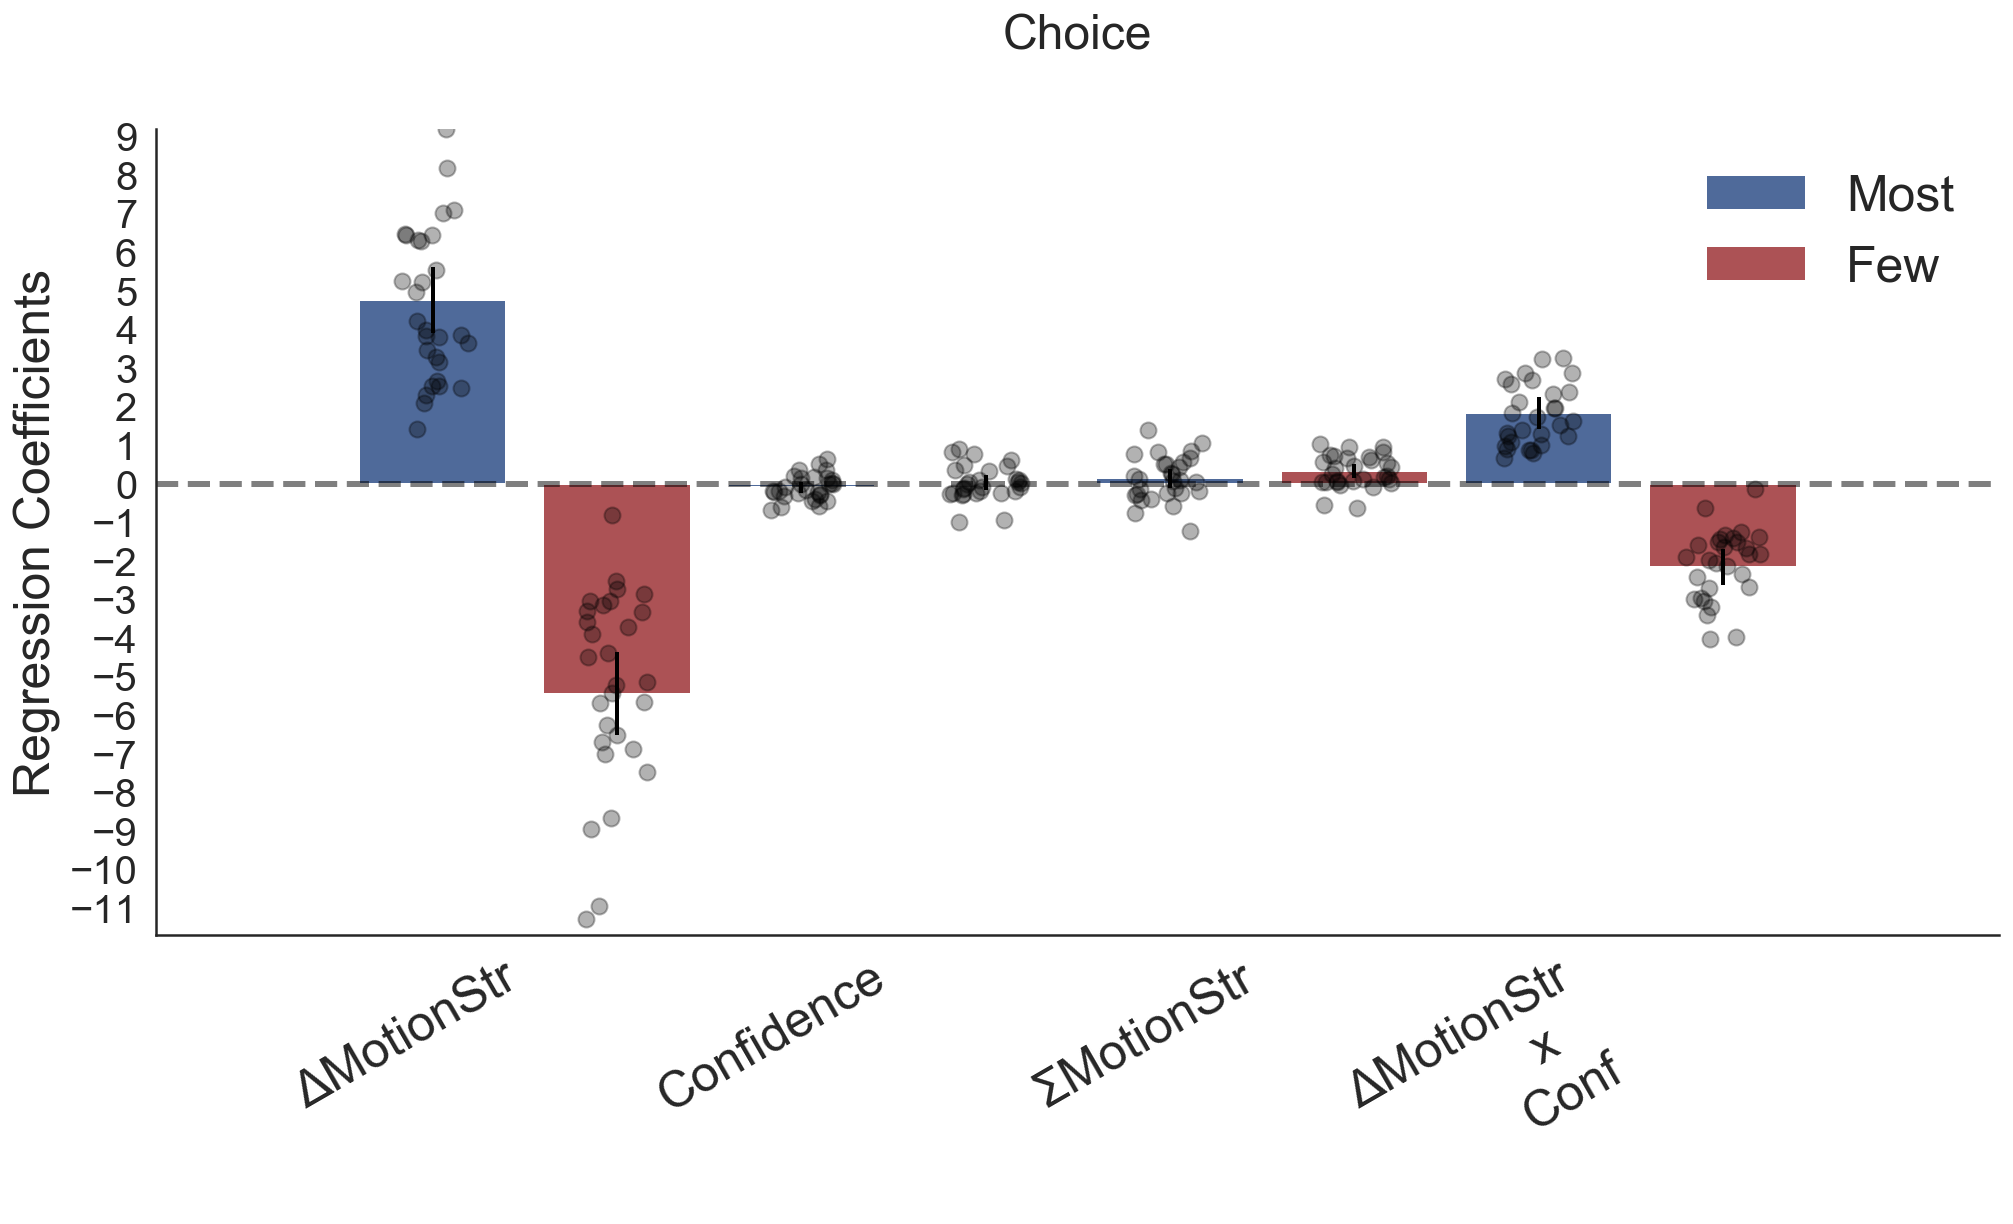

In [187]:
Coefpresplot_bar2(Choice_Like_hmodel_table, mix_Choice_Like_model,Choice_Dislike_hmodel_table, mix_Choice_Dislike_model, barcol1='#4F6A9A',barcol2='#AC5255', title='Choice', size='big',ymultiple=1, ticklabsize=20)
plt.xlim(0, 5)
#plt.savefig('SavedFigures/FF2018ChoiceRegressionLikeDislike_31.svg', format='svg', dpi = 500 )
#plt.savefig('SavedFigures/FF2018ChoiceRegressionLikeDislike_31.png', dpi = 500 )

ttestprint (Choice_Like_hmodel_table,Choice_Like_hmodel_table, mix_Choice_Like_model,mix_Choice_Dislike_model )

# Choice Regression - CoherenceSign use as Evidence

### Dislike Condition

In [131]:
%%R
#
#if (file.exists('SavedModels/HModel_Choice_Dislike_31_m1.rda')){
#    load('SavedModels/HModel_Choice_Dislike_31_m1.rda')   
#    print('  Found old parameter estimates in "SavedModels/". Skipping estimation...')
#}
#else{
# Fit binomial hierarchical model
Choice_Dislike_hmodel =  glmer(Choice ~ zCoherenceSign +zSumDot+ zConfidence + zCoherenceSign:zConfidence + 
                               (zCoherenceSign +zSumDot+ zConfidence + zCoherenceSign:zConfidence  | Part), data=data_exp1_DisLike, family='binomial',
                    control=glmerControl(optimizer="optimx", optCtrl=list(method="nlminb")))

display (Choice_Dislike_hmodel)
#save(Choice_Dislike_hmodel, file = "SavedModels/HModel_Choice_Dislike_31_m1.rda")
#}

glmer(formula = Choice ~ zCoherenceSign + zSumDot + zConfidence + 
    zCoherenceSign:zConfidence + (zCoherenceSign + zSumDot + 
    zConfidence + zCoherenceSign:zConfidence | Part), data = data_exp1_DisLike, 
    family = "binomial", control = glmerControl(optimizer = "optimx", 
        optCtrl = list(method = "nlminb")))
                           coef.est coef.se
(Intercept)                 0.90     0.49  
zCoherenceSign             -2.95     0.46  
zSumDot                    -0.01     0.06  
zConfidence                 0.69     0.23  
zCoherenceSign:zConfidence -1.32     0.22  

Error terms:
 Groups   Name                       Std.Dev. Corr                    
 Part     (Intercept)                2.42                             
          zCoherenceSign             2.16     -0.93                   
          zSumDot                    0.22      0.35 -0.29             
          zConfidence                1.07      0.98 -0.92  0.33       
          zCoherenceSign:zConfidence 1.02 

In [132]:
%%R
# If we want to see individually the value of each coefficient for the participants
#coef(Choice_Dislike_hmodel)

NULL


In [133]:
%%R
#Extract parameters
fix_Choice_Dislike_hmodel <- fixef(Choice_Dislike_hmodel)
fix_se_Choice_Dislike_hmodel <- sqrt(diag(vcov(Choice_Dislike_hmodel)))
names_Choice_Dislike_hmodel <- names(fix_Choice_Dislike_hmodel)

# Extract mixed effect paramters
mix_Choice_Dislike_model <- coef(Choice_Dislike_hmodel)

summary(Choice_Dislike_hmodel)

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: 
Choice ~ zCoherenceSign + zSumDot + zConfidence + zCoherenceSign:zConfidence +  
    (zCoherenceSign + zSumDot + zConfidence + zCoherenceSign:zConfidence |  
        Part)
   Data: data_exp1_DisLike
Control: glmerControl(optimizer = "optimx", optCtrl = list(method = "nlminb"))

     AIC      BIC   logLik deviance df.resid 
  5179.7   5315.3  -2569.8   5139.7     6476 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-7.6621 -0.4744 -0.0555  0.3836  9.2857 

Random effects:
 Groups Name                       Variance Std.Dev. Corr                   
 Part   (Intercept)                5.84435  2.4175                          
        zCoherenceSign             4.65340  2.1572   -0.93                  
        zSumDot                    0.04918  0.2218    0.35 -0.29            
        zConfidence                1.14966  1.0722    0.98 -0.92  0.3

In [156]:
%R -o fix_Choice_Dislike_hmodel -o fix_se_Choice_Dislike_hmodel -o names_Choice_Dislike_hmodel -o mix_Choice_Dislike_model

#Generate table with parameters to plot
Choice_Dislike_hmodel_table = regtable(fix_Choice_Dislike_hmodel, fix_se_Choice_Dislike_hmodel, names_Choice_Dislike_hmodel)
Choice_Dislike_hmodel_table.columns = ['Inter', 'CoherenceSign', "ΣMotionStr", 'Confidence', "CoherenceSign\n x   \nConf"]

# Extract table containing mixed effects for the model
mix_Choice_Dislike_model = mix_Choice_Dislike_model[0]

#Coefpresplot(Choice_Dislike_hmodel_table, title='', ticklabsize=16, size='narrow', ymultiple=0.5, n_ET_predictors=2)
#[i.set_color('#03719c') for i in plt.gca().get_xticklabels()[4:]]
#plt.savefig('../../figures/CoM_cut_slow_1.png', dpi=600, bbox_inches='tight')

In [157]:
Choice_Dislike_hmodel_table

Inter  CoherenceSign  ΣMotionStr  Confidence  \
coefficient  0.901834      -2.945616   -0.010635    0.694664   
se           0.490686       0.455760    0.055241    0.226797   
CImin       -0.059911      -3.838905   -0.118908    0.250142   
CImax        1.863579      -2.052327    0.097638    1.139186   

             CoherenceSign\n x   \nConf  
coefficient                   -1.318695  
se                             0.222921  
CImin                         -1.755621  
CImax                         -0.881770

### Like Condition

In [136]:
%%R
#if (file.exists('SavedModels/HModel_Choice_Like_31_m1.rda')){
#    load('SavedModels/HModel_Choice_Like_31_m1.rda')   
#    print('  Found old parameter estimates in "SavedModels/". Skipping estimation...')
#}
#else{
## Fit binomial hierarchical model
Choice_Like_hmodel =  glmer(Choice ~ zCoherenceSign +zSumDot+ zConfidence + zCoherenceSign:zConfidence+ 
                               (zCoherenceSign +zSumDot+ zConfidence + zCoherenceSign:zConfidence | Part), data=data_exp1_Like, family='binomial',
                    control=glmerControl(optimizer="optimx", optCtrl=list(method="nlminb")))
display (Choice_Like_hmodel)
#save(Choice_Like_hmodel, file = "SavedModels/HModel_Choice_Like_31_m1.rda")
#}

glmer(formula = Choice ~ zCoherenceSign + zSumDot + zConfidence + 
    zCoherenceSign:zConfidence + (zCoherenceSign + zSumDot + 
    zConfidence + zCoherenceSign:zConfidence | Part), data = data_exp1_Like, 
    family = "binomial", control = glmerControl(optimizer = "optimx", 
        optCtrl = list(method = "nlminb")))
                           coef.est coef.se
(Intercept)                -0.50     0.39  
zCoherenceSign              2.51     0.30  
zSumDot                    -0.07     0.05  
zConfidence                -0.03     0.20  
zCoherenceSign:zConfidence  1.08     0.15  

Error terms:
 Groups   Name                       Std.Dev. Corr                    
 Part     (Intercept)                1.93                             
          zCoherenceSign             1.36     -0.78                   
          zSumDot                    0.16     -0.37  0.37             
          zConfidence                0.94      0.95 -0.72 -0.54       
          zCoherenceSign:zConfidence 0.59    

In [137]:
%%R
#Extract regression parameters
fix_Choice_Like_hmodel <- fixef(Choice_Like_hmodel)
# Calculate standard error for paramters
fix_se_Choice_Like_hmodel <- sqrt(diag(vcov(Choice_Like_hmodel)))
names_Choice_Like_hmodel <- names(Choice_Like_hmodel)
summary(Choice_Like_hmodel)

# Extract mixed effect paramters
mix_Choice_Like_model <- coef(Choice_Like_hmodel)

summary(Choice_Like_hmodel)

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: 
Choice ~ zCoherenceSign + zSumDot + zConfidence + zCoherenceSign:zConfidence +  
    (zCoherenceSign + zSumDot + zConfidence + zCoherenceSign:zConfidence |  
        Part)
   Data: data_exp1_Like
Control: glmerControl(optimizer = "optimx", optCtrl = list(method = "nlminb"))

     AIC      BIC   logLik deviance df.resid 
  5017.5   5153.1  -2488.8   4977.5     6476 

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-18.6812  -0.4379  -0.0005   0.3963  10.3420 

Random effects:
 Groups Name                       Variance Std.Dev. Corr                   
 Part   (Intercept)                3.7131   1.9269                          
        zCoherenceSign             1.8431   1.3576   -0.78                  
        zSumDot                    0.0254   0.1594   -0.37  0.37            
        zConfidence                0.8919   0.9444    0.95 -0.

In [148]:
%R -o fix_Choice_Like_hmodel -o fix_se_Choice_Like_hmodel -o mix_Choice_Like_model
 #-o names_Choice_Like_hmodel 

# we use the same names that were defined for the predictors that in the dislike case, since they are the same in both cases
Choice_Like_hmodel_table = regtable(fix_Choice_Like_hmodel, fix_se_Choice_Like_hmodel, names_Choice_Dislike_hmodel)
Choice_Like_hmodel_table.columns = [ 'Inter','CoherenceSign',  "ΣMotionStr",'Confidence', "CoherenceSign\n x   \nConf"]
mix_Choice_Like_model = mix_Choice_Like_model[0]

#Coefpresplot(Choice_Like_hmodel_table, title='', ticklabsize=16, size='narrow', ymultiple=0.5, n_ET_predictors=2)
#[i.set_color('#03719c') for i in plt.gca().get_xticklabels()[4:]]
#plt.savefig('../../figures/CoM_cut_slow_1.png', dpi=600, bbox_inches='tight')


### Plotting both conditions

In [149]:
#Coefpresplot2(Choice_Like_hmodel_table,Choice_Dislike_hmodel_table, title='Choice', intercept=True, ticklabsize=16, size='big', n_ET_predictors=0)

In [150]:
#Coefpresplot_bar(Choice_Dislike_hmodel_table, mix_Choice_Dislike_model, barcol ='#AC5255' ,title='Choice', intercept=True, ticklabsize=16, size='big', n_ET_predictors=0, ylimits = (-3,4))
#Coefpresplot_bar(Choice_Like_hmodel_table, mix_Choice_Like_model, barcol ='#4F6A9A' ,title='Choice', intercept=True, ticklabsize=16, size='big', n_ET_predictors=0, ylimits = (-3,4))

In [151]:
Choice_Like_hmodel_table

Inter  CoherenceSign  ΣMotionStr  Confidence  \
coefficient -0.501019       2.510041   -0.066510   -0.032851   
se           0.390414       0.303835    0.047240    0.197951   
CImin       -1.266229       1.914524   -0.159099   -0.420836   
CImax        0.264192       3.105557    0.026080    0.355133   

             CoherenceSign\n x   \nConf  
coefficient                    1.077456  
se                             0.147542  
CImin                          0.788273  
CImax                          1.366639

In [152]:
mix_Choice_Like_model

R object with classes: ('data.frame',) mapped to:
<DataFrame - Python:0x7fbd6192b448 / R:0x7fbd1fe0a268>
[FloatVe..., FloatVe..., FloatVe..., FloatVe..., FloatVe...]
  (Intercept): <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x7fbd6195ba08 / R:0x7fbd0ff25770>
[-0.067972, -1.194865, -5.362482, -3.814811, ..., 1.081948, 0.456678, -0.288684, -0.766284]
  zCoherenceSign: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x7fbd61944c48 / R:0x7fbd0ff25890>
[1.973025, 1.761411, 5.789785, 5.082162, ..., 1.942787, 1.567867, 1.832102, 1.230292]
  zSumDot: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x7fbd61944e48 / R:0x7fbd0ff259b0>
[-0.024620, 0.026092, 0.229039, -0.072954, ..., -0.136946, -0.210209, -0.077498, -0.079051]
  zConfidence: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x7fbd6195b108 / R:0x7fbd0ff25ad0>
[0.121707, -0.726386, -2.503348, -1.402378, ..., 0.648652, 0.511757, 0.089416, -0.164784]
  zCoherenceSign:zConfidence: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x7fbd6195bd08 / R:0x7fbd0ff25bf0>
[0.771191, 0.642496, 2.290743, 2.279894, ..., 0.921407, 0.778730, 0.759023, 0.458656]

In [153]:
Choice_Dislike_hmodel_table

Inter  CoherenceSign  Confidence  ΣMotionStr  \
coefficient  0.901834      -2.945616   -0.010635    0.694664   
se           0.490686       0.455760    0.055241    0.226797   
CImin       -0.059911      -3.838905   -0.118908    0.250142   
CImax        1.863579      -2.052327    0.097638    1.139186   

             CoherenceSign\n x   \nConf  
coefficient                   -1.318695  
se                             0.222921  
CImin                         -1.755621  
CImax                         -0.881770

In [154]:
mix_Choice_Dislike_model

R object with classes: ('data.frame',) mapped to:
<DataFrame - Python:0x7fbd61d74c08 / R:0x7fbd1fde1298>
[FloatVe..., FloatVe..., FloatVe..., FloatVe..., FloatVe...]
  (Intercept): <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x7fbdb0e73808 / R:0x7fbd0ff24670>
[4.399399, 1.388260, 6.602323, 6.510119, ..., 0.348173, -0.491540, 0.124400, -1.884746]
  zCoherenceSign: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x7fbd6193ce88 / R:0x7fbd0ff24790>
[-5.743121, -2.283531, -8.219426, -7.823015, ..., -1.656274, -1.643164, -2.409681, -2.038751]
  zSumDot: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x7fbd6193c6c8 / R:0x7fbd0ff248b0>
[0.165051, 0.155328, 0.053096, 0.354139, ..., -0.015149, -0.299408, -0.111577, -0.269196]
  zConfidence: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x7fbd6193c508 / R:0x7fbd0ff249d0>
[2.389130, 0.722202, 3.308788, 2.840852, ..., 0.644396, 0.035613, 0.352525, -0.382496]
  zCoherenceSign:zConfidence: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x7fbd6195be08 / R:0x7fbd0ff24af0>
[-2.768764, -1.054259, -3.876536, -3.510604, ..., -0.897068, -0.700936, -1.046368, -0.750055]

Mismatch
---------------- SIGNIFICANT FACTOR ----------------------
Inter : MeanL = -0.48; t =  -1.39 ; p-value =0.18
Inter : MeanD = 0.86; t =  1.99 ; p-value =0.06
CoherenceSign : MeanL = 2.44; t =  10.20076 ; p-value =0.0***
CoherenceSign : MeanD = -2.86; t =  -7.53333 ; p-value =0.0***
ΣMotionStr : MeanL = -0.07; t =  -2.8 ; p-value =0.01**
ΣMotionStr : MeanD = -0.01; t =  -0.32 ; p-value =0.75
Confidence : MeanL = -0.03; t =  -0.17 ; p-value =0.87
Confidence : MeanD = 0.67; t =  3.52 ; p-value =0.0**
CoherenceSign
 x   
Conf : MeanL = 1.04; t =  10.15788 ; p-value =0.0***
CoherenceSign
 x   
Conf : MeanD = -1.28; t =  -7.10926 ; p-value =0.0***
---------------- COMPARE [ LIKE - DISLIKE ] ----------------------
Inter : MeanL = -0.48; MeanD = 0.86; [Like - Dislike] =  -1.0; t =  -1.832 ; p-value =0.078
CoherenceSign : MeanL = 2.44; MeanD = -2.86062; [Like - Dislike] =  5.0; t =  8.91898 ; p-value =0.0***
ΣMotionStr : MeanL = -0.07; MeanD = -0.01; [Like - Dislike] =  -0.0; t =  -1.47

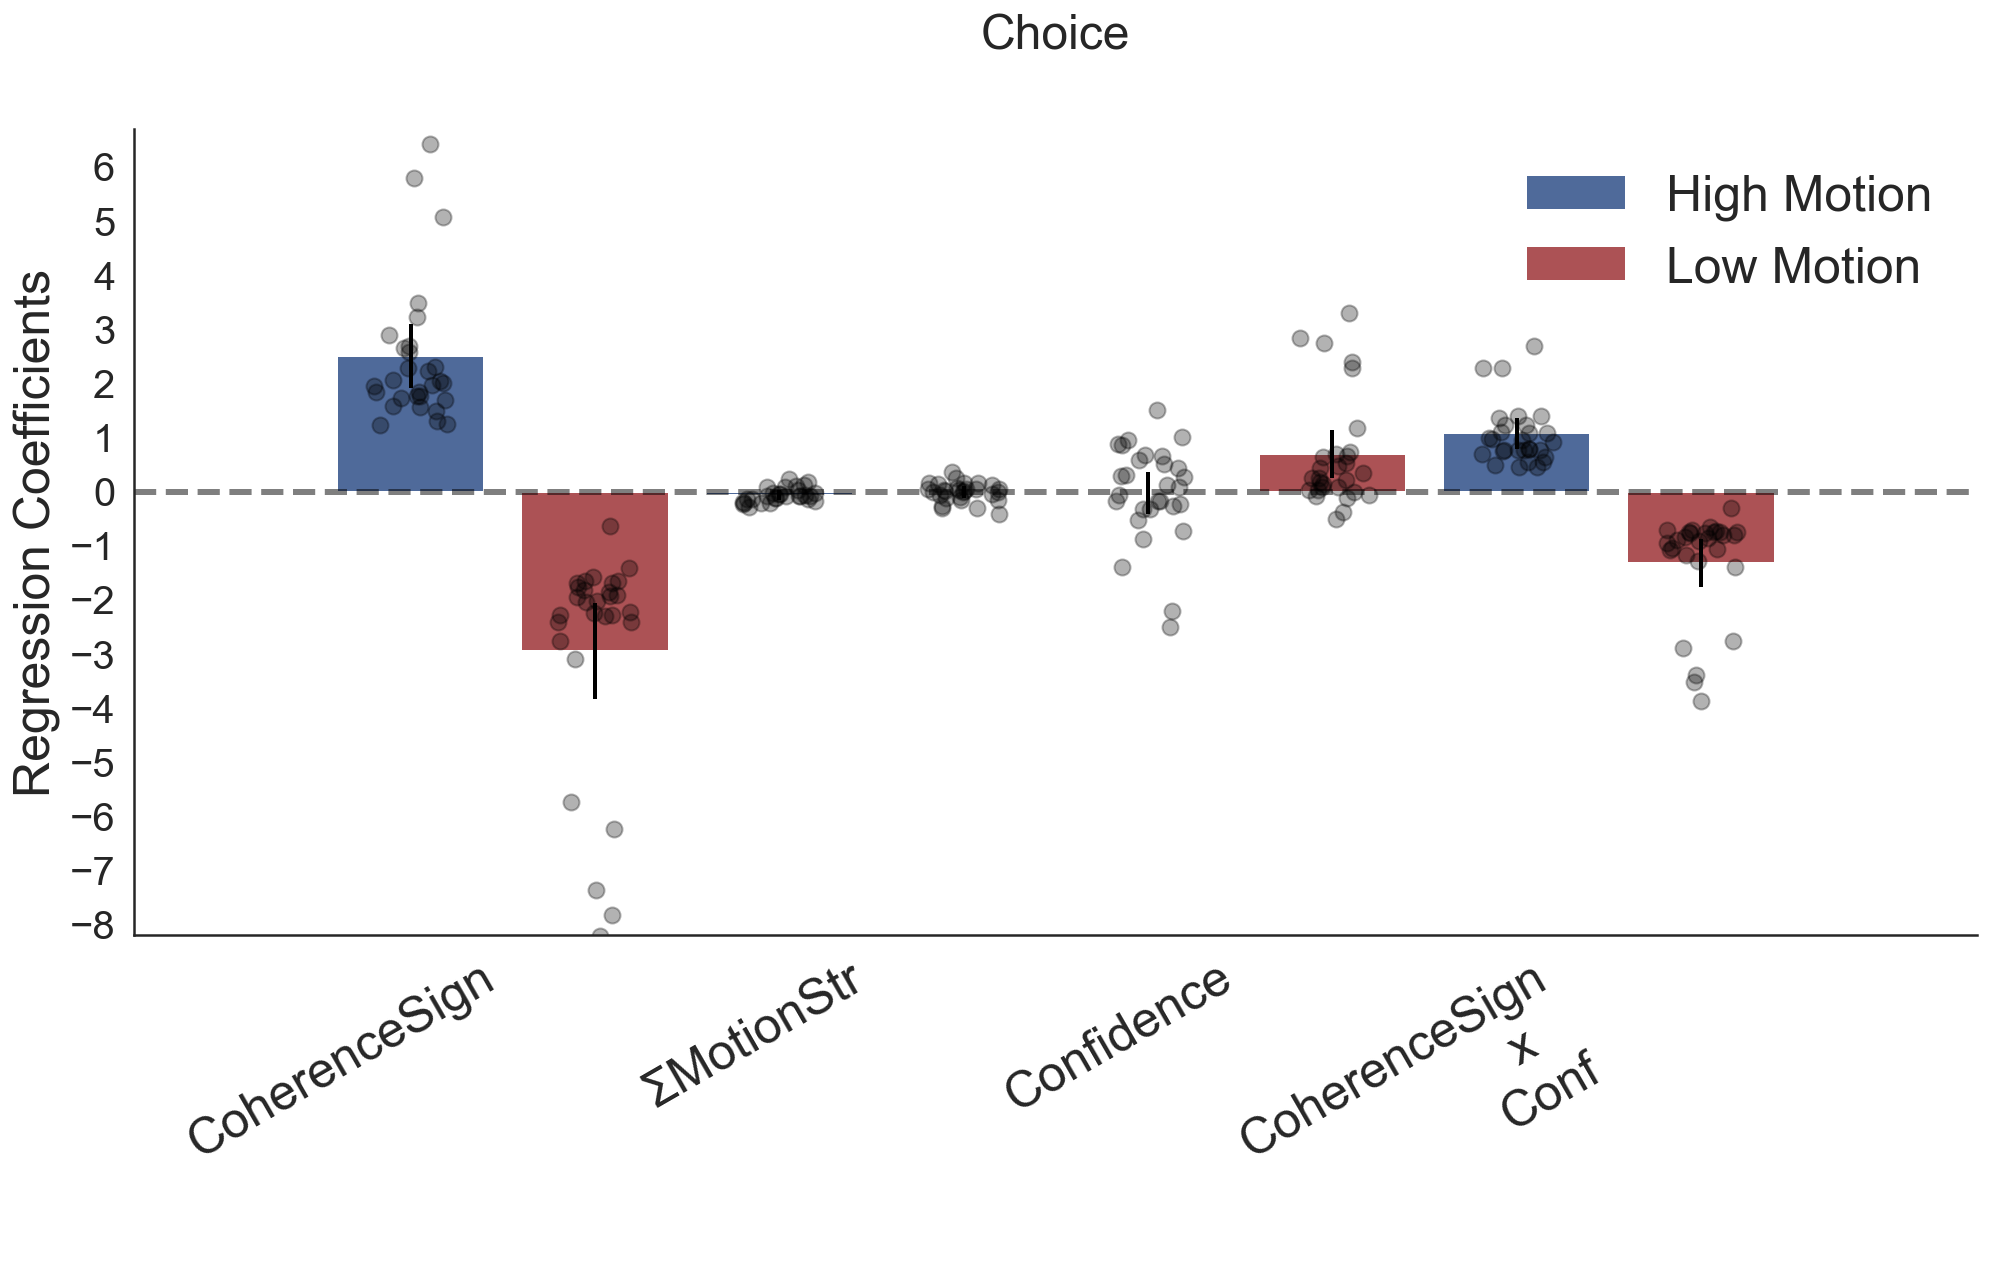

In [159]:
Coefpresplot_bar2(Choice_Like_hmodel_table, mix_Choice_Like_model,Choice_Dislike_hmodel_table, mix_Choice_Dislike_model, barcol1='#4F6A9A',barcol2='#AC5255', title='Choice', size='big',ymultiple=1, ticklabsize=20,labels = ['High Motion','Low Motion'])
plt.xlim(0, 5)
#plt.savefig('SavedFigures/FF2018ChoiceRegressionLikeDislike_31.svg', format='svg', dpi = 500 )
#plt.savefig('SavedFigures/FF2018ChoiceRegressionLikeDislike_31.png', dpi = 500 )

ttestprint (Choice_Like_hmodel_table,Choice_Like_hmodel_table, mix_Choice_Like_model,mix_Choice_Dislike_model )

## Apendix Functions

In [1]:
import numpy as np
import pandas as pd
from pandas.core.frame import DataFrame as DF

import seaborn as sns
sns.set(color_codes=True)
#np.random.seed(sum(map(ord, "distributions")))
from sklearn import linear_model  # packages for the logistic regression function to plot the logistic regression 
from sklearn.linear_model import LogisticRegression # packages for the logistic regression function to plot the logistic regression 
import scipy
from scipy import stats, integrate
from scipy.stats import mode
from scipy.stats.stats import pearsonr # Pearson's correlation
from copy import copy as copy
import operator as operator
import pylab

# Plotting tools
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
%pylab inline
figsize(5, 5)

import glob

import os
# Added to avoid OMP:error#15
os.environ['KMP_DUPLICATE_LIB_OK']='True'


Populating the interactive namespace from numpy and matplotlib


/Users/pradyumna/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['copy', 'pylab']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
def logisticplot_all (data, xaxis='zDV', yaxis='G_choice', ylab='P(Chose Reference Item)', xlab='DV (Z-score)',
                 modlowcol='#AAAAAA', title='empty', parvar='SubNo'):
    
    sns.set(font_scale=1.5, style='white')
    fig = figure(figsize=(7,7))
    fig.set_facecolor('white')
    
    # defining the sigmoid function
    def model(x):
        y = 1 / (1 + np.exp(-x))
        return y
    
    sub = plt.subplot()

    #run the classifier
    clf = linear_model.LogisticRegression(C=1e5)

    logit_all = {}

    # I think this defines the problem space
    X_test = np.linspace(-120,120,300)

   #fitting the predictive logistic model for all the trials, for a participant specified by x
            # first I specify the value difference right - left, then I specify the choices, left or right
    clf.fit(data[xaxis][:, np.newaxis],
            data[yaxis])
    logit_all = model(X_test * clf.coef_ + clf.intercept_).ravel()

    print ('Logit coef =',clf.coef_, '; Intercept: ', clf.intercept_)
    
    all_coef = clf.coef_
    all_intercept = clf.intercept_
    
    #Plotting the predictive lines
    line_all = sub.plot(X_test, logit_all, color=modlowcol, linewidth=3, zorder=5,linestyle='-')

   # #Plotting the binned data
   # data['DVBin2'] = data.groupby(parvar).apply(parsplit, input=xaxis, quantiles=4).values
    
   # # determine the x coordinates
   # x_cords= data.groupby('DVBin2')[xaxis].mean()
    
   # # determine low y coordinates
   # y_cords_low = data.loc[(data[moderator]==0), :].groupby('DVBin2')[yaxis].mean().values
    
   # # determine low y standard errors
   # test = pd.DataFrame(data.loc[(data[moderator]==0), :].groupby(['DVBin2', parvar])[yaxis].mean()).reset_index()
   # y_low_error = test.groupby('DVBin2')[yaxis].std()/np.sqrt(len(test[parvar].unique()))
    
    
   # # determine high y coordinates
   # y_cords_high = data.loc[(data[moderator]==1), :].groupby('DVBin2')[yaxis].mean().values
    
   # # determine high y standard errors
   # test2 = pd.DataFrame(data.loc[data[moderator]==1, :].groupby(['DVBin2', parvar])[yaxis].mean()).reset_index()
   # y_high_error = test2.groupby('DVBin2')[yaxis].std()/np.sqrt(len(test[parvar].unique()))
    
   # # plot the low points
   # plt.scatter(x_cords, y_cords_low, c=modlowcol, marker='D', s=60, zorder=1)
   # # plot low error bars
   # plt.errorbar(x_cords, y_cords_low, yerr=y_low_error, fmt='o', zorder=3, c=modlowcol)
    
   # # plot the high points
   # plt.scatter(x_cords, y_cords_high, c=modhighcol, marker='o', s=60, zorder=2)
   # # plot high error bars
   # plt.errorbar(x_cords, y_cords_high, yerr=y_high_error, fmt='o', zorder=4, c=modhighcol)
    
    
    # Set Labels
    sub.set_ylabel(ylab, fontsize=25)
    sub.set_xlabel(xlab, fontsize=25)

    # Set Ticks
    #sub.set_xticks((-5,-3,-1,1,3,5))
    sub.set_yticks((0,0.25,0.5,0.75,1))
    sub.tick_params(axis='both', which='major', labelsize=20)

    # Set Limits
    sub.set_ylim(-0.01, 1.01)
    sub.set_xlim(-10, 10)

    # Set Title
    if title == 'empty':
        sub.set_title('')
    else:
        sub.set_title(title)
    
    #sub.legend(loc=0, prop={'size':20})
    sns.despine()

In [3]:
def logisticplot_all_part (data, xaxis='zDV', yaxis='G_choice', ylab='P(Chose Reference Item)', xlab='DV (Z-score)',
                 modlowcol='#AAAAAA', title='empty', parvar='SubNo'):
    
    fig = figure(figsize=(30,20))
    fig.set_facecolor('white')
    
    
    # Counter to know where to plot the particpant
    order = 1
    # Initialize the array to store coefs
 
    # a list of all the participants in the dataset
    participants = data.loc[:, 'Part'].unique()

    
    for x in participants:

            sub={}
            sub['%s' % x] = plt.subplot(int(len(participants)/6+1), 6, order)

            data_in = data.loc[data['Part'] == x]
            sns.set(font_scale=1.5, style='white')
            
            # defining the sigmoid function
            def model(x):
                y = 1 / (1 + np.exp(-x))
                return y

            sub['%s' % x].set_title('participant %s' % x)


            #run the classifier
            clf = linear_model.LogisticRegression(C=1e5)

            logit_all = {}

            # I think this defines the problem space
            X_test = np.linspace(-10,10,300)

           #fitting the predictive logistic model for all the trials, for a participant specified by x
                    # first I specify the value difference right - left, then I specify the choices, left or right
            clf.fit(data_in[xaxis][:, np.newaxis],
                    data_in[yaxis])
            logit_all = model(X_test * clf.coef_ + clf.intercept_).ravel()

            print ('Part: ',x ,':logit coef =',clf.coef_, '; Intercept: ', clf.intercept_)

            all_coef = clf.coef_
            all_intercept = clf.intercept_

            #Plotting the predictive lines
            line_all = sub['%s' % x].plot(X_test, logit_all, color=modlowcol, linewidth=3, linestyle='-')
            #line_all = sub['%s' % x].plot(X_test, logit_all, color="#000000", linewidth=3, label=modlow, zorder=5,linestyle='--')

           # #Plotting the binned data
           # data['DVBin2'] = data.groupby(parvar).apply(parsplit, input=xaxis, quantiles=4).values

           # # determine the x coordinates
           # x_cords= data.groupby('DVBin2')[xaxis].mean()

           # # determine low y coordinates
           # y_cords_low = data.loc[(data[moderator]==0), :].groupby('DVBin2')[yaxis].mean().values

           # # determine low y standard errors
           # test = pd.DataFrame(data.loc[(data[moderator]==0), :].groupby(['DVBin2', parvar])[yaxis].mean()).reset_index()
           # y_low_error = test.groupby('DVBin2')[yaxis].std()/np.sqrt(len(test[parvar].unique()))

    
           # # determine high y coordinates
           # y_cords_high = data.loc[(data[moderator]==1), :].groupby('DVBin2')[yaxis].mean().values

           # # determine high y standard errors
           # test2 = pd.DataFrame(data.loc[data[moderator]==1, :].groupby(['DVBin2', parvar])[yaxis].mean()).reset_index()
           # y_high_error = test2.groupby('DVBin2')[yaxis].std()/np.sqrt(len(test[parvar].unique()))

           # # plot the low points
           # plt.scatter(x_cords, y_cords_low, c=modlowcol, marker='D', s=60, zorder=1)
           # # plot low error bars
           # plt.errorbar(x_cords, y_cords_low, yerr=y_low_error, fmt='o', zorder=3, c=modlowcol)

           # # plot the high points
           # plt.scatter(x_cords, y_cords_high, c=modhighcol, marker='o', s=60, zorder=2)
           # # plot high error bars
           # plt.errorbar(x_cords, y_cords_high, yerr=y_high_error, fmt='o', zorder=4, c=modhighcol)

    
            # Set Labels
            #sub['%s' % x].set_ylabel(ylab, fontsize=30)
           # sub['%s' % x].set_xlabel(xlab, fontsize=30)

            # Set Ticks
           # sub['%s' % x].set_xticks((-5,-3,-1,1,3,5))
            sub['%s' % x].set_yticks((0,0.25,0.5,0.75,1))
            sub['%s' % x].tick_params(axis='both', which='major', labelsize=20)

            # Set Limits
            sub['%s' % x].set_ylim(-0.01, 1.01)
            sub['%s' % x].set_xlim(-10, 10)
            order += 1


    fig.text(0.5, 0.0, xlab, fontsize= 30, ha='center')
    fig.text(0.0, 0.5, ylab,fontsize= 30, va='center', rotation='vertical')
    
    #sub.legend(loc=0, prop={'size':20})
    fig.suptitle(title, fontsize = 25)

    
    sns.despine()

In [4]:
def participant_densities(data, var, xlim=(0,100), rug=True, title = ''):
    # a counter that tells us where a given participant's data should be plotted
    order = 1

    # a list of all the participants in the dataset
    participants = data.loc[:, 'Part'].unique()

    # defining the figure size
    sns.set_style('white')
    fig = figure(figsize=(30,20))

    for x in participants:
        # defining the sub figures
            sub={}
            sub['%s' % x] = plt.subplot(len(participants)/2, 4, order)
            sns.kdeplot(data.loc[data['Part'] == x, var].values, ax = sub['%s' % x], shade=True)
            if rug==True:
                sns.rugplot(data.loc[data['Part'] == x, var].values, ax = sub['%s' % x])
            sub['%s' % x].set_title('participant %s' % x)
            #sub['%s' % x].set_xlim(xlim)
            order += 1
    fig.suptitle(title, fontsize = 25)


In [5]:
def participant_histogram(data, var, xlim=(0,100), rug=True, title = ''):
    # a counter that tells us where a given participant's data should be plotted
    order = 1

    # a list of all the participants in the dataset
    participants = data.loc[:, 'Part'].unique()

    # defining the figure size
    sns.set_style('white')
    fig = figure(figsize=(30,20))

    for x in participants:
        # defining the sub figures
            sub={}
            sub['%s' % x] = plt.subplot(len(participants)/2, 4, order)
            sns.distplot(data.loc[data['Part'] == x, var].values, ax = sub['%s' % x])
            #if rug==True:
            #    sns.rugplot(data.loc[data['Part'] == x, var].values, ax = sub['%s' % x])
            sub['%s' % x].set_title('participant %s' % x)
            #sub['%s' % x].set_xlim(xlim)
            order += 1
    fig.suptitle(title, fontsize = 25)


In [6]:
def z_score1(data_all, part_def,z_score_var):
    z_matrix=[]
    z_matrix_aux=[]

    for i in (data_all[part_def].unique()):
        Choicedata = data_all.loc[data_all[part_def] == i]    
    
        pX_A= pd.to_numeric(Choicedata[z_score_var]).values
        pX_zA= (pX_A - np.mean(pX_A))/np.std(pX_A)

        z_matrix_aux= pX_zA
    
        for  j in range(len(z_matrix_aux)):    
            z_matrix.append(z_matrix_aux[j])
    return z_matrix

In [7]:
def parsplit(DF, input, quantiles):
    qvalues = pd.qcut(DF[input], quantiles, labels = range(1, quantiles+1))
    return qvalues

def logisticplot_all_split (moderator, modhigh, modlow, data, xaxis='zDV', yaxis='G_choice', ylab='P(Chose Reference Item)', xlab='DV (Z-score)',
                 modhighcol='#000000', modlowcol='#AAAAAA', title='empty', parvar='SubNo'):
    
    sns.set(font_scale=1.5, style='white')
    fig = figure(figsize=(6,5))
    fig.set_facecolor('white')
    
    # defining the sigmoid function
    def model(x):
        y = 1 / (1 + np.exp(-x))
        return y
    
    sub = plt.subplot()


    #run the classifier
    clf = linear_model.LogisticRegression(C=1e5)

    # Paula used these dictionaries to store the values of the predictive lines for all the participants.
    logit_low = {}
    logit_high = {}

    # I think this defines the problem space
    X_test = np.linspace(-5,10,300)

    # fitting the predictive logistic model for the low_confidence trials, for a participant specified by x
    # first I specify the value difference right - left, then I specify the choices, left or right
    clf.fit(data.loc[data[(data[moderator]==0)].index, xaxis][:, np.newaxis],
            data.loc[data[(data[moderator]==0)].index, yaxis])
    logit_low = model(X_test*clf.coef_ + clf.intercept_).ravel()

    print ('Low measure:logit coef =',clf.coef_, '; Intercept: ', clf.intercept_)


    # fitting the predictive logistic model for the high_confidence trials, for a participant specified by x
    # first I specify the value difference right - left, then I specify the choices, left or right
    clf.fit(data.loc[data[(data[moderator]==1)].index, xaxis][:, np.newaxis],
            data.loc[data[(data[moderator]==1)].index, yaxis])
    logit_high = model(X_test * clf.coef_ + clf.intercept_).ravel()
    
    print ('high measure:logit coef =',clf.coef_, '; Intercept: ', clf.intercept_)

    
    
    #Plotting the predictive lines
    line_high = sub.plot(X_test, logit_high, color=modhighcol, linewidth=5, label=modhigh, zorder=6)
    line_low = sub.plot(X_test, logit_low, color=modlowcol, linewidth=5, label=modlow, zorder=5)


    #Plotting the binned data
    data['DVBin2'] = data.groupby(parvar).apply(parsplit, input=xaxis, quantiles=4).values
    
    # determine the x coordinates
    x_cords= data.groupby('DVBin2')[xaxis].mean()
    
    # determine low y coordinates
    y_cords_low = data.loc[(data[moderator]==0), :].groupby('DVBin2')[yaxis].mean().values
    
    # determine low y standard errors
    test = pd.DataFrame(data.loc[(data[moderator]==0), :].groupby(['DVBin2', parvar])[yaxis].mean()).reset_index()
    y_low_error = test.groupby('DVBin2')[yaxis].std()/np.sqrt(len(test[parvar].unique()))
    
    
    # determine high y coordinates
    y_cords_high = data.loc[(data[moderator]==1), :].groupby('DVBin2')[yaxis].mean().values
    
    # determine high y standard errors
    test2 = pd.DataFrame(data.loc[data[moderator]==1, :].groupby(['DVBin2', parvar])[yaxis].mean()).reset_index()
    y_high_error = test2.groupby('DVBin2')[yaxis].std()/np.sqrt(len(test[parvar].unique()))
    
    # plot the low points
    plt.scatter(x_cords, y_cords_low, c=modlowcol, marker='D', s=60, zorder=1)
    # plot low error bars
    plt.errorbar(x_cords, y_cords_low, yerr=y_low_error, fmt='o', zorder=3, c=modlowcol)
    
    # plot the high points
    plt.scatter(x_cords, y_cords_high, c=modhighcol, marker='o', s=60, zorder=2)
    # plot high error bars
    plt.errorbar(x_cords, y_cords_high, yerr=y_high_error, fmt='o', zorder=4, c=modhighcol)
    
    
    # Set Labels
    sub.set_ylabel(ylab, fontsize=28)
    sub.set_xlabel(xlab, fontsize=28)

    # Set Ticks
    sub.set_xticks((-5,-3,-1,1,3,5))
    sub.set_yticks((0,0.25,0.5,0.75,1))
    sub.tick_params(axis='both', which='major', labelsize=20)

    # Set Limits
    sub.set_ylim(-0.01, 1.01)
    sub.set_xlim(-5, 5)

    # Set Title
    if title == 'empty':
        sub.set_title('')
    else:
        sub.set_title(title)
    
    leg = sub.legend(loc=0, prop={'size':20})
    leg.get_frame().set_linewidth(0.0)

    sns.despine()

In [8]:
def splitByVar(new_data, Splits_variables,Splits_headers,participant_var,trial_var):

    median_matrix=[]
    median_matrix_aux=[]
    median_matrix_aux_cond=[]
    Split_cols = []
    
    for h in range(len(Splits_variables)):
        median_matrix=[]
        for i in np.unique(new_data[participant_var]):
                median_matrix_aux=[]
    
                #for j in np.unique(new_data["BlockCond"]):
                #median_matrix_aux_cond=[]
    
                #Extract data by participant and BlockCond (1: Like, 2: Dislike)
                Splitdata = new_data.loc[new_data[participant_var] == i]
               # Splitdata = Splitdata.loc[Splitdata['BlockCond'] == j]
                
                # Select the column to split
                Splitdata = Splitdata.loc[:,[trial_var,Splits_variables[h]]]
                SplitSort = Splitdata.values
                # Sort for confidence column
                SplitSort = SplitSort[np.argsort(SplitSort[:, 1])]
                #print(SplitSort)
                lenPart = len(Splitdata)
                #print(lenPart)
                # Generate column with median order
                median_low = [0] * int (lenPart/2)
                #print (median_low)
                median_high = [1] * int (lenPart/2)
                
                # corroborate the same size for both splits, if not add one extra
                if (len(median_high) + len(median_low))< lenPart:
                    median_high.append(1)
                
                #print (median_high)
                median_split_order = median_low + median_high
                
                #Attach split median order column (1 and 0)
                median_aux= np.column_stack((SplitSort,median_split_order))
                #Sort back to trial number
                SplitSorted = median_aux[np.argsort(median_aux[:, 0])]
                #print(len(SplitSorted))
                
                for kk in range(len(SplitSorted)): 
                    if len(median_matrix_aux) == 0 :
                        median_matrix_aux = SplitSorted[0]
                    else:
                        median_matrix_aux = np.vstack([median_matrix_aux, SplitSorted[kk]])
            
                #print(len(median_matrix_aux))
                # sort after adding both conditions    
                median_matrix_aux = median_matrix_aux[np.argsort(median_matrix_aux[:, 0])]
                
                #Extract only the column with the median split information
                median_matrix_aux = median_matrix_aux[:,2]
                
                #append to median matrix for the participants
                for k in range(len(median_matrix_aux)):    
                    median_matrix.append(median_matrix_aux [k])
        
        #median_matrix = pd.DataFrame(median_matrix,columns=[Splits_headers[h]])
        #print(len (median_matrix))
        #add new column (new split variable columns) to the split matrix
        if  h == 0:
            Split_cols = median_matrix
        else:
            Split_cols = pd.concat([Split_cols,median_matrix ],axis =1)
    return Split_cols

In [17]:
import rpy2

%load_ext rpy2.ipython
# Set up interface with R
# Make it easy to set and find values in a multi-index DF
idx = pd.IndexSlice
# Set up interface with R
%config InlineBackend.figure_format = 'retina'
import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore", category=RRuntimeWarning)


The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [10]:
%%R
library(lme4)
#library(car)
library(optimx)
#library(ggplot2)
library(MASS)
#library(broom)
#library(dplyr)
library(reshape2)
library(arm)
library(multcomp)
library(pbkrtest)

R[write to console]: Loading required package: Matrix

R[write to console]: 
arm (Version 1.10-1, built: 2018-4-12)


R[write to console]: Working directory is /Users/pradyumna/Documents/GiTs/FrameRDM_Online2020/Analysis


R[write to console]: Loading required package: mvtnorm

R[write to console]: Loading required package: survival

R[write to console]: Loading required package: TH.data

R[write to console]: 
Attaching package: ‘TH.data’


R[write to console]: The following object is masked from ‘package:MASS’:

    geyser




In [11]:
def Coefpresplot_bar2(regtable1, mixtable1,regtable2, mixtable2, intercept=False, barcol1='#000000',barcol2='#000000', title='Regression Coefficients', size='big', ylimits=(), ymultiple=0.5, ticklabsize=25, n_ET_predictors = 0, hatch2 ='',labels = ['',''] ):

    # Import itertools so that we can iterate through the colours
    import itertools
    
    # Import locators so that we can tidy up the yaxis
    from matplotlib.ticker import MultipleLocator, FormatStrFormatter
    
    # rounding function to get edges to even 0.5 values
    def round_to(n, precision):
        correction = 0.5 if n >= 0 else -0.5
        return int( n/precision+correction ) * precision

    def round_to_5(n):
        return round_to(n, 0.5)
            
    # Set seaborn style for the plot
    sns.set(style='white')
    
    bar_sep= 0.25
    
    # Generate the figure
    if size=='big':
        fig = plt.figure(figsize=[20,8])
    elif size=='long':
        fig = plt.figure(figsize=[20,4])
    elif size=='narrow':
        fig = plt.figure(figsize=[10,4])
        
    fig.suptitle(title, fontsize=24)
    gs = GridSpec(1,1,bottom=0.18,left=0.18,right=0.82)
    ax = fig.add_subplot(gs[0,0])
    
    # Set axis limits based on whether to include the intercept or not   
    # Assumuing that regtable1 and regtable2 have exactly the same number of coefficients
    if intercept == True:
        XLim = (0, len(regtable1.columns) + 2)
        YLim = (round_to_5(np.min([mixtable1,mixtable2]))-0.2, round_to_5(np.max([mixtable1,mixtable2]))+0.2)
    else:
        XLim = (0, len(regtable1.columns) +1)
        YLim = (round_to_5(np.min([mixtable1,mixtable2]))-0.2, round_to_5(np.max([mixtable1,mixtable2]))+0.2)
    if ylimits != ():
        YLim = ylimits
    ax.set_xlim(XLim)
    ax.set_ylim(YLim)
    
    # Draw a line through the 0-value on the y-axis
    line = ax.plot(XLim, [0, 0], color='black', ls='--', alpha = 0.5, lw=3)
    
    
    # If intercept is true, plot the coefficient for the intercept
    # Assumuing that regtable1 and regtable2 have exactly the same number of coefficients

    if intercept == True:
        Coefficients = regtable1.columns
    else:
        if len(regtable1.columns)<len(mixtable1):
            Coefficients = regtable1.columns
        else:
            Coefficients = regtable1.columns[1:]
        
    # Determine the colours for the coefficients based on the n_ET_variable
    n_predictors = len(Coefficients)
    n_non_ET_predictors = n_predictors - n_ET_predictors
    
    # Color for conditions 1 and 2
    colourlist1 = [barcol1] * n_non_ET_predictors + ['#03719c'] * n_ET_predictors
    colourlist2 = [barcol2] * n_non_ET_predictors + ['#03719c'] * n_ET_predictors
    
        
    # Plot all the coefficients with 95% CI
    position = 0
    for Coefficient in Coefficients:
        position += 1
        # Plot condition 1
        ax.bar(position-bar_sep, regtable1.loc['coefficient', Coefficient], width=0.4,color=colourlist1[position-1],)
        ax.errorbar(position-bar_sep, regtable1.loc['coefficient', Coefficient],
                    yerr=regtable1.loc['se', Coefficient]*1.96, lw=2, color='#000000')

        # Plot condition 2
        ax.bar(position+bar_sep, regtable2.loc['coefficient', Coefficient], width=0.4,color=colourlist2[position-1],)
        ax.errorbar(position+bar_sep, regtable2.loc['coefficient', Coefficient],
                    yerr=regtable2.loc['se', Coefficient]*1.96, lw=2, color='#000000')

        
   # Plot dots for the individual coefficients
    # Assumuing that mixtable1 and mixtable2 have exactly the same number of elements 
    
    if intercept == True:
        coef_num = range(0,len(mixtable1)) 
    else:
        coef_num = range(1,len(mixtable1))
        
    for i in coef_num:
        # Plot dots condition 1
        part_coefs = mixtable1[i]
        position_parts= np.full(len(part_coefs), i, dtype=int)
        jittr = np.random.uniform(low=-0.2,high=0.2,size=len(part_coefs))/2
        ax.plot(position_parts-bar_sep+jittr, part_coefs, marker='o', ms=8, color='#000000',alpha=0.3,linestyle="None")

        # Plot dots condition 1
        part_coefs = mixtable2[i]
        position_parts= np.full(len(part_coefs), i, dtype=int)
        jittr = np.random.uniform(low=-0.2,high=0.2,size=len(part_coefs))/2
        ax.plot(position_parts+bar_sep+jittr, part_coefs, marker='o', ms=8, color='#000000',alpha=0.3,linestyle="None")
        

    # Setting the x-axis major tick's location
    ax.set_xticks(range(1, position+1))
    
    # set the y-axis major tick position
    ax.yaxis.set_major_locator(MultipleLocator(ymultiple))


    # Setting the x-axis major tick's label
    if intercept == True:
        ax.set_xticklabels(regtable1.columns, rotation=0)        
    else:
        if len(regtable1.columns)<len(mixtable1):
            ax.set_xticklabels(regtable1.columns, rotation=0)
        else:    
            ax.set_xticklabels(regtable1.columns[1:], rotation=0)
    
    ax.tick_params(axis='both', which='major', labelsize=ticklabsize)
    ax.set_ylabel('Regression Coefficients', fontsize=25)
    ax.xaxis.set_tick_params(labelsize=25)

    
    # Autoformats the ticklabels for the xaxis
    fig.autofmt_xdate()
    

    patch1 = mpatches.Patch(facecolor=colourlist1[position-1],hatch=r'', label=labels[0])
    patch2 = mpatches.Patch(facecolor=colourlist2[position-1],hatch=r'', label=labels[1])

    leg = plt.legend(handles=[patch1,patch2],fontsize=25)
    leg.get_frame().set_facecolor('none')
    leg.get_frame().set_linewidth(0.0)
    
    
    sns.despine()

In [12]:
def regtable(fix, fix_se, names):
    fixed_betas = DF(np.array(fix)); fixed_betas = fixed_betas.transpose(); fixed_betas.columns = names
    fixed_betas.loc[1] = np.array(fix_se)
    fixed_betas.loc[2] = fixed_betas.loc[0] - (fixed_betas.loc[1]*1.96)
    fixed_betas.loc[3] = fixed_betas.loc[0] + (fixed_betas.loc[1]*1.96)
    fixed_betas.index = ['coefficient', 'se', 'CImin', 'CImax']
    return fixed_betas

In [13]:
def ttestprint (Choice_Like_hmodel_table,Choice_Dislike_hmodel_table, mix_Choice_Like_model,mix_Choice_Dislike_model):
    a = 1
    if len(Choice_Like_hmodel_table.columns) >= len(mix_Choice_Like_model):
        print ("Mismatch")
        a = 0
    
    print ("---------------- SIGNIFICANT FACTOR ----------------------")
    
    for i in range(len(Choice_Like_hmodel_table.columns)):
        param_name = Choice_Like_hmodel_table.columns[i + a]
        part_coefs_like = mix_Choice_Like_model[i ]
    
        [s, p] = stats.ttest_1samp(part_coefs_like,0)
        if p<0.001:
            print (param_name + " : MeanL = "+ str(round(mean(part_coefs_like),2))+ "; t =  " + str(round(s,5)) + " ; p-value =" + str(round(p,5))+ "***")
        elif p<0.01:
            print (param_name + " : MeanL = "+ str(round(mean(part_coefs_like),2))+ "; t =  " + str(round(s,2)) + " ; p-value =" + str(round(p,2))+ "**")
        elif p<0.05:
            print (param_name + " : MeanL = "+ str(round(mean(part_coefs_like),2))+ "; t =  " + str(round(s,2)) + " ; p-value =" + str(round(p,2))+ "*")
        else:
            print (param_name + " : MeanL = "+ str(round(mean(part_coefs_like),2))+ "; t =  " + str(round(s,2)) + " ; p-value =" + str(round(p,2)))
    
      
        part_coefs_dislike = mix_Choice_Dislike_model[i + a]
    
        [s, p] = stats.ttest_1samp(part_coefs_dislike,0)
        if p<0.001:
            print (param_name + " : MeanD = "+ str(round(mean(part_coefs_dislike),2))+ "; t =  " + str(round(s,5)) + " ; p-value =" + str(round(p,5)) + "***")        
        elif p<0.01:
            print (param_name + " : MeanD = "+ str(round(mean(part_coefs_dislike),2))+ "; t =  " + str(round(s,2)) + " ; p-value =" + str(round(p,2)) + "**")
        elif p<0.05:
            print (param_name + " : MeanD = "+ str(round(mean(part_coefs_dislike),2))+ "; t =  " + str(round(s,2)) + " ; p-value =" + str(round(p,2)) + "*")
        else:
            print (param_name + " : MeanD = "+ str(round(mean(part_coefs_dislike),2))+ "; t =  " + str(round(s,2)) + " ; p-value =" + str(round(p,2)))
        
        
    print ("---------------- COMPARE [ LIKE - DISLIKE ] ----------------------")
    
    for i in range(len(Choice_Like_hmodel_table.columns)):
        param_name = Choice_Like_hmodel_table.columns[i]
        part_coefs_like = mix_Choice_Like_model[ i + a]
        part_coefs_dislike = mix_Choice_Dislike_model[ i + a ]
                
        diff = mean(part_coefs_like) - mean(part_coefs_dislike)
        [s, p] = stats.ttest_rel(part_coefs_like,part_coefs_dislike)
        if p<0.001:
            print (param_name + " : MeanL = "+ str(round(mean(part_coefs_like),2))+ "; MeanD = "+ str(round(mean(part_coefs_dislike),5))+"; [Like - Dislike] =  " + str(round(diff)) +"; t =  " + str(round(s,5)) + " ; p-value =" + str(round(p,5))+ "***" )        
        elif p<0.01:
            print (param_name + " : MeanL = "+ str(round(mean(part_coefs_like),2))+ "; MeanD = "+ str(round(mean(part_coefs_dislike),2))+"; [Like - Dislike] =  " + str(round(diff)) +"; t =  " + str(round(s,3)) + " ; p-value =" + str(round(p,3))+ "**" )
        elif p<0.05:
            print (param_name + " : MeanL = "+ str(round(mean(part_coefs_like),2))+ "; MeanD = "+ str(round(mean(part_coefs_dislike),2))+"; [Like - Dislike] =  " + str(round(diff)) +"; t =  " + str(round(s,3)) + " ; p-value =" + str(round(p,3))+ "*" )
        else:
            print (param_name + " : MeanL = "+ str(round(mean(part_coefs_like),2))+ "; MeanD = "+ str(round(mean(part_coefs_dislike),2))+"; [Like - Dislike] =  " + str(round(diff)) +"; t =  " + str(round(s,3)) + " ; p-value =" + str(round(p,3)) )
            
    print ("---------------- MAGNITUDE [ LIKE - DISLIKE ] ----------------------")
    
    for i in range(len(Choice_Like_hmodel_table.columns)):
        param_name = Choice_Like_hmodel_table.columns[i]
        part_coefs_like = mix_Choice_Like_model[ i + a]
        part_coefs_dislike = mix_Choice_Dislike_model[ i + a ]
                
        diff = mean(np.absolute(part_coefs_like)) - mean(np.absolute(part_coefs_dislike))
        [s, p] = stats.ttest_rel(np.absolute(part_coefs_like),np.absolute(part_coefs_dislike))
        if p<0.001:
            print (param_name + " : |MeanL| = "+ str(round(mean(np.absolute(part_coefs_like)),2))+ "; |MeanD| = "+ str(round(mean(np.absolute(part_coefs_dislike)),2))+"; [Like - Dislike] =  " + str(round(diff)) +"; t =  " + str(round(s,5)) + " ; p-value =" + str(round(p,5))+ "***" )        
        if p<0.01:
            print (param_name + " : |MeanL| = "+ str(round(mean(np.absolute(part_coefs_like)),2))+ "; |MeanD| = "+ str(round(mean(np.absolute(part_coefs_dislike)),2))+"; [Like - Dislike] =  " + str(round(diff)) +"; t =  " + str(round(s,3)) + " ; p-value =" + str(round(p,3))+ "**" )
        elif p<0.05:
            print (param_name + " : |MeanL| = "+ str(round(mean(np.absolute(part_coefs_like)),2))+ "; |MeanD| = "+ str(round(mean(np.absolute(part_coefs_dislike)),2))+"; [Like - Dislike] =  " + str(round(diff)) +"; t =  " + str(round(s,3)) + " ; p-value =" + str(round(p,3))+ "*" )
        else:
            print (param_name + " : |MeanL| = "+ str(round(mean(np.absolute(part_coefs_like)),2))+ "; |MeanD| = "+ str(round(mean(np.absolute(part_coefs_dislike)),2))+"; [Like - Dislike] =  " + str(round(diff)) +"; t =  " + str(round(s,3)) + " ; p-value =" + str(round(p,3)) )
        
    

In [14]:
# Add asterisk
def add_star(RT_like, RT_dislike):
    x1, x2 = 0, 1   
    y_max = max([np.max(RT_like), np.max(RT_dislike)])
    y, h, col = y_max + y_max/50, y_max/50, 'k'
    plt.plot( [x1+0.25, x2-0.25], [ y+h, y+h], lw=1.5, c=col)
    plt.text((x1+x2)*.5, y+h, "*", ha='center', va='bottom', color=col)
    
    
# Add asterisk
def add_star1(RT_like, RT_dislike, p):
    
    if p<0.001:
        star_text = '***'
    elif p<0.01:
        star_text = '**'
    elif p<0.05:
        star_text = '*'
        
    x1, x2 = 1, 2   
    y_max = max([np.max(RT_like), np.max(RT_dislike)])
    y, h, col = y_max + y_max/50, y_max/50, 'k'
    plt.plot( [x1+0.25, x2-0.25], [ y+h, y+h], lw=1.5, c=col)
    plt.text((x1+x2)*.5, y+h, star_text, ha='center', va='bottom', color=col)

In [15]:
def adjacent_values(vals, q1, q3):
    upper_adjacent_value = q3 + (q3 - q1) * 1.5
    upper_adjacent_value = np.clip(upper_adjacent_value, q3, vals[-1])

    lower_adjacent_value = q1 - (q3 - q1) * 1.5
    lower_adjacent_value = np.clip(lower_adjacent_value, vals[0], q1)
    return lower_adjacent_value, upper_adjacent_value

def add_violin(all_arr,patterns):
    parts = plt.violinplot( all_arr, showmeans=False, showextrema=False, showmedians=False)
    for i, face in enumerate(parts['bodies']):
        face.set_hatch(patterns[i])
        face.set_facecolor(colr_dict[i])
        face.set_edgecolor('white')
        face.set_alpha(1)

    quartile1, medians, quartile3 = np.percentile(all_arr, [25, 50, 75], axis=1)
    whiskers = np.array([
        adjacent_values(sorted_array, q1, q3) \
        for sorted_array, q1, q3 in zip(all_arr, quartile1, quartile3)])
    whiskersMin, whiskersMax = whiskers[:, 0], whiskers[:, 1]

    inds = np.arange(1, len(medians)+1)
    plt.vlines(inds, quartile1, quartile3, color='k', linestyle='-', lw=3,alpha = 0.7)
    plt.vlines(inds, whiskersMin, whiskersMax, color='k', linestyle='-', lw=1,alpha = 0.7)
    plt.scatter(inds, medians, marker='o', color='white', s=2, zorder=2,alpha = 1)    